In [1]:
import os
import scipy
import numpy as np
import matplotlib.pyplot as plt
import obspy
import pickle
from obspy import UTCDateTime
from obspy.clients.fdsn import Client
import util
import pandas as pd

In [2]:
root = '/home/earthquakes1/homes/Rebecca/phd/data/2018_2021_global_m5/'#'/home/earthquakes1/homes/Rebecca/phd/data/2019_global_m5/'
eq_list = os.listdir(root)

In [3]:
window = 10000 
df = pd.DataFrame({'5.0':[np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window), 
                          np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window)],
                   '5.1':[np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window), 
                          np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window)],
                   '5.2':[np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window), 
                          np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window)],
                   '5.3':[np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window), 
                          np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window)],
                   '5.4':[np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window), 
                          np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window)],
                   '5.5':[np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window), 
                          np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window)],
                   '5.6':[np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window), 
                          np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window)],
                   '5.7':[np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window), 
                          np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window)],
                   '5.8':[np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window), 
                          np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window)],
                   '5.9':[np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window), 
                          np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window)],
                   '6.0':[np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window), 
                          np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window)],
                   '6.1':[np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window), 
                          np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window)],
                   '6.2':[np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window), 
                          np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window)],
                   '6.3':[np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window), 
                          np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window)],
                   '6.4':[np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window), 
                          np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window)],
                   '6.5':[np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window), 
                          np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window)],
                   '6.6':[np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window), 
                          np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window)],
                   '6.7':[np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window), 
                          np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window)],
                   '6.8':[np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window), 
                          np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window)],
                   '6.9':[np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window), 
                          np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window)],
                   '7.0':[np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window),
                          np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window)]})
counts = pd.DataFrame({'5.0':[0, 0, 0, 0, 0, 0, 0, 0],
                       '5.1':[0, 0, 0, 0, 0, 0, 0, 0],
                       '5.2':[0, 0, 0, 0, 0, 0, 0, 0],
                       '5.3':[0, 0, 0, 0, 0, 0, 0, 0],
                       '5.4':[0, 0, 0, 0, 0, 0, 0, 0],
                       '5.5':[0, 0, 0, 0, 0, 0, 0, 0],
                       '5.6':[0, 0, 0, 0, 0, 0, 0, 0],
                       '5.7':[0, 0, 0, 0, 0, 0, 0, 0],
                       '5.8':[0, 0, 0, 0, 0, 0, 0, 0],
                       '5.9':[0, 0, 0, 0, 0, 0, 0, 0],
                       '6.0':[0, 0, 0, 0, 0, 0, 0, 0],
                       '6.1':[0, 0, 0, 0, 0, 0, 0, 0],
                       '6.2':[0, 0, 0, 0, 0, 0, 0, 0],
                       '6.3':[0, 0, 0, 0, 0, 0, 0, 0],
                       '6.4':[0, 0, 0, 0, 0, 0, 0, 0],
                       '6.5':[0, 0, 0, 0, 0, 0, 0, 0],
                       '6.6':[0, 0, 0, 0, 0, 0, 0, 0],
                       '6.7':[0, 0, 0, 0, 0, 0, 0, 0],
                       '6.8':[0, 0, 0, 0, 0, 0, 0, 0],
                       '6.9':[0, 0, 0, 0, 0, 0, 0, 0],
                       '7.0':[0, 0, 0, 0, 0, 0, 0, 0]})

aad = pd.DataFrame({'5.0':[np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window), 
                          np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window)],
                   '5.1':[np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window), 
                          np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window)],
                   '5.2':[np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window), 
                          np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window)],
                   '5.3':[np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window), 
                          np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window)],
                   '5.4':[np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window), 
                          np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window)],
                   '5.5':[np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window), 
                          np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window)],
                   '5.6':[np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window), 
                          np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window)],
                   '5.7':[np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window), 
                          np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window)],
                   '5.8':[np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window), 
                          np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window)],
                   '5.9':[np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window), 
                          np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window)],
                   '6.0':[np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window), 
                          np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window)],
                   '6.1':[np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window), 
                          np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window)],
                   '6.2':[np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window), 
                          np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window)],
                   '6.3':[np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window), 
                          np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window)],
                   '6.4':[np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window), 
                          np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window)],
                   '6.5':[np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window), 
                          np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window)],
                   '6.6':[np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window), 
                          np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window)],
                   '6.7':[np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window), 
                          np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window)],
                   '6.8':[np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window), 
                          np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window)],
                   '6.9':[np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window), 
                          np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window)],
                   '7.0':[np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window),
                          np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window)]})

ad = pd.DataFrame({'5.0':[[], [], [], [], [], [], [], []],
                   '5.1':[[], [], [], [], [], [], [], []],
                   '5.2':[[], [], [], [], [], [], [], []],
                   '5.3':[[], [], [], [], [], [], [], []],
                   '5.4':[[], [], [], [], [], [], [], []],
                   '5.5':[[], [], [], [], [], [], [], []],
                   '5.6':[[], [], [], [], [], [], [], []],
                   '5.7':[[], [], [], [], [], [], [], []],
                   '5.8':[[], [], [], [], [], [], [], []],
                   '5.9':[[], [], [], [], [], [], [], []],
                   '6.0':[[], [], [], [], [], [], [], []],
                   '6.1':[[], [], [], [], [], [], [], []],
                   '6.2':[[], [], [], [], [], [], [], []],
                   '6.3':[[], [], [], [], [], [], [], []],
                   '6.4':[[], [], [], [], [], [], [], []],
                   '6.5':[[], [], [], [], [], [], [], []],
                   '6.6':[[], [], [], [], [], [], [], []],
                   '6.7':[[], [], [], [], [], [], [], []],
                   '6.8':[[], [], [], [], [], [], [], []],
                   '6.9':[[], [], [], [], [], [], [], []],
                   '7.0':[[], [], [], [], [], [], [], []]})

In [4]:
client = Client("IRIS")
# cat = client.get_events(starttime=UTCDateTime("2019-06-26"), endtime=UTCDateTime("2020-06-26"), minlongitude=-179, maxlongitude=-145, minlatitude=42, maxlatitude=71, minmagnitude=5, includearrivals=True)
cat = obspy.read_events('/home/earthquakes1/homes/Rebecca/phd/data/2018_2021_global_m5_catalog.xml')
dists = []

do_ypcall: clnt_call: RPC: Timed out
do_ypcall: clnt_call: RPC: Timed out
do_ypcall: clnt_call: RPC: Timed out


In [5]:
eq_with_data = []
cat_with_data = cat.copy()
cat_with_data.clear()
for event in cat:
    eq_name = util.catEventToFileName(event)
    if os.path.isdir(root+eq_name) and os.path.isdir(root+eq_name+'/station_xml_files'):
        eq_with_data.append(eq_name)
        cat_with_data.extend([event])
        

In [7]:
eq_no = 0
for eq_name in eq_with_data:
    print(eq_no + ' out of '+ len(eq_with_data))# find matching cat event:
    for event in cat_with_data:
        if eq_name == util.catEventToFileName(event):
            cat_entry = event
            break
    eq_lat= cat_entry.origins[0].latitude
    eq_long = cat_entry.origins[0].longitude
    eq_mag = cat_entry.magnitudes[0].mag
    eq_mag_str = "{:.1f}".format(eq_mag)

    data = obspy.read(root+eq_name+'/data/*/*')
    data.interpolate(100, 'lanczos', a = 20)
    inv = obspy.read_inventory(root+eq_name+'/station_xml_files/*')

    with open(root+eq_name+'/picks.pkl', 'rb') as f:
        picks = pickle.load(f)
    n_records = 0
    sampling_rate = 100 # get this from tr.stats.sampling_rate
    # sensor_types = self.data_stats['sensor_types'] for automated OOP
    
    for i in range(0, len(data)):  # iterate through all traces
        tr_name = data[i].stats.network+'.'+data[i].stats.station+'.'+data[i].stats.location
        if data[i].stats.channel[2] == 'Z' and tr_name in picks.keys():  # only use vertical components at stations with a pick
            try:
                tr = data[i].copy()
                tr.remove_response(inv)
                pick = picks[tr_name]
                pick_samples = int(round((UTCDateTime(pick) - tr.stats.starttime)*tr.stats.sampling_rate, 0))
                print(pick_samples)

                sta_lat = inv.select(network = tr.stats.network, station = tr.stats.station)[0][0].latitude
                sta_long = inv.select(network = tr.stats.network, station = tr.stats.station)[0][0].longitude

                distance = np.sqrt((eq_lat - sta_lat)**2 + (eq_long - sta_long)**2) * 110 # 2D for now...
                if distance < 200: 
                    dists.append(distance)
                    print(distance)
                    tr.filter('bandpass', freqmin=0.1, freqmax = 3) 
                    displ = tr.integrate()
                    abs_displ = abs(displ.data) # find absolute of trace
                    sum_abs_displ = df[eq_mag_str][int(distance//25)]
                    window = int(100 * tr.stats.sampling_rate)
                    sum_abs_displ =  sum_abs_displ + abs_displ[pick_samples:pick_samples+window] # calculate aad for 10000 samples after p wave arrival
                    df[eq_mag_str][int(distance//25)] = sum_abs_displ
                    current = ad[eq_mag_str][int(distance//25)]
                    current.append(abs_displ[pick_samples:pick_samples+window])
                    ad[eq_mag_str][int(distance//25)]= current
                    counts[eq_mag_str][int(distance//25)] = counts[str(np.floor(eq_mag))][int(distance//25)]  + 1
            except:
                continue
            

36850
85.4877452846
32675
126.679706309
32450
88.9066638464
32807
139.103253791
31577
20.9728788925
32263
86.3450944212
32912
25.4067342901
32255
24.3383680772
32429
137.1566079
33183
120.920458181
32770
113.463319275
35127
163.8654295
20243
34.2627839139
20781
102.320673771
31916
99.4055223897
31997
57.1817945249
22046
109.950740618
34100
170.561213628


/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "


31723
86.2624627397
31578
88.2245843572
32435
146.82447325
32409
194.388741428
34497
114.478469115
32000
123.335010934
32351
104.494266023
34393
173.786886531
32239
112.579344756
32077
19.3749769881
32161
68.2478191839


/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "


32553
137.655336723
32281
139.46725269
32353
160.798158024
32119
120.425490611
31388
79.008816122
31954
136.317869588
31995
112.532391507
31331
74.5488860614
31277
71.3189918044
32177
160.992472494
22590
189.66558444
30923
42.3315817092
31588
94.2227985681
23025
148.530313313
33120
197.506460011
31591
70.1099003351
23535
30903
44.9671133719
34100
34100
22947
197.685409806
22947
197.689572276
32276
107.844466579
22219
184.773749995
31699
101.493053895
22475
31796
123.181354871
22275
175.429949327
23401
31071
43.3221940567
31353
78.4140837918
32680
167.057434944
32564
136.656283137


/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "


31994
108.909601146
31811
110.833050725


/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "


34729


/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "


31884
102.655114528
31790
104.605394588
35358
159.727696574
32066
70.6470121104
34103
154.248073117
32536
128.581268677
32144
64.3671878746


/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "


32599
155.067532865
34300
174.297717579
32932
121.233637581
34255
32323
71.5068699653
32359
76.2866427812
32603
76.8181835849
31689
76.6695652541
32151
149.258711806
31549
31288
31911
117.33596259
31656
82.1046086526
34805
33018
40.4972510795
32282
111.254157941
33015
159.539238443
32236
97.0481729209
32346
129.709015387
34809


/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "


34101
33560
129.451652233
32556
130.113305523
28338
78.9989015676
32575
112.159519049
28834
115.131107293
31897
56.4485900256
28051
110.264201707
33312
110.741538289
33483
112.066566503
32434
119.423309087


/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "


32507
182.624056327
32055
126.068248497
32200
150.994774262
31731
124.114388956
32240
157.124941097
32594
162.313502547
31708
104.690207194
32103
151.942502747
32479
154.517037068
32123
159.812750074
31941
142.876339341
31699
102.146567365
32106
158.120165364
31735
116.12335239
32122
159.825322746
32267
157.822405784
32115
154.833543324
32222
153.423189929
32182
149.346184066
31857
116.073649792
32058
145.55515894
32551
174.092976944
32116
142.467592513
29997
196.828365962
31864
119.945606518
31859
122.882802754
31481
102.656146608
31969
124.829382771
31937
116.010399383
32049
121.705885301
31440
91.3175643012
32006
139.505001197
32244
173.401087798
32054
142.296765499
32074
142.437109535
32192
135.15854303
32279
146.192770925
32056
145.579249197
32059
145.755967937
31985
123.580918306
31152
66.3694570276
31325
86.0433456915
30401
20.0352135623
31474
92.3895268361
32059
142.207726492
31078
72.2580655691
34396
165.129399846
32244
149.427356127
31218
68.540758786
31711
121.247024005
3129

/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "


31484
90.1651059889
31595
92.1118798419


/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read 

31958
120.156867704
31994
122.191016842
32304
160.795494166
31276
65.7032394102
32531
163.846098519
34214
34214
32333
132.858589106
32045
113.424132146
33531
27184
184.960193366
30584
22.7080757364
32065
121.582583506
32058
117.794786459
32058
122.590516517
31932
131.382652162
30705
28.5315700584
46807
32495
162.937029831
40376
74.4317072342


/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "


31182
81.3140491292
31194
83.4140509627


/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "


31846
95.6662084472
31688
97.2757023825
31975
89.2862275438
31120
71.9894633837
31974
120.065013605
33461
31170
39.0079247974


/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "


34121
32395
167.776061844


/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read 

32058
101.854516783
31934
103.95614876
32285
125.423459165
32483
58.0453750957
32823
126.68925807
32439
97.1985499598
32557
147.651234426


/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/mseed/headers.py:828: InternalMSEEDWarning: CZ_MORC__HHE_D: Warning: Number of blockettes in fixed header (1) does not match the number parsed (2)
  warnings.warn(_w, InternalMSEEDWarning)
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/mseed/headers.py:828: InternalMSEEDWarning: CZ_MORC__HHN_D: Warning: Number of blockettes in fixed header (1) does not match the number parsed (2)
  warnings.warn(_w, InternalMSEEDWarning)
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/mseed/headers.py:828: InternalMSEEDWarning: CZ_MORC__HHZ_D: Warning: Number of blockettes in fixed header (1) does not match the number parsed (2)
  warnings.warn(_w, InternalMSEEDWarning)
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/mseed/headers.py:828: InternalMSEEDWarning: GE_MORC__HHE_D: Warning: Number of blockettes in fixed he

31610
101.508775409
32066
129.933211093
32066
129.933211093
34128
31532
76.4610387714
31835
105.671498712
33242


/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "


32839
163.299548648
32481
165.033308305
32118
148.674474023
31193
55.9295484069


/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "


32466
144.66150311
32330
146.25261665
32051
113.672092494
31108
74.7166326348
30697
33.8110906361
32111
107.629193912
32618
32495
35012
34648
25793
31590
102.315289147
31323
84.5744097467
31753
123.45911635
31971
101.746525724
31881
137.227836163
30827
47.0094305442
32296
150.852962079
31679
98.9981899457
32147
108.102333766
32014
127.537955584
31475
86.4849073538
31269
59.8790544431
31659
104.225548534
32481
168.994695601
31851
127.773321942
31545
97.180418115
31873
113.114286061
31854
123.254610361
31615
80.0004053615
31832
114.169809799
31860
108.298941828
31104
44.7290994794
31969
125.992899899
31544
73.6059252574
31718
100.300172109


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


48410
32212
132.657780371
31272
45.9053947374
30846
31.9998923904


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


31591
74.4061531327
32066
93.9205960053
31131
62.7085369627
32463
123.069496907


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


32409
102.460963635


/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "


31764
105.214568109
31909
106.882252133
35395
171.744653708
31029
81.8769976775
31402
82.6247720632
31606
104.640003373
31344
92.2065202304
30824
26.7614272205
32220
133.499282013
32517
123.720483852
32291
136.784263008
30495
18.6045409019
31079
41.6110763987
31301
100.516284115
31043
71.2595061588
30779
39.7964144239
31290
66.2712210773
31075
67.7823623814
31566
84.8649224724
31610
122.481503363
32388
124.066344275
32373
163.069145595
31810
96.7938299679
31652
101.662582438
32057
121.89125737
31438
71.9459371396
31182
64.300604204
31046
54.0080788864
31376
71.7313312812
31477
102.069005335
31766
113.621036872
31939
119.956924866
34201
155.813983438
30707
30.9210958732
31248
81.0840211756
32226
123.602729806
31317
78.8460228998
32217
125.22682582
32104
122.171810865
31820
130.381459457
34299
182.556519696
37513
99.9038039559
32044
62.5736141671
32176
130.093752137
32377
130.937850242
31173
55.1221269234
30767
37.2265028709
37806
93.04644213
31660
59.6833739406
32006
95.9606360518
32183

/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read 

31661
91.3362890404
31682
93.3104947206
32482
132.112559925
32482
132.112559925
31481
40.811140011
31625
64.8624250549
31819
64.0896288022


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


31544
97.4911780265


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


20856
32315
165.347938475


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


31781
36.6405442782


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


32361
146.668591751
31726
25.5194120622
32084
93.9120173194
32689
180.541474617
33067
68.3790339578
33067
68.3790339578


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.
 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


33325
22877


/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "


31574
96.7790918072
31525
98.3995327072
33044
172.723870803
32070
121.609571058
34532
129.075579119
31954
104.332648629
25705
140.714076243
31503
66.7088839736
32046
121.074221941
31652
73.628401594
32250
139.557084969
32106
126.321686281
31438
78.1711182535
34201
127.677818814
32129
122.227258187
31995
102.992507155
31178
66.054629974
32319
159.349854813
31923
126.628143544
31226
72.8926558831


/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read 

34353
33503
154.713866946
34508
196.676900535
32337
36.4413331946
32568
119.699290909
34431
199.305508855
32345
53.0104597226
32232
35.0149974297
32280
34.7903777071
32419
34.4170892726
32583
34.8311382817
32232
35.0149974297
32241
35.8572482073
32196
33.6843655276
32050
34.8411399498
32532
150.216325827
32638
42.967285567
31700
126.416228784
31932
116.414814263
31982
135.046274251
32044
102.993397094
32310
154.907715833
34163
172.639275279
29301
36.7326302489
31604
65.0653821629
32042
115.529082544
31463
71.991523353
32033
121.973462179
32194
115.441161203
31707
86.1593213181
32084
132.204799085
26708
176.769021839
32411
124.667422052
32246
106.81742276
32194
149.620103608
26980
196.21970136
34244
167.222603834
30845
35.5117567715
26308
135.120438206
31515
68.7748326352
31963
113.655451666
32923
189.678820795
31579
75.6733964263
25753
168.138682819
31415
97.0133274349
31654
112.489212501
23304
123.111818606
30301
31.2749809432
31494
80.5817236103
31472
86.9573249904
24085
151.23442199

/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "


32487
165.611029249
23522
160.391905285
25917
173.79022539
32484
163.850276887
32353
159.492051354
32811
188.809388411
32220
150.411292611
32547
182.0592936
32277
162.548310139
32386
161.871917555
30001
31994
100.574654859


/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read 

31546
74.7291966508
31513
75.1103617086


/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "


32290
123.237520001
32456
130.731193676
32232
108.570863725
32384
141.0304509
32359
129.642196236
32484
144.362919642
31068
52.8765194486
31371
63.2093148791
31864
91.5910916192
31915
130.859888224
32478
126.270653587
31091
71.5869082569
30893
89.7493634893
31310
111.661223341
30906
96.6314889829
35389
169.138570004
31888
31932
32053
100.267813167
33156
161.48570637
32287
62.7109736046
31793
44.2731631669
31117
98.8452842874
34004
118.175678124
30970
40.2826007601
31484
66.0168654285
31867
107.532357088
30921
26.7109084084
30200
10.7709380279
30632
15.4763862707
30700
24.301280563
31469
59.3525934901
30809
38.429220653
31232
39.8476802963
32228
128.77209092
31783
83.1457176889
31511
63.2552692588
32098
82.9416120533
31699
77.7123037777
31194
51.7923888327
31312
43.9438270181
31667
92.6948279086
31299
52.0334859297


/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "


32347
153.350657556
32470
144.198323875
27510
110.312682221
32545
115.371304193
30049
32497
142.055652923


/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "


31862
102.571041693
32208
126.088136607
35625
32193
129.036735331
32336
150.772783555
32103
131.432648311
33212
32049
128.226452216
34100
30000
178.573316988
31767
84.7375838044
32042
125.994509952
27953
32097
135.618871522
36365
122.415822277
30794
180.027667199
34735
193.58928391
32106
169.606484513
31371
70.0807202945
30299
193.378312137
28149
148.576035349
31361
90.2211879383
25975
27598
32440
184.944536513
23215
190.669264941
21501
197.279447789
20313
141.359737875
31846
135.430014768
26200
171.819339787
32097
124.674309114
34100
161.342650273
30399
151.703610194
32258
142.954652375


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


34223


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


32538
149.485893358
32102
102.721546255
32311
120.724303916
32494
155.596149774


/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "


32000
128.007413487
32247
129.658386308
32230
137.772918108
32077
117.536644584


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


33135
193.469418775
31706
103.612326574
32446
164.266434103
31899
103.287862065
32463
109.35281722
31322
74.0615765131
31322
74.0615765131
31825
95.3549134549


/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read 

32341
156.625339728
31812
96.8146984458
32107
119.237484721
32491
137.765179131
32351
159.276849624
31571
87.2196270629
32302
129.578107319
32405
176.272482509
32480
118.908600316


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


29312
109.185151669


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


30440
17.7240177443
31338
78.5753799864


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


29277
78.891233892


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


28759
85.0467936197
32279
136.4384469
30903
50.5773448044


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


32432
139.450529813
31333
79.5625399544
32405
129.179364167
33824
104.784157228
32533
139.970958291
20940
186.767406467
32171
97.7014008808
32595
134.078902377
35688
31803
145.883593544
31881
157.291494001
31848
128.727454764
31452
90.1138100404
30882
38.7480460927
28835
173.736656653
31016
46.8151845559
31887
138.048472214
31037
63.4261154179
31207
60.1609549874
31598
75.2034627017
32440
112.352889704
32440
112.352889704
27571
149.018019853
32178
172.773044871
30656
38.5374085403
27925
131.169596465
31278
83.6462812682
31552
101.440281161
32081
146.629670086
31844
111.469192862
31136
85.5082238915
30398
25.4180082619
31479
94.545753481
31843
153.207444786


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


30031
8.98465482253


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


34330
169.757325992
31968
133.851638593
31726
110.159424622
31488
102.79929868
31572
101.681151788
32347
130.256876567
32347
130.256876567


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.
 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


32475
135.078418517
32773
126.484968803
30932
73.8550496045
31959
118.630094011
30914
57.7004808645
32481
151.902809147
32620
159.186443656
31256
52.8745113831
31594
113.434808101
31214
87.8844199731
30911
54.0677392999
31849
88.2297895186
30400
28.0465164504
31039
44.3983833602
31039
44.3821316335
32325
136.430786768
31723
73.5469270148
23205
185.838958854
31534
73.5296191001
31521
76.8265932409
30614
49.4362900404
32245
137.819666504
30300
23.5206297711
31489
107.69766198
30700
55.5231730935
30575
37.427064766
30400
35.2858124992
31786
103.459192313
32725
164.096899111
30860
64.3209656722
32965
192.288968799
31413
33.3939356246
32325
117.346675827
32461
120.61697734
31991
116.465125529
31689
56.1076490619
32067
70.2707901442
31936
86.77073719
32622
169.032818323
32180
104.171491947
31635
46.4239684323
31846
74.1287461785
34152
52.3502485007


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


30384
29.1172815022
31593
112.680611575
32539
121.00347695
31696
84.3769611209
31617
102.466359787
32125
113.363814068
32125
113.363814068


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.
 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


31804
144.323005685
32599
137.874756715
32226
83.6266723662
21468
150.752695159


/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "


32688
145.64276994
32622
147.301453438
39600


/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read 

32390
151.268270896
31786
91.0130355323
32522
134.576506069
32394
155.160036873
20159
195.994762403
32692
109.258410695
19907
165.812195228
32446
73.8695730736


/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "


34100
198.934739978
31715
102.308518731
31266
93.2440439546
34038
31340
69.6454234893


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


31991
101.933738644
36922
23617
159.443336859
32523
129.664348449
31743
70.5443289755
32455
92.8247248328


/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "


32580
149.629400736


/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read 

31673
90.130449497
32538
152.051106054
32452
148.051638629
32886
181.894470244
32972
178.482270358


/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read 

33135
22.1570657689


/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "


32098
75.8751828637
32278
77.6053773201


/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read 

30800
47.8328147609
32606
193.125597541
31195
66.8384689429
31581
102.021140835
30502
22.599959216
31730
126.24455109
31476
90.9635002943
30489
25.2988392967
31009
65.5581677754
31686
101.899835889
31832
121.924837707


/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "


32438
157.64913501


/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read 

32371
151.480021533


/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read 

32501
152.726806505


/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "


32347
149.562865936
32355
151.152440936


/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "


32279
152.844553834
32483
154.470189856


/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "


32367
149.618947184
32305
151.267033041


/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "


32183
151.59730812


/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "


34900
98.2817100933


/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read 

32594
170.107639834
31902
109.396520308
32584
150.173657443
32797
176.881954709
32332
143.080068093
31256
79.7665213508
32364
178.566951462
32041
122.944478546
31752
101.376154162
31479
96.4322608999
31875
118.381010803
30400
38.1156539626
30957
60.2332198847
33185
32062
117.005351591
31393
97.6656332408
32105
133.665533945
32105
133.665533945
31204
97.025436155
31590
122.17642312
30401
40.9739014618
30885
61.1215540745
34418
120.323385176
30664
28.0595930557
30858
34.7917062674
31797
117.464558302
30860
47.2217643351
31844
129.4472695
32175
153.248950731
31758
102.883865013
31994
149.259106603
31994
149.255921334
31277
86.7452219378
31582
80.9839483004
31061
60.078327515
31256
60.059180031
32078
147.093647638
30592
40.1273245557
32101
142.446758573
30707
21.9221610477
32362
148.525510068
29691
42.9594504737


/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "


32295
124.991394445
32254
126.830429791
32108
133.557443465
22150
152.163303633
22333
147.037798695
32333
153.821980111
31840
162.291670952
30200
30299
182.93593427
28836
87.7568814984
31002
58.1954813672
31333
71.9034947974
30098
175.21635027
32181
182.453272147
23120
157.227519389
29704
17.9888621156
31229
70.2712084719
30784
43.8864845637
23231
163.527821359
31218
70.5932972362
21701
115.568196177
31890
134.643181334
22115
139.686574628
31231
114.641986105
32204
127.3043487
31841
121.815604507
21697
121.605311029
21996
109.003270197
22510
158.612195317
29900
194.101197271
31963
123.487380834
30196
115.303866967
31236
85.0993298073
22425
161.403560214
32051
11.9852658305
23294
33037
32090
146.966075904
21904
120.081267885
32118
153.412253098
21500
106.314571963
30815
46.6524616477
23073
154.408467113
23121
195.661305119
30000
32.4063703516
34875
22124
178.907401299
32933
31926
141.025041487
31433
95.809315448
30301
32985
32250
133.611404704
39981
191.593500668
32301
160.860378308
301

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


33130
32209
154.01250989
23077
33023
192.18285903
30499
29.1513292964
27731
166.103975344
32201
130.178229253
31435
102.868710193
30700
38.469757749
31708
107.476430909
32345
176.465681717
32270
134.783010603
31895
111.478163238
31637
115.469806965
30629
40.7704221071
30935
67.8662872414
30966
58.1182762185
31279
92.3867175784
32529
168.116842233
31191
71.7795719987
31103
80.5592587056
30783
45.376171166
26000
32567
152.579415454
32364
146.612432169
32225
146.228198506
32247
154.944575183
32322
161.135337235
24156
24013
183.130669452
31468
87.4313873136
30986
59.2103681551
31247
71.6572447736
23934
175.111961716
33266
33126
23877
182.829405367
23760
156.985350831
30000
19.1787554964
33174
31156
69.4719963118
30737
44.2596434643
32995
192.300300872
33207
31183
70.5125634261
31908
115.382516239
31874
133.398242227
32266
139.294662668
31745
115.667140517
21615
33138
32101
127.606908082
31806
122.981756308
31749
122.83028218
31824
109.70008768
32488
157.901598018
23652
195.214975098
31930


/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "


32148
116.613489591
32349
118.50233426
32316
133.987904966
32246
142.436803364
31948
130.306391512
32433
174.348587343
31322
82.6355599191
30609
34.7333213043
31518
90.4523162255
33117
194.116540117
30187
6.57854790686
31520
93.0900233899
30946
56.2577721389
30997
61.8647355785
31718
107.130689275
32040
150.085896177
32155
134.560249526
31785
110.332325999
32332
137.858744142
31454
98.5124142841
31609
110.031911114
31457
87.7953660265
32439
159.576352523
32019
124.874794182
31676
98.4531237457
31372
99.473793018
30593
35.4806794933
31839
119.495806668
32420
175.54265738
31538
91.8281359417
30577
33.0585054005
30595
34.0811829895
32361
155.357091774
32881
187.228173973
32864
180.493055487
32178
161.602670369
31158
80.8466750352
31925
116.283023167
31995
121.053747115
32040
143.784596975
30572
35.1549438824
31937
139.698326334
30397
20.7038142744
31517
106.384996208
30398
21.5499680032
31919
120.714302144
32795
192.128885866
32266
166.302150464
32235
134.697704405
31492
108.095973962
306

/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "


32749
148.47060026


/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "


32612
152.292560683
32241
150.258488321
32233
151.793818132
32377
165.517261053
34100
30645
41.1692013671
30601
34.951850111
30878
49.9483600282
30912
58.1386459568
30700
41.3754487167
31496
89.6545729862
30963
56.6127521768
31267
71.488302573
29998
30300
15.8717832257
31205
71.3499305195
30707
42.0682480765
31213
71.9811645251
31926
117.154430111
31944
137.895720142
32324
141.699246006
31711
111.562157278
32103
125.557905648
31772
119.621405326
31718
118.350619686
31821
108.377756011
31886
120.768062435
31973
115.640382313
31277
88.3483590995
30298
13.7471824569
31937
122.517067045
32144
156.142776177
31805
107.032861621
30821
47.1500324657
30397
29.3296248555
34195
196.684402507
31943
144.016055177
31324
92.6062903525
32222
137.92622991
32244
134.676140711
32209
157.709335739
30700
46.8594661469
31673
120.686812473
30496
24.0849189682
30618
38.4374817939
30099
2.44566364345
30300
19.2640622574
30098
0.966317844656
30779
49.3452476601
30788
48.4486493361
31558
103.548607429
32337
138.

/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read 

31960
130.472531128
32351
171.70685277
31674
109.979579814
31963
93.1426250132
30646
14.0819762225
31932
126.185277211
32265
116.475000498
32265
116.475000498
32554
124.229411282
22927
194.283733261
31892
87.9787846302
41685
118.27926867


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


30897
68.0602534118
33937
55.6453297259


/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "


31422
83.2504114186
31422
83.2504114186
21605
32275
122.057910259
32151
114.675433795
31930
78.9201732517


/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "


31698
91.7086108812
31733
93.4341871319


/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "


31823
100.82492041
31829
102.637321282
31288
99.3230257795
31134
99.457747476


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


32012
164.300055353
31934
136.53075084
32098
110.219475248
34117
32091
123.745408759
28771


/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "


32246
110.979874733
32202
112.788961171
25896
191.652255006


/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read 

31477
75.7014188456
31109
66.0409169648
30769
49.2922126608
31305
69.9536685039
31740
122.401766578
31437
70.5140547269
30812
54.531613834
30400
22.5540944617
31232
64.3569756903
30785
47.8052048594
31280
74.1567630492
32366
143.713600583
31781
136.516176531
30983
70.1238163037
31548
77.5925501899
32109
180.663604979
32592
32449
32240
194.584919522
31769
126.636839162


/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "


31970
115.206024936
31978
115.119256969
31781
117.814225321


/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "


31944
108.062628274
31761
109.719192729
32845
140.854828059
32357
135.055945521
21657
32259
78.6243792731
32323
119.865921396
32522
175.279329803
32522
175.279329803
31919
112.501350557


/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read 

32439
136.133847353
31178
22.9419685203
32251
100.247970482
32482
139.349980526
32092
106.019321814
34111
34276
32326
125.921431025
31969
100.631685438
31423
15.8271624194
31679
88.3172360641
36234
31900
132.967287018
31900
132.967287018
35154
31483
66.9342552136
32110
62.4555357034
32110
62.4555357034
32371
163.65847975
32108
114.549348223
34198
32120
143.88414176
32435
168.507651473
31834
95.2826000327
32402
122.411790325
32620
153.916431147
34306
188.823847372
34306
188.823847372
32273
118.369687986
25828
34301
190.207725617
34301
190.207725617
32093
114.842205247
32161
104.908013282
31963
104.625394241
33199
69.3561694707


/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read 

32663
70.4989047433
32435
96.9782249541
32805
123.319170452
32444
78.016512053
32854
132.445160304
32624
81.6080249457
37795
74.1298711192
28233
160.716957105
32247
140.76103048
31968
117.126413775
31524
65.7936494183
32107
107.138476077
32304
143.496900167
31736
102.672328891
32057
127.397014192


/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "


32482
130.185760612
32270
132.202143012


/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "


31738
83.0096139333
31449
83.2749549384


/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read 

32358
69.1540614136
32626
94.4076992914
32849
122.789456624
33804
32222
77.2863017205
32603
130.864476763
32267
79.0757359466


/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read 

32371
150.129652459
31201
45.4965670514
31329
63.8030364116
31828
48.4146490331
31551
61.659101129
32331
164.123534128
31338
60.5528784712
32736
158.432061113
31510
53.6380358488
32620
169.73957612
31537
51.9060688845
31521
62.3221916989
31890
123.350938713
32308
125.961841976
31336
50.0290156027
31637
61.8358802753
31917
82.6807863538
32232
160.599729382
32301
150.192495056
32119
132.491468317
31527
57.4610193523
32113
147.126724214
31832
126.672783806
31321
92.5489395544
30731
51.7663190598
30884
37.8492344125
30884
37.8492344125
32239
152.181544124
31678
79.4222489959
31678
79.4222489959
32603
143.740944692
31648
95.0497159472
32376
151.901568158
31112
50.6096802697
32313
142.630525718
32313
142.630525718
31393
49.1165382637
31393
49.1165382637
31512
86.5164041844


/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read 

32748
169.162056549
34528
30441
34779
32384
128.578850843
31244
39.0031399556
34261
32684
151.111177377
33307
31789
95.4964620591
31851
117.347708353
34569
31232
35.9548164085
31972
128.105237426
32101
120.986824708
31624
69.1887001428
32514
141.805238102
31970
105.318202631
26840
166.186274375
34450
32653
130.828450926
26705
193.24665351
31129
79.7028353195
31129
79.7028353195
31642
90.4367121393
31642
90.4367121393
31964
110.292978185
31626
88.1435969879
31626
88.1435969879
32631
177.765118827
34100


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


30236
121.850813247


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


31519
104.30139443


/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "


31975
128.8942639
31761
130.816382537
28991
117.141156957
28991
117.141156957


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


28903
133.939466364


/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read 

32403
187.254413804
31862
93.303204232
34100
191.378952208
32471
157.612969422
32182
113.776018587
32288
143.768302322
34198
32354
167.80590462
32342
107.343691751
31643
76.5151644287
32146
123.165770022
31736
91.8220148984
31218
63.2180804675
32644
174.521971933


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


31824
125.402296953


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


31720
103.122522477


/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "


32879
192.610628526
32431
154.616308729
31517
108.016989122
31623
89.0613313622
31300
69.1750145934
30952
41.5375643244
31336
50.6670675094
31596
110.789097609
32060
128.430725054
31077
41.2395985553
32489
137.260037114
31005
30.2970534046
32343
155.789520861
32343
155.788861734
31512
59.2643288302
31832
132.703454541
31195
50.4110846243
30981
45.1741379748
32096
157.865247725
32155
93.8468975992
31441
81.6593161312
30604
20.1746837398
32213
144.680454665
31528
63.2086551827
30744
19.9317714087
31745
118.096002049


/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read 

32360
149.853607611
32765
165.303302056
32512
105.630182482


/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "


35935
118.730354405
32437
103.000875742
32107
53.0722959145
32340
122.37315426


/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "


32369
130.4461451
32235
130.766489897


/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read 

34561
177.238217089
34600
134.857799982
34592
135.874554453
34500
198.799654013
35119
174.605485876
34862
168.169352532
34707
117.218272057
34700
196.324733784
34999
193.664253735
34997
34642
186.278682092
34695
155.452107394
34281
78.1544369107
34303
77.0732005441
31966
95.5896645564
32391
135.118335562
31780
46.304744001
32151
131.019789727
31861
97.1808184782
31861
97.1808184782


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


32373
124.951466962
32526
141.093867229
32607
156.79293377
32056
85.6000277516
32711
162.267479736
44572
65.9327942337
32416
155.728402869
32765
143.340992356
32056
106.008167441
32350
130.624431764
31524
55.7590849575
32050
156.707575916
29659
89.3968672812
32483
141.843574889
32775
121.713040503
32583
157.500548617
31477
96.9434805951
30498
46.9826070903
31438
85.9596631101
32444
178.934017864
32001
138.824874082
31994
116.218542019
31651
118.35417732
31546
100.995111887
31668
114.826870897
30700
50.4512237581
31976
133.978765429
21739
171.815361205
33141
31956
118.035796642
24007
150.853374762
24007
150.838029234
31644
79.2136335252
31949
120.565571743
31646
104.636049811
30967
74.9175308256
31587
104.302160346
32468
190.42154428
31708
105.142086654
31948
111.441981798
30788
53.5095833847
31846
127.063759132
31144
69.4400996543
31591
110.715677594
30706
26.2091821932
31218
67.30821876
31338
103.02644923
32123
153.990187094
31470
97.2435917323


/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "


31598
69.6553380555
30804
71.7370589375


/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read 

34565
160.822223379
34918
34515
185.336629132
34689
34599
34537
34476
186.266241052
34166
143.807494363
34500
34603
172.183222902
34100
122.631294336
34362
187.831840336
34302
183.969449713
34756
190.569462503
34629
186.058441757
34543
156.965542769
34200
135.851881566
34643
183.854469898
34689
34581
32225
160.387424451
32346
146.818463486
32668
170.091627289
31688
89.7519252391
31746
90.6662656428
31745
103.041062469
32120
117.94219905
31630
90.9243979262
30924
43.8272445762
32449
154.310241669
31704
29.2383925213
31217
57.1794860255
30619
24.0755151498
31210
56.1540993072
32022
119.097775702
31955
108.572652205
31814
113.193014642
32068
115.391362226
31120
50.7529393853
31076
52.1330437659
31639
92.536979419
31208
67.5896175629
30857
42.6821017704
32441
145.723747173
31208
68.826033724
30300
146.695709717
30591
91.2270777814
30099
184.478859697
30098
30199
155.917052982
30198
186.585670721
30301
165.906042359
30098
30400
126.659719622
42184
31687
108.142245899
31165
67.0434875957
320

/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read 

22531
175.141700508
32069
125.152505583
22304
178.824252298
32488
137.605632135
32687
124.622172905
32163
26.6824087526
32131
45.9690271117
34342
177.378834197
31923
135.228161788
34299
32101
156.890106696
31753
126.075364162
32462
183.452695561
31417
83.690333185
32609
32124
158.869015277
31604
107.056821152
32009
144.761115735
31335
83.3951253302
34397
196.068017207
31056
52.6922022504
34100
31653
100.475057699
32103
144.188877531
31705
116.288475716
30722
37.2853430245
31411
89.5824705688
31493
94.2634199278
31708
119.676848756
31161
69.9620577384
34101
149.101097114
31302
79.41102225
31458
86.4548632595
34593
190.001698898
32190
143.65194515
31907
140.656252979
31834
113.200954491


/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read 

31517
72.0707504357
32571
197.71457158
31557
79.9101116597
31690
51.5695051906
32297
114.863423542
32220
163.407042378
32608
176.901786594


31412
32996


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


32931
32756
33004


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


32906
30747
78.7998462159


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


32868


/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "


32120
131.199606599
32092
133.156808331


/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "


34164
38456
92.5900430369
32176
161.276838849
32364
181.860189128
31738
112.601898441
31620
102.831233676
32252
149.788122836
30590
33.3110053975
30975
59.8793782344
30918
53.1358789313
30927
56.7651263787
30868
47.8084497771
30959
55.4186843244
30893
51.0231736614
31732
103.084778884
32053
122.974710217
32140
143.370891289
32140
143.370891289
31923
126.820422082
31923
126.820422082
31386
67.5463582471
30789
25.3751785215
32498
169.889656923
32498
169.889656923
30794
16.1295165027
30794
16.1295165027


/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "


32808
93.8322797771
32609
16.6133582665
33120
119.219791108
34500
21647
28939
28939
32104
116.430957235
29155
118.633307003
29155
118.633307003


/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read 

31864
145.792391127
32080
113.829087751
24210
159.789891148
32431
139.801867488
32260
139.000509319
31404
75.2611271594
32488
154.635282
32278
135.28818278
31724
115.987151027
32542
139.482855784
31605
68.5256838086
31921
101.900263033
32326
139.054125667
32113
107.483613495
31916
118.820165974
31840
119.2951984
31840
119.2951984
33004
182.994773624
33004
182.994773624
31923
91.4307127646
31570
82.8045894622
31677
78.9345192245
31677
78.9345192245
27503
128.434628953
33384
21500
181.698696655
31660
94.9896299766
31868
112.526181118
32368
138.96720352
31848
107.072739411
31206
83.7373316081
31399
159.533457933
32238
156.747361494
32249
153.137914094
32077
122.048912725
22105
21682
32353
136.974713069
21605
197.857921645
36414
124.296649822
32065
115.177337328
32318
125.248091103
32047
125.058343428
32047
125.058343428
34176
32059
122.169696151
32196
131.027944657
32314
130.238435933
32314
130.238435933
32464
120.624546925
32208
125.287414152
32230
123.37738961
32230
123.37738961
34810
1

/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "


31035
70.1441361126
32104
145.976796047
32068
143.159309658
31840
122.225312437
31966
113.94416801
30198
130.094817304
30300
176.008959616
31033
72.6395179118
32077
147.581366957
32046
144.784078673
31805
123.626238792
32051
141.206635122
31923
113.680792441
20091
166.797122493
22122
184.582307665
32819
152.404994045
32205
99.1393122159
32168
89.6444126093
34497
31865
101.307577941
31914
83.2306350857
32715
155.169676874
31228
47.679085947
33645
33645
31970
132.016518954
31970
132.016518954
34286
194.309451662
31402
60.1442086223
32176
108.754038293
34998


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


31902
109.211927709
31174
44.9356516477
32630
74.1887577063
32851
182.325430045
31835
43.2347985886
32321
124.641846524
31891
94.9146420949
31818
93.974588246
32286
102.514101493
31744
100.061028842
33430


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


32036
134.638697338
40371
166.266496781


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


31322
117.503186289


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


31420
65.4736124633


/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read 

31802
96.7703899107
32537
157.638899434
32097
106.685359899
30712
50.1845765699
32509
146.936850673
32317
171.294115832
32430
142.446973154
32011
121.635621093
30400
22.1055718043
30503
80.9007325678
30200
11.6176922621
30700
46.3383871514
33377
28548
101.328896312
32217
130.513424298
32099
137.686970118
31721
122.334345138
31982
122.4349422
31429
90.2067670842
32057
146.428814366
31602
114.087137985
31662
102.22329057
30933
54.2552925554
32235
168.964003178
34304
176.475585296
31590
93.7467270784
33392
28050
31600
119.412681986
31873
111.177968743
27330
181.671349838
34504
160.970759092
31055
68.4786451261
31587
92.6318824919
31651
119.241155734
31925
132.710467454
31533
97.6251196736
31260
91.1369720455
31549
86.5942025528
31234
72.4585875845
31321
73.9223771484
32045
139.062285692
32116
155.398105612
31600
100.930608517
31596
92.6978855681
31093
63.4672701167
31726
101.756642638
30897
51.8083538014
31548
92.4872003626
32177
153.143267515
30700
38.5598739407
31464
87.7074289339
31092

31680
32479
138.404000741
31910
101.123648535


31809


35242
198.007380755


31533


20910
188.044381004
31928
107.604377563
32022
112.081626868
31877
118.858231956
31877
118.858231956


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


31064
47.9020952047


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


31696
114.250198796


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


31351
83.0484534293
30200
22.4128340466
30432
38.0716880897


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


31325
85.4275049443
30727
19.4213091732
32488
104.714082538
32488
104.714082538


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


32121
134.912156921
30837
62.0098255521


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


31720
88.1989280944
31993
117.082734289
32112
140.001832711
31592
107.89417867
31256
82.3059710702
30300
12.1143022763
31849
110.862751607
32415
155.535094009
32378
147.803486439
32215
143.02000928
30494
28.9031513681
31849
115.623581082
31229
74.4491529219
32075
154.650842001
30908
59.7575916769
31594
101.914588236
32221
165.706122727
32060
131.810245076
31845
112.469545031
31111
76.6395989604
31592
104.433596271
31164
67.8792038459
32124
148.068298286
32116
131.822669841
32173
135.242773645
31409
83.9045132576
31558
115.165762221
32239
140.752268096
30919
58.2160090978
31808
121.695680654
31326
80.4499887786
32345
143.59620836
30499
31.6517850508
32159
136.746812528
32254
137.581169939
30824
49.2045624643
32021
132.621288775
32449
181.430817101
31094
72.5642080201
31549
94.1710294201
31821
110.826177064
30594
34.298354746
32241
160.672583089
33100
30583
36.4685909894
32251
138.369757712
30700
42.7312545833
31847
119.614944806
32757
191.705003726
32238
166.637757486
32236
145.72505427

/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read 

24038
31942
115.693651373
34114
32324
137.758707295
31981
138.609124521
33007
173.293066434
31535
77.8924790151
31493
77.3965617331
36094
53.7885443169


/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read 

32603
32440
113.95466976
26881
26939
161.294832502
32127
142.540215504
32260
124.396320236
27005
173.833422162
26954
26813
148.936616992
31684
67.8712317952
31494
67.1772103925
35674
73.0409873841


/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "


32623
176.747273958
32388
177.589933251
32507
167.874405063
32093
139.461058535
31656
116.203453671
23342
184.338419751
31665
110.990349927
32525
169.857752331
39785
197.889598689
32987
31687
106.064629105
32139
132.028107362
39980
198.652962344
34563
175.889024363
33129
39520
182.650725296
31861
124.929520821
31639
103.523634303
31930
118.931384783
39684
193.00604505
31969
122.601899544
30982
60.3825334215
32349
146.156096673
32335
154.012732169
32009
122.777352909
32221
134.683067811
32026
137.706946185
32017
125.519712864
32352
141.524137871
32238
127.345569075
32620
113.763058009
32197
113.060871437
32698
159.848630401
32658
190.719059837
32507
127.050610246
20702
20692
32612
142.744217974
32002
105.590989355
32002
105.590989355
32570
142.547014146
32542
146.11394903
32343
127.663737834
31727
78.1787727722
32443
122.628393209
32574
185.475017595
20816
32598
137.685302749
32761
142.538142615
31817
90.2104188464
32476
156.611982256
32202
100.587142121
32985
160.85256364
31869
91.5591

/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read 

31680
106.81529941
31680
106.81529941


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


28573


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


32563
139.157347632
30875
69.3437993335
32073
60.640376983
31578
47.4758881139
32299
95.4198153024
32077
107.043876284
34100
32479
173.582310473
32283
112.650652886
26369
31567
93.6927210006
32223
143.522741224
31152
54.3445823979
31079
72.4867825538
31794
106.58408443
32077
141.93661573
32199
141.478572187
31455
80.1238746567
32251
166.581203853
33205


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


31958
114.541918798


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


30837
41.5958422201
24133
32234
89.9907385395
28094
138.995928347
22703
164.714460704
22721
155.036857496
32327
109.835480672
32444
106.555025659
22276
31221
39.110723913
31277
53.2110148372
31277
53.2110148372
31147
41.8359939436
31367
54.0901207713
32110
100.85080096
32110
100.85080096
31539
60.4734652711
31395
8.48322809902
31798
73.8318093107
31055
36.4954198651
32371
161.117364103
31733
85.6263999844


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


31920
117.930610623
31257
65.4214399872


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


31738
100.069142057
31998
104.812083359
32877
136.653485228


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


32118
120.174228739
26442
31665
96.3487362709


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


24196
34100
34100
34399
112.417665267
27910
198.768671257
27559
186.565121733
26760
32747
146.424636706
32194
102.782551966
33981
51.3831447392
30131
28180
102.349036419
33625
196.238512775
28187
87.9660103108
30432
181.367924278
27791
88.2702688452
28517
94.8932700316
32085
114.535571722


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


34646
196.481945807
32357
128.652159912
32259
132.612032787
32315
152.316224668
32315
152.316224668
31855
103.028041874
31855
103.028041874
31506
79.8173595633
31877
105.979727632
32111
124.346197742
32095
115.169850656
32095
115.169850656
28973
57.8425443926
28973
57.8425443926
28643
182.483028615
28643
182.483028615
32164
134.99659685
32189
133.523673425
32429
153.366878204
32429
153.366878204
31751
99.9971715008
31751
99.9971715008
31958
79.0155859071
32192
104.300904867
32218
121.459554982
32218
121.459554982
34254
31350
51.6522524737
31350
51.6522524737
31713
31689
31756
31654
31856
118.648438052
32038
120.198148637
32091
120.332235625
32434
152.978963171
32431
122.14281584
32193
68.5736324205
32972
193.085787737
29330
188.677464355
32343
87.5999791895
34201
140.16210375
34201
140.16210375
35332
32907
161.97875595
34699
187.761443712
31809
108.614073526
33919
86.8755231865
32012
80.5342779138
32400
131.821770691
24828
167.56795557
31870
30.821818315
32180
94.1074887573
32315
143.6

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


32451
134.990335021


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


31928
131.428812477
30460
12.0505238475


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


32344
121.005724365


/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "


31854
88.7016873674
31693
90.2965149494
33194
66.5502878598
32320
119.990593408
32212
118.017715288
32396
137.194374716
32727
129.906446388
31949
58.7523342369


/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "


42580
152.075323947
32365
87.703520191
32566
139.038926704
20977
174.726329462
31994
26.5479516807
21102
158.501458426
32334
92.9385624206
32547
143.764895615
32369
127.486468372
32231
129.593439365


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


32728
161.087104518
32270
118.998434183
31779
187.615262839
31779
187.615262839
31004
113.247147624
31181
125.455036168


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


31997
143.124522053


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


32640
162.14467344
31109
72.9169091901
30883
62.3681229876
32379
154.274322324
32093
125.132770787
31466
34.9631581987
32175
126.57057302
32075
131.208770957
32485
150.749305837
33491
31921
113.148113144
30778
47.3232337642
30659
42.3665054122
31679
106.129608137
31838
124.146388396
31785
116.294499062
31808
121.249900386
31597
101.45455956
31834
117.982656683
31732
113.054515055
31900
104.949692674
32209
123.100562226
33141
32209
106.426032346
32782
151.483787114
32718
132.133052761
31786
78.6036183238
32446
148.368515897
31536
46.8396429186
41671
169.248824073
31992
114.48376814
32076
115.010098416
32080
114.892204655
32720
139.374339042
32233
147.628954646
32464
146.037990194
32282
147.906281831
31916
111.792434889


/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read 

31877
121.66102154
31009
36.0241964564
31379
78.7035925658
31691
107.596038719
31798
107.082294888
38725
62.3434668812
32366
151.981013452
31909
123.420825179
31312
59.0753563679
32674
130.704816162
31159
9.9541795242
32014
129.554269771
31319
36.1154810296
31682
73.4716858293
34773
104.339553116
30401
37.6807303073
30653
104.471989667
30681
25.3907450856
31009
79.4081802146
31015
63.9877497807
30440
17.5686254727
31444
62.0699140461
30801
60.6596214297
30100
8.58088136499
30856
41.7082243808
30856
41.6905025867
30300
21.2515900582
29999
105.982544648
32326
155.689711542
31529
108.142015965
30117
12.9995895223
32308
153.919675909
31532
99.1040206298
31230
72.3360209094
32401
166.173190332
31071
63.4521363076
31468
76.8157325527
31937
147.021292869
30001
0.914059626064
31480
77.8192346981
30431
33.7756858406
32018
139.903783573
32443
164.456097158
31907
119.787026226
30428
27.8927661769
32771
32.5746423158


/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "


35246
35197


/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read 

31931
90.5379295329
31840
90.8173916439
31617
119.603135914


30611
83.2818937107
30640
96.4826011696
30748
97.6782724286
30881
101.605521771
30538
82.24883601


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.
 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.
 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


30623
89.0498476136
30625
90.1311110106


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


30200
32.20632441
30712
107.745067859
30610
96.4117946546
30476
70.7482855982


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


30998
112.957247163
30608
92.9500234319
30560
79.5775500286
30546
79.6359185004
30618
79.6909252802
30497
79.7055546855
30600
79.7280293591
30506
79.7550620393
30501
79.7969721131
30518
79.7050205674
30764
100.450692408
30764
110.821943961
30589
84.6580349255


30789
63.241058281
30764
91.3626660691


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.
 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


30679
93.3957340098
31171
132.610914889
30513
76.4475126934
30535
52.4195095752


30692
108.077737952


30945
99.6499407087
39898
112.89760765


30539
30733
114.289202726
31380
118.6480158
26477
98.3260515276


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.
 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


30700
106.322202394


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


30598
48.329551229
30764
112.738705777
30611
86.5906462921
30232
129.231799532
30678
108.806529887
30696
94.9524038082
30623
95.0086989544
30712
95.0617492603


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


30646
95.0758016433
30709
95.0992560522
30583
95.1288189546
30558
95.0725286203
30000
127.238727622
26489
100.453060033


30721
79.5227150951
30767
107.351572863


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.
 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


30700
109.888690132
30425
147.58476393
30570
92.6147644007
30596
64.8378393417
33033
79.8112350708


/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "


35095
32429
166.814389365
35660
130.102441897
23546
162.505830192
32584
178.530145718
31286
76.1471899416
30300
32.6031265386
30399
105.26770917
31858
101.939493279
30758
23.2871247044
31146
74.3581726107
31355
60.3823546162
30246
12.6684856238
32382
149.046375233
32227
151.788963331
31648
60.6957240956
32062
160.345436433
31308
62.6960678592
33332
188.391135721
30381
13.3846994737
30986
42.3828158574
30986
42.3659880249
30448
18.7528579422
32397
155.554075979
31722
111.072405044
32023
150.925761661
31812
112.49538715
32386
163.65552354
30100
8.00765622994
31592
94.344153449
33717
31136
67.2910360895
32120
161.067456334
30804
59.0590491711
31318
72.0966792995
31863
141.936591174
30292
4.21964358684
31383
81.7375767686
32631
127.488804155
32289
145.110875477
30386
28.8969748763
32236
159.345380248
32082
120.592777251
30525
22.8970489365
32475
143.243007284
32324
124.264877285
32967
171.222772205
27828
137.683380419
26550
27329
115.671525824
39378
169.482737539
31157
73.3221459383
31710


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


31819
88.4949391547
32294
137.992956721
30628
27.589049673


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


32157
122.825570974


/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "


34386
178.310198198
34329
179.441686779
31756
94.2013938733
32223
130.235297043
31709
82.400853157
32088
125.172066796
32111
83.356465676
31430
69.2849973443
32334
32270
32068
32089
31715
90.6213147142
34114
131.227360845
32040
126.837126564
34507
64.6169242222
32265
132.255260479
32263
130.646329227
32593
132.568506683


/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "


32885
145.092888653
32659
145.853025701


/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "


30042
188.075937275


/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read 

27369
27609
32446
153.264679375
32503
161.509455355
25861


/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "


32644
144.220784943
35547
100.921816476


/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read 

31952
118.198610885
32064
119.944558876


/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "


32105
113.786035207
32160
115.114398231


/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "


32375
128.668833313
32292
130.038649339


/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "


32352
119.915924028
32142
121.041007551
31742
118.643875393


30867
92.4650726244


30916
82.5186182885
30821
95.7118278409
31481
100.779575336
30701
81.5102300941


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.
 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.
 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


30790
88.3448104022
30819
89.3805343517


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


30660
31.5098086475
30869
95.6483513864
30700
70.034258576
31236
112.194649839
30938
92.22570627
30796
78.8967443052
30688
78.9552473468


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


30700
79.0103811358
30782
79.0250487904
30737
79.0474349849
30686
79.0742545871
30852
79.1158774509
30732
79.0247310204
30927
99.6727687834
30968
110.048156572
30745
83.9415222858


30831
62.4937172178
30790
90.6282104438


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.
 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


30840
92.619138206
31086
131.943696707
30768
75.7036463058
31014
51.9921477427
35179


/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "


32251
99.8237863104
32028
101.829908892


/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read 

31533
66.2883653634
31292
68.1485325154


/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read 

26567
192.151809786
34100
32234
135.999972369
32586
144.474773267
32466
87.2363480036


/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "


25163
145.363120284
31611
97.6946513224
32093
136.376417598
26627
139.308698199
31938
106.02350299
32088
127.891184825
25265
31194
74.209859406
30927
56.3732251838
26651
177.730714853
30782
57.3825336723
32216
144.32284509
30707
57.7937268384
32311
181.324670315
31541
105.038624739
32505
165.662154675
31721
108.775440987
26610
158.613185117
31330
100.319916613
31973
133.501366199
30680
31.9836614389
30198
21.6450593404
30420
28.8753803838
30101
14.1653452177
30280
12.076521223
30258
8.09964593387
30204
18.9506261372
30399
27.2969405062
32216
138.615017888


/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read 

32483
150.123980325
23531
96.0445105916


/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read 

25700


/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "


32423
168.390865385


/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "


31694
120.28569847


30714
94.3357660701


30643
84.4468525881
30739
97.6423212324
31293
102.716002122
30643
83.4293178026
30723
90.2474458143


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.
 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.
 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


30790
91.3044476025


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


30483
33.4065345704
30967
108.917108795
30742
97.5766978214


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


30654
71.9415795843
31270
114.122787107
30794
80.7848937151
30710
80.843311873
30720
80.8983654941
30607
80.9130089795
30603
80.9354515493
30714
80.9624065879
30764
81.0042118289
30610
80.912553716
30904
101.605098708
30866
111.979493961
30700
85.850248693


30889
64.4161969515
30744
92.5455549837


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.
 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


30759
94.5511282014
31066
133.823209035
30602
77.6248707374
30458
53.6441782014


/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "


32105
113.681008098


/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "


32442
135.780026835


/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "


31963
99.2320450155


/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "


28885
138.215350767


/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "


31291
71.1058202048


/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "


28458
151.700533352


/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "


31577
87.4630160746


/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "


24606
118.283651602


/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "


31926
91.6278509105


/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "


26761
199.285357086


/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "


32293
111.598428816


/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "


30339
177.567541027


/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "


32030
124.069038281


/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "


31930
108.18233873


/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "


31609
89.1288837793


/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "


29991
118.000065842


/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read 

23736
194.265127764
32359
142.481243568
32622
141.026773377


/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "


32289
126.392764954


/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "


38720


/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "


22493
153.214323758


/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "


21975
182.786934738


/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "


32338
137.837056334


/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "


32000
104.485966962


/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "


23492
133.141097248


/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "


20056
32353
159.955340554


/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read 

32685
174.993897912


/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read 

32217
150.562633284
27826
179.518346558


/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "


22287
182.757710494


/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "


32461
165.911852422


/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "


30887
96.2759871912


30626
86.7143238412
30766
99.9302377704
30882
101.163609296
30985
105.171320186
30587
85.623051061


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.
 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.
 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


30607
92.3390739611
30626
93.5324508393


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


30726
35.5112984837
30864
111.148954816
30604
74.0655342942
30998
116.383908948
30506
82.8070704889


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


30567
82.8650682604
30698
82.9342498352
30620
82.9569475251
30806
82.9845264498
30638
83.0271707841
30584
82.9331517431
30746
103.91416419
30821
114.274850424
30692
87.9773094715


30737
66.641556021
30820
94.7248592147


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.
 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


30771
96.8570822306
30996
135.792971712
30553
79.8357789027
30663
54.9469012384


/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "


26762
169.94313147


/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read 

26548
25900


/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "


21599
123.22345471


/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "


32197
128.89136154


/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "


33102


/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "


28715
85.9792730741


/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "


20333
92.211184388


/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read 

22769
32375
161.889401716
32818
165.617400998


/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "


22961
151.53579229


/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "


31948
111.785668705


/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "


31862
110.056904069


/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "


31908
99.7878076318


/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "


32395
117.978409891


/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "


28505
94.9486284659


/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "


31827
95.8871362755


/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "


25900
139.358656335


/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "


32356
122.484505658


/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "


31811
96.9037128805


/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read 

31737
86.8856513235


/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "


25800
33030


/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "


20096
143.276622089


/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read 

26109
32174
151.385991532
32789
180.729175995


/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "


30105
32649
171.228240699


/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "


30965
50.6409153957


/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "


32183
121.818051012


/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read 

23175
32485
31418
142.059599144
31606
170.849814687


/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "


31768
100.741108554


/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "


31924
171.550179446


/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "


33074
192.276492952


/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read 

26107
32237
143.488293596
32431
157.253965056


/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "


32686
157.865442198


/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "


32515
139.678993645


/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "


32421
120.342798203


/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read 

22193
33569
32408
148.396887764
32663
166.160248646


/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "


30199
130.774461889


/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "


27033


/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "


29204
190.99048173


/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read 

23074
23339
32479
158.439542834
32946
168.722543217


/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "


30974
50.1418641192


/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "


26027
178.446393038


/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "


26393
134.572452503


/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "


32596
138.39453357


/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "


29540
166.540670775


/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "


21987
32564
185.691025425


/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "


32145
99.8483078634


/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "


27618
126.163714127


/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "


26126
147.868287209


/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "


28290
32998
181.567947698
28075
191.384679737


/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "


34409
162.970190055


/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "


30270
132.314184632


/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read 

26702
26934
32349
153.551277941
25998
170.119130437


/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "


32193
110.474402326


/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "


37344
145.434091808


/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "


29905
150.319333295


/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "


33523
173.888163255


/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "


31900
85.4287788956


/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "


22766
161.819878784


/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "


31861
108.102537684


/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "


20166


/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "


26097


/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "


32235
130.939790189


/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read 

32301
121.706413923


/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "


31544
95.2185410121


/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "


32290
138.753672504


/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "


24467
172.036008172


/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "


31967
99.6112530665


/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read 

30021
147.476395489


/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "


28400
139.328340787


/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "


21919
165.795195817


/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "


34199
196.465609139


/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "


21501
173.942389926


/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "


37281
168.629859154


/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "


29908
159.862354707


/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "


32133
127.388787873


/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "


38642
163.72091596


/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "


31912
106.301176514


/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "


29050
96.7967124844


/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "


31988
103.836487179


/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "


32173
135.276627839


/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "


32165
117.949689441


/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "


30330
149.75038771


/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "


31959
93.0128969651


/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "


31900
103.593348655


/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "


31418
68.7219191539


/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "


31629
85.4210480891


/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "


21174
171.08556758


/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "


20129
164.510076583


/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "


30551
151.739556718


/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read 

26908
122.425697622


/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "


35909
95.4092176983


/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "


23801
150.748134746


/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "


31588
95.4060550571


/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "


32305
124.326226268


/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "


29901
104.486925476


/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "


31729
91.4618246586


/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read 

38300
135.469529738


/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "


32499
128.118872501


/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "


32378
101.489527942


/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "


31711
61.3515849415


/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "


31966
115.803769512


/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "


31988
113.469235472


/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "


30258
178.033466703


/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read 

20045
34201
32212
142.880637474
32248
154.395401335
31903
102.416100033
32103
134.993505859
32134
107.725445678
32323
127.096795668
31595
126.822948508
31013
68.2755766132
31038
51.2590038766
31008
61.1559493038
31567
98.782147843
32369
169.990493378
31460
104.534771005
31558
97.4500950203
32296
136.08157663
30449
35.0282077309
30654
33.5413503604
32237
144.89444712


/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "


31880
97.0088646671


/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "


31690
98.5064648132
31659
86.5559252853
32188
100.534328756
31206
85.3088101702
31239
68.6680629669
30700
54.3411468047
32011
132.031754326
31747
117.193415865
31621
115.6216614
31553
104.27446014
31987
132.184587521
30688
26.0117882669
30231
14.5390708094
31850
126.470852898


/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "


31971
92.0371130632


/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "


31906
110.070167521


/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "


28712
63.1626168552


/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read 

33337
32737


/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read 

26835
27315
32508
168.645043753
32970
176.769043064


/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read 

22736
32754
163.210056521
32720
168.516479818


/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read 

30054
32298
144.600379074
32462
151.129607416


/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "


25941


/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "


33006
33298


/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read 

34100
174.914342305
34399
34411
134.356733252
34174
31518
84.239876644
31936
135.340451148
21622
129.684021236
32520
148.013964872
31717
98.3201946158
32293
135.759015119
32439
150.10160711
31082
85.9724194789
31054
70.7375073325
31041
55.8815348362
32219
155.463622468
31936
131.030916294
32190
172.519177789
31790
118.23212108
32168
160.866563034
31729
115.16937593
32280
141.347965199
32470
147.800959987
31249
103.285862224
31908
133.831814069
30365
23.9316426732
30100
13.4205454807
31728
125.554162138
31296
78.5497114444
32321
141.770820813
31566
99.8330777883
31365
97.6841337447
31515
79.7951175976
31033
50.9165709239
31697
119.387947972
32222
161.780030263
31805
129.841650169
32332
152.237476389
31822
125.581565881
31622
112.253406314
32154
128.789593431
30399
28.8439483019
30139
2.05702941155
31738
113.868222555
31446
78.4346281944
32313
140.702286954
32396
128.3095211
31819
99.0544283709
32482
146.729174413
31427
96.6813214114
31397
79.3684441678
30842
51.8224743316
32670
146.4781

/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "


31305
57.2263643769
31047
59.2963241525


/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "


32044
131.422817664
32063
132.911980837


/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "


32076
118.619424059


/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "


32194
133.456316242


/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read 

32748
177.226535759


/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read 

32409
121.570117056
32366
136.799573096


/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "


32436
126.188257252
32160
127.747149205


/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "


32557
130.588590597
32349
131.782379945


/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "


26013
124.047458349


/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "


32174
126.258204793
32044
127.715874585


/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "


32236
118.643978549
31844
119.619177192


/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "


32063
119.997191376
32147
121.23235291


/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "


32350
137.035282353
32489
138.072031549


/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "


32369
142.595072557
32346
143.629649933


/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "


31353
48.1262900431
31141
49.2086964062


/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "


32050
114.606130285
31933
114.044297731
39775


/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "


32348
134.844243125
32253
136.947069286
31951
116.468055062
34201


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


31836
73.3998423568
31884
97.9005222885
31884
97.9005222885
30740
20.0683084738


/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read 

32441
125.925423018
32309
127.765007576
32323
121.91139093
34197
33135
32337
108.71010341
32337
108.71010341


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


32693
115.394183909
30601
11.8727968904


/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "


32581
144.503296025


/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "


32025
123.149147772
32219
125.096283562


/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read 

32629
138.026359135
32540
138.496691578


/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "


24182
137.422431299
23991
138.270373229


/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read 

26638
151.604688226
32378
153.284060241


/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "


31851
112.388078346
31958
113.873124222


/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read 

32326
118.326475116
31945
119.887760614


/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "


32355
133.263842405
32281
134.253475043


/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read 

32477
150.535660397
32656
167.27117336


/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "


32429
123.581461731
28745
125.20115533


/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "


32121
97.4600434937
31817
99.5624055254


/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "


31550
81.348509411
31638
83.4002655451


/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read 

31109
53.604073751
32134
154.877118353
31993
147.666508587
31936
100.63888017
32306
152.729852021
31971
125.084703533
31912
113.593109936
31838
108.04145347
31356
74.2932320807
32323
161.19925783


/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "


32071
133.39929068
32101
132.568635702
32638
136.818309575
32593
127.992598255
32624
159.401721489


/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "


32504
144.597750444
32450
145.750925242
31177
73.1975457031


/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "


32786
126.529976071
29756
94.0642034054
31974
40.8276662479


/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read 

32337
118.239519342
32251
120.154196872
42245
126.013307096
31949
119.613528599


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


34216


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


32307
75.5698719067
32007
97.2341068327
32007
97.2341068327
30800
22.1229253265


/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "


31847
121.709750061
31946
123.773455155


/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "


32055
100.311527872
32081
102.168779282


/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "


31954
105.414649898
32008
107.241802712
35526
181.734700121
29239
76.3156067894
31810
124.818767771
31044
60.068781068
29744
102.758367221
31996
131.715001126
32124
139.443018567
30591
26.8215311621
31276
87.2037635463
31713
119.941417731
32226
145.188547477
21593
153.376872793
31452
93.7561172207
31037
63.9587307662
31441
87.1648535848
30781
46.132907437
31844
129.986243956
31732
119.353338899
29224
68.8336412684
31132
64.608910909
29685
112.153617413
32010
135.751723958
31719
119.162017958
31958
144.609539079
30813
42.2278054629
32051
138.442939651
31898
135.981878665
30400
20.8294209091
29693
113.337959804
30509
28.832495598
30298
89.3868446669
32253
151.024906783
32290
175.387944478
31115
62.408995599
29623
96.8725730683
29274
75.0319497748
30572
27.4759610997
30112
124.201208612
31557
106.097687666
31921
117.2151337
20325
134.256977484
29745
104.759400549
31729
124.081953349
21902
168.676535906
31495
104.557085344
31875
132.229277835
31981
127.577522797
31697
109.937260809
32182
1

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


32118
148.909262002
31903
126.859895607
30580
37.9336615354
31690
116.738801024
30705
37.6096409752
31032
63.6652151611
30499
28.0951108766
29329
74.3282690223
31839
124.083938819
29312
80.7388416684
29514
96.6790601808
31081
59.7069135363
30300
12.6149770313
29900
122.493357824
31043
62.7247527724
40092
129.32440817


/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "


32634
143.630864878


/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read 

31977
102.623199172
32079
104.264167152


/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "


34300
31495
68.841211305
32179
113.339841296
31854
102.643739059
34301
32216
175.512710631
32453
188.768125787
30963
62.6590756083
31946
152.180930021
32634
31595
133.103210434
31050
69.6364298374
31580
116.246373226
30654
19.3271085237
31656
137.707548077
31387
97.3980665609
30680
35.0702103162
31137
79.9767367483
32054
143.697655137
31559
101.84505972
32469
176.400488709
34100
31859
133.895685948
30510
9.90199917037
32086
180.804534904
30675
34.5772377851
31603
123.967839618
34300
32543
31932
165.223588294
33011


/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "


32540
128.132702867
32540
128.132702867
31974
100.291541303
32463
134.863912749
31738
63.7990308547
30136
190.353090631
32810
119.346818519
31993
54.3467040642
32475
122.271288493
30098
176.285971102
28932
110.58465865
28995
102.732924262
30701
30802
30813
31015
29900
159.574353279
24171
113.404486226
30000
24345
107.43322413
29900
162.384139584
30600
30700
30400
194.607072008
23728
64.308872202
30399
184.063671976
30821
30811
30700
30199
172.059720845
30700
22806
7.09630775219
24375
134.660194418
30910
30793
29995
145.59044065
32243
168.648852916
26784
176.90353434
31814
116.313585668
29637
110.541944249
31617
103.327567666
31575
113.013080394
27888
31739
106.80973008
31793
107.744693839
27736
162.118937231
31721
105.593841649
31964
121.014034546
31838
109.472939475
32057
122.636410469
31812
109.50362951
31689
104.621521923
32225
132.938289104
31119
64.912301839
31696
101.352974352
28085
171.4819992
30200
6.78876181177
31775
134.883273318
32129
146.145728078


/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read 

34407
146.236815341
33797
197.30346345
34394
197.831035305
32931
18.7824396653
33764
148.015038379
33463
115.541260143
34297
94.4278428064
34634
35285
197.215044202
31790
98.8511197762
32332
154.146238423


/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "


31879
93.7168187927
31765
95.8173404192
23124
22371
193.031453698
23358


/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "


31634
54.601692992
31554
56.7089304166
35967
196.103878659
32557
64.2462338595
30500


/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "


34400
34408


/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "


31926
118.013767079
31975
119.894754702
27371
190.816418852
31812
119.634854279


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


32301
91.8483242961
31840
81.1251653802
31840
81.1251653802
30838
38.5145691005
32419
171.909983136
32419
171.909983136
32451
177.060631691
32089
120.353050179


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


31938
79.9206989021
31761
93.3716968495
31761
93.3716968495
30746
26.4728295428


/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "


32110
133.291933207
31962
135.133173818


/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read 

34204
34952
34201
181.420750536
32698
125.137246773
32480
37.4572112416
34263
184.661753717
26765
32061
123.736839291
27581
168.757675085


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


31728
80.3489403602
31706
94.8012209107
31706
94.8012209107
30731
27.0544278816
27691
145.18902929
26984
162.144526802
32989
91.3318797806
32093
136.212269803
32132
126.112667096
32132
126.112667096
32172
129.218232777
30554
27.6916321115
30700
40.7894120575
30700
40.7894120575
32485
140.612542204
32485
140.612542204
31203
46.5562339757
30579
23.3957618516
30989
48.2421245765
30543
29.9798779517
32703
167.340988419
32532
148.487728879
30975
44.0538179305
32665
147.56836187
26683
145.682386204
31650
98.1415203978
32389
144.334355188
31838
115.893678555
31838
111.2917013
31838
111.2917013
31982
137.02167518
32077
136.70864789
32077
136.70864789
32341
139.71734601
30480
21.5645482447
30594
40.8342669091
30594
40.8342669091
32001
142.478471865
32001
142.478471865
30839
59.1911052777
33078
33078
30430
10.4271121119
30591
38.6085079982
30455
32.9190139585
30700
55.5717531418
32348
129.334211503
31332
91.6205577368
32379
126.084967457
31605
117.813447335
31755
106.397221693
31755
106.39722169

/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read 

35545
35280


/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "


31671
86.3018574349
31674
88.3793047325
31982
116.140538474
31791
95.618465382
32432
156.956903518
31801
113.286823263
31629
93.2772823897
30217
153.998071059


/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "


32336
143.902969076


/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "


32413
115.455750571


/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "


32301
121.445931976
32361
119.99907008
33731
101.793004674
34300


/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "


30944


/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "


32591
133.938317778
32458
132.977851678


/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "


34258


/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read 

33904
33778
24253
25.1786759268


/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "


31714
85.796085744
31734
52.8524150472
29326
110.706387315
29472
111.764647804
34100
34100
31911
106.942054966
31911
106.942054966
31738
71.3711373809
29572
87.6247413291
30947
18.1440290178
30715
9.61696733955
30715
9.61696733955


/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "


31560
91.7049562126
31481
93.8005320081
34500
31691
93.916930251
31691
93.916930251
32235
129.21906383
31530
72.091647734
32584
182.200493899
33242
31510
84.9538777237
31474
115.134861879
33231


/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "


32367
118.012601364
32098
119.338929026
33031
46.5908754821
30400
19.1625335747
31660
93.1490892119


/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "


32440
116.746007131
32222
118.546155374
27510
170.038609133
27403
165.061897123
27403
165.061897123
32694
142.014575875
27401
172.624495469
32126
106.450507279
38335
179.820928048
32214
116.437055013
32229
118.702985712


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


31956
113.459401219
32352
124.877654231


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


39752
159.840453065


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


32331
152.954987343


/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read 

35055
115.399477466
34123
33618
179.305787343
32662
133.325888378
32378
131.819725516
32238
129.711271943
35315
79.7164342349
32212
124.834413917
32170
126.436882993
31588
90.8582322589


/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "


31901
114.257839267
31903
68.0571662355
32179
128.661781552
32301
142.203941735
31518
44.9592919895
31238
29.279867567
31757
115.635923811
31757
115.635923811
31781
118.812540357
31430
52.4949055147
31502
56.9947695144
31502
56.9947695144
31447
40.3424006475
32493
172.272516787
31659
51.9880603375
31302
43.9508644397
31434
70.0640055638
31194
43.4345889125
31021
41.2512804535
31839
112.330144031
34156
172.712134537
34156
172.712134537
32214
121.027505374
32200
122.583742673
32200
122.583742673
22377
188.815564963
22463
189.589511044
25046
25002
31183
44.5425934782
31183
44.5425934782
22384
196.815494912
22318
179.162026147
22512
149.301574139
22767
165.006420942
24669
31339
96.2560366107
30964
82.829910897
30964
82.829910897
31162
53.0854661349
31162
53.0854661349
32060
141.765111724
32172
156.670650618
31530
88.5514764473
31241
74.5444370306
31241
74.5444370306
34247
87.5644929608
31315
170.028509691
30099
48.9846272231
31527
186.32374798
30100
53.7146147173
31075
146.393759629
31583


/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "


32507
132.604795724
32253
134.628663861


/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "


34501
174.955023684


/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "


34430


In [ ]:
    for event in cat_with_data:
        if eq_name == util.catEventToFileName(event):
            cat_entry = event
            break
    eq_lat= cat_entry.origins[0].latitude
    eq_long = cat_entry.origins[0].longitude
    eq_mag = cat_entry.magnitudes[0].mag
    eq_mag_str = "{:.1f}".format(eq_mag)

    data = obspy.read(root+eq_name+'/data/*/*')
    #data.interpolate(100, 'lanczos', a = 20)
    
    

In [ ]:
displ


In [ ]:
df

onto row/column plot
[ 0.79  1.31  1.42  2.18  2.75]
5.0 0 0.79 33
[ 0.19  0.71  1.15  1.8   2.59]
5.1 0 0.71 34
[ 0.61  1.04  1.58  1.67  1.86]
5.2 0 0.61 33
[ 0.5   0.7   0.79  1.24  1.62]
5.3 0 0.5 34
[ 0.76  1.21  1.57  1.99  3.06]
5.4 0 0.76 30
[ 0.84  1.2   1.7   2.5   2.91]
5.5 0 0.84 33
[ 0.93  1.8   2.81  3.59  4.65]
5.6 0 0.93 31
[ 0.27  0.77  1.17  1.4   1.7 ]
5.8 0 0.27 31
[ 0.04  1.87  2.6   3.15  3.59]


/tmp/ipykernel_3725556/1142153376.py:10: RuntimeWarning: invalid value encountered in true_divide
  aad[column][row]=df[column][row]/counts[column][row]
/tmp/ipykernel_3725556/1142153376.py:10: RuntimeWarning: invalid value encountered in true_divide
  aad[column][row]=df[column][row]/counts[column][row]
/tmp/ipykernel_3725556/1142153376.py:10: RuntimeWarning: invalid value encountered in true_divide
  aad[column][row]=df[column][row]/counts[column][row]
/tmp/ipykernel_3725556/1142153376.py:10: RuntimeWarning: invalid value encountered in true_divide
  aad[column][row]=df[column][row]/counts[column][row]
/tmp/ipykernel_3725556/1142153376.py:10: RuntimeWarning: invalid value encountered in true_divide
  aad[column][row]=df[column][row]/counts[column][row]
/tmp/ipykernel_3725556/1142153376.py:10: RuntimeWarning: invalid value encountered in true_divide
  aad[column][row]=df[column][row]/counts[column][row]
/tmp/ipykernel_3725556/1142153376.py:10: RuntimeWarning: invalid value encountered

5.9 0 1.87 30
[ 0.7   1.22  1.4   2.06  2.45]
6.0 0 0.7 4
[ 0.04  0.72  1.    1.23  1.51]
6.2 0 0.72 5
[ 1.07  1.28  1.76  2.05  3.04]
6.4 0 1.07 5
[ 0.04  0.51  0.8   1.09  2.11]
5.0 1 0.51 54
[ 0.04  0.9   1.51  2.2   2.75]
5.1 1 0.9 55
[ 0.22  0.72  1.04  1.27  2.01]
5.2 1 0.22 53
[ 0.92  1.56  2.79  3.26  3.84]
5.3 1 0.92 55
[ 0.69  0.91  1.31  1.73  1.88]
5.4 1 0.69 47
[ 0.75  0.99  1.3   1.62  2.28]
5.5 1 0.75 52
[ 0.04  0.3   0.89  1.51  2.18]
5.6 1 0.3 55
[ 1.02  1.3   1.72  2.    2.42]
5.7 1 1.02 55
[ 1.6   2.32  3.16  4.5   4.69]
5.8 1 1.6 52
[ 0.68  1.07  1.38  1.63  2.09]
5.9 1 0.68 51
[ 1.24  1.98  2.4   2.73  3.79]
6.0 1 1.24 5
[ 1.05  1.65  2.01  2.34  2.77]
6.1 1 1.05 2
[ 0.6   1.22  1.51  1.8   2.5 ]
6.2 1 0.6 6
[ 0.17  0.63  0.97  1.27  1.62]
6.3 1 0.63 2
[ 0.91  1.38  1.86  2.17  2.47]
6.4 1 0.91 1
[ 0.04  0.47  0.77  0.87  1.43]
5.0 2 0.47 78


/tmp/ipykernel_3725556/1142153376.py:10: RuntimeWarning: invalid value encountered in true_divide
  aad[column][row]=df[column][row]/counts[column][row]
/tmp/ipykernel_3725556/1142153376.py:10: RuntimeWarning: invalid value encountered in true_divide
  aad[column][row]=df[column][row]/counts[column][row]
/tmp/ipykernel_3725556/1142153376.py:10: RuntimeWarning: invalid value encountered in true_divide
  aad[column][row]=df[column][row]/counts[column][row]
/tmp/ipykernel_3725556/1142153376.py:10: RuntimeWarning: invalid value encountered in true_divide
  aad[column][row]=df[column][row]/counts[column][row]
/tmp/ipykernel_3725556/1142153376.py:10: RuntimeWarning: invalid value encountered in true_divide
  aad[column][row]=df[column][row]/counts[column][row]


[ 0.49  0.7   0.8   1.06  1.59]
5.1 2 0.49 79
[ 0.51  0.84  1.29  1.79  2.14]
5.2 2 0.51 78
[ 0.36  1.22  1.68  2.02  2.31]
5.3 2 0.36 79
[ 0.41  0.59  1.15  1.38  1.7 ]
5.4 2 0.41 78
[ 0.77  0.94  1.31  1.58  1.65]
5.5 2 0.77 78
[ 0.57  1.1   1.29  1.64  1.77]
5.6 2 0.57 78
[ 0.85  1.2   1.8   2.19  2.42]
5.7 2 0.85 79
[ 0.78  1.56  1.69  1.92  2.34]
5.8 2 0.78 74
[ 0.7   1.43  1.91  2.3   2.88]
5.9 2 0.7 72
[ 0.91  1.53  2.71  3.07  3.63]
6.0 2 0.91 8
[ 0.99  1.28  1.88  2.32  3.27]
6.2 2 0.99 9


/tmp/ipykernel_3725556/1142153376.py:10: RuntimeWarning: invalid value encountered in true_divide
  aad[column][row]=df[column][row]/counts[column][row]
/tmp/ipykernel_3725556/1142153376.py:10: RuntimeWarning: invalid value encountered in true_divide
  aad[column][row]=df[column][row]/counts[column][row]
/tmp/ipykernel_3725556/1142153376.py:10: RuntimeWarning: invalid value encountered in true_divide
  aad[column][row]=df[column][row]/counts[column][row]


[ 1.09  1.43  1.63  1.87  2.5 ]
6.3 2 1.09 6
[ 0.84  1.32  1.83  2.67  3.44]
6.4 2 0.84 9
[ 0.78  1.13  1.58  1.87  2.56]
6.5 2 0.78 4
[ 0.04  0.36  0.64  1.23  1.82]
6.8 2 0.36 1
[ 0.14  0.3   0.51  0.7   0.96]
6.9 2 0.3 7
[ 0.45  0.7   1.38  2.53  2.84]
5.0 3 0.45 83
[ 0.59  1.21  2.3   3.28  4.2 ]
5.1 3 0.59 84
[ 0.47  1.05  1.13  1.37  1.94]
5.2 3 0.47 81
[ 0.74  0.86  1.25  1.99  2.7 ]
5.3 3 0.74 84
[ 0.81  1.12  1.45  1.79  2.21]
5.4 3 0.81 70
[ 0.85  1.36  1.69  2.01  2.49]
5.5 3 0.85 77
[ 0.9   1.34  1.4   1.69  1.98]
5.6 3 0.9 83
[ 0.72  0.97  1.44  2.04  2.26]
5.7 3 0.72 81
[ 0.61  0.89  1.04  1.33  1.84]
5.8 3 0.61 71
[ 0.73  1.51  1.83  2.28  2.72]
5.9 3 0.73 59
[ 0.59  1.51  2.04  2.36  2.99]
6.0 3 0.59 2
[ 0.7   0.93  1.53  2.07  2.26]
6.1 3 0.7 2
[ 0.04  0.87  1.56  1.82  2.44]
6.2 3 0.87 3
[ 0.91  1.68  2.46  2.68  2.89]
6.3 3 0.91 2
[ 0.66  0.86  1.14  1.24  2.3 ]
6.4 3 0.66 3
[ 0.31  0.77  1.14  1.76  2.06]
6.5 3 0.31 2
[ 1.85  2.72  3.24  4.08  4.85]
6.8 3 1.85 1
[ 0

/tmp/ipykernel_3725556/1142153376.py:10: RuntimeWarning: invalid value encountered in true_divide
  aad[column][row]=df[column][row]/counts[column][row]
/tmp/ipykernel_3725556/1142153376.py:10: RuntimeWarning: invalid value encountered in true_divide
  aad[column][row]=df[column][row]/counts[column][row]
/tmp/ipykernel_3725556/1142153376.py:10: RuntimeWarning: invalid value encountered in true_divide
  aad[column][row]=df[column][row]/counts[column][row]


[ 0.53  0.92  1.05  1.38  1.99]
5.2 4 0.53 143
[ 0.6   0.68  0.92  1.52  1.8 ]
5.3 4 0.6 145
[ 0.59  0.98  1.4   1.87  2.21]
5.4 4 0.59 141
[ 0.65  0.76  1.1   1.35  1.6 ]
5.5 4 0.65 137
[ 0.63  1.    1.07  1.22  2.2 ]
5.6 4 0.63 141
[ 0.77  1.47  1.87  2.18  2.34]
5.7 4 0.77 145
[ 0.57  1.42  1.96  2.57  3.05]
5.8 4 0.57 141
[ 0.95  1.51  1.9   2.18  2.43]
5.9 4 0.95 143
[ 0.55  0.97  1.49  1.72  1.96]
6.0 4 0.55 19
[ 0.46  0.84  1.16  1.32  1.44]
6.1 4 0.46 4
[ 0.91  1.29  1.64  2.03  2.49]
6.2 4 0.91 20
[ 0.44  0.98  1.42  1.76  2.32]
6.3 4 0.44 20
[ 1.17  1.7   1.96  2.51  3.03]
6.4 4 1.17 20
[ 0.9   1.27  1.39  1.77  2.6 ]
6.5 4 0.9 4
[ 0.82  1.89  3.33  3.72  3.9 ]
6.6 4 0.82 1
[ 0.04  0.14  0.64  1.89  2.25]
6.8 4 0.14 2
[ 0.47  1.14  1.39  1.9   2.11]
5.0 5 0.47 123


/tmp/ipykernel_3725556/1142153376.py:10: RuntimeWarning: invalid value encountered in true_divide
  aad[column][row]=df[column][row]/counts[column][row]
/tmp/ipykernel_3725556/1142153376.py:10: RuntimeWarning: invalid value encountered in true_divide
  aad[column][row]=df[column][row]/counts[column][row]


[ 0.5   0.63  0.94  1.33  1.46]
5.1 5 0.5 124
[ 0.63  1.    1.44  1.88  2.44]
5.2 5 0.63 115
[ 0.39  0.75  1.62  2.06  2.33]
5.3 5 0.39 124
[ 0.76  1.45  1.73  1.87  2.16]
5.4 5 0.76 110
[ 0.04  1.2   1.48  1.92  2.51]
5.5 5 1.2 115
[ 0.37  0.6   0.81  0.89  1.01]
5.6 5 0.37 124
[ 0.77  0.95  1.85  2.62  3.4 ]
5.7 5 0.77 124
[ 0.84  1.11  1.54  2.53  2.84]
5.8 5 0.84 95
[ 0.04  1.11  1.46  2.67  4.65]
5.9 5 1.11 95
[ 0.75  1.3   1.78  2.24  2.82]
6.0 5 0.75 18
[ 0.64  0.97  1.5   1.74  2.28]
6.1 5 0.64 8
[ 0.71  1.92  2.3   2.84  3.05]
6.2 5 0.71 19
[ 0.06  0.75  1.37  1.75  1.95]
6.3 5 0.75 19
[ 1.29  1.64  2.15  3.05  3.33]
6.4 5 1.29 6
[ 0.92  1.1   1.41  2.3   2.99]
6.5 5 0.92 6
[ 0.04  1.23  2.87  4.87  6.35]
6.8 5 1.23 3
[ 0.04  2.21  2.42  2.61  4.98]
5.0 6 2.21 109
[ 0.04  0.34  1.67  1.86  2.57]
5.1 6 0.34 110
[ 0.56  0.67  0.96  1.35  1.56]
5.2 6 0.56 110
[ 0.67  1.44  1.76  2.13  2.74]
5.3 6 0.67 110
[ 0.33  0.82  1.62  2.27  2.67]
5.4 6 0.33 104


/tmp/ipykernel_3725556/1142153376.py:10: RuntimeWarning: invalid value encountered in true_divide
  aad[column][row]=df[column][row]/counts[column][row]
/tmp/ipykernel_3725556/1142153376.py:10: RuntimeWarning: invalid value encountered in true_divide
  aad[column][row]=df[column][row]/counts[column][row]
/tmp/ipykernel_3725556/1142153376.py:10: RuntimeWarning: invalid value encountered in true_divide
  aad[column][row]=df[column][row]/counts[column][row]


[ 1.12  1.29  1.42  1.78  2.3 ]
5.5 6 1.12 108
[ 0.5   1.01  1.45  1.77  2.33]
5.6 6 0.5 110
[ 0.63  0.87  1.16  1.37  1.69]
5.7 6 0.63 110
[ 0.2   0.91  1.62  2.58  3.32]
5.8 6 0.91 83
[ 0.52  0.74  1.06  1.8   2.06]
6.0 6 0.52 7
[ 0.89  1.53  2.22  2.54  2.96]
6.1 6 0.89 3
[ 0.69  1.18  1.57  1.93  2.55]
6.2 6 0.69 8
[ 0.72  0.97  1.14  1.5   2.21]
6.3 6 0.72 8
[ 1.16  1.86  2.38  2.88  3.4 ]
6.4 6 1.16 3
[ 0.36  1.97  2.23  3.16  3.62]
6.8 6 0.36 1
[ 0.91  1.05  1.24  2.54  4.48]
5.0 7 0.91 68


/tmp/ipykernel_3725556/1142153376.py:10: RuntimeWarning: invalid value encountered in true_divide
  aad[column][row]=df[column][row]/counts[column][row]
/tmp/ipykernel_3725556/1142153376.py:10: RuntimeWarning: invalid value encountered in true_divide
  aad[column][row]=df[column][row]/counts[column][row]
/tmp/ipykernel_3725556/1142153376.py:10: RuntimeWarning: invalid value encountered in true_divide
  aad[column][row]=df[column][row]/counts[column][row]
/tmp/ipykernel_3725556/1142153376.py:10: RuntimeWarning: invalid value encountered in true_divide
  aad[column][row]=df[column][row]/counts[column][row]
/tmp/ipykernel_3725556/1142153376.py:10: RuntimeWarning: invalid value encountered in true_divide
  aad[column][row]=df[column][row]/counts[column][row]


[ 0.56  0.93  1.15  1.43  1.85]
5.1 7 0.56 69
[ 0.04  1.04  1.42  1.73  2.03]
5.2 7 1.04 69
[ 0.51  1.17  1.55  1.83  2.09]
5.3 7 0.51 65
[ 0.04  0.16  0.51  1.04  1.52]
5.4 7 0.16 65
[ 0.52  0.68  0.98  1.42  2.23]
5.5 7 0.52 55
[ 0.04  0.53  0.76  1.12  1.33]
5.6 7 0.53 69
[ 0.19  0.7   0.95  1.45  1.71]
5.7 7 0.7 69
[ 0.04  0.82  1.56  1.98  2.37]
5.8 7 0.82 50
[  1.73   4.17   7.73  12.65  12.84]
6.0 7 1.73 1
[ 0.54  1.73  3.12  4.21  5.33]
6.1 7 0.54 1
[ 0.74  1.48  2.06  2.24  2.59]
6.2 7 0.74 2


/tmp/ipykernel_3725556/1142153376.py:10: RuntimeWarning: invalid value encountered in true_divide
  aad[column][row]=df[column][row]/counts[column][row]
/tmp/ipykernel_3725556/1142153376.py:10: RuntimeWarning: invalid value encountered in true_divide
  aad[column][row]=df[column][row]/counts[column][row]
/tmp/ipykernel_3725556/1142153376.py:10: RuntimeWarning: invalid value encountered in true_divide
  aad[column][row]=df[column][row]/counts[column][row]
/tmp/ipykernel_3725556/1142153376.py:10: RuntimeWarning: invalid value encountered in true_divide
  aad[column][row]=df[column][row]/counts[column][row]
/tmp/ipykernel_3725556/1142153376.py:10: RuntimeWarning: invalid value encountered in true_divide
  aad[column][row]=df[column][row]/counts[column][row]


[ 1.25  2.2   3.2   3.91  4.9 ]
6.4 7 1.25 1
[ 0.04  0.23  0.39  0.52  0.68]
6.6 7 0.23 1
[ 0.04  1.31  2.87  3.52  4.31]
6.8 7 1.31 1


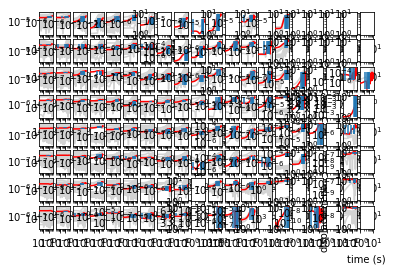

In [17]:
fig, axs = plt.subplots(8, df.shape[1]-1)
print('onto row/column plot')
row_count = 0
results = []
for row in range(8):
    #print('for row')
    col_count = 0
    for column in df.columns[:-1]:
        #print('for column')
        aad[column][row]=df[column][row]/counts[column][row]
        aad_bin = aad[column][row]
        # now to find where departure delay exceeds DPD
        # 'simple sequential computation ... comparing the amplitude at a sample
        # with the one at the previous sample ...regardless of the magntiude of the decline'
        # Noda and Ellsworth 2016
        DPD_time = 0.05
        DPD_samples = 5 # sampling rate is 50 Hz
        delay_time = []
        decline = 0 # count how many amplitudes have decreased in a row
        for point in range(1,len(aad_bin)):
            #print('for point in aad')
            if aad_bin[point]<aad_bin[point-1]:
                #print('less than previous point')
                decline += 1
                if decline == np.ceil(DPD_samples)-1: #if surpassed the DPD
                    delay_time.append(point)
            else:
                decline = 0 #reset decline counter
        T_dp = np.array(delay_time)/sampling_rate # convert to seconds
        if len(T_dp)>0:
            print(T_dp[0:5])
            for i in range(0, min(5, len(T_dp))): # vertical lines marking potential Tdp locations (first 5 after P wave pick)
                axs[row_count][col_count].vlines(T_dp[i], min(aad_bin[0:250]), max(aad_bin[0:250]), zorder = 100)
            if float("{:.2f}".format(T_dp[0]))>0.2:
                print(column, row_count, T_dp[0], counts[column][row])
                results.append([column, row_count, T_dp[0], counts[column][row]])
            elif len(T_dp)>1 and float("{:.2f}".format(T_dp[1]))>0.05:
                print(column, row_count, T_dp[1], counts[column][row])
                results.append([column, row_count, T_dp[1], counts[column][row]])
        axs[row_count][col_count].plot(np.arange(0, 5, 0.02), aad[column][row][:250], zorder = 50, color = 'red')
        for ind_ad in ad[column][row]:
            axs[row_count][col_count].plot(np.arange(0, 5, 0.02), ind_ad[:250], color='lightgrey')
        axs[row_count][col_count].set_xscale('log')
        axs[row_count][col_count].set_yscale('log') # in log space
        col_count += 1
    row_count += 1


#axs[0][0].set_title('M5-6')
#axs[0][1].set_title('M6-7')
#axs[0][0].set_ylabel('0-25 km')
#axs[1][0].set_ylabel('25-50 km')
#axs[2][0].set_ylabel('50-75 km')
#axs[3][0].set_ylabel('75-100 km')
plt.ylabel('displacement')
plt.xlabel('time (s)')
plt.show()

In [ ]:
results

In [ ]:
#%%script false --no-raise-error
results = [['5.0', 0, 0.32000000000000001, 23],
 ['5.1', 0, 0.58999999999999997, 24],
 ['5.2', 0, 0.35999999999999999, 2],
 ['5.3', 0, 0.5, 11],
 ['5.4', 0, 0.72999999999999998, 24],
 ['5.5', 0, 0.62, 2],
 ['5.6', 0, 0.92000000000000004, 2],
 ['6.0', 0, 0.56000000000000005, 2],
 ['6.1', 0, 1.5700000000000001, 2],
 ['6.4', 0, 1.3600000000000001, 3],
 ['5.0', 1, 0.52000000000000002, 50],
 ['5.1', 1, 0.37, 50],
 ['5.2', 1, 0.56999999999999995, 31],
 ['5.3', 1, 0.76000000000000001, 31],
 ['5.4', 1, 0.69999999999999996, 50],
 ['5.5', 1, 0.29999999999999999, 6],
 ['5.6', 1, 0.46999999999999997, 7],
 ['5.7', 1, 0.52000000000000002, 6],
 ['5.8', 1, 0.96999999999999997, 30],
 ['5.9', 1, 1.0800000000000001, 31],
 ['6.0', 1, 0.5, 2],
 ['6.2', 1, 0.64000000000000001, 1],
 ['6.4', 1, 0.91000000000000003, 3],
 ['6.8', 1, 1.1899999999999999, 3],
 ['5.0', 2, 0.48999999999999999, 65],
 ['5.1', 2, 0.45000000000000001, 66],
 ['5.2', 2, 0.41999999999999998, 32],
 ['5.3', 2, 0.54000000000000004, 44],
 ['5.4', 2, 0.42999999999999999, 66],
 ['5.5', 2, 0.55000000000000004, 8],
 ['5.6', 2, 0.59999999999999998, 45],
 ['5.8', 2, 0.52000000000000002, 42],
 ['5.9', 2, 0.58999999999999997, 44],
 ['6.0', 2, 1.3600000000000001, 7],
 ['6.1', 2, 0.56999999999999995, 7],
 ['6.3', 2, 1.1000000000000001, 1],
 ['6.4', 2, 1.8100000000000001, 8],
 ['6.6', 2, 0.94999999999999996, 1],
 ['5.0', 3, 0.47999999999999998, 66],
 ['5.1', 3, 0.56999999999999995, 67],
 ['5.2', 3, 0.68999999999999995, 53],
 ['5.3', 3, 0.56000000000000005, 67],
 ['5.4', 3, 0.54000000000000004, 67],
 ['5.5', 3, 0.56999999999999995, 36],
 ['5.6', 3, 0.76000000000000001, 38],
 ['5.7', 3, 0.63, 53],
 ['5.8', 3, 0.70999999999999996, 28],
 ['5.9', 3, 0.20999999999999999, 53],
 ['6.0', 3, 1.23, 10],
 ['6.1', 3, 1.05, 9],
 ['6.3', 3, 0.56000000000000005, 9],
 ['6.4', 3, 1.1599999999999999, 11],
 ['6.6', 3, 0.68000000000000005, 1],
 ['6.7', 3, 1.1299999999999999, 2],
 ['6.8', 3, 0.35999999999999999, 11],
 ['5.0', 4, 0.56000000000000005, 56],
 ['5.1', 4, 0.42999999999999999, 56],
 ['5.2', 4, 0.68000000000000005, 21],
 ['5.3', 4, 0.48999999999999999, 56],
 ['5.4', 4, 0.46999999999999997, 56],
 ['5.5', 4, 0.46000000000000002, 4],
 ['5.6', 4, 0.58999999999999997, 38],
 ['5.7', 4, 0.57999999999999996, 4],
 ['5.8', 4, 0.63, 36],
 ['5.9', 4, 0.56000000000000005, 25],
 ['6.0', 4, 1.22, 5],
 ['6.3', 4, 0.65000000000000002, 5],
 ['6.4', 4, 1.29, 6],
 ['6.6', 4, 0.35999999999999999, 1],
 ['6.7', 4, 0.72999999999999998, 1],
 ['6.8', 4, 1.3200000000000001, 6],
 ['5.0', 5, 0.59999999999999998, 9],
 ['5.1', 5, 0.60999999999999999, 10],
 ['5.2', 5, 0.77000000000000002, 10],
 ['5.3', 5, 0.78000000000000003, 10],
 ['5.4', 5, 0.42999999999999999, 10],
 ['5.6', 5, 0.75, 1],
 ['5.7', 5, 0.56000000000000005, 10],
 ['6.0', 5, 0.67000000000000004, 5],
 ['6.3', 5, 0.69999999999999996, 6],
 ['5.0', 6, 0.60999999999999999, 9],
 ['5.1', 6, 0.73999999999999999, 9],
 ['5.2', 6, 0.95999999999999996, 9],
 ['5.3', 6, 0.39000000000000001, 5],
 ['5.4', 6, 0.62, 10],
 ['5.0', 7, 0.62, 10],
 ['5.2', 7, 0.54000000000000004, 10],
 ['5.3', 7, 0.77000000000000002, 11],
 ['5.4', 7, 0.46999999999999997, 9]]

In [8]:
import numpy as np
from scipy import optimize, linalg
import matplotlib.pyplot as plt

def model_function(x_data, a, b):
    return a*x_data + b

In [24]:
all_mag = []
n = []
tdp_all = []
for i in results:
    all_mag.append(float(i[0]))
    tdp_all.append(float(i[2]))
    n.append(float(i[3]))
y = all_mag
x = tdp_all    
x = np.array(x)

In [10]:
initial_guess = (1.5, 6)

In [11]:
def obj(to_opt):
    a=to_opt[0]
    b=to_opt[1]
    importance = np.array(n)
    m_real = np.array(all_mag)
    t = np.log10(np.array(tdp_all))
    m_guess = (a*t+b)
    return sum(abs(m_guess-m_real))
def obj_2(to_opt):
    a=to_opt[0]
    b=to_opt[1]
    importance = np.array(n)
    m_real = np.array(all_mag)
    t = np.log10(np.array(tdp_all))
    m_guess = (a*t+b)
    return sum((m_guess-m_real)**2)

def obj_flipped(to_opt):
    a=to_opt[0]
    b=to_opt[1]
    importance = np.array(n)
    m_real = np.array(all_mag)
    t = np.log10(np.array(tdp_all))
    t_guess = (a*m_real+b)
    return sum(abs(t_guess-t))

In [12]:
res = optimize.minimize(obj, initial_guess, method = 'Nelder-Mead')

In [13]:
res

 final_simplex: (array([[ 1.5       ,  6.        ],
       [ 1.50001831,  6.        ],
       [ 1.5       ,  6.00007324]]), array([ 0.,  0.,  0.]))
           fun: 0.0
       message: 'Optimization terminated successfully.'
          nfev: 51
           nit: 13
        status: 0
       success: True
             x: array([ 1.5,  6. ])

In [ ]:
a = 2.29
b = 5.95
m_real = np.array(all_mag)
t = np.log10(np.array(tdp_all))
m_guess = (a*t+b)
sum(abs(m_guess-m_real))

BOOTSTRAPPING -- np.polyfit

In [14]:
import random 
def bootstrapping_function():
    m_all = np.array(all_mag)
    t_all = np.array(tdp_all)
    t_BS = []
    m_BS = []
    for count in range(0,len(t_all)):
        #print(count)
        i = random.randrange(0,len(t_all))
        t_BS.append(t_all[i])
        m_BS.append(m_all[i])
    print(t_BS[0], m_BS[0])
    return m_BS, t_BS

In [15]:
def obj_BS_1(to_opt):
    a=to_opt[0]
    b=to_opt[1]
    importance = np.array(n)
    m_real = m_BS
    t = t_BS#, t = bootstrapping_function()
    #print(m_real[0], t[0])
    t = np.log10(t)
    m_guess = (a*t+b)
    return sum(abs(m_guess-m_real))
def obj_BS_2(to_opt):
    a=to_opt[0]
    b=to_opt[1]
    importance = np.array(n)
    m_real = m_BS
    t = t_BS#, t = bootstrapping_function()
    t = np.log10(t)
    m_guess = (a*t+b)
    return sum((m_guess-m_real)**2)

In [20]:
gradt = []
intercepts = []
gradt_2 = []
intercepts_2 = []
gradt_polyfit = []
intercepts_polyfit = []
for bs in range(0, 1000):
    print('bootstrapping run'+str(bs))
    initial_guess = (0, 0)
    m_BS, t_BS = bootstrapping_function()
    res = optimize.minimize(obj_BS_1, initial_guess, method = 'TNC')
    gradt.append(res.x[0])
    intercepts.append(res.x[1])
    #print('bootstrapping run'+str(bs))
    initial_guess = (0, 0)
    res = optimize.minimize(obj_BS_2, initial_guess, method = 'TNC')
    gradt_2.append(res.x[0])
    intercepts_2.append(res.x[1])  
    [a, b] = np.polyfit(x=np.log10(t_BS), y=np.array(m_BS), deg=1)
    gradt_polyfit.append(a)
    intercepts_polyfit.append(b)    

bootstrapping run0
0.67 5.3
5.3 0.67
5.3 0.67
5.3 0.67
5.3 0.67
5.3 0.67
5.3 0.67
5.3 0.67
5.3 0.67
5.3 0.67
5.3 0.67
5.3 0.67
5.3 0.67
5.3 0.67
5.3 0.67
5.3 0.67
5.3 0.67
5.3 0.67
5.3 0.67
5.3 0.67
5.3 0.67
5.3 0.67
5.3 0.67
5.3 0.67
5.3 0.67
5.3 0.67
5.3 0.67
5.3 0.67
5.3 0.67
5.3 0.67
5.3 0.67
5.3 0.67
5.3 0.67
5.3 0.67
5.3 0.67
5.3 0.67
5.3 0.67
5.3 0.67
5.3 0.67
5.3 0.67
5.3 0.67
5.3 0.67
5.3 0.67
5.3 0.67
5.3 0.67
5.3 0.67
5.3 0.67
5.3 0.67
5.3 0.67
5.3 0.67
5.3 0.67
5.3 0.67
5.3 0.67
5.3 0.67
5.3 0.67
5.3 0.67
5.3 0.67
5.3 0.67
5.3 0.67
5.3 0.67
5.3 0.67
5.3 0.67
5.3 0.67
5.3 0.67
5.3 0.67
5.3 0.67
5.3 0.67
5.3 0.67
5.3 0.67
5.3 0.67
5.3 0.67
5.3 0.67
5.3 0.67
5.3 0.67
5.3 0.67
5.3 0.67
5.3 0.67
5.3 0.67
5.3 0.67
5.3 0.67
5.3 0.67
5.3 0.67
5.3 0.67
5.3 0.67
5.3 0.67
5.3 0.67
5.3 0.67
5.3 0.67
5.3 0.67
5.3 0.67
5.3 0.67
5.3 0.67
5.3 0.67
5.3 0.67
5.3 0.67
5.3 0.67
5.3 0.67
5.3 0.67
5.3 0.67
5.3 0.67
5.3 0.67
5.3 0.67
5.3 0.67
5.3 0.67
5.3 0.67
5.3 0.67
5.3 0.67
5.3 0.67
5.3 0.67


6.8 0.36
6.8 0.36
6.8 0.36
6.8 0.36
6.8 0.36
6.8 0.36
6.8 0.36
6.8 0.36
6.8 0.36
6.8 0.36
6.8 0.36
6.8 0.36
6.8 0.36
6.8 0.36
6.8 0.36
6.8 0.36
6.8 0.36
6.8 0.36
6.8 0.36
6.8 0.36
6.8 0.36
6.8 0.36
6.8 0.36
6.8 0.36
6.8 0.36
6.8 0.36
6.8 0.36
6.8 0.36
6.8 0.36
6.8 0.36
6.8 0.36
6.8 0.36
6.8 0.36
6.8 0.36
6.8 0.36
6.8 0.36
6.8 0.36
6.8 0.36
6.8 0.36
6.8 0.36
6.8 0.36
6.8 0.36
6.8 0.36
6.8 0.36
6.8 0.36
6.8 0.36
6.8 0.36
6.8 0.36
6.8 0.36
6.8 0.36
6.8 0.36
6.8 0.36
6.8 0.36
6.8 0.36
6.8 0.36
6.8 0.36
6.8 0.36
6.8 0.36
6.8 0.36
6.8 0.36
6.8 0.36
6.8 0.36
6.8 0.36
6.8 0.36
6.8 0.36
6.8 0.36
6.8 0.36
6.8 0.36
6.8 0.36
6.8 0.36
6.8 0.36
6.8 0.36
6.8 0.36
6.8 0.36
6.8 0.36
6.8 0.36
6.8 0.36
6.8 0.36
6.8 0.36
6.8 0.36
6.8 0.36
6.8 0.36
6.8 0.36
6.8 0.36
6.8 0.36
6.8 0.36
6.8 0.36
6.8 0.36
6.8 0.36
6.8 0.36
6.8 0.36
6.8 0.36
6.8 0.36
6.8 0.36
6.8 0.36
6.8 0.36
6.8 0.36
6.8 0.36
6.8 0.36
6.8 0.36
6.8 0.36
6.8 0.36
6.8 0.36
6.8 0.36
6.8 0.36
6.8 0.36
6.8 0.36
6.8 0.36
6.8 0.36
6.8 0.36
6.8 0.36
6

6.8 1.23
6.8 1.23
6.8 1.23
6.8 1.23
6.8 1.23
6.8 1.23
6.8 1.23
6.8 1.23
6.8 1.23
6.8 1.23
6.8 1.23
6.8 1.23
6.8 1.23
6.8 1.23
6.8 1.23
6.8 1.23
6.8 1.23
6.8 1.23
6.8 1.23
6.8 1.23
6.8 1.23
6.8 1.23
6.8 1.23
6.8 1.23
6.8 1.23
6.8 1.23
6.8 1.23
6.8 1.23
6.8 1.23
6.8 1.23
6.8 1.23
6.8 1.23
6.8 1.23
6.8 1.23
6.8 1.23
6.8 1.23
6.8 1.23
6.8 1.23
6.8 1.23
6.8 1.23
6.8 1.23
6.8 1.23
6.8 1.23
6.8 1.23
6.8 1.23
6.8 1.23
6.8 1.23
6.8 1.23
6.8 1.23
6.8 1.23
6.8 1.23
6.8 1.23
6.8 1.23
6.8 1.23
6.8 1.23
6.8 1.23
6.8 1.23
6.8 1.23
6.8 1.23
6.8 1.23
6.8 1.23
6.8 1.23
6.8 1.23
6.8 1.23
6.8 1.23
6.8 1.23
6.8 1.23
6.8 1.23
6.8 1.23
6.8 1.23
6.8 1.23
6.8 1.23
6.8 1.23
6.8 1.23
6.8 1.23
6.8 1.23
6.8 1.23
6.8 1.23
6.8 1.23
6.8 1.23
6.8 1.23
6.8 1.23
6.8 1.23
6.8 1.23
6.8 1.23
6.8 1.23
6.8 1.23
6.8 1.23
6.8 1.23
6.8 1.23
6.8 1.23
6.8 1.23
6.8 1.23
6.8 1.23
6.8 1.23
6.8 1.23
6.8 1.23
6.8 1.23
6.8 1.23
6.8 1.23
6.8 1.23
6.8 1.23
6.8 1.23
6.8 1.23
6.8 1.23
6.8 1.23
6.8 1.23
6.8 1.23
6.8 1.23
6.8 1.23
6.8 1.23
6

6.5 0.92
6.5 0.92
6.5 0.92
6.5 0.92
6.5 0.92
6.5 0.92
6.5 0.92
6.5 0.92
6.5 0.92
6.5 0.92
6.5 0.92
6.5 0.92
6.5 0.92
6.5 0.92
6.5 0.92
6.5 0.92
6.5 0.92
6.5 0.92
6.5 0.92
6.5 0.92
6.5 0.92
6.5 0.92
6.5 0.92
6.5 0.92
6.5 0.92
6.5 0.92
6.5 0.92
6.5 0.92
6.5 0.92
6.5 0.92
6.5 0.92
6.5 0.92
6.5 0.92
6.5 0.92
6.5 0.92
6.5 0.92
6.5 0.92
6.5 0.92
6.5 0.92
6.5 0.92
6.5 0.92
6.5 0.92
6.5 0.92
6.5 0.92
6.5 0.92
6.5 0.92
6.5 0.92
6.5 0.92
6.5 0.92
6.5 0.92
6.5 0.92
6.5 0.92
6.5 0.92
6.5 0.92
6.5 0.92
6.5 0.92
6.5 0.92
6.5 0.92
6.5 0.92
6.5 0.92
6.5 0.92
6.5 0.92
6.5 0.92
6.5 0.92
6.5 0.92
6.5 0.92
6.5 0.92
6.5 0.92
6.5 0.92
6.5 0.92
6.5 0.92
6.5 0.92
6.5 0.92
6.5 0.92
6.5 0.92
6.5 0.92
6.5 0.92
6.5 0.92
6.5 0.92
6.5 0.92
6.5 0.92
6.5 0.92
6.5 0.92
6.5 0.92
6.5 0.92
6.5 0.92
6.5 0.92
6.5 0.92
6.5 0.92
6.5 0.92
6.5 0.92
6.5 0.92
6.5 0.92
6.5 0.92
6.5 0.92
6.5 0.92
6.5 0.92
6.5 0.92
6.5 0.92
6.5 0.92
6.5 0.92
6.5 0.92
6.5 0.92
6.5 0.92
6.5 0.92
6.5 0.92
6.5 0.92
6.5 0.92
6.5 0.92
6.5 0.92
6.5 0.92
6

5.9 0.95
5.9 0.95
5.9 0.95
5.9 0.95
5.9 0.95
5.9 0.95
5.9 0.95
5.9 0.95
5.9 0.95
5.9 0.95
5.9 0.95
5.9 0.95
5.9 0.95
5.9 0.95
5.9 0.95
5.9 0.95
5.9 0.95
5.9 0.95
5.9 0.95
5.9 0.95
5.9 0.95
5.9 0.95
5.9 0.95
5.9 0.95
5.9 0.95
5.9 0.95
5.9 0.95
5.9 0.95
5.9 0.95
5.9 0.95
5.9 0.95
5.9 0.95
5.9 0.95
5.9 0.95
5.9 0.95
5.9 0.95
5.9 0.95
5.9 0.95
5.9 0.95
5.9 0.95
5.9 0.95
5.9 0.95
5.9 0.95
5.9 0.95
5.9 0.95
5.9 0.95
5.9 0.95
5.9 0.95
5.9 0.95
5.9 0.95
5.9 0.95
5.9 0.95
5.9 0.95
bootstrapping run22
bootstrapping run23
0.91 6.0
6.0 0.91
6.0 0.91
6.0 0.91
6.0 0.91
6.0 0.91
6.0 0.91
6.0 0.91
6.0 0.91
6.0 0.91
6.0 0.91
6.0 0.91
6.0 0.91
6.0 0.91
6.0 0.91
6.0 0.91
6.0 0.91
6.0 0.91
6.0 0.91
6.0 0.91
6.0 0.91
6.0 0.91
6.0 0.91
6.0 0.91
6.0 0.91
6.0 0.91
6.0 0.91
6.0 0.91
6.0 0.91
6.0 0.91
6.0 0.91
6.0 0.91
6.0 0.91
6.0 0.91
6.0 0.91
6.0 0.91
6.0 0.91
6.0 0.91
6.0 0.91
6.0 0.91
6.0 0.91
6.0 0.91
6.0 0.91
6.0 0.91
6.0 0.91
6.0 0.91
6.0 0.91
6.0 0.91
6.0 0.91
6.0 0.91
6.0 0.91
6.0 0.91
6.0 0.91
6.0 0.

5.1 0.59
5.1 0.59
5.1 0.59
5.1 0.59
5.1 0.59
5.1 0.59
5.1 0.59
5.1 0.59
5.1 0.59
5.1 0.59
5.1 0.59
5.1 0.59
5.1 0.59
5.1 0.59
5.1 0.59
5.1 0.59
5.1 0.59
5.1 0.59
5.1 0.59
5.1 0.59
5.1 0.59
5.1 0.59
5.1 0.59
5.1 0.59
5.1 0.59
5.1 0.59
5.1 0.59
5.1 0.59
5.1 0.59
5.1 0.59
5.1 0.59
5.1 0.59
5.1 0.59
5.1 0.59
5.1 0.59
5.1 0.59
5.1 0.59
5.1 0.59
5.1 0.59
5.1 0.59
5.1 0.59
5.1 0.59
5.1 0.59
5.1 0.59
5.1 0.59
5.1 0.59
5.1 0.59
5.1 0.59
5.1 0.59
5.1 0.59
5.1 0.59
5.1 0.59
5.1 0.59
5.1 0.59
5.1 0.59
5.1 0.59
5.1 0.59
5.1 0.59
5.1 0.59
5.1 0.59
5.1 0.59
5.1 0.59
5.1 0.59
5.1 0.59
5.1 0.59
5.1 0.59
5.1 0.59
5.1 0.59
5.1 0.59
5.1 0.59
5.1 0.59
5.1 0.59
5.1 0.59
5.1 0.59
5.1 0.59
5.1 0.59
5.1 0.59
5.1 0.59
5.1 0.59
5.1 0.59
5.1 0.59
5.1 0.59
5.1 0.59
5.1 0.59
5.1 0.59
5.1 0.59
5.1 0.59
5.1 0.59
5.1 0.59
5.1 0.59
5.1 0.59
5.1 0.59
5.1 0.59
5.1 0.59
5.1 0.59
5.1 0.59
5.1 0.59
5.1 0.59
5.1 0.59
5.1 0.59
5.1 0.59
5.1 0.59
5.1 0.59
5.1 0.59
5.1 0.59
5.1 0.59
5.1 0.59
5.1 0.59
5.1 0.59
5.1 0.59
5.1 0.59
5

5.0 0.47
5.0 0.47
5.0 0.47
5.0 0.47
5.0 0.47
5.0 0.47
5.0 0.47
5.0 0.47
5.0 0.47
5.0 0.47
5.0 0.47
5.0 0.47
5.0 0.47
5.0 0.47
5.0 0.47
5.0 0.47
5.0 0.47
5.0 0.47
5.0 0.47
5.0 0.47
5.0 0.47
5.0 0.47
5.0 0.47
5.0 0.47
5.0 0.47
5.0 0.47
5.0 0.47
5.0 0.47
5.0 0.47
5.0 0.47
5.0 0.47
5.0 0.47
5.0 0.47
5.0 0.47
5.0 0.47
5.0 0.47
5.0 0.47
5.0 0.47
5.0 0.47
5.0 0.47
5.0 0.47
5.0 0.47
5.0 0.47
5.0 0.47
5.0 0.47
5.0 0.47
5.0 0.47
5.0 0.47
5.0 0.47
5.0 0.47
5.0 0.47
5.0 0.47
5.0 0.47
5.0 0.47
5.0 0.47
5.0 0.47
5.0 0.47
5.0 0.47
5.0 0.47
5.0 0.47
5.0 0.47
5.0 0.47
5.0 0.47
5.0 0.47
5.0 0.47
5.0 0.47
5.0 0.47
5.0 0.47
5.0 0.47
5.0 0.47
5.0 0.47
5.0 0.47
5.0 0.47
5.0 0.47
5.0 0.47
5.0 0.47
5.0 0.47
5.0 0.47
5.0 0.47
5.0 0.47
5.0 0.47
5.0 0.47
5.0 0.47
5.0 0.47
5.0 0.47
5.0 0.47
5.0 0.47
5.0 0.47
5.0 0.47
5.0 0.47
5.0 0.47
5.0 0.47
5.0 0.47
5.0 0.47
5.0 0.47
5.0 0.47
5.0 0.47
5.0 0.47
5.0 0.47
5.0 0.47
5.0 0.47
5.0 0.47
5.0 0.47
5.0 0.47
5.0 0.47
5.0 0.47
5.0 0.47
5.0 0.47
5.0 0.47
5.0 0.47
5.0 0.47
5

5.4 0.76
5.4 0.76
5.4 0.76
5.4 0.76
5.4 0.76
5.4 0.76
5.4 0.76
5.4 0.76
5.4 0.76
5.4 0.76
5.4 0.76
5.4 0.76
5.4 0.76
5.4 0.76
5.4 0.76
5.4 0.76
5.4 0.76
5.4 0.76
5.4 0.76
5.4 0.76
5.4 0.76
5.4 0.76
5.4 0.76
5.4 0.76
5.4 0.76
5.4 0.76
5.4 0.76
5.4 0.76
5.4 0.76
5.4 0.76
5.4 0.76
5.4 0.76
5.4 0.76
5.4 0.76
5.4 0.76
5.4 0.76
5.4 0.76
5.4 0.76
5.4 0.76
5.4 0.76
5.4 0.76
5.4 0.76
5.4 0.76
5.4 0.76
5.4 0.76
5.4 0.76
5.4 0.76
5.4 0.76
5.4 0.76
5.4 0.76
5.4 0.76
5.4 0.76
5.4 0.76
5.4 0.76
5.4 0.76
5.4 0.76
5.4 0.76
5.4 0.76
5.4 0.76
5.4 0.76
5.4 0.76
5.4 0.76
5.4 0.76
5.4 0.76
5.4 0.76
5.4 0.76
5.4 0.76
5.4 0.76
5.4 0.76
5.4 0.76
5.4 0.76
5.4 0.76
5.4 0.76
5.4 0.76
5.4 0.76
5.4 0.76
5.4 0.76
5.4 0.76
5.4 0.76
5.4 0.76
5.4 0.76
5.4 0.76
5.4 0.76
5.4 0.76
5.4 0.76
5.4 0.76
5.4 0.76
5.4 0.76
5.4 0.76
5.4 0.76
5.4 0.76
5.4 0.76
5.4 0.76
5.4 0.76
5.4 0.76
5.4 0.76
5.4 0.76
5.4 0.76
5.4 0.76
5.4 0.76
5.4 0.76
5.4 0.76
5.4 0.76
5.4 0.76
5.4 0.76
5.4 0.76
5.4 0.76
5.4 0.76
5.4 0.76
5.4 0.76
5.4 0.76
5

5.5 1.2
5.5 1.2
5.5 1.2
5.5 1.2
5.5 1.2
5.5 1.2
5.5 1.2
5.5 1.2
5.5 1.2
5.5 1.2
5.5 1.2
5.5 1.2
5.5 1.2
5.5 1.2
5.5 1.2
5.5 1.2
5.5 1.2
5.5 1.2
5.5 1.2
5.5 1.2
5.5 1.2
5.5 1.2
5.5 1.2
5.5 1.2
5.5 1.2
5.5 1.2
5.5 1.2
5.5 1.2
5.5 1.2
5.5 1.2
5.5 1.2
5.5 1.2
5.5 1.2
5.5 1.2
5.5 1.2
5.5 1.2
5.5 1.2
5.5 1.2
5.5 1.2
5.5 1.2
5.5 1.2
5.5 1.2
5.5 1.2
5.5 1.2
5.5 1.2
5.5 1.2
5.5 1.2
5.5 1.2
5.5 1.2
5.5 1.2
5.5 1.2
5.5 1.2
5.5 1.2
5.5 1.2
5.5 1.2
5.5 1.2
5.5 1.2
5.5 1.2
5.5 1.2
5.5 1.2
5.5 1.2
5.5 1.2
5.5 1.2
5.5 1.2
5.5 1.2
5.5 1.2
5.5 1.2
5.5 1.2
5.5 1.2
5.5 1.2
5.5 1.2
5.5 1.2
5.5 1.2
5.5 1.2
5.5 1.2
5.5 1.2
5.5 1.2
5.5 1.2
5.5 1.2
5.5 1.2
5.5 1.2
5.5 1.2
5.5 1.2
5.5 1.2
5.5 1.2
5.5 1.2
5.5 1.2
5.5 1.2
5.5 1.2
5.5 1.2
5.5 1.2
5.5 1.2
5.5 1.2
5.5 1.2
5.5 1.2
5.5 1.2
5.5 1.2
5.5 1.2
5.5 1.2
5.5 1.2
5.5 1.2
5.5 1.2
5.5 1.2
5.5 1.2
5.5 1.2
5.5 1.2
5.5 1.2
5.5 1.2
5.5 1.2
5.5 1.2
5.5 1.2
5.5 1.2
5.5 1.2
5.5 1.2
5.5 1.2
5.5 1.2
5.5 1.2
5.5 1.2
5.5 1.2
5.5 1.2
5.5 1.2
5.5 1.2
5.5 1.2
5.5 1.2
5.5 1.2


bootstrapping run53
0.34 5.1
5.1 0.34
5.1 0.34
5.1 0.34
5.1 0.34
5.1 0.34
5.1 0.34
5.1 0.34
5.1 0.34
5.1 0.34
5.1 0.34
5.1 0.34
5.1 0.34
5.1 0.34
5.1 0.34
5.1 0.34
5.1 0.34
5.1 0.34
5.1 0.34
5.1 0.34
5.1 0.34
5.1 0.34
5.1 0.34
5.1 0.34
5.1 0.34
5.1 0.34
5.1 0.34
5.1 0.34
5.1 0.34
5.1 0.34
5.1 0.34
5.1 0.34
5.1 0.34
5.1 0.34
5.1 0.34
5.1 0.34
5.1 0.34
5.1 0.34
5.1 0.34
5.1 0.34
5.1 0.34
5.1 0.34
5.1 0.34
5.1 0.34
5.1 0.34
5.1 0.34
5.1 0.34
5.1 0.34
5.1 0.34
5.1 0.34
5.1 0.34
5.1 0.34
5.1 0.34
5.1 0.34
5.1 0.34
5.1 0.34
5.1 0.34
5.1 0.34
5.1 0.34
5.1 0.34
5.1 0.34
5.1 0.34
5.1 0.34
5.1 0.34
5.1 0.34
5.1 0.34
5.1 0.34
5.1 0.34
5.1 0.34
5.1 0.34
5.1 0.34
5.1 0.34
5.1 0.34
5.1 0.34
5.1 0.34
5.1 0.34
5.1 0.34
5.1 0.34
5.1 0.34
5.1 0.34
5.1 0.34
5.1 0.34
5.1 0.34
5.1 0.34
5.1 0.34
5.1 0.34
5.1 0.34
5.1 0.34
5.1 0.34
5.1 0.34
5.1 0.34
5.1 0.34
5.1 0.34
5.1 0.34
5.1 0.34
5.1 0.34
5.1 0.34
5.1 0.34
5.1 0.34
5.1 0.34
5.1 0.34
5.1 0.34
5.1 0.34
5.1 0.34
5.1 0.34
5.1 0.34
5.1 0.34
5.1 0.34
5.1 0.34

5.0 2.21
5.0 2.21
5.0 2.21
5.0 2.21
5.0 2.21
5.0 2.21
5.0 2.21
5.0 2.21
5.0 2.21
5.0 2.21
5.0 2.21
5.0 2.21
5.0 2.21
5.0 2.21
5.0 2.21
5.0 2.21
5.0 2.21
5.0 2.21
5.0 2.21
5.0 2.21
5.0 2.21
5.0 2.21
5.0 2.21
5.0 2.21
5.0 2.21
5.0 2.21
5.0 2.21
5.0 2.21
5.0 2.21
5.0 2.21
5.0 2.21
5.0 2.21
5.0 2.21
5.0 2.21
5.0 2.21
5.0 2.21
5.0 2.21
5.0 2.21
5.0 2.21
5.0 2.21
5.0 2.21
5.0 2.21
5.0 2.21
5.0 2.21
5.0 2.21
5.0 2.21
5.0 2.21
5.0 2.21
5.0 2.21
5.0 2.21
5.0 2.21
5.0 2.21
5.0 2.21
5.0 2.21
5.0 2.21
5.0 2.21
5.0 2.21
5.0 2.21
5.0 2.21
5.0 2.21
5.0 2.21
5.0 2.21
5.0 2.21
5.0 2.21
5.0 2.21
5.0 2.21
5.0 2.21
5.0 2.21
5.0 2.21
5.0 2.21
5.0 2.21
5.0 2.21
5.0 2.21
5.0 2.21
5.0 2.21
5.0 2.21
5.0 2.21
5.0 2.21
5.0 2.21
5.0 2.21
5.0 2.21
5.0 2.21
5.0 2.21
5.0 2.21
5.0 2.21
5.0 2.21
5.0 2.21
5.0 2.21
5.0 2.21
5.0 2.21
5.0 2.21
5.0 2.21
5.0 2.21
5.0 2.21
5.0 2.21
5.0 2.21
5.0 2.21
5.0 2.21
bootstrapping run58
bootstrapping run59
0.53 5.6
5.6 0.53
5.6 0.53
5.6 0.53
5.6 0.53
5.6 0.53
5.6 0.53
5.6 0.53
5.6 0.

5.8 0.57
5.8 0.57
5.8 0.57
5.8 0.57
5.8 0.57
5.8 0.57
5.8 0.57
5.8 0.57
5.8 0.57
5.8 0.57
5.8 0.57
5.8 0.57
5.8 0.57
5.8 0.57
5.8 0.57
5.8 0.57
5.8 0.57
5.8 0.57
5.8 0.57
5.8 0.57
5.8 0.57
5.8 0.57
5.8 0.57
5.8 0.57
5.8 0.57
5.8 0.57
5.8 0.57
5.8 0.57
5.8 0.57
5.8 0.57
5.8 0.57
5.8 0.57
5.8 0.57
5.8 0.57
5.8 0.57
5.8 0.57
5.8 0.57
5.8 0.57
5.8 0.57
5.8 0.57
5.8 0.57
5.8 0.57
5.8 0.57
5.8 0.57
5.8 0.57
5.8 0.57
5.8 0.57
5.8 0.57
5.8 0.57
5.8 0.57
5.8 0.57
5.8 0.57
5.8 0.57
5.8 0.57
5.8 0.57
5.8 0.57
5.8 0.57
5.8 0.57
5.8 0.57
5.8 0.57
5.8 0.57
5.8 0.57
5.8 0.57
5.8 0.57
5.8 0.57
5.8 0.57
5.8 0.57
5.8 0.57
5.8 0.57
5.8 0.57
5.8 0.57
5.8 0.57
5.8 0.57
5.8 0.57
5.8 0.57
5.8 0.57
5.8 0.57
5.8 0.57
5.8 0.57
5.8 0.57
5.8 0.57
5.8 0.57
5.8 0.57
5.8 0.57
5.8 0.57
5.8 0.57
5.8 0.57
5.8 0.57
5.8 0.57
5.8 0.57
5.8 0.57
5.8 0.57
5.8 0.57
5.8 0.57
5.8 0.57
5.8 0.57
5.8 0.57
5.8 0.57
5.8 0.57
5.8 0.57
5.8 0.57
5.8 0.57
5.8 0.57
5.8 0.57
5.8 0.57
5.8 0.57
5.8 0.57
5.8 0.57
5.8 0.57
5.8 0.57
5.8 0.57
5

6.0 0.91
6.0 0.91
6.0 0.91
6.0 0.91
6.0 0.91
6.0 0.91
6.0 0.91
6.0 0.91
6.0 0.91
6.0 0.91
6.0 0.91
6.0 0.91
6.0 0.91
6.0 0.91
6.0 0.91
6.0 0.91
6.0 0.91
6.0 0.91
6.0 0.91
6.0 0.91
6.0 0.91
6.0 0.91
6.0 0.91
6.0 0.91
6.0 0.91
6.0 0.91
6.0 0.91
6.0 0.91
6.0 0.91
6.0 0.91
6.0 0.91
6.0 0.91
6.0 0.91
6.0 0.91
6.0 0.91
6.0 0.91
6.0 0.91
6.0 0.91
6.0 0.91
6.0 0.91
6.0 0.91
6.0 0.91
6.0 0.91
6.0 0.91
6.0 0.91
6.0 0.91
6.0 0.91
6.0 0.91
6.0 0.91
6.0 0.91
6.0 0.91
6.0 0.91
6.0 0.91
6.0 0.91
6.0 0.91
6.0 0.91
6.0 0.91
6.0 0.91
6.0 0.91
6.0 0.91
6.0 0.91
6.0 0.91
6.0 0.91
6.0 0.91
6.0 0.91
6.0 0.91
6.0 0.91
6.0 0.91
6.0 0.91
6.0 0.91
6.0 0.91
6.0 0.91
6.0 0.91
6.0 0.91
6.0 0.91
6.0 0.91
6.0 0.91
6.0 0.91
6.0 0.91
6.0 0.91
6.0 0.91
6.0 0.91
6.0 0.91
6.0 0.91
6.0 0.91
6.0 0.91
6.0 0.91
6.0 0.91
6.0 0.91
6.0 0.91
6.0 0.91
6.0 0.91
6.0 0.91
6.0 0.91
6.0 0.91
6.0 0.91
6.0 0.91
6.0 0.91
6.0 0.91
6.0 0.91
6.0 0.91
6.0 0.91
6.0 0.91
6.0 0.91
6.0 0.91
6.0 0.91
6.0 0.91
6.0 0.91
6.0 0.91
6.0 0.91
6.0 0.91
6

5.5 0.84
5.5 0.84
5.5 0.84
5.5 0.84
5.5 0.84
5.5 0.84
5.5 0.84
5.5 0.84
5.5 0.84
5.5 0.84
5.5 0.84
5.5 0.84
5.5 0.84
5.5 0.84
5.5 0.84
5.5 0.84
5.5 0.84
5.5 0.84
5.5 0.84
5.5 0.84
5.5 0.84
5.5 0.84
5.5 0.84
5.5 0.84
5.5 0.84
5.5 0.84
5.5 0.84
5.5 0.84
5.5 0.84
5.5 0.84
5.5 0.84
5.5 0.84
5.5 0.84
5.5 0.84
5.5 0.84
5.5 0.84
5.5 0.84
5.5 0.84
5.5 0.84
5.5 0.84
5.5 0.84
5.5 0.84
5.5 0.84
5.5 0.84
5.5 0.84
5.5 0.84
5.5 0.84
5.5 0.84
5.5 0.84
5.5 0.84
5.5 0.84
5.5 0.84
5.5 0.84
5.5 0.84
5.5 0.84
5.5 0.84
5.5 0.84
5.5 0.84
5.5 0.84
5.5 0.84
5.5 0.84
5.5 0.84
5.5 0.84
5.5 0.84
5.5 0.84
5.5 0.84
5.5 0.84
5.5 0.84
5.5 0.84
5.5 0.84
5.5 0.84
5.5 0.84
5.5 0.84
5.5 0.84
5.5 0.84
5.5 0.84
5.5 0.84
5.5 0.84
5.5 0.84
5.5 0.84
5.5 0.84
5.5 0.84
5.5 0.84
5.5 0.84
5.5 0.84
5.5 0.84
5.5 0.84
5.5 0.84
5.5 0.84
5.5 0.84
5.5 0.84
5.5 0.84
5.5 0.84
5.5 0.84
5.5 0.84
5.5 0.84
5.5 0.84
5.5 0.84
5.5 0.84
5.5 0.84
5.5 0.84
5.5 0.84
5.5 0.84
5.5 0.84
5.5 0.84
5.5 0.84
5.5 0.84
5.5 0.84
5.5 0.84
5.5 0.84
5.5 0.84
5

5.6 0.3
5.6 0.3
5.6 0.3
5.6 0.3
5.6 0.3
5.6 0.3
5.6 0.3
5.6 0.3
5.6 0.3
5.6 0.3
5.6 0.3
5.6 0.3
5.6 0.3
5.6 0.3
5.6 0.3
5.6 0.3
5.6 0.3
5.6 0.3
5.6 0.3
5.6 0.3
5.6 0.3
5.6 0.3
5.6 0.3
5.6 0.3
5.6 0.3
5.6 0.3
5.6 0.3
5.6 0.3
5.6 0.3
5.6 0.3
5.6 0.3
5.6 0.3
5.6 0.3
5.6 0.3
5.6 0.3
5.6 0.3
5.6 0.3
5.6 0.3
5.6 0.3
5.6 0.3
5.6 0.3
5.6 0.3
5.6 0.3
5.6 0.3
5.6 0.3
5.6 0.3
5.6 0.3
5.6 0.3
5.6 0.3
5.6 0.3
5.6 0.3
5.6 0.3
5.6 0.3
5.6 0.3
5.6 0.3
5.6 0.3
5.6 0.3
5.6 0.3
5.6 0.3
5.6 0.3
5.6 0.3
5.6 0.3
5.6 0.3
5.6 0.3
5.6 0.3
5.6 0.3
5.6 0.3
5.6 0.3
5.6 0.3
5.6 0.3
5.6 0.3
5.6 0.3
5.6 0.3
5.6 0.3
5.6 0.3
5.6 0.3
5.6 0.3
5.6 0.3
5.6 0.3
5.6 0.3
5.6 0.3
5.6 0.3
5.6 0.3
5.6 0.3
5.6 0.3
5.6 0.3
5.6 0.3
5.6 0.3
5.6 0.3
5.6 0.3
5.6 0.3
5.6 0.3
5.6 0.3
5.6 0.3
5.6 0.3
5.6 0.3
5.6 0.3
5.6 0.3
5.6 0.3
5.6 0.3
5.6 0.3
5.6 0.3
5.6 0.3
5.6 0.3
5.6 0.3
5.6 0.3
5.6 0.3
5.6 0.3
5.6 0.3
5.6 0.3
5.6 0.3
5.6 0.3
5.6 0.3
5.6 0.3
5.6 0.3
5.6 0.3
5.6 0.3
5.6 0.3
5.6 0.3
5.6 0.3
5.6 0.3
5.6 0.3
5.6 0.3
5.6 0.3
5.6 0.3


6.4 1.29
6.4 1.29
6.4 1.29
6.4 1.29
6.4 1.29
6.4 1.29
6.4 1.29
6.4 1.29
6.4 1.29
6.4 1.29
6.4 1.29
6.4 1.29
6.4 1.29
6.4 1.29
6.4 1.29
6.4 1.29
6.4 1.29
6.4 1.29
6.4 1.29
6.4 1.29
6.4 1.29
6.4 1.29
6.4 1.29
6.4 1.29
6.4 1.29
6.4 1.29
bootstrapping run86
bootstrapping run87
0.36 5.3
5.3 0.36
5.3 0.36
5.3 0.36
5.3 0.36
5.3 0.36
5.3 0.36
5.3 0.36
5.3 0.36
5.3 0.36
5.3 0.36
5.3 0.36
5.3 0.36
5.3 0.36
5.3 0.36
5.3 0.36
5.3 0.36
5.3 0.36
5.3 0.36
5.3 0.36
5.3 0.36
5.3 0.36
5.3 0.36
5.3 0.36
5.3 0.36
5.3 0.36
5.3 0.36
5.3 0.36
5.3 0.36
5.3 0.36
5.3 0.36
5.3 0.36
5.3 0.36
5.3 0.36
5.3 0.36
5.3 0.36
5.3 0.36
5.3 0.36
5.3 0.36
5.3 0.36
5.3 0.36
5.3 0.36
5.3 0.36
5.3 0.36
5.3 0.36
5.3 0.36
5.3 0.36
5.3 0.36
5.3 0.36
5.3 0.36
5.3 0.36
5.3 0.36
5.3 0.36
5.3 0.36
5.3 0.36
5.3 0.36
5.3 0.36
5.3 0.36
5.3 0.36
5.3 0.36
5.3 0.36
5.3 0.36
5.3 0.36
5.3 0.36
5.3 0.36
5.3 0.36
5.3 0.36
5.3 0.36
5.3 0.36
5.3 0.36
5.3 0.36
5.3 0.36
5.3 0.36
5.3 0.36
5.3 0.36
5.3 0.36
5.3 0.36
5.3 0.36
5.3 0.36
5.3 0.36
5.3 0.

6.0 0.59
6.0 0.59
6.0 0.59
6.0 0.59
6.0 0.59
6.0 0.59
6.0 0.59
bootstrapping run92
bootstrapping run93
0.64 6.1
6.1 0.64
6.1 0.64
6.1 0.64
6.1 0.64
6.1 0.64
6.1 0.64
6.1 0.64
6.1 0.64
6.1 0.64
6.1 0.64
6.1 0.64
6.1 0.64
6.1 0.64
6.1 0.64
6.1 0.64
6.1 0.64
6.1 0.64
6.1 0.64
6.1 0.64
6.1 0.64
6.1 0.64
6.1 0.64
6.1 0.64
6.1 0.64
6.1 0.64
6.1 0.64
6.1 0.64
6.1 0.64
6.1 0.64
6.1 0.64
6.1 0.64
6.1 0.64
6.1 0.64
6.1 0.64
6.1 0.64
6.1 0.64
6.1 0.64
6.1 0.64
6.1 0.64
6.1 0.64
6.1 0.64
6.1 0.64
6.1 0.64
6.1 0.64
6.1 0.64
6.1 0.64
6.1 0.64
6.1 0.64
6.1 0.64
6.1 0.64
6.1 0.64
6.1 0.64
6.1 0.64
6.1 0.64
6.1 0.64
6.1 0.64
6.1 0.64
6.1 0.64
6.1 0.64
6.1 0.64
6.1 0.64
6.1 0.64
6.1 0.64
6.1 0.64
6.1 0.64
6.1 0.64
6.1 0.64
6.1 0.64
6.1 0.64
6.1 0.64
6.1 0.64
6.1 0.64
6.1 0.64
6.1 0.64
6.1 0.64
6.1 0.64
6.1 0.64
6.1 0.64
6.1 0.64
6.1 0.64
6.1 0.64
6.1 0.64
6.1 0.64
6.1 0.64
6.1 0.64
6.1 0.64
6.1 0.64
6.1 0.64
6.1 0.64
6.1 0.64
6.1 0.64
6.1 0.64
6.1 0.64
6.1 0.64
6.1 0.64
6.1 0.64
6.1 0.64
6.1 0.64
6.1 0.

5.5 0.77
5.5 0.77
5.5 0.77
5.5 0.77
5.5 0.77
5.5 0.77
5.5 0.77
5.5 0.77
5.5 0.77
5.5 0.77
5.5 0.77
5.5 0.77
5.5 0.77
5.5 0.77
5.5 0.77
5.5 0.77
5.5 0.77
5.5 0.77
5.5 0.77
5.5 0.77
5.5 0.77
5.5 0.77
5.5 0.77
5.5 0.77
5.5 0.77
5.5 0.77
5.5 0.77
5.5 0.77
5.5 0.77
5.5 0.77
5.5 0.77
5.5 0.77
5.5 0.77
5.5 0.77
5.5 0.77
5.5 0.77
5.5 0.77
5.5 0.77
5.5 0.77
5.5 0.77
5.5 0.77
5.5 0.77
5.5 0.77
5.5 0.77
5.5 0.77
5.5 0.77
5.5 0.77
5.5 0.77
5.5 0.77
5.5 0.77
5.5 0.77
5.5 0.77
5.5 0.77
5.5 0.77
5.5 0.77
5.5 0.77
5.5 0.77
5.5 0.77
5.5 0.77
5.5 0.77
5.5 0.77
5.5 0.77
5.5 0.77
5.5 0.77
5.5 0.77
5.5 0.77
5.5 0.77
5.5 0.77
5.5 0.77
5.5 0.77
5.5 0.77
5.5 0.77
5.5 0.77
5.5 0.77
5.5 0.77
5.5 0.77
5.5 0.77
5.5 0.77
5.5 0.77
5.5 0.77
5.5 0.77
5.5 0.77
5.5 0.77
5.5 0.77
5.5 0.77
5.5 0.77
5.5 0.77
5.5 0.77
5.5 0.77
5.5 0.77
5.5 0.77
5.5 0.77
5.5 0.77
5.5 0.77
5.5 0.77
5.5 0.77
5.5 0.77
5.5 0.77
5.5 0.77
5.5 0.77
5.5 0.77
5.5 0.77
5.5 0.77
5.5 0.77
5.5 0.77
5.5 0.77
5.5 0.77
5.5 0.77
5.5 0.77
5.5 0.77
5.5 0.77
5

bootstrapping run104
0.75 6.0
6.0 0.75
6.0 0.75
6.0 0.75
6.0 0.75
6.0 0.75
6.0 0.75
6.0 0.75
6.0 0.75
6.0 0.75
6.0 0.75
6.0 0.75
6.0 0.75
6.0 0.75
6.0 0.75
6.0 0.75
6.0 0.75
6.0 0.75
6.0 0.75
6.0 0.75
6.0 0.75
6.0 0.75
6.0 0.75
6.0 0.75
6.0 0.75
6.0 0.75
6.0 0.75
6.0 0.75
6.0 0.75
6.0 0.75
6.0 0.75
6.0 0.75
6.0 0.75
6.0 0.75
6.0 0.75
6.0 0.75
6.0 0.75
6.0 0.75
6.0 0.75
6.0 0.75
6.0 0.75
6.0 0.75
6.0 0.75
6.0 0.75
6.0 0.75
6.0 0.75
6.0 0.75
6.0 0.75
6.0 0.75
6.0 0.75
6.0 0.75
6.0 0.75
6.0 0.75
6.0 0.75
6.0 0.75
6.0 0.75
6.0 0.75
6.0 0.75
6.0 0.75
6.0 0.75
6.0 0.75
6.0 0.75
6.0 0.75
6.0 0.75
6.0 0.75
6.0 0.75
6.0 0.75
6.0 0.75
6.0 0.75
6.0 0.75
6.0 0.75
6.0 0.75
6.0 0.75
6.0 0.75
6.0 0.75
6.0 0.75
6.0 0.75
6.0 0.75
6.0 0.75
6.0 0.75
6.0 0.75
6.0 0.75
6.0 0.75
6.0 0.75
6.0 0.75
6.0 0.75
6.0 0.75
6.0 0.75
6.0 0.75
6.0 0.75
6.0 0.75
6.0 0.75
6.0 0.75
6.0 0.75
6.0 0.75
6.0 0.75
6.0 0.75
6.0 0.75
6.0 0.75
6.0 0.75
6.0 0.75
6.0 0.75
6.0 0.75
6.0 0.75
6.0 0.75
6.0 0.75
6.0 0.75
6.0 0.75
6.0 0.7

bootstrapping run110
0.78 5.8
5.8 0.78
5.8 0.78
5.8 0.78
5.8 0.78
5.8 0.78
5.8 0.78
5.8 0.78
5.8 0.78
5.8 0.78
5.8 0.78
5.8 0.78
5.8 0.78
5.8 0.78
5.8 0.78
5.8 0.78
5.8 0.78
5.8 0.78
5.8 0.78
5.8 0.78
5.8 0.78
5.8 0.78
5.8 0.78
5.8 0.78
5.8 0.78
5.8 0.78
5.8 0.78
5.8 0.78
5.8 0.78
5.8 0.78
5.8 0.78
5.8 0.78
5.8 0.78
5.8 0.78
5.8 0.78
5.8 0.78
5.8 0.78
5.8 0.78
5.8 0.78
5.8 0.78
5.8 0.78
5.8 0.78
5.8 0.78
5.8 0.78
5.8 0.78
5.8 0.78
5.8 0.78
5.8 0.78
5.8 0.78
5.8 0.78
5.8 0.78
5.8 0.78
5.8 0.78
5.8 0.78
5.8 0.78
5.8 0.78
5.8 0.78
5.8 0.78
5.8 0.78
5.8 0.78
5.8 0.78
5.8 0.78
5.8 0.78
5.8 0.78
5.8 0.78
5.8 0.78
5.8 0.78
5.8 0.78
5.8 0.78
5.8 0.78
5.8 0.78
5.8 0.78
5.8 0.78
5.8 0.78
5.8 0.78
5.8 0.78
5.8 0.78
5.8 0.78
5.8 0.78
5.8 0.78
5.8 0.78
5.8 0.78
5.8 0.78
5.8 0.78
5.8 0.78
5.8 0.78
5.8 0.78
5.8 0.78
5.8 0.78
5.8 0.78
5.8 0.78
5.8 0.78
5.8 0.78
5.8 0.78
5.8 0.78
5.8 0.78
5.8 0.78
5.8 0.78
5.8 0.78
5.8 0.78
5.8 0.78
5.8 0.78
5.8 0.78
5.8 0.78
5.8 0.78
5.8 0.78
5.8 0.78
5.8 0.78
5.8 0.7

6.1 0.46
6.1 0.46
6.1 0.46
6.1 0.46
6.1 0.46
6.1 0.46
6.1 0.46
6.1 0.46
6.1 0.46
6.1 0.46
6.1 0.46
6.1 0.46
6.1 0.46
6.1 0.46
6.1 0.46
6.1 0.46
6.1 0.46
6.1 0.46
6.1 0.46
6.1 0.46
6.1 0.46
6.1 0.46
6.1 0.46
6.1 0.46
6.1 0.46
6.1 0.46
6.1 0.46
6.1 0.46
6.1 0.46
6.1 0.46
6.1 0.46
6.1 0.46
6.1 0.46
6.1 0.46
6.1 0.46
6.1 0.46
6.1 0.46
6.1 0.46
6.1 0.46
6.1 0.46
6.1 0.46
6.1 0.46
6.1 0.46
6.1 0.46
6.1 0.46
6.1 0.46
6.1 0.46
6.1 0.46
6.1 0.46
6.1 0.46
6.1 0.46
6.1 0.46
6.1 0.46
6.1 0.46
6.1 0.46
6.1 0.46
6.1 0.46
6.1 0.46
6.1 0.46
6.1 0.46
6.1 0.46
6.1 0.46
6.1 0.46
6.1 0.46
6.1 0.46
6.1 0.46
6.1 0.46
6.1 0.46
6.1 0.46
6.1 0.46
6.1 0.46
6.1 0.46
6.1 0.46
6.1 0.46
6.1 0.46
6.1 0.46
6.1 0.46
6.1 0.46
6.1 0.46
6.1 0.46
6.1 0.46
6.1 0.46
6.1 0.46
6.1 0.46
6.1 0.46
6.1 0.46
6.1 0.46
6.1 0.46
6.1 0.46
6.1 0.46
6.1 0.46
6.1 0.46
6.1 0.46
6.1 0.46
6.1 0.46
6.1 0.46
6.1 0.46
6.1 0.46
6.1 0.46
6.1 0.46
6.1 0.46
6.1 0.46
6.1 0.46
6.1 0.46
6.1 0.46
6.1 0.46
6.1 0.46
6.1 0.46
6.1 0.46
6.1 0.46
6.1 0.46
6

6.4 1.07
6.4 1.07
6.4 1.07
6.4 1.07
6.4 1.07
6.4 1.07
6.4 1.07
6.4 1.07
6.4 1.07
6.4 1.07
6.4 1.07
6.4 1.07
6.4 1.07
6.4 1.07
6.4 1.07
6.4 1.07
6.4 1.07
6.4 1.07
6.4 1.07
6.4 1.07
6.4 1.07
6.4 1.07
6.4 1.07
6.4 1.07
6.4 1.07
6.4 1.07
6.4 1.07
6.4 1.07
6.4 1.07
6.4 1.07
6.4 1.07
6.4 1.07
6.4 1.07
6.4 1.07
6.4 1.07
6.4 1.07
6.4 1.07
6.4 1.07
6.4 1.07
6.4 1.07
6.4 1.07
6.4 1.07
6.4 1.07
6.4 1.07
6.4 1.07
6.4 1.07
6.4 1.07
6.4 1.07
6.4 1.07
6.4 1.07
6.4 1.07
6.4 1.07
6.4 1.07
6.4 1.07
6.4 1.07
6.4 1.07
6.4 1.07
6.4 1.07
6.4 1.07
6.4 1.07
6.4 1.07
6.4 1.07
6.4 1.07
6.4 1.07
6.4 1.07
6.4 1.07
6.4 1.07
6.4 1.07
6.4 1.07
6.4 1.07
6.4 1.07
6.4 1.07
6.4 1.07
6.4 1.07
6.4 1.07
6.4 1.07
6.4 1.07
6.4 1.07
6.4 1.07
6.4 1.07
6.4 1.07
6.4 1.07
6.4 1.07
6.4 1.07
6.4 1.07
6.4 1.07
6.4 1.07
6.4 1.07
6.4 1.07
6.4 1.07
6.4 1.07
6.4 1.07
6.4 1.07
6.4 1.07
6.4 1.07
6.4 1.07
6.4 1.07
6.4 1.07
6.4 1.07
6.4 1.07
6.4 1.07
6.4 1.07
6.4 1.07
6.4 1.07
6.4 1.07
6.4 1.07
6.4 1.07
6.4 1.07
6.4 1.07
6.4 1.07
6.4 1.07
6

bootstrapping run128
0.69 6.2
6.2 0.69
6.2 0.69
6.2 0.69
6.2 0.69
6.2 0.69
6.2 0.69
6.2 0.69
6.2 0.69
6.2 0.69
6.2 0.69
6.2 0.69
6.2 0.69
6.2 0.69
6.2 0.69
6.2 0.69
6.2 0.69
6.2 0.69
6.2 0.69
6.2 0.69
6.2 0.69
6.2 0.69
6.2 0.69
6.2 0.69
6.2 0.69
6.2 0.69
6.2 0.69
6.2 0.69
6.2 0.69
6.2 0.69
6.2 0.69
6.2 0.69
6.2 0.69
6.2 0.69
6.2 0.69
6.2 0.69
6.2 0.69
6.2 0.69
6.2 0.69
6.2 0.69
6.2 0.69
6.2 0.69
6.2 0.69
6.2 0.69
6.2 0.69
6.2 0.69
6.2 0.69
6.2 0.69
6.2 0.69
6.2 0.69
6.2 0.69
6.2 0.69
6.2 0.69
6.2 0.69
6.2 0.69
6.2 0.69
6.2 0.69
6.2 0.69
6.2 0.69
6.2 0.69
6.2 0.69
6.2 0.69
6.2 0.69
6.2 0.69
6.2 0.69
6.2 0.69
6.2 0.69
6.2 0.69
6.2 0.69
6.2 0.69
6.2 0.69
6.2 0.69
6.2 0.69
6.2 0.69
6.2 0.69
6.2 0.69
6.2 0.69
6.2 0.69
6.2 0.69
6.2 0.69
6.2 0.69
6.2 0.69
6.2 0.69
6.2 0.69
6.2 0.69
6.2 0.69
6.2 0.69
6.2 0.69
6.2 0.69
6.2 0.69
6.2 0.69
6.2 0.69
6.2 0.69
6.2 0.69
6.2 0.69
6.2 0.69
6.2 0.69
6.2 0.69
6.2 0.69
6.2 0.69
6.2 0.69
6.2 0.69
6.2 0.69
6.2 0.69
6.2 0.69
6.2 0.69
6.2 0.69
6.2 0.69
6.2 0.6

6.4 1.29
6.4 1.29
6.4 1.29
6.4 1.29
6.4 1.29
6.4 1.29
6.4 1.29
6.4 1.29
6.4 1.29
6.4 1.29
6.4 1.29
6.4 1.29
6.4 1.29
6.4 1.29
6.4 1.29
6.4 1.29
6.4 1.29
6.4 1.29
6.4 1.29
6.4 1.29
6.4 1.29
6.4 1.29
6.4 1.29
6.4 1.29
6.4 1.29
6.4 1.29
6.4 1.29
6.4 1.29
6.4 1.29
6.4 1.29
6.4 1.29
6.4 1.29
6.4 1.29
6.4 1.29
6.4 1.29
6.4 1.29
6.4 1.29
6.4 1.29
6.4 1.29
6.4 1.29
6.4 1.29
6.4 1.29
6.4 1.29
6.4 1.29
6.4 1.29
6.4 1.29
6.4 1.29
6.4 1.29
6.4 1.29
6.4 1.29
6.4 1.29
6.4 1.29
6.4 1.29
6.4 1.29
6.4 1.29
6.4 1.29
6.4 1.29
6.4 1.29
6.4 1.29
6.4 1.29
6.4 1.29
6.4 1.29
6.4 1.29
6.4 1.29
6.4 1.29
6.4 1.29
6.4 1.29
6.4 1.29
6.4 1.29
6.4 1.29
6.4 1.29
6.4 1.29
6.4 1.29
6.4 1.29
6.4 1.29
6.4 1.29
6.4 1.29
6.4 1.29
6.4 1.29
6.4 1.29
6.4 1.29
6.4 1.29
6.4 1.29
6.4 1.29
6.4 1.29
6.4 1.29
6.4 1.29
6.4 1.29
6.4 1.29
6.4 1.29
6.4 1.29
6.4 1.29
6.4 1.29
6.4 1.29
6.4 1.29
6.4 1.29
6.4 1.29
6.4 1.29
6.4 1.29
6.4 1.29
6.4 1.29
6.4 1.29
6.4 1.29
6.4 1.29
6.4 1.29
6.4 1.29
6.4 1.29
6.4 1.29
6.4 1.29
6.4 1.29
6.4 1.29
6

bootstrapping run136
0.72 5.7
5.7 0.72
5.7 0.72
5.7 0.72
5.7 0.72
5.7 0.72
5.7 0.72
5.7 0.72
5.7 0.72
5.7 0.72
5.7 0.72
5.7 0.72
5.7 0.72
5.7 0.72
5.7 0.72
5.7 0.72
5.7 0.72
5.7 0.72
5.7 0.72
5.7 0.72
5.7 0.72
5.7 0.72
5.7 0.72
5.7 0.72
5.7 0.72
5.7 0.72
5.7 0.72
5.7 0.72
5.7 0.72
5.7 0.72
5.7 0.72
5.7 0.72
5.7 0.72
5.7 0.72
5.7 0.72
5.7 0.72
5.7 0.72
5.7 0.72
5.7 0.72
5.7 0.72
5.7 0.72
5.7 0.72
5.7 0.72
5.7 0.72
5.7 0.72
5.7 0.72
5.7 0.72
5.7 0.72
5.7 0.72
5.7 0.72
5.7 0.72
5.7 0.72
5.7 0.72
5.7 0.72
5.7 0.72
5.7 0.72
5.7 0.72
5.7 0.72
5.7 0.72
5.7 0.72
5.7 0.72
5.7 0.72
5.7 0.72
5.7 0.72
5.7 0.72
5.7 0.72
5.7 0.72
5.7 0.72
5.7 0.72
5.7 0.72
5.7 0.72
5.7 0.72
5.7 0.72
5.7 0.72
5.7 0.72
5.7 0.72
5.7 0.72
5.7 0.72
5.7 0.72
5.7 0.72
5.7 0.72
5.7 0.72
5.7 0.72
5.7 0.72
5.7 0.72
5.7 0.72
5.7 0.72
5.7 0.72
5.7 0.72
5.7 0.72
5.7 0.72
5.7 0.72
5.7 0.72
5.7 0.72
5.7 0.72
5.7 0.72
5.7 0.72
5.7 0.72
5.7 0.72
5.7 0.72
5.7 0.72
5.7 0.72
5.7 0.72
5.7 0.72
5.7 0.72
5.7 0.72
5.7 0.72
5.7 0.72
5.7 0.7

6.0 0.59
6.0 0.59
6.0 0.59
6.0 0.59
6.0 0.59
6.0 0.59
6.0 0.59
6.0 0.59
6.0 0.59
6.0 0.59
6.0 0.59
6.0 0.59
6.0 0.59
6.0 0.59
6.0 0.59
6.0 0.59
6.0 0.59
6.0 0.59
6.0 0.59
6.0 0.59
6.0 0.59
6.0 0.59
6.0 0.59
6.0 0.59
6.0 0.59
6.0 0.59
6.0 0.59
6.0 0.59
6.0 0.59
6.0 0.59
bootstrapping run139
bootstrapping run140
0.51 5.3
5.3 0.51
5.3 0.51
5.3 0.51
5.3 0.51
5.3 0.51
5.3 0.51
5.3 0.51
5.3 0.51
5.3 0.51
5.3 0.51
5.3 0.51
5.3 0.51
5.3 0.51
5.3 0.51
5.3 0.51
5.3 0.51
5.3 0.51
5.3 0.51
5.3 0.51
5.3 0.51
5.3 0.51
5.3 0.51
5.3 0.51
5.3 0.51
5.3 0.51
5.3 0.51
5.3 0.51
5.3 0.51
5.3 0.51
5.3 0.51
5.3 0.51
5.3 0.51
5.3 0.51
5.3 0.51
5.3 0.51
5.3 0.51
5.3 0.51
5.3 0.51
5.3 0.51
5.3 0.51
5.3 0.51
5.3 0.51
5.3 0.51
5.3 0.51
5.3 0.51
5.3 0.51
5.3 0.51
5.3 0.51
5.3 0.51
5.3 0.51
5.3 0.51
5.3 0.51
5.3 0.51
5.3 0.51
5.3 0.51
5.3 0.51
5.3 0.51
5.3 0.51
5.3 0.51
5.3 0.51
5.3 0.51
5.3 0.51
5.3 0.51
5.3 0.51
5.3 0.51
5.3 0.51
5.3 0.51
5.3 0.51
5.3 0.51
5.3 0.51
5.3 0.51
5.3 0.51
5.3 0.51
5.3 0.51
5.3 0.51
5.3 

5.0 0.41
5.0 0.41
5.0 0.41
5.0 0.41
5.0 0.41
5.0 0.41
5.0 0.41
5.0 0.41
5.0 0.41
5.0 0.41
5.0 0.41
5.0 0.41
5.0 0.41
5.0 0.41
5.0 0.41
5.0 0.41
5.0 0.41
5.0 0.41
5.0 0.41
5.0 0.41
5.0 0.41
5.0 0.41
5.0 0.41
5.0 0.41
5.0 0.41
5.0 0.41
5.0 0.41
5.0 0.41
5.0 0.41
5.0 0.41
5.0 0.41
5.0 0.41
5.0 0.41
5.0 0.41
5.0 0.41
5.0 0.41
5.0 0.41
5.0 0.41
5.0 0.41
5.0 0.41
5.0 0.41
5.0 0.41
5.0 0.41
5.0 0.41
5.0 0.41
5.0 0.41
5.0 0.41
5.0 0.41
5.0 0.41
5.0 0.41
5.0 0.41
5.0 0.41
5.0 0.41
5.0 0.41
5.0 0.41
5.0 0.41
5.0 0.41
5.0 0.41
5.0 0.41
5.0 0.41
5.0 0.41
5.0 0.41
5.0 0.41
5.0 0.41
5.0 0.41
5.0 0.41
5.0 0.41
5.0 0.41
5.0 0.41
5.0 0.41
5.0 0.41
bootstrapping run143
bootstrapping run144
1.31 6.8
6.8 1.31
6.8 1.31
6.8 1.31
6.8 1.31
6.8 1.31
6.8 1.31
6.8 1.31
6.8 1.31
6.8 1.31
6.8 1.31
6.8 1.31
6.8 1.31
6.8 1.31
6.8 1.31
6.8 1.31
6.8 1.31
6.8 1.31
6.8 1.31
6.8 1.31
6.8 1.31
6.8 1.31
6.8 1.31
6.8 1.31
6.8 1.31
6.8 1.31
6.8 1.31
6.8 1.31
6.8 1.31
6.8 1.31
6.8 1.31
6.8 1.31
6.8 1.31
6.8 1.31
6.8 1.31
6.8 

6.4 0.66
6.4 0.66
6.4 0.66
6.4 0.66
6.4 0.66
6.4 0.66
6.4 0.66
6.4 0.66
6.4 0.66
6.4 0.66
6.4 0.66
6.4 0.66
6.4 0.66
6.4 0.66
6.4 0.66
6.4 0.66
6.4 0.66
6.4 0.66
6.4 0.66
6.4 0.66
6.4 0.66
6.4 0.66
6.4 0.66
6.4 0.66
6.4 0.66
6.4 0.66
6.4 0.66
6.4 0.66
6.4 0.66
6.4 0.66
6.4 0.66
6.4 0.66
6.4 0.66
6.4 0.66
6.4 0.66
6.4 0.66
6.4 0.66
6.4 0.66
6.4 0.66
6.4 0.66
6.4 0.66
6.4 0.66
6.4 0.66
6.4 0.66
6.4 0.66
6.4 0.66
6.4 0.66
6.4 0.66
6.4 0.66
6.4 0.66
6.4 0.66
6.4 0.66
6.4 0.66
6.4 0.66
6.4 0.66
6.4 0.66
6.4 0.66
6.4 0.66
6.4 0.66
6.4 0.66
6.4 0.66
6.4 0.66
6.4 0.66
6.4 0.66
6.4 0.66
6.4 0.66
6.4 0.66
6.4 0.66
6.4 0.66
6.4 0.66
6.4 0.66
6.4 0.66
6.4 0.66
6.4 0.66
6.4 0.66
6.4 0.66
6.4 0.66
6.4 0.66
6.4 0.66
6.4 0.66
6.4 0.66
6.4 0.66
6.4 0.66
6.4 0.66
6.4 0.66
6.4 0.66
6.4 0.66
6.4 0.66
6.4 0.66
6.4 0.66
6.4 0.66
6.4 0.66
6.4 0.66
6.4 0.66
6.4 0.66
6.4 0.66
6.4 0.66
6.4 0.66
6.4 0.66
6.4 0.66
6.4 0.66
6.4 0.66
6.4 0.66
6.4 0.66
6.4 0.66
6.4 0.66
6.4 0.66
6.4 0.66
6.4 0.66
6.4 0.66
6.4 0.66
6

5.3 0.74
5.3 0.74
5.3 0.74
5.3 0.74
5.3 0.74
5.3 0.74
5.3 0.74
5.3 0.74
5.3 0.74
5.3 0.74
5.3 0.74
5.3 0.74
5.3 0.74
5.3 0.74
5.3 0.74
5.3 0.74
5.3 0.74
5.3 0.74
5.3 0.74
5.3 0.74
5.3 0.74
5.3 0.74
5.3 0.74
5.3 0.74
5.3 0.74
5.3 0.74
bootstrapping run156
bootstrapping run157
0.73 5.9
5.9 0.73
5.9 0.73
5.9 0.73
5.9 0.73
5.9 0.73
5.9 0.73
5.9 0.73
5.9 0.73
5.9 0.73
5.9 0.73
5.9 0.73
5.9 0.73
5.9 0.73
5.9 0.73
5.9 0.73
5.9 0.73
5.9 0.73
5.9 0.73
5.9 0.73
5.9 0.73
5.9 0.73
5.9 0.73
5.9 0.73
5.9 0.73
5.9 0.73
5.9 0.73
5.9 0.73
5.9 0.73
5.9 0.73
5.9 0.73
5.9 0.73
5.9 0.73
5.9 0.73
5.9 0.73
5.9 0.73
5.9 0.73
5.9 0.73
5.9 0.73
5.9 0.73
5.9 0.73
5.9 0.73
5.9 0.73
5.9 0.73
5.9 0.73
5.9 0.73
5.9 0.73
5.9 0.73
5.9 0.73
5.9 0.73
5.9 0.73
5.9 0.73
5.9 0.73
5.9 0.73
5.9 0.73
5.9 0.73
5.9 0.73
5.9 0.73
5.9 0.73
5.9 0.73
5.9 0.73
5.9 0.73
5.9 0.73
5.9 0.73
5.9 0.73
5.9 0.73
5.9 0.73
5.9 0.73
5.9 0.73
5.9 0.73
5.9 0.73
5.9 0.73
5.9 0.73
5.9 0.73
5.9 0.73
5.9 0.73
5.9 0.73
5.9 0.73
5.9 0.73
5.9 0.73
5.9 

bootstrapping run160
0.81 5.4
5.4 0.81
5.4 0.81
5.4 0.81
5.4 0.81
5.4 0.81
5.4 0.81
5.4 0.81
5.4 0.81
5.4 0.81
5.4 0.81
5.4 0.81
5.4 0.81
5.4 0.81
5.4 0.81
5.4 0.81
5.4 0.81
5.4 0.81
5.4 0.81
5.4 0.81
5.4 0.81
5.4 0.81
5.4 0.81
5.4 0.81
5.4 0.81
5.4 0.81
5.4 0.81
5.4 0.81
5.4 0.81
5.4 0.81
5.4 0.81
5.4 0.81
5.4 0.81
5.4 0.81
5.4 0.81
5.4 0.81
5.4 0.81
5.4 0.81
5.4 0.81
5.4 0.81
5.4 0.81
5.4 0.81
5.4 0.81
5.4 0.81
5.4 0.81
5.4 0.81
5.4 0.81
5.4 0.81
5.4 0.81
5.4 0.81
5.4 0.81
5.4 0.81
5.4 0.81
5.4 0.81
5.4 0.81
5.4 0.81
5.4 0.81
5.4 0.81
5.4 0.81
5.4 0.81
5.4 0.81
5.4 0.81
5.4 0.81
5.4 0.81
5.4 0.81
5.4 0.81
5.4 0.81
5.4 0.81
5.4 0.81
5.4 0.81
5.4 0.81
5.4 0.81
5.4 0.81
5.4 0.81
5.4 0.81
5.4 0.81
5.4 0.81
5.4 0.81
5.4 0.81
5.4 0.81
5.4 0.81
5.4 0.81
5.4 0.81
5.4 0.81
5.4 0.81
5.4 0.81
5.4 0.81
5.4 0.81
5.4 0.81
5.4 0.81
5.4 0.81
5.4 0.81
5.4 0.81
5.4 0.81
5.4 0.81
5.4 0.81
5.4 0.81
5.4 0.81
5.4 0.81
5.4 0.81
5.4 0.81
5.4 0.81
5.4 0.81
5.4 0.81
5.4 0.81
5.4 0.81
5.4 0.81
5.4 0.81
5.4 0.8

5.4 0.59
5.4 0.59
5.4 0.59
5.4 0.59
5.4 0.59
5.4 0.59
5.4 0.59
5.4 0.59
5.4 0.59
5.4 0.59
5.4 0.59
5.4 0.59
5.4 0.59
5.4 0.59
5.4 0.59
5.4 0.59
5.4 0.59
5.4 0.59
5.4 0.59
5.4 0.59
5.4 0.59
5.4 0.59
5.4 0.59
5.4 0.59
5.4 0.59
5.4 0.59
5.4 0.59
5.4 0.59
5.4 0.59
5.4 0.59
5.4 0.59
5.4 0.59
5.4 0.59
5.4 0.59
5.4 0.59
5.4 0.59
5.4 0.59
5.4 0.59
5.4 0.59
5.4 0.59
5.4 0.59
5.4 0.59
5.4 0.59
5.4 0.59
5.4 0.59
5.4 0.59
5.4 0.59
5.4 0.59
5.4 0.59
5.4 0.59
5.4 0.59
5.4 0.59
5.4 0.59
5.4 0.59
5.4 0.59
5.4 0.59
5.4 0.59
5.4 0.59
5.4 0.59
5.4 0.59
5.4 0.59
5.4 0.59
5.4 0.59
5.4 0.59
5.4 0.59
5.4 0.59
5.4 0.59
5.4 0.59
5.4 0.59
5.4 0.59
5.4 0.59
5.4 0.59
5.4 0.59
5.4 0.59
5.4 0.59
5.4 0.59
5.4 0.59
5.4 0.59
5.4 0.59
5.4 0.59
5.4 0.59
5.4 0.59
5.4 0.59
5.4 0.59
5.4 0.59
5.4 0.59
5.4 0.59
5.4 0.59
5.4 0.59
5.4 0.59
5.4 0.59
bootstrapping run163
bootstrapping run164
1.29 6.4
6.4 1.29
6.4 1.29
6.4 1.29
6.4 1.29
6.4 1.29
6.4 1.29
6.4 1.29
6.4 1.29
6.4 1.29
6.4 1.29
6.4 1.29
6.4 1.29
6.4 1.29
6.4 1.29
6.4 

bootstrapping run169
0.55 6.0
6.0 0.55
6.0 0.55
6.0 0.55
6.0 0.55
6.0 0.55
6.0 0.55
6.0 0.55
6.0 0.55
6.0 0.55
6.0 0.55
6.0 0.55
6.0 0.55
6.0 0.55
6.0 0.55
6.0 0.55
6.0 0.55
6.0 0.55
6.0 0.55
6.0 0.55
6.0 0.55
6.0 0.55
6.0 0.55
6.0 0.55
6.0 0.55
6.0 0.55
6.0 0.55
6.0 0.55
6.0 0.55
6.0 0.55
6.0 0.55
6.0 0.55
6.0 0.55
6.0 0.55
6.0 0.55
6.0 0.55
6.0 0.55
6.0 0.55
6.0 0.55
6.0 0.55
6.0 0.55
6.0 0.55
6.0 0.55
6.0 0.55
6.0 0.55
6.0 0.55
6.0 0.55
6.0 0.55
6.0 0.55
6.0 0.55
6.0 0.55
6.0 0.55
6.0 0.55
6.0 0.55
6.0 0.55
6.0 0.55
6.0 0.55
6.0 0.55
6.0 0.55
6.0 0.55
6.0 0.55
6.0 0.55
6.0 0.55
6.0 0.55
6.0 0.55
6.0 0.55
6.0 0.55
6.0 0.55
6.0 0.55
6.0 0.55
6.0 0.55
6.0 0.55
6.0 0.55
6.0 0.55
6.0 0.55
6.0 0.55
6.0 0.55
6.0 0.55
6.0 0.55
6.0 0.55
6.0 0.55
6.0 0.55
6.0 0.55
6.0 0.55
6.0 0.55
6.0 0.55
6.0 0.55
6.0 0.55
6.0 0.55
6.0 0.55
6.0 0.55
6.0 0.55
6.0 0.55
6.0 0.55
6.0 0.55
6.0 0.55
6.0 0.55
6.0 0.55
6.0 0.55
6.0 0.55
6.0 0.55
6.0 0.55
6.0 0.55
6.0 0.55
6.0 0.55
6.0 0.55
6.0 0.55
6.0 0.55
6.0 0.5

5.1 0.34
5.1 0.34
5.1 0.34
5.1 0.34
5.1 0.34
5.1 0.34
5.1 0.34
5.1 0.34
5.1 0.34
5.1 0.34
5.1 0.34
5.1 0.34
5.1 0.34
5.1 0.34
5.1 0.34
5.1 0.34
5.1 0.34
5.1 0.34
5.1 0.34
5.1 0.34
5.1 0.34
5.1 0.34
5.1 0.34
5.1 0.34
5.1 0.34
5.1 0.34
5.1 0.34
5.1 0.34
5.1 0.34
5.1 0.34
5.1 0.34
5.1 0.34
5.1 0.34
5.1 0.34
5.1 0.34
5.1 0.34
5.1 0.34
5.1 0.34
5.1 0.34
5.1 0.34
5.1 0.34
5.1 0.34
5.1 0.34
5.1 0.34
5.1 0.34
5.1 0.34
5.1 0.34
5.1 0.34
5.1 0.34
5.1 0.34
5.1 0.34
5.1 0.34
5.1 0.34
5.1 0.34
5.1 0.34
5.1 0.34
5.1 0.34
5.1 0.34
5.1 0.34
5.1 0.34
5.1 0.34
5.1 0.34
5.1 0.34
5.1 0.34
5.1 0.34
5.1 0.34
5.1 0.34
5.1 0.34
5.1 0.34
5.1 0.34
5.1 0.34
5.1 0.34
5.1 0.34
5.1 0.34
5.1 0.34
5.1 0.34
5.1 0.34
5.1 0.34
5.1 0.34
5.1 0.34
5.1 0.34
5.1 0.34
5.1 0.34
5.1 0.34
5.1 0.34
5.1 0.34
5.1 0.34
5.1 0.34
5.1 0.34
5.1 0.34
5.1 0.34
5.1 0.34
5.1 0.34
5.1 0.34
5.1 0.34
5.1 0.34
5.1 0.34
5.1 0.34
5.1 0.34
5.1 0.34
5.1 0.34
5.1 0.34
5.1 0.34
5.1 0.34
5.1 0.34
5.1 0.34
5.1 0.34
5.1 0.34
5.1 0.34
5.1 0.34
5.1 0.34
5

6.2 0.72
6.2 0.72
6.2 0.72
6.2 0.72
6.2 0.72
6.2 0.72
6.2 0.72
6.2 0.72
6.2 0.72
6.2 0.72
6.2 0.72
6.2 0.72
6.2 0.72
6.2 0.72
6.2 0.72
6.2 0.72
6.2 0.72
6.2 0.72
6.2 0.72
6.2 0.72
6.2 0.72
6.2 0.72
6.2 0.72
6.2 0.72
6.2 0.72
6.2 0.72
6.2 0.72
6.2 0.72
6.2 0.72
6.2 0.72
6.2 0.72
6.2 0.72
6.2 0.72
6.2 0.72
6.2 0.72
6.2 0.72
6.2 0.72
6.2 0.72
6.2 0.72
6.2 0.72
6.2 0.72
6.2 0.72
6.2 0.72
6.2 0.72
6.2 0.72
6.2 0.72
6.2 0.72
6.2 0.72
6.2 0.72
6.2 0.72
6.2 0.72
6.2 0.72
6.2 0.72
6.2 0.72
6.2 0.72
6.2 0.72
6.2 0.72
6.2 0.72
6.2 0.72
6.2 0.72
6.2 0.72
6.2 0.72
6.2 0.72
6.2 0.72
6.2 0.72
6.2 0.72
bootstrapping run178
bootstrapping run179
0.36 5.3
5.3 0.36
5.3 0.36
5.3 0.36
5.3 0.36
5.3 0.36
5.3 0.36
5.3 0.36
5.3 0.36
5.3 0.36
5.3 0.36
5.3 0.36
5.3 0.36
5.3 0.36
5.3 0.36
5.3 0.36
5.3 0.36
5.3 0.36
5.3 0.36
5.3 0.36
5.3 0.36
5.3 0.36
5.3 0.36
5.3 0.36
5.3 0.36
5.3 0.36
5.3 0.36
5.3 0.36
5.3 0.36
5.3 0.36
5.3 0.36
5.3 0.36
5.3 0.36
5.3 0.36
5.3 0.36
5.3 0.36
5.3 0.36
5.3 0.36
5.3 0.36
5.3 0.36
5.3 

5.0 0.51
5.0 0.51
5.0 0.51
5.0 0.51
5.0 0.51
5.0 0.51
5.0 0.51
5.0 0.51
5.0 0.51
5.0 0.51
5.0 0.51
5.0 0.51
5.0 0.51
5.0 0.51
5.0 0.51
5.0 0.51
5.0 0.51
5.0 0.51
5.0 0.51
5.0 0.51
5.0 0.51
5.0 0.51
5.0 0.51
5.0 0.51
5.0 0.51
5.0 0.51
5.0 0.51
5.0 0.51
5.0 0.51
5.0 0.51
5.0 0.51
5.0 0.51
5.0 0.51
5.0 0.51
5.0 0.51
5.0 0.51
5.0 0.51
5.0 0.51
5.0 0.51
5.0 0.51
5.0 0.51
5.0 0.51
5.0 0.51
5.0 0.51
5.0 0.51
5.0 0.51
5.0 0.51
5.0 0.51
5.0 0.51
5.0 0.51
5.0 0.51
5.0 0.51
5.0 0.51
5.0 0.51
5.0 0.51
5.0 0.51
5.0 0.51
5.0 0.51
5.0 0.51
5.0 0.51
5.0 0.51
5.0 0.51
5.0 0.51
5.0 0.51
5.0 0.51
5.0 0.51
5.0 0.51
5.0 0.51
5.0 0.51
5.0 0.51
5.0 0.51
5.0 0.51
5.0 0.51
5.0 0.51
5.0 0.51
5.0 0.51
5.0 0.51
5.0 0.51
5.0 0.51
5.0 0.51
5.0 0.51
5.0 0.51
5.0 0.51
5.0 0.51
5.0 0.51
5.0 0.51
5.0 0.51
5.0 0.51
5.0 0.51
5.0 0.51
5.0 0.51
5.0 0.51
5.0 0.51
5.0 0.51
5.0 0.51
5.0 0.51
5.0 0.51
5.0 0.51
5.0 0.51
5.0 0.51
5.0 0.51
5.0 0.51
5.0 0.51
5.0 0.51
5.0 0.51
5.0 0.51
5.0 0.51
5.0 0.51
5.0 0.51
5.0 0.51
5.0 0.51
5

5.5 0.77
5.5 0.77
5.5 0.77
5.5 0.77
5.5 0.77
5.5 0.77
5.5 0.77
5.5 0.77
5.5 0.77
5.5 0.77
5.5 0.77
5.5 0.77
5.5 0.77
5.5 0.77
5.5 0.77
5.5 0.77
5.5 0.77
5.5 0.77
5.5 0.77
5.5 0.77
bootstrapping run189
bootstrapping run190
0.72 6.2
6.2 0.72
6.2 0.72
6.2 0.72
6.2 0.72
6.2 0.72
6.2 0.72
6.2 0.72
6.2 0.72
6.2 0.72
6.2 0.72
6.2 0.72
6.2 0.72
6.2 0.72
6.2 0.72
6.2 0.72
6.2 0.72
6.2 0.72
6.2 0.72
6.2 0.72
6.2 0.72
6.2 0.72
6.2 0.72
6.2 0.72
6.2 0.72
6.2 0.72
6.2 0.72
6.2 0.72
6.2 0.72
6.2 0.72
6.2 0.72
6.2 0.72
6.2 0.72
6.2 0.72
6.2 0.72
6.2 0.72
6.2 0.72
6.2 0.72
6.2 0.72
6.2 0.72
6.2 0.72
6.2 0.72
6.2 0.72
6.2 0.72
6.2 0.72
6.2 0.72
6.2 0.72
6.2 0.72
6.2 0.72
6.2 0.72
6.2 0.72
6.2 0.72
6.2 0.72
6.2 0.72
6.2 0.72
6.2 0.72
6.2 0.72
6.2 0.72
6.2 0.72
6.2 0.72
6.2 0.72
6.2 0.72
6.2 0.72
6.2 0.72
6.2 0.72
6.2 0.72
6.2 0.72
6.2 0.72
6.2 0.72
6.2 0.72
6.2 0.72
6.2 0.72
6.2 0.72
6.2 0.72
6.2 0.72
6.2 0.72
6.2 0.72
6.2 0.72
6.2 0.72
6.2 0.72
6.2 0.72
6.2 0.72
6.2 0.72
6.2 0.72
6.2 0.72
6.2 0.72
6.2 

6.0 0.75
6.0 0.75
6.0 0.75
6.0 0.75
6.0 0.75
6.0 0.75
6.0 0.75
6.0 0.75
6.0 0.75
6.0 0.75
6.0 0.75
6.0 0.75
6.0 0.75
6.0 0.75
6.0 0.75
6.0 0.75
6.0 0.75
6.0 0.75
6.0 0.75
6.0 0.75
6.0 0.75
6.0 0.75
6.0 0.75
6.0 0.75
6.0 0.75
6.0 0.75
6.0 0.75
6.0 0.75
6.0 0.75
6.0 0.75
6.0 0.75
6.0 0.75
6.0 0.75
6.0 0.75
6.0 0.75
6.0 0.75
6.0 0.75
6.0 0.75
6.0 0.75
6.0 0.75
6.0 0.75
6.0 0.75
6.0 0.75
6.0 0.75
6.0 0.75
6.0 0.75
6.0 0.75
6.0 0.75
6.0 0.75
6.0 0.75
6.0 0.75
6.0 0.75
6.0 0.75
6.0 0.75
6.0 0.75
6.0 0.75
6.0 0.75
6.0 0.75
6.0 0.75
6.0 0.75
6.0 0.75
6.0 0.75
6.0 0.75
6.0 0.75
6.0 0.75
6.0 0.75
6.0 0.75
6.0 0.75
6.0 0.75
6.0 0.75
6.0 0.75
6.0 0.75
6.0 0.75
6.0 0.75
6.0 0.75
6.0 0.75
6.0 0.75
6.0 0.75
6.0 0.75
6.0 0.75
6.0 0.75
6.0 0.75
6.0 0.75
6.0 0.75
6.0 0.75
6.0 0.75
6.0 0.75
6.0 0.75
6.0 0.75
6.0 0.75
6.0 0.75
6.0 0.75
6.0 0.75
6.0 0.75
6.0 0.75
6.0 0.75
6.0 0.75
6.0 0.75
6.0 0.75
6.0 0.75
6.0 0.75
6.0 0.75
6.0 0.75
6.0 0.75
6.0 0.75
6.0 0.75
6.0 0.75
6.0 0.75
6.0 0.75
6.0 0.75
6.0 0.75
6

5.1 0.49
5.1 0.49
5.1 0.49
5.1 0.49
5.1 0.49
5.1 0.49
5.1 0.49
5.1 0.49
5.1 0.49
5.1 0.49
5.1 0.49
5.1 0.49
5.1 0.49
5.1 0.49
5.1 0.49
5.1 0.49
5.1 0.49
5.1 0.49
5.1 0.49
5.1 0.49
5.1 0.49
5.1 0.49
5.1 0.49
5.1 0.49
5.1 0.49
5.1 0.49
5.1 0.49
5.1 0.49
5.1 0.49
5.1 0.49
5.1 0.49
5.1 0.49
5.1 0.49
5.1 0.49
5.1 0.49
5.1 0.49
5.1 0.49
5.1 0.49
5.1 0.49
5.1 0.49
5.1 0.49
5.1 0.49
5.1 0.49
5.1 0.49
5.1 0.49
5.1 0.49
5.1 0.49
5.1 0.49
5.1 0.49
5.1 0.49
5.1 0.49
5.1 0.49
5.1 0.49
5.1 0.49
5.1 0.49
5.1 0.49
5.1 0.49
5.1 0.49
5.1 0.49
5.1 0.49
5.1 0.49
5.1 0.49
5.1 0.49
5.1 0.49
5.1 0.49
5.1 0.49
5.1 0.49
5.1 0.49
5.1 0.49
5.1 0.49
5.1 0.49
5.1 0.49
5.1 0.49
5.1 0.49
5.1 0.49
5.1 0.49
5.1 0.49
5.1 0.49
5.1 0.49
5.1 0.49
5.1 0.49
5.1 0.49
5.1 0.49
5.1 0.49
5.1 0.49
5.1 0.49
5.1 0.49
5.1 0.49
5.1 0.49
5.1 0.49
5.1 0.49
5.1 0.49
5.1 0.49
5.1 0.49
5.1 0.49
5.1 0.49
5.1 0.49
5.1 0.49
5.1 0.49
5.1 0.49
5.1 0.49
5.1 0.49
5.1 0.49
5.1 0.49
5.1 0.49
5.1 0.49
5.1 0.49
5.1 0.49
5.1 0.49
5.1 0.49
5.1 0.49
5

5.1 0.9
5.1 0.9
5.1 0.9
5.1 0.9
5.1 0.9
5.1 0.9
5.1 0.9
5.1 0.9
5.1 0.9
5.1 0.9
5.1 0.9
5.1 0.9
5.1 0.9
5.1 0.9
5.1 0.9
5.1 0.9
5.1 0.9
5.1 0.9
5.1 0.9
5.1 0.9
5.1 0.9
5.1 0.9
5.1 0.9
5.1 0.9
5.1 0.9
5.1 0.9
5.1 0.9
5.1 0.9
5.1 0.9
5.1 0.9
5.1 0.9
5.1 0.9
5.1 0.9
5.1 0.9
5.1 0.9
5.1 0.9
5.1 0.9
5.1 0.9
5.1 0.9
5.1 0.9
5.1 0.9
5.1 0.9
5.1 0.9
5.1 0.9
5.1 0.9
5.1 0.9
5.1 0.9
5.1 0.9
5.1 0.9
5.1 0.9
5.1 0.9
5.1 0.9
5.1 0.9
5.1 0.9
5.1 0.9
5.1 0.9
5.1 0.9
5.1 0.9
5.1 0.9
5.1 0.9
5.1 0.9
5.1 0.9
5.1 0.9
5.1 0.9
5.1 0.9
5.1 0.9
5.1 0.9
5.1 0.9
5.1 0.9
5.1 0.9
5.1 0.9
5.1 0.9
5.1 0.9
5.1 0.9
5.1 0.9
5.1 0.9
5.1 0.9
5.1 0.9
5.1 0.9
5.1 0.9
5.1 0.9
5.1 0.9
5.1 0.9
5.1 0.9
5.1 0.9
5.1 0.9
5.1 0.9
5.1 0.9
5.1 0.9
5.1 0.9
5.1 0.9
5.1 0.9
5.1 0.9
5.1 0.9
5.1 0.9
5.1 0.9
5.1 0.9
5.1 0.9
5.1 0.9
5.1 0.9
5.1 0.9
5.1 0.9
5.1 0.9
5.1 0.9
5.1 0.9
5.1 0.9
5.1 0.9
5.1 0.9
5.1 0.9
5.1 0.9
5.1 0.9
5.1 0.9
5.1 0.9
5.1 0.9
5.1 0.9
5.1 0.9
5.1 0.9
5.1 0.9
5.1 0.9
5.1 0.9
5.1 0.9
5.1 0.9
5.1 0.9
5.1 0.9
5.1 0.9


6.0 0.7
6.0 0.7
6.0 0.7
6.0 0.7
6.0 0.7
6.0 0.7
6.0 0.7
6.0 0.7
6.0 0.7
6.0 0.7
6.0 0.7
6.0 0.7
6.0 0.7
6.0 0.7
6.0 0.7
6.0 0.7
6.0 0.7
6.0 0.7
6.0 0.7
6.0 0.7
6.0 0.7
6.0 0.7
6.0 0.7
6.0 0.7
6.0 0.7
6.0 0.7
6.0 0.7
6.0 0.7
6.0 0.7
6.0 0.7
6.0 0.7
6.0 0.7
6.0 0.7
6.0 0.7
6.0 0.7
6.0 0.7
6.0 0.7
6.0 0.7
6.0 0.7
6.0 0.7
6.0 0.7
6.0 0.7
6.0 0.7
6.0 0.7
6.0 0.7
6.0 0.7
6.0 0.7
6.0 0.7
6.0 0.7
6.0 0.7
6.0 0.7
6.0 0.7
6.0 0.7
6.0 0.7
6.0 0.7
6.0 0.7
6.0 0.7
6.0 0.7
6.0 0.7
6.0 0.7
6.0 0.7
6.0 0.7
6.0 0.7
6.0 0.7
6.0 0.7
6.0 0.7
6.0 0.7
6.0 0.7
6.0 0.7
6.0 0.7
6.0 0.7
6.0 0.7
6.0 0.7
6.0 0.7
6.0 0.7
6.0 0.7
6.0 0.7
6.0 0.7
6.0 0.7
6.0 0.7
6.0 0.7
6.0 0.7
6.0 0.7
6.0 0.7
6.0 0.7
6.0 0.7
6.0 0.7
6.0 0.7
6.0 0.7
6.0 0.7
6.0 0.7
6.0 0.7
6.0 0.7
6.0 0.7
6.0 0.7
6.0 0.7
6.0 0.7
6.0 0.7
6.0 0.7
6.0 0.7
6.0 0.7
6.0 0.7
6.0 0.7
6.0 0.7
6.0 0.7
6.0 0.7
6.0 0.7
6.0 0.7
6.0 0.7
6.0 0.7
6.0 0.7
6.0 0.7
6.0 0.7
6.0 0.7
6.0 0.7
6.0 0.7
6.0 0.7
6.0 0.7
6.0 0.7
6.0 0.7
6.0 0.7
6.0 0.7
6.0 0.7
6.0 0.7
6.0 0.7


5.1 0.9
5.1 0.9
5.1 0.9
5.1 0.9
5.1 0.9
5.1 0.9
5.1 0.9
5.1 0.9
5.1 0.9
5.1 0.9
5.1 0.9
5.1 0.9
5.1 0.9
5.1 0.9
5.1 0.9
5.1 0.9
5.1 0.9
5.1 0.9
5.1 0.9
5.1 0.9
5.1 0.9
5.1 0.9
5.1 0.9
5.1 0.9
5.1 0.9
5.1 0.9
5.1 0.9
5.1 0.9
5.1 0.9
5.1 0.9
5.1 0.9
5.1 0.9
5.1 0.9
5.1 0.9
5.1 0.9
5.1 0.9
5.1 0.9
5.1 0.9
5.1 0.9
5.1 0.9
5.1 0.9
5.1 0.9
5.1 0.9
5.1 0.9
5.1 0.9
5.1 0.9
5.1 0.9
5.1 0.9
5.1 0.9
5.1 0.9
5.1 0.9
5.1 0.9
5.1 0.9
5.1 0.9
5.1 0.9
5.1 0.9
5.1 0.9
5.1 0.9
5.1 0.9
5.1 0.9
5.1 0.9
5.1 0.9
5.1 0.9
5.1 0.9
5.1 0.9
5.1 0.9
5.1 0.9
5.1 0.9
5.1 0.9
5.1 0.9
5.1 0.9
5.1 0.9
5.1 0.9
5.1 0.9
5.1 0.9
5.1 0.9
5.1 0.9
5.1 0.9
5.1 0.9
5.1 0.9
5.1 0.9
5.1 0.9
5.1 0.9
5.1 0.9
5.1 0.9
5.1 0.9
5.1 0.9
5.1 0.9
5.1 0.9
5.1 0.9
5.1 0.9
5.1 0.9
5.1 0.9
5.1 0.9
5.1 0.9
5.1 0.9
5.1 0.9
5.1 0.9
5.1 0.9
5.1 0.9
5.1 0.9
5.1 0.9
5.1 0.9
5.1 0.9
5.1 0.9
5.1 0.9
5.1 0.9
5.1 0.9
5.1 0.9
5.1 0.9
5.1 0.9
5.1 0.9
5.1 0.9
5.1 0.9
5.1 0.9
5.1 0.9
5.1 0.9
5.1 0.9
5.1 0.9
5.1 0.9
5.1 0.9
5.1 0.9
5.1 0.9
5.1 0.9
5.1 0.9


5.3 0.36
5.3 0.36
5.3 0.36
5.3 0.36
5.3 0.36
5.3 0.36
5.3 0.36
5.3 0.36
5.3 0.36
5.3 0.36
5.3 0.36
5.3 0.36
5.3 0.36
5.3 0.36
5.3 0.36
5.3 0.36
5.3 0.36
5.3 0.36
5.3 0.36
5.3 0.36
5.3 0.36
5.3 0.36
5.3 0.36
5.3 0.36
5.3 0.36
5.3 0.36
5.3 0.36
5.3 0.36
5.3 0.36
5.3 0.36
5.3 0.36
5.3 0.36
5.3 0.36
5.3 0.36
5.3 0.36
5.3 0.36
5.3 0.36
5.3 0.36
5.3 0.36
5.3 0.36
5.3 0.36
5.3 0.36
5.3 0.36
5.3 0.36
5.3 0.36
5.3 0.36
5.3 0.36
5.3 0.36
5.3 0.36
5.3 0.36
5.3 0.36
5.3 0.36
5.3 0.36
5.3 0.36
5.3 0.36
5.3 0.36
5.3 0.36
5.3 0.36
5.3 0.36
5.3 0.36
5.3 0.36
5.3 0.36
5.3 0.36
5.3 0.36
5.3 0.36
5.3 0.36
5.3 0.36
5.3 0.36
5.3 0.36
5.3 0.36
5.3 0.36
5.3 0.36
5.3 0.36
5.3 0.36
5.3 0.36
5.3 0.36
5.3 0.36
5.3 0.36
5.3 0.36
5.3 0.36
5.3 0.36
5.3 0.36
5.3 0.36
5.3 0.36
5.3 0.36
5.3 0.36
5.3 0.36
5.3 0.36
5.3 0.36
5.3 0.36
5.3 0.36
5.3 0.36
5.3 0.36
5.3 0.36
5.3 0.36
5.3 0.36
5.3 0.36
5.3 0.36
5.3 0.36
5.3 0.36
5.3 0.36
5.3 0.36
5.3 0.36
5.3 0.36
5.3 0.36
5.3 0.36
5.3 0.36
5.3 0.36
5.3 0.36
5.3 0.36
5.3 0.36
5

6.5 0.92
6.5 0.92
6.5 0.92
6.5 0.92
6.5 0.92
6.5 0.92
6.5 0.92
6.5 0.92
6.5 0.92
6.5 0.92
6.5 0.92
6.5 0.92
6.5 0.92
6.5 0.92
bootstrapping run230
bootstrapping run231
0.68 5.9
5.9 0.68
5.9 0.68
5.9 0.68
5.9 0.68
5.9 0.68
5.9 0.68
5.9 0.68
5.9 0.68
5.9 0.68
5.9 0.68
5.9 0.68
5.9 0.68
5.9 0.68
5.9 0.68
5.9 0.68
5.9 0.68
5.9 0.68
5.9 0.68
5.9 0.68
5.9 0.68
5.9 0.68
5.9 0.68
5.9 0.68
5.9 0.68
5.9 0.68
5.9 0.68
5.9 0.68
5.9 0.68
5.9 0.68
5.9 0.68
5.9 0.68
5.9 0.68
5.9 0.68
5.9 0.68
5.9 0.68
5.9 0.68
5.9 0.68
5.9 0.68
5.9 0.68
5.9 0.68
5.9 0.68
5.9 0.68
5.9 0.68
5.9 0.68
5.9 0.68
5.9 0.68
5.9 0.68
5.9 0.68
5.9 0.68
5.9 0.68
5.9 0.68
5.9 0.68
5.9 0.68
5.9 0.68
5.9 0.68
5.9 0.68
5.9 0.68
5.9 0.68
5.9 0.68
5.9 0.68
5.9 0.68
5.9 0.68
5.9 0.68
5.9 0.68
5.9 0.68
5.9 0.68
5.9 0.68
5.9 0.68
5.9 0.68
5.9 0.68
5.9 0.68
5.9 0.68
5.9 0.68
5.9 0.68
5.9 0.68
5.9 0.68
5.9 0.68
5.9 0.68
5.9 0.68
5.9 0.68
5.9 0.68
5.9 0.68
5.9 0.68
5.9 0.68
5.9 0.68
5.9 0.68
5.9 0.68
5.9 0.68
5.9 0.68
5.9 0.68
5.9 0.68
5.9 

5.5 0.77
5.5 0.77
5.5 0.77
5.5 0.77
5.5 0.77
5.5 0.77
5.5 0.77
5.5 0.77
5.5 0.77
5.5 0.77
5.5 0.77
5.5 0.77
5.5 0.77
5.5 0.77
5.5 0.77
5.5 0.77
5.5 0.77
5.5 0.77
5.5 0.77
5.5 0.77
5.5 0.77
5.5 0.77
5.5 0.77
5.5 0.77
5.5 0.77
5.5 0.77
5.5 0.77
5.5 0.77
5.5 0.77
5.5 0.77
5.5 0.77
5.5 0.77
5.5 0.77
5.5 0.77
5.5 0.77
5.5 0.77
5.5 0.77
5.5 0.77
5.5 0.77
5.5 0.77
5.5 0.77
5.5 0.77
5.5 0.77
5.5 0.77
5.5 0.77
5.5 0.77
5.5 0.77
5.5 0.77
5.5 0.77
5.5 0.77
5.5 0.77
5.5 0.77
5.5 0.77
5.5 0.77
5.5 0.77
5.5 0.77
5.5 0.77
5.5 0.77
5.5 0.77
5.5 0.77
5.5 0.77
5.5 0.77
bootstrapping run236
bootstrapping run237
0.77 5.5
5.5 0.77
5.5 0.77
5.5 0.77
5.5 0.77
5.5 0.77
5.5 0.77
5.5 0.77
5.5 0.77
5.5 0.77
5.5 0.77
5.5 0.77
5.5 0.77
5.5 0.77
5.5 0.77
5.5 0.77
5.5 0.77
5.5 0.77
5.5 0.77
5.5 0.77
5.5 0.77
5.5 0.77
5.5 0.77
5.5 0.77
5.5 0.77
5.5 0.77
5.5 0.77
5.5 0.77
5.5 0.77
5.5 0.77
5.5 0.77
5.5 0.77
5.5 0.77
5.5 0.77
5.5 0.77
5.5 0.77
5.5 0.77
5.5 0.77
5.5 0.77
5.5 0.77
5.5 0.77
5.5 0.77
5.5 0.77
5.5 0.77
5.5 

6.4 1.25
6.4 1.25
6.4 1.25
6.4 1.25
6.4 1.25
6.4 1.25
6.4 1.25
6.4 1.25
6.4 1.25
6.4 1.25
6.4 1.25
6.4 1.25
6.4 1.25
6.4 1.25
6.4 1.25
6.4 1.25
6.4 1.25
6.4 1.25
6.4 1.25
6.4 1.25
6.4 1.25
6.4 1.25
6.4 1.25
6.4 1.25
6.4 1.25
6.4 1.25
6.4 1.25
6.4 1.25
6.4 1.25
6.4 1.25
6.4 1.25
6.4 1.25
6.4 1.25
6.4 1.25
6.4 1.25
6.4 1.25
6.4 1.25
6.4 1.25
6.4 1.25
6.4 1.25
6.4 1.25
6.4 1.25
6.4 1.25
6.4 1.25
6.4 1.25
6.4 1.25
6.4 1.25
6.4 1.25
6.4 1.25
6.4 1.25
6.4 1.25
6.4 1.25
6.4 1.25
6.4 1.25
6.4 1.25
6.4 1.25
6.4 1.25
6.4 1.25
6.4 1.25
6.4 1.25
6.4 1.25
6.4 1.25
6.4 1.25
6.4 1.25
6.4 1.25
6.4 1.25
6.4 1.25
6.4 1.25
6.4 1.25
6.4 1.25
6.4 1.25
6.4 1.25
6.4 1.25
6.4 1.25
6.4 1.25
6.4 1.25
6.4 1.25
6.4 1.25
6.4 1.25
6.4 1.25
6.4 1.25
6.4 1.25
6.4 1.25
6.4 1.25
6.4 1.25
6.4 1.25
6.4 1.25
6.4 1.25
6.4 1.25
6.4 1.25
6.4 1.25
6.4 1.25
6.4 1.25
6.4 1.25
6.4 1.25
6.4 1.25
6.4 1.25
6.4 1.25
6.4 1.25
6.4 1.25
6.4 1.25
6.4 1.25
6.4 1.25
6.4 1.25
6.4 1.25
6.4 1.25
6.4 1.25
6.4 1.25
6.4 1.25
6.4 1.25
6.4 1.25
6

5.3 0.6
5.3 0.6
5.3 0.6
5.3 0.6
5.3 0.6
5.3 0.6
5.3 0.6
5.3 0.6
5.3 0.6
5.3 0.6
5.3 0.6
5.3 0.6
5.3 0.6
5.3 0.6
5.3 0.6
5.3 0.6
5.3 0.6
5.3 0.6
5.3 0.6
5.3 0.6
5.3 0.6
5.3 0.6
5.3 0.6
5.3 0.6
5.3 0.6
5.3 0.6
5.3 0.6
5.3 0.6
5.3 0.6
5.3 0.6
5.3 0.6
5.3 0.6
5.3 0.6
5.3 0.6
5.3 0.6
5.3 0.6
5.3 0.6
5.3 0.6
5.3 0.6
5.3 0.6
5.3 0.6
5.3 0.6
5.3 0.6
5.3 0.6
5.3 0.6
5.3 0.6
5.3 0.6
5.3 0.6
5.3 0.6
5.3 0.6
5.3 0.6
5.3 0.6
5.3 0.6
5.3 0.6
5.3 0.6
5.3 0.6
5.3 0.6
5.3 0.6
5.3 0.6
5.3 0.6
5.3 0.6
5.3 0.6
5.3 0.6
5.3 0.6
5.3 0.6
5.3 0.6
5.3 0.6
5.3 0.6
5.3 0.6
5.3 0.6
5.3 0.6
5.3 0.6
5.3 0.6
5.3 0.6
5.3 0.6
5.3 0.6
5.3 0.6
5.3 0.6
5.3 0.6
5.3 0.6
5.3 0.6
5.3 0.6
5.3 0.6
5.3 0.6
5.3 0.6
5.3 0.6
5.3 0.6
5.3 0.6
5.3 0.6
5.3 0.6
5.3 0.6
5.3 0.6
5.3 0.6
5.3 0.6
5.3 0.6
5.3 0.6
5.3 0.6
5.3 0.6
5.3 0.6
5.3 0.6
5.3 0.6
5.3 0.6
5.3 0.6
5.3 0.6
5.3 0.6
5.3 0.6
5.3 0.6
5.3 0.6
5.3 0.6
5.3 0.6
5.3 0.6
5.3 0.6
5.3 0.6
5.3 0.6
5.3 0.6
5.3 0.6
5.3 0.6
5.3 0.6
5.3 0.6
5.3 0.6
5.3 0.6
5.3 0.6
5.3 0.6
5.3 0.6
5.3 0.6


6.0 0.52
6.0 0.52
6.0 0.52
6.0 0.52
6.0 0.52
6.0 0.52
6.0 0.52
6.0 0.52
6.0 0.52
6.0 0.52
6.0 0.52
6.0 0.52
6.0 0.52
6.0 0.52
6.0 0.52
6.0 0.52
6.0 0.52
6.0 0.52
6.0 0.52
6.0 0.52
6.0 0.52
6.0 0.52
6.0 0.52
6.0 0.52
6.0 0.52
6.0 0.52
6.0 0.52
6.0 0.52
6.0 0.52
6.0 0.52
6.0 0.52
6.0 0.52
6.0 0.52
6.0 0.52
6.0 0.52
6.0 0.52
6.0 0.52
6.0 0.52
6.0 0.52
6.0 0.52
6.0 0.52
6.0 0.52
6.0 0.52
6.0 0.52
6.0 0.52
6.0 0.52
6.0 0.52
6.0 0.52
6.0 0.52
6.0 0.52
6.0 0.52
6.0 0.52
6.0 0.52
6.0 0.52
6.0 0.52
6.0 0.52
6.0 0.52
6.0 0.52
6.0 0.52
6.0 0.52
6.0 0.52
6.0 0.52
6.0 0.52
6.0 0.52
6.0 0.52
6.0 0.52
6.0 0.52
6.0 0.52
6.0 0.52
6.0 0.52
6.0 0.52
6.0 0.52
6.0 0.52
6.0 0.52
6.0 0.52
6.0 0.52
6.0 0.52
6.0 0.52
6.0 0.52
6.0 0.52
6.0 0.52
6.0 0.52
6.0 0.52
6.0 0.52
6.0 0.52
6.0 0.52
6.0 0.52
6.0 0.52
6.0 0.52
6.0 0.52
6.0 0.52
6.0 0.52
6.0 0.52
6.0 0.52
6.0 0.52
6.0 0.52
6.0 0.52
6.0 0.52
6.0 0.52
6.0 0.52
6.0 0.52
6.0 0.52
6.0 0.52
6.0 0.52
6.0 0.52
6.0 0.52
6.0 0.52
6.0 0.52
6.0 0.52
6.0 0.52
6.0 0.52
6

6.8 0.36
6.8 0.36
6.8 0.36
6.8 0.36
6.8 0.36
6.8 0.36
6.8 0.36
6.8 0.36
6.8 0.36
6.8 0.36
6.8 0.36
6.8 0.36
6.8 0.36
6.8 0.36
6.8 0.36
6.8 0.36
6.8 0.36
6.8 0.36
6.8 0.36
6.8 0.36
6.8 0.36
6.8 0.36
6.8 0.36
6.8 0.36
6.8 0.36
6.8 0.36
6.8 0.36
6.8 0.36
6.8 0.36
6.8 0.36
6.8 0.36
6.8 0.36
6.8 0.36
6.8 0.36
6.8 0.36
6.8 0.36
6.8 0.36
6.8 0.36
6.8 0.36
6.8 0.36
6.8 0.36
6.8 0.36
6.8 0.36
6.8 0.36
6.8 0.36
6.8 0.36
6.8 0.36
6.8 0.36
6.8 0.36
6.8 0.36
6.8 0.36
6.8 0.36
6.8 0.36
6.8 0.36
6.8 0.36
6.8 0.36
6.8 0.36
6.8 0.36
6.8 0.36
6.8 0.36
6.8 0.36
6.8 0.36
6.8 0.36
6.8 0.36
6.8 0.36
6.8 0.36
6.8 0.36
6.8 0.36
6.8 0.36
6.8 0.36
6.8 0.36
6.8 0.36
6.8 0.36
6.8 0.36
6.8 0.36
6.8 0.36
6.8 0.36
6.8 0.36
6.8 0.36
6.8 0.36
6.8 0.36
6.8 0.36
6.8 0.36
6.8 0.36
6.8 0.36
6.8 0.36
6.8 0.36
6.8 0.36
6.8 0.36
6.8 0.36
6.8 0.36
6.8 0.36
6.8 0.36
6.8 0.36
6.8 0.36
6.8 0.36
6.8 0.36
6.8 0.36
6.8 0.36
6.8 0.36
6.8 0.36
6.8 0.36
6.8 0.36
6.8 0.36
6.8 0.36
6.8 0.36
6.8 0.36
6.8 0.36
6.8 0.36
6.8 0.36
6.8 0.36
6

5.8 0.27
5.8 0.27
5.8 0.27
5.8 0.27
5.8 0.27
5.8 0.27
5.8 0.27
5.8 0.27
5.8 0.27
5.8 0.27
5.8 0.27
5.8 0.27
5.8 0.27
5.8 0.27
5.8 0.27
5.8 0.27
5.8 0.27
5.8 0.27
5.8 0.27
5.8 0.27
5.8 0.27
5.8 0.27
5.8 0.27
5.8 0.27
5.8 0.27
5.8 0.27
5.8 0.27
5.8 0.27
5.8 0.27
5.8 0.27
5.8 0.27
5.8 0.27
5.8 0.27
5.8 0.27
5.8 0.27
5.8 0.27
5.8 0.27
5.8 0.27
5.8 0.27
5.8 0.27
5.8 0.27
5.8 0.27
5.8 0.27
5.8 0.27
5.8 0.27
5.8 0.27
5.8 0.27
5.8 0.27
5.8 0.27
5.8 0.27
5.8 0.27
5.8 0.27
5.8 0.27
5.8 0.27
5.8 0.27
5.8 0.27
5.8 0.27
5.8 0.27
5.8 0.27
5.8 0.27
5.8 0.27
5.8 0.27
5.8 0.27
5.8 0.27
5.8 0.27
5.8 0.27
5.8 0.27
5.8 0.27
5.8 0.27
5.8 0.27
5.8 0.27
5.8 0.27
bootstrapping run266
bootstrapping run267
0.63 5.6
5.6 0.63
5.6 0.63
5.6 0.63
5.6 0.63
5.6 0.63
5.6 0.63
5.6 0.63
5.6 0.63
5.6 0.63
5.6 0.63
5.6 0.63
5.6 0.63
5.6 0.63
5.6 0.63
5.6 0.63
5.6 0.63
5.6 0.63
5.6 0.63
5.6 0.63
5.6 0.63
5.6 0.63
5.6 0.63
5.6 0.63
5.6 0.63
5.6 0.63
5.6 0.63
5.6 0.63
5.6 0.63
5.6 0.63
5.6 0.63
5.6 0.63
5.6 0.63
5.6 0.63
5.6 

5.8 0.91
5.8 0.91
5.8 0.91
5.8 0.91
5.8 0.91
5.8 0.91
5.8 0.91
5.8 0.91
5.8 0.91
5.8 0.91
5.8 0.91
5.8 0.91
5.8 0.91
5.8 0.91
5.8 0.91
5.8 0.91
5.8 0.91
bootstrapping run271
bootstrapping run272
1.04 5.2
5.2 1.04
5.2 1.04
5.2 1.04
5.2 1.04
5.2 1.04
5.2 1.04
5.2 1.04
5.2 1.04
5.2 1.04
5.2 1.04
5.2 1.04
5.2 1.04
5.2 1.04
5.2 1.04
5.2 1.04
5.2 1.04
5.2 1.04
5.2 1.04
5.2 1.04
5.2 1.04
5.2 1.04
5.2 1.04
5.2 1.04
5.2 1.04
5.2 1.04
5.2 1.04
5.2 1.04
5.2 1.04
5.2 1.04
5.2 1.04
5.2 1.04
5.2 1.04
5.2 1.04
5.2 1.04
5.2 1.04
5.2 1.04
5.2 1.04
5.2 1.04
5.2 1.04
5.2 1.04
5.2 1.04
5.2 1.04
5.2 1.04
5.2 1.04
5.2 1.04
5.2 1.04
5.2 1.04
5.2 1.04
5.2 1.04
5.2 1.04
5.2 1.04
5.2 1.04
5.2 1.04
5.2 1.04
5.2 1.04
5.2 1.04
5.2 1.04
5.2 1.04
5.2 1.04
5.2 1.04
5.2 1.04
5.2 1.04
5.2 1.04
5.2 1.04
5.2 1.04
5.2 1.04
5.2 1.04
5.2 1.04
5.2 1.04
5.2 1.04
5.2 1.04
5.2 1.04
5.2 1.04
5.2 1.04
5.2 1.04
5.2 1.04
5.2 1.04
5.2 1.04
5.2 1.04
5.2 1.04
5.2 1.04
5.2 1.04
5.2 1.04
5.2 1.04
5.2 1.04
5.2 1.04
5.2 1.04
5.2 1.04
5.2 

5.3 0.51
5.3 0.51
5.3 0.51
5.3 0.51
5.3 0.51
5.3 0.51
5.3 0.51
5.3 0.51
5.3 0.51
5.3 0.51
5.3 0.51
5.3 0.51
5.3 0.51
5.3 0.51
5.3 0.51
5.3 0.51
5.3 0.51
5.3 0.51
5.3 0.51
5.3 0.51
5.3 0.51
5.3 0.51
5.3 0.51
5.3 0.51
5.3 0.51
5.3 0.51
5.3 0.51
5.3 0.51
5.3 0.51
5.3 0.51
5.3 0.51
5.3 0.51
5.3 0.51
5.3 0.51
5.3 0.51
5.3 0.51
5.3 0.51
5.3 0.51
5.3 0.51
5.3 0.51
5.3 0.51
5.3 0.51
5.3 0.51
5.3 0.51
5.3 0.51
5.3 0.51
5.3 0.51
5.3 0.51
5.3 0.51
5.3 0.51
5.3 0.51
5.3 0.51
5.3 0.51
5.3 0.51
5.3 0.51
5.3 0.51
5.3 0.51
5.3 0.51
5.3 0.51
5.3 0.51
5.3 0.51
5.3 0.51
5.3 0.51
5.3 0.51
5.3 0.51
5.3 0.51
5.3 0.51
5.3 0.51
5.3 0.51
5.3 0.51
5.3 0.51
5.3 0.51
5.3 0.51
5.3 0.51
5.3 0.51
5.3 0.51
5.3 0.51
5.3 0.51
5.3 0.51
5.3 0.51
5.3 0.51
5.3 0.51
5.3 0.51
5.3 0.51
5.3 0.51
5.3 0.51
5.3 0.51
5.3 0.51
5.3 0.51
5.3 0.51
5.3 0.51
5.3 0.51
5.3 0.51
5.3 0.51
5.3 0.51
5.3 0.51
5.3 0.51
5.3 0.51
5.3 0.51
5.3 0.51
5.3 0.51
5.3 0.51
5.3 0.51
5.3 0.51
5.3 0.51
5.3 0.51
5.3 0.51
5.3 0.51
5.3 0.51
5.3 0.51
5.3 0.51
5

5.9 0.7
5.9 0.7
5.9 0.7
5.9 0.7
5.9 0.7
5.9 0.7
5.9 0.7
5.9 0.7
5.9 0.7
5.9 0.7
5.9 0.7
5.9 0.7
5.9 0.7
5.9 0.7
5.9 0.7
5.9 0.7
5.9 0.7
5.9 0.7
5.9 0.7
5.9 0.7
5.9 0.7
5.9 0.7
5.9 0.7
5.9 0.7
5.9 0.7
5.9 0.7
5.9 0.7
5.9 0.7
5.9 0.7
5.9 0.7
5.9 0.7
5.9 0.7
5.9 0.7
5.9 0.7
5.9 0.7
5.9 0.7
5.9 0.7
5.9 0.7
5.9 0.7
5.9 0.7
5.9 0.7
5.9 0.7
5.9 0.7
5.9 0.7
5.9 0.7
5.9 0.7
5.9 0.7
5.9 0.7
5.9 0.7
5.9 0.7
5.9 0.7
5.9 0.7
5.9 0.7
5.9 0.7
5.9 0.7
5.9 0.7
5.9 0.7
5.9 0.7
5.9 0.7
5.9 0.7
5.9 0.7
5.9 0.7
5.9 0.7
5.9 0.7
5.9 0.7
5.9 0.7
5.9 0.7
5.9 0.7
5.9 0.7
5.9 0.7
5.9 0.7
5.9 0.7
5.9 0.7
5.9 0.7
5.9 0.7
5.9 0.7
5.9 0.7
5.9 0.7
5.9 0.7
5.9 0.7
5.9 0.7
5.9 0.7
5.9 0.7
5.9 0.7
5.9 0.7
5.9 0.7
5.9 0.7
5.9 0.7
5.9 0.7
5.9 0.7
5.9 0.7
5.9 0.7
5.9 0.7
5.9 0.7
5.9 0.7
5.9 0.7
5.9 0.7
5.9 0.7
5.9 0.7
5.9 0.7
5.9 0.7
5.9 0.7
5.9 0.7
5.9 0.7
5.9 0.7
5.9 0.7
5.9 0.7
5.9 0.7
5.9 0.7
5.9 0.7
5.9 0.7
5.9 0.7
5.9 0.7
5.9 0.7
5.9 0.7
5.9 0.7
5.9 0.7
5.9 0.7
5.9 0.7
5.9 0.7
5.9 0.7
5.9 0.7
5.9 0.7
5.9 0.7
5.9 0.7


6.4 1.16
6.4 1.16
6.4 1.16
6.4 1.16
6.4 1.16
6.4 1.16
6.4 1.16
6.4 1.16
6.4 1.16
6.4 1.16
6.4 1.16
6.4 1.16
6.4 1.16
6.4 1.16
6.4 1.16
6.4 1.16
6.4 1.16
6.4 1.16
6.4 1.16
6.4 1.16
6.4 1.16
6.4 1.16
6.4 1.16
6.4 1.16
6.4 1.16
6.4 1.16
6.4 1.16
6.4 1.16
6.4 1.16
6.4 1.16
6.4 1.16
6.4 1.16
6.4 1.16
6.4 1.16
6.4 1.16
6.4 1.16
6.4 1.16
6.4 1.16
6.4 1.16
6.4 1.16
6.4 1.16
6.4 1.16
6.4 1.16
6.4 1.16
6.4 1.16
6.4 1.16
6.4 1.16
6.4 1.16
6.4 1.16
6.4 1.16
6.4 1.16
6.4 1.16
6.4 1.16
6.4 1.16
6.4 1.16
6.4 1.16
6.4 1.16
6.4 1.16
6.4 1.16
6.4 1.16
6.4 1.16
6.4 1.16
6.4 1.16
6.4 1.16
6.4 1.16
6.4 1.16
6.4 1.16
6.4 1.16
6.4 1.16
6.4 1.16
6.4 1.16
6.4 1.16
6.4 1.16
6.4 1.16
6.4 1.16
6.4 1.16
6.4 1.16
6.4 1.16
6.4 1.16
6.4 1.16
6.4 1.16
6.4 1.16
6.4 1.16
6.4 1.16
6.4 1.16
6.4 1.16
6.4 1.16
6.4 1.16
6.4 1.16
6.4 1.16
6.4 1.16
6.4 1.16
6.4 1.16
6.4 1.16
6.4 1.16
6.4 1.16
6.4 1.16
6.4 1.16
6.4 1.16
6.4 1.16
6.4 1.16
6.4 1.16
6.4 1.16
6.4 1.16
6.4 1.16
6.4 1.16
6.4 1.16
6.4 1.16
6.4 1.16
6.4 1.16
6.4 1.16
6

5.6 0.57
5.6 0.57
5.6 0.57
5.6 0.57
5.6 0.57
5.6 0.57
5.6 0.57
5.6 0.57
5.6 0.57
5.6 0.57
5.6 0.57
5.6 0.57
5.6 0.57
5.6 0.57
5.6 0.57
5.6 0.57
5.6 0.57
5.6 0.57
5.6 0.57
5.6 0.57
5.6 0.57
5.6 0.57
5.6 0.57
5.6 0.57
5.6 0.57
5.6 0.57
5.6 0.57
5.6 0.57
5.6 0.57
5.6 0.57
5.6 0.57
5.6 0.57
5.6 0.57
5.6 0.57
5.6 0.57
5.6 0.57
5.6 0.57
5.6 0.57
5.6 0.57
5.6 0.57
5.6 0.57
5.6 0.57
5.6 0.57
5.6 0.57
5.6 0.57
5.6 0.57
5.6 0.57
5.6 0.57
5.6 0.57
5.6 0.57
5.6 0.57
5.6 0.57
5.6 0.57
5.6 0.57
5.6 0.57
5.6 0.57
5.6 0.57
5.6 0.57
5.6 0.57
5.6 0.57
5.6 0.57
5.6 0.57
5.6 0.57
5.6 0.57
5.6 0.57
5.6 0.57
5.6 0.57
5.6 0.57
5.6 0.57
5.6 0.57
5.6 0.57
5.6 0.57
5.6 0.57
5.6 0.57
5.6 0.57
5.6 0.57
5.6 0.57
5.6 0.57
5.6 0.57
5.6 0.57
5.6 0.57
5.6 0.57
5.6 0.57
5.6 0.57
5.6 0.57
5.6 0.57
5.6 0.57
5.6 0.57
5.6 0.57
5.6 0.57
5.6 0.57
5.6 0.57
5.6 0.57
5.6 0.57
5.6 0.57
5.6 0.57
5.6 0.57
5.6 0.57
5.6 0.57
5.6 0.57
5.6 0.57
5.6 0.57
5.6 0.57
5.6 0.57
5.6 0.57
5.6 0.57
5.6 0.57
5.6 0.57
5.6 0.57
5.6 0.57
5.6 0.57
5

5.1 0.59
5.1 0.59
5.1 0.59
5.1 0.59
5.1 0.59
5.1 0.59
5.1 0.59
5.1 0.59
5.1 0.59
5.1 0.59
5.1 0.59
5.1 0.59
5.1 0.59
5.1 0.59
5.1 0.59
5.1 0.59
5.1 0.59
5.1 0.59
5.1 0.59
5.1 0.59
5.1 0.59
5.1 0.59
5.1 0.59
5.1 0.59
5.1 0.59
5.1 0.59
5.1 0.59
5.1 0.59
5.1 0.59
5.1 0.59
5.1 0.59
5.1 0.59
5.1 0.59
5.1 0.59
5.1 0.59
5.1 0.59
5.1 0.59
5.1 0.59
5.1 0.59
5.1 0.59
5.1 0.59
5.1 0.59
5.1 0.59
5.1 0.59
5.1 0.59
5.1 0.59
5.1 0.59
5.1 0.59
5.1 0.59
bootstrapping run298
bootstrapping run299
0.44 6.3
6.3 0.44
6.3 0.44
6.3 0.44
6.3 0.44
6.3 0.44
6.3 0.44
6.3 0.44
6.3 0.44
6.3 0.44
6.3 0.44
6.3 0.44
6.3 0.44
6.3 0.44
6.3 0.44
6.3 0.44
6.3 0.44
6.3 0.44
6.3 0.44
6.3 0.44
6.3 0.44
6.3 0.44
6.3 0.44
6.3 0.44
6.3 0.44
6.3 0.44
6.3 0.44
6.3 0.44
6.3 0.44
6.3 0.44
6.3 0.44
6.3 0.44
6.3 0.44
6.3 0.44
6.3 0.44
6.3 0.44
6.3 0.44
6.3 0.44
6.3 0.44
6.3 0.44
6.3 0.44
6.3 0.44
6.3 0.44
6.3 0.44
6.3 0.44
6.3 0.44
6.3 0.44
6.3 0.44
6.3 0.44
6.3 0.44
6.3 0.44
6.3 0.44
6.3 0.44
6.3 0.44
6.3 0.44
6.3 0.44
6.3 0.44
6.3 

bootstrapping run304
bootstrapping run305
0.61 5.2
5.2 0.61
5.2 0.61
5.2 0.61
5.2 0.61
5.2 0.61
5.2 0.61
5.2 0.61
5.2 0.61
5.2 0.61
5.2 0.61
5.2 0.61
5.2 0.61
5.2 0.61
5.2 0.61
5.2 0.61
5.2 0.61
5.2 0.61
5.2 0.61
5.2 0.61
5.2 0.61
5.2 0.61
5.2 0.61
5.2 0.61
5.2 0.61
5.2 0.61
5.2 0.61
5.2 0.61
5.2 0.61
5.2 0.61
5.2 0.61
5.2 0.61
5.2 0.61
5.2 0.61
5.2 0.61
5.2 0.61
5.2 0.61
5.2 0.61
5.2 0.61
5.2 0.61
5.2 0.61
5.2 0.61
5.2 0.61
5.2 0.61
5.2 0.61
5.2 0.61
5.2 0.61
5.2 0.61
5.2 0.61
5.2 0.61
5.2 0.61
5.2 0.61
5.2 0.61
5.2 0.61
5.2 0.61
5.2 0.61
5.2 0.61
5.2 0.61
5.2 0.61
5.2 0.61
5.2 0.61
5.2 0.61
5.2 0.61
5.2 0.61
5.2 0.61
5.2 0.61
5.2 0.61
5.2 0.61
5.2 0.61
5.2 0.61
5.2 0.61
5.2 0.61
5.2 0.61
5.2 0.61
5.2 0.61
5.2 0.61
5.2 0.61
5.2 0.61
5.2 0.61
5.2 0.61
5.2 0.61
5.2 0.61
5.2 0.61
5.2 0.61
5.2 0.61
5.2 0.61
5.2 0.61
5.2 0.61
5.2 0.61
5.2 0.61
5.2 0.61
5.2 0.61
5.2 0.61
5.2 0.61
5.2 0.61
5.2 0.61
5.2 0.61
5.2 0.61
5.2 0.61
5.2 0.61
5.2 0.61
5.2 0.61
5.2 0.61
5.2 0.61
5.2 0.61
5.2 0.61
5.2 

5.4 0.41
5.4 0.41
5.4 0.41
5.4 0.41
5.4 0.41
5.4 0.41
5.4 0.41
5.4 0.41
5.4 0.41
5.4 0.41
5.4 0.41
5.4 0.41
5.4 0.41
5.4 0.41
5.4 0.41
5.4 0.41
5.4 0.41
5.4 0.41
5.4 0.41
5.4 0.41
5.4 0.41
5.4 0.41
5.4 0.41
5.4 0.41
5.4 0.41
5.4 0.41
5.4 0.41
5.4 0.41
5.4 0.41
5.4 0.41
5.4 0.41
5.4 0.41
5.4 0.41
5.4 0.41
5.4 0.41
5.4 0.41
5.4 0.41
5.4 0.41
5.4 0.41
5.4 0.41
5.4 0.41
5.4 0.41
5.4 0.41
5.4 0.41
5.4 0.41
5.4 0.41
5.4 0.41
5.4 0.41
5.4 0.41
5.4 0.41
5.4 0.41
5.4 0.41
5.4 0.41
5.4 0.41
5.4 0.41
5.4 0.41
5.4 0.41
5.4 0.41
5.4 0.41
5.4 0.41
5.4 0.41
5.4 0.41
5.4 0.41
5.4 0.41
5.4 0.41
5.4 0.41
5.4 0.41
5.4 0.41
5.4 0.41
5.4 0.41
5.4 0.41
5.4 0.41
5.4 0.41
5.4 0.41
5.4 0.41
5.4 0.41
5.4 0.41
5.4 0.41
5.4 0.41
5.4 0.41
5.4 0.41
5.4 0.41
5.4 0.41
5.4 0.41
5.4 0.41
5.4 0.41
5.4 0.41
5.4 0.41
5.4 0.41
5.4 0.41
5.4 0.41
5.4 0.41
5.4 0.41
5.4 0.41
5.4 0.41
5.4 0.41
5.4 0.41
5.4 0.41
5.4 0.41
5.4 0.41
5.4 0.41
5.4 0.41
5.4 0.41
5.4 0.41
5.4 0.41
5.4 0.41
5.4 0.41
5.4 0.41
5.4 0.41
5.4 0.41
5.4 0.41
5

6.0 0.75
6.0 0.75
6.0 0.75
6.0 0.75
6.0 0.75
6.0 0.75
6.0 0.75
6.0 0.75
6.0 0.75
6.0 0.75
6.0 0.75
6.0 0.75
6.0 0.75
6.0 0.75
6.0 0.75
6.0 0.75
6.0 0.75
6.0 0.75
6.0 0.75
6.0 0.75
6.0 0.75
6.0 0.75
6.0 0.75
6.0 0.75
6.0 0.75
6.0 0.75
6.0 0.75
6.0 0.75
6.0 0.75
6.0 0.75
6.0 0.75
6.0 0.75
6.0 0.75
6.0 0.75
6.0 0.75
6.0 0.75
6.0 0.75
6.0 0.75
6.0 0.75
6.0 0.75
6.0 0.75
6.0 0.75
6.0 0.75
6.0 0.75
6.0 0.75
6.0 0.75
6.0 0.75
bootstrapping run314
bootstrapping run315
0.77 5.7
5.7 0.77
5.7 0.77
5.7 0.77
5.7 0.77
5.7 0.77
5.7 0.77
5.7 0.77
5.7 0.77
5.7 0.77
5.7 0.77
5.7 0.77
5.7 0.77
5.7 0.77
5.7 0.77
5.7 0.77
5.7 0.77
5.7 0.77
5.7 0.77
5.7 0.77
5.7 0.77
5.7 0.77
5.7 0.77
5.7 0.77
5.7 0.77
5.7 0.77
5.7 0.77
5.7 0.77
5.7 0.77
5.7 0.77
5.7 0.77
5.7 0.77
5.7 0.77
5.7 0.77
5.7 0.77
5.7 0.77
5.7 0.77
5.7 0.77
5.7 0.77
5.7 0.77
5.7 0.77
5.7 0.77
5.7 0.77
5.7 0.77
5.7 0.77
5.7 0.77
5.7 0.77
5.7 0.77
5.7 0.77
5.7 0.77
5.7 0.77
5.7 0.77
5.7 0.77
5.7 0.77
5.7 0.77
5.7 0.77
5.7 0.77
5.7 0.77
5.7 0.77
5.7 

5.4 0.81
5.4 0.81
5.4 0.81
5.4 0.81
5.4 0.81
5.4 0.81
5.4 0.81
5.4 0.81
5.4 0.81
5.4 0.81
5.4 0.81
5.4 0.81
5.4 0.81
5.4 0.81
5.4 0.81
5.4 0.81
5.4 0.81
5.4 0.81
5.4 0.81
5.4 0.81
5.4 0.81
5.4 0.81
5.4 0.81
5.4 0.81
5.4 0.81
5.4 0.81
5.4 0.81
5.4 0.81
5.4 0.81
5.4 0.81
5.4 0.81
5.4 0.81
5.4 0.81
5.4 0.81
5.4 0.81
5.4 0.81
5.4 0.81
5.4 0.81
5.4 0.81
5.4 0.81
5.4 0.81
5.4 0.81
5.4 0.81
5.4 0.81
5.4 0.81
5.4 0.81
5.4 0.81
5.4 0.81
5.4 0.81
5.4 0.81
5.4 0.81
5.4 0.81
5.4 0.81
5.4 0.81
5.4 0.81
5.4 0.81
5.4 0.81
5.4 0.81
5.4 0.81
5.4 0.81
5.4 0.81
5.4 0.81
5.4 0.81
5.4 0.81
5.4 0.81
5.4 0.81
5.4 0.81
5.4 0.81
5.4 0.81
5.4 0.81
5.4 0.81
5.4 0.81
5.4 0.81
5.4 0.81
5.4 0.81
5.4 0.81
5.4 0.81
5.4 0.81
5.4 0.81
5.4 0.81
5.4 0.81
5.4 0.81
5.4 0.81
5.4 0.81
5.4 0.81
5.4 0.81
5.4 0.81
5.4 0.81
5.4 0.81
5.4 0.81
5.4 0.81
5.4 0.81
5.4 0.81
5.4 0.81
5.4 0.81
5.4 0.81
5.4 0.81
5.4 0.81
5.4 0.81
5.4 0.81
5.4 0.81
5.4 0.81
5.4 0.81
5.4 0.81
5.4 0.81
5.4 0.81
5.4 0.81
5.4 0.81
5.4 0.81
5.4 0.81
5.4 0.81
5

bootstrapping run326
0.76 5.4
5.4 0.76
5.4 0.76
5.4 0.76
5.4 0.76
5.4 0.76
5.4 0.76
5.4 0.76
5.4 0.76
5.4 0.76
5.4 0.76
5.4 0.76
5.4 0.76
5.4 0.76
5.4 0.76
5.4 0.76
5.4 0.76
5.4 0.76
5.4 0.76
5.4 0.76
5.4 0.76
5.4 0.76
5.4 0.76
5.4 0.76
5.4 0.76
5.4 0.76
5.4 0.76
5.4 0.76
5.4 0.76
5.4 0.76
5.4 0.76
5.4 0.76
5.4 0.76
5.4 0.76
5.4 0.76
5.4 0.76
5.4 0.76
5.4 0.76
5.4 0.76
5.4 0.76
5.4 0.76
5.4 0.76
5.4 0.76
5.4 0.76
5.4 0.76
5.4 0.76
5.4 0.76
5.4 0.76
5.4 0.76
5.4 0.76
5.4 0.76
5.4 0.76
5.4 0.76
5.4 0.76
5.4 0.76
5.4 0.76
5.4 0.76
5.4 0.76
5.4 0.76
5.4 0.76
5.4 0.76
5.4 0.76
5.4 0.76
5.4 0.76
5.4 0.76
5.4 0.76
5.4 0.76
5.4 0.76
5.4 0.76
5.4 0.76
5.4 0.76
5.4 0.76
5.4 0.76
5.4 0.76
5.4 0.76
5.4 0.76
5.4 0.76
5.4 0.76
5.4 0.76
5.4 0.76
5.4 0.76
5.4 0.76
5.4 0.76
5.4 0.76
5.4 0.76
5.4 0.76
5.4 0.76
5.4 0.76
5.4 0.76
5.4 0.76
5.4 0.76
5.4 0.76
5.4 0.76
5.4 0.76
5.4 0.76
5.4 0.76
5.4 0.76
5.4 0.76
5.4 0.76
5.4 0.76
5.4 0.76
5.4 0.76
5.4 0.76
5.4 0.76
5.4 0.76
5.4 0.76
5.4 0.76
5.4 0.76
5.4 0.7

bootstrapping run332
0.61 5.2
5.2 0.61
5.2 0.61
5.2 0.61
5.2 0.61
5.2 0.61
5.2 0.61
5.2 0.61
5.2 0.61
5.2 0.61
5.2 0.61
5.2 0.61
5.2 0.61
5.2 0.61
5.2 0.61
5.2 0.61
5.2 0.61
5.2 0.61
5.2 0.61
5.2 0.61
5.2 0.61
5.2 0.61
5.2 0.61
5.2 0.61
5.2 0.61
5.2 0.61
5.2 0.61
5.2 0.61
5.2 0.61
5.2 0.61
5.2 0.61
5.2 0.61
5.2 0.61
5.2 0.61
5.2 0.61
5.2 0.61
5.2 0.61
5.2 0.61
5.2 0.61
5.2 0.61
5.2 0.61
5.2 0.61
5.2 0.61
5.2 0.61
5.2 0.61
5.2 0.61
5.2 0.61
5.2 0.61
5.2 0.61
5.2 0.61
5.2 0.61
5.2 0.61
5.2 0.61
5.2 0.61
5.2 0.61
5.2 0.61
5.2 0.61
5.2 0.61
5.2 0.61
5.2 0.61
5.2 0.61
5.2 0.61
5.2 0.61
5.2 0.61
5.2 0.61
5.2 0.61
5.2 0.61
5.2 0.61
5.2 0.61
5.2 0.61
5.2 0.61
5.2 0.61
5.2 0.61
5.2 0.61
5.2 0.61
5.2 0.61
5.2 0.61
5.2 0.61
5.2 0.61
5.2 0.61
5.2 0.61
5.2 0.61
5.2 0.61
5.2 0.61
5.2 0.61
5.2 0.61
5.2 0.61
5.2 0.61
5.2 0.61
5.2 0.61
5.2 0.61
5.2 0.61
5.2 0.61
5.2 0.61
5.2 0.61
5.2 0.61
5.2 0.61
5.2 0.61
5.2 0.61
5.2 0.61
5.2 0.61
5.2 0.61
5.2 0.61
5.2 0.61
5.2 0.61
5.2 0.61
5.2 0.61
5.2 0.61
5.2 0.6

6.1 1.05
6.1 1.05
6.1 1.05
6.1 1.05
6.1 1.05
6.1 1.05
6.1 1.05
6.1 1.05
6.1 1.05
6.1 1.05
6.1 1.05
6.1 1.05
6.1 1.05
6.1 1.05
6.1 1.05
6.1 1.05
6.1 1.05
6.1 1.05
6.1 1.05
6.1 1.05
6.1 1.05
6.1 1.05
6.1 1.05
6.1 1.05
6.1 1.05
6.1 1.05
6.1 1.05
6.1 1.05
6.1 1.05
6.1 1.05
6.1 1.05
6.1 1.05
6.1 1.05
6.1 1.05
6.1 1.05
6.1 1.05
6.1 1.05
6.1 1.05
6.1 1.05
6.1 1.05
6.1 1.05
6.1 1.05
6.1 1.05
6.1 1.05
6.1 1.05
6.1 1.05
6.1 1.05
6.1 1.05
6.1 1.05
6.1 1.05
6.1 1.05
6.1 1.05
6.1 1.05
6.1 1.05
6.1 1.05
6.1 1.05
6.1 1.05
6.1 1.05
6.1 1.05
6.1 1.05
6.1 1.05
6.1 1.05
6.1 1.05
6.1 1.05
6.1 1.05
6.1 1.05
6.1 1.05
6.1 1.05
6.1 1.05
6.1 1.05
6.1 1.05
6.1 1.05
6.1 1.05
6.1 1.05
6.1 1.05
6.1 1.05
6.1 1.05
6.1 1.05
6.1 1.05
6.1 1.05
6.1 1.05
6.1 1.05
6.1 1.05
6.1 1.05
6.1 1.05
6.1 1.05
6.1 1.05
6.1 1.05
6.1 1.05
6.1 1.05
6.1 1.05
6.1 1.05
6.1 1.05
6.1 1.05
6.1 1.05
6.1 1.05
6.1 1.05
6.1 1.05
6.1 1.05
6.1 1.05
6.1 1.05
6.1 1.05
6.1 1.05
6.1 1.05
6.1 1.05
6.1 1.05
6.1 1.05
6.1 1.05
6.1 1.05
6.1 1.05
6.1 1.05
6

5.4 0.41
5.4 0.41
5.4 0.41
5.4 0.41
5.4 0.41
5.4 0.41
5.4 0.41
5.4 0.41
5.4 0.41
5.4 0.41
5.4 0.41
5.4 0.41
5.4 0.41
5.4 0.41
5.4 0.41
5.4 0.41
5.4 0.41
5.4 0.41
5.4 0.41
5.4 0.41
5.4 0.41
5.4 0.41
5.4 0.41
5.4 0.41
5.4 0.41
5.4 0.41
5.4 0.41
5.4 0.41
5.4 0.41
5.4 0.41
5.4 0.41
5.4 0.41
5.4 0.41
5.4 0.41
5.4 0.41
5.4 0.41
5.4 0.41
5.4 0.41
5.4 0.41
5.4 0.41
5.4 0.41
5.4 0.41
5.4 0.41
5.4 0.41
5.4 0.41
5.4 0.41
5.4 0.41
5.4 0.41
5.4 0.41
5.4 0.41
5.4 0.41
5.4 0.41
5.4 0.41
5.4 0.41
5.4 0.41
5.4 0.41
5.4 0.41
5.4 0.41
5.4 0.41
5.4 0.41
5.4 0.41
5.4 0.41
5.4 0.41
5.4 0.41
5.4 0.41
5.4 0.41
5.4 0.41
5.4 0.41
5.4 0.41
5.4 0.41
5.4 0.41
5.4 0.41
5.4 0.41
5.4 0.41
5.4 0.41
5.4 0.41
5.4 0.41
5.4 0.41
5.4 0.41
5.4 0.41
5.4 0.41
5.4 0.41
5.4 0.41
5.4 0.41
5.4 0.41
5.4 0.41
5.4 0.41
5.4 0.41
5.4 0.41
5.4 0.41
5.4 0.41
5.4 0.41
5.4 0.41
5.4 0.41
5.4 0.41
5.4 0.41
5.4 0.41
5.4 0.41
5.4 0.41
5.4 0.41
5.4 0.41
5.4 0.41
5.4 0.41
5.4 0.41
5.4 0.41
5.4 0.41
5.4 0.41
5.4 0.41
5.4 0.41
5.4 0.41
5.4 0.41
5

bootstrapping run349
0.73 5.9
5.9 0.73
5.9 0.73
5.9 0.73
5.9 0.73
5.9 0.73
5.9 0.73
5.9 0.73
5.9 0.73
5.9 0.73
5.9 0.73
5.9 0.73
5.9 0.73
5.9 0.73
5.9 0.73
5.9 0.73
5.9 0.73
5.9 0.73
5.9 0.73
5.9 0.73
5.9 0.73
5.9 0.73
5.9 0.73
5.9 0.73
5.9 0.73
5.9 0.73
5.9 0.73
5.9 0.73
5.9 0.73
5.9 0.73
5.9 0.73
5.9 0.73
5.9 0.73
5.9 0.73
5.9 0.73
5.9 0.73
5.9 0.73
5.9 0.73
5.9 0.73
5.9 0.73
5.9 0.73
5.9 0.73
5.9 0.73
5.9 0.73
5.9 0.73
5.9 0.73
5.9 0.73
5.9 0.73
5.9 0.73
5.9 0.73
5.9 0.73
5.9 0.73
5.9 0.73
5.9 0.73
5.9 0.73
5.9 0.73
5.9 0.73
5.9 0.73
5.9 0.73
5.9 0.73
5.9 0.73
5.9 0.73
5.9 0.73
5.9 0.73
5.9 0.73
5.9 0.73
5.9 0.73
5.9 0.73
5.9 0.73
5.9 0.73
5.9 0.73
5.9 0.73
5.9 0.73
5.9 0.73
5.9 0.73
5.9 0.73
5.9 0.73
5.9 0.73
5.9 0.73
5.9 0.73
5.9 0.73
5.9 0.73
5.9 0.73
5.9 0.73
5.9 0.73
5.9 0.73
5.9 0.73
5.9 0.73
5.9 0.73
5.9 0.73
5.9 0.73
5.9 0.73
5.9 0.73
5.9 0.73
5.9 0.73
5.9 0.73
5.9 0.73
5.9 0.73
5.9 0.73
5.9 0.73
5.9 0.73
5.9 0.73
5.9 0.73
5.9 0.73
5.9 0.73
5.9 0.73
5.9 0.73
5.9 0.73
5.9 0.7

5.8 0.61
5.8 0.61
5.8 0.61
5.8 0.61
5.8 0.61
5.8 0.61
5.8 0.61
5.8 0.61
5.8 0.61
5.8 0.61
5.8 0.61
5.8 0.61
5.8 0.61
5.8 0.61
5.8 0.61
5.8 0.61
5.8 0.61
5.8 0.61
5.8 0.61
5.8 0.61
5.8 0.61
5.8 0.61
5.8 0.61
5.8 0.61
5.8 0.61
5.8 0.61
5.8 0.61
5.8 0.61
5.8 0.61
5.8 0.61
5.8 0.61
5.8 0.61
5.8 0.61
5.8 0.61
5.8 0.61
5.8 0.61
5.8 0.61
5.8 0.61
5.8 0.61
5.8 0.61
5.8 0.61
5.8 0.61
5.8 0.61
5.8 0.61
5.8 0.61
5.8 0.61
5.8 0.61
5.8 0.61
5.8 0.61
5.8 0.61
5.8 0.61
5.8 0.61
5.8 0.61
5.8 0.61
5.8 0.61
5.8 0.61
5.8 0.61
5.8 0.61
5.8 0.61
5.8 0.61
5.8 0.61
5.8 0.61
5.8 0.61
5.8 0.61
5.8 0.61
5.8 0.61
5.8 0.61
5.8 0.61
5.8 0.61
5.8 0.61
5.8 0.61
5.8 0.61
5.8 0.61
5.8 0.61
5.8 0.61
5.8 0.61
5.8 0.61
5.8 0.61
5.8 0.61
5.8 0.61
5.8 0.61
5.8 0.61
5.8 0.61
5.8 0.61
5.8 0.61
5.8 0.61
5.8 0.61
5.8 0.61
5.8 0.61
5.8 0.61
5.8 0.61
5.8 0.61
5.8 0.61
5.8 0.61
5.8 0.61
5.8 0.61
5.8 0.61
5.8 0.61
5.8 0.61
5.8 0.61
5.8 0.61
5.8 0.61
5.8 0.61
5.8 0.61
5.8 0.61
5.8 0.61
5.8 0.61
5.8 0.61
5.8 0.61
5.8 0.61
5.8 0.61
5

5.1 0.34
5.1 0.34
5.1 0.34
5.1 0.34
5.1 0.34
5.1 0.34
5.1 0.34
5.1 0.34
5.1 0.34
5.1 0.34
5.1 0.34
5.1 0.34
5.1 0.34
5.1 0.34
5.1 0.34
5.1 0.34
5.1 0.34
5.1 0.34
5.1 0.34
5.1 0.34
5.1 0.34
5.1 0.34
5.1 0.34
5.1 0.34
5.1 0.34
5.1 0.34
5.1 0.34
5.1 0.34
5.1 0.34
5.1 0.34
5.1 0.34
5.1 0.34
5.1 0.34
5.1 0.34
5.1 0.34
5.1 0.34
5.1 0.34
5.1 0.34
5.1 0.34
5.1 0.34
5.1 0.34
bootstrapping run360
bootstrapping run361
0.22 5.2
5.2 0.22
5.2 0.22
5.2 0.22
5.2 0.22
5.2 0.22
5.2 0.22
5.2 0.22
5.2 0.22
5.2 0.22
5.2 0.22
5.2 0.22
5.2 0.22
5.2 0.22
5.2 0.22
5.2 0.22
5.2 0.22
5.2 0.22
5.2 0.22
5.2 0.22
5.2 0.22
5.2 0.22
5.2 0.22
5.2 0.22
5.2 0.22
5.2 0.22
5.2 0.22
5.2 0.22
5.2 0.22
5.2 0.22
5.2 0.22
5.2 0.22
5.2 0.22
5.2 0.22
5.2 0.22
5.2 0.22
5.2 0.22
5.2 0.22
5.2 0.22
5.2 0.22
5.2 0.22
5.2 0.22
5.2 0.22
5.2 0.22
5.2 0.22
5.2 0.22
5.2 0.22
5.2 0.22
5.2 0.22
5.2 0.22
5.2 0.22
5.2 0.22
5.2 0.22
5.2 0.22
5.2 0.22
5.2 0.22
5.2 0.22
5.2 0.22
5.2 0.22
5.2 0.22
5.2 0.22
5.2 0.22
5.2 0.22
5.2 0.22
5.2 0.22
5.2 

6.8 0.36
6.8 0.36
6.8 0.36
6.8 0.36
6.8 0.36
6.8 0.36
6.8 0.36
6.8 0.36
6.8 0.36
6.8 0.36
6.8 0.36
6.8 0.36
6.8 0.36
6.8 0.36
6.8 0.36
6.8 0.36
6.8 0.36
6.8 0.36
6.8 0.36
6.8 0.36
6.8 0.36
6.8 0.36
6.8 0.36
6.8 0.36
6.8 0.36
6.8 0.36
6.8 0.36
6.8 0.36
6.8 0.36
6.8 0.36
6.8 0.36
6.8 0.36
6.8 0.36
6.8 0.36
6.8 0.36
6.8 0.36
6.8 0.36
6.8 0.36
6.8 0.36
6.8 0.36
6.8 0.36
6.8 0.36
6.8 0.36
6.8 0.36
6.8 0.36
6.8 0.36
6.8 0.36
6.8 0.36
6.8 0.36
6.8 0.36
6.8 0.36
6.8 0.36
6.8 0.36
6.8 0.36
6.8 0.36
6.8 0.36
6.8 0.36
6.8 0.36
6.8 0.36
6.8 0.36
6.8 0.36
6.8 0.36
6.8 0.36
6.8 0.36
6.8 0.36
6.8 0.36
6.8 0.36
6.8 0.36
6.8 0.36
6.8 0.36
6.8 0.36
6.8 0.36
6.8 0.36
6.8 0.36
6.8 0.36
6.8 0.36
6.8 0.36
6.8 0.36
6.8 0.36
6.8 0.36
6.8 0.36
6.8 0.36
6.8 0.36
6.8 0.36
6.8 0.36
6.8 0.36
6.8 0.36
6.8 0.36
6.8 0.36
6.8 0.36
6.8 0.36
6.8 0.36
6.8 0.36
6.8 0.36
6.8 0.36
6.8 0.36
6.8 0.36
6.8 0.36
6.8 0.36
6.8 0.36
6.8 0.36
6.8 0.36
6.8 0.36
6.8 0.36
6.8 0.36
6.8 0.36
6.8 0.36
6.8 0.36
6.8 0.36
6.8 0.36
6.8 0.36
6

5.0 0.79
5.0 0.79
5.0 0.79
5.0 0.79
5.0 0.79
5.0 0.79
5.0 0.79
5.0 0.79
5.0 0.79
5.0 0.79
5.0 0.79
5.0 0.79
5.0 0.79
5.0 0.79
5.0 0.79
5.0 0.79
5.0 0.79
5.0 0.79
5.0 0.79
5.0 0.79
5.0 0.79
5.0 0.79
5.0 0.79
5.0 0.79
5.0 0.79
5.0 0.79
5.0 0.79
5.0 0.79
5.0 0.79
5.0 0.79
5.0 0.79
5.0 0.79
5.0 0.79
5.0 0.79
5.0 0.79
5.0 0.79
5.0 0.79
5.0 0.79
5.0 0.79
5.0 0.79
5.0 0.79
5.0 0.79
5.0 0.79
5.0 0.79
5.0 0.79
5.0 0.79
5.0 0.79
5.0 0.79
5.0 0.79
5.0 0.79
5.0 0.79
5.0 0.79
5.0 0.79
5.0 0.79
5.0 0.79
5.0 0.79
5.0 0.79
5.0 0.79
5.0 0.79
5.0 0.79
5.0 0.79
5.0 0.79
5.0 0.79
5.0 0.79
5.0 0.79
5.0 0.79
5.0 0.79
5.0 0.79
5.0 0.79
5.0 0.79
5.0 0.79
5.0 0.79
5.0 0.79
5.0 0.79
5.0 0.79
5.0 0.79
5.0 0.79
5.0 0.79
5.0 0.79
5.0 0.79
5.0 0.79
5.0 0.79
5.0 0.79
5.0 0.79
5.0 0.79
5.0 0.79
5.0 0.79
5.0 0.79
5.0 0.79
5.0 0.79
5.0 0.79
5.0 0.79
5.0 0.79
5.0 0.79
5.0 0.79
5.0 0.79
5.0 0.79
5.0 0.79
5.0 0.79
5.0 0.79
5.0 0.79
5.0 0.79
5.0 0.79
5.0 0.79
5.0 0.79
5.0 0.79
5.0 0.79
5.0 0.79
5.0 0.79
5.0 0.79
5.0 0.79
5

6.9 0.3
6.9 0.3
6.9 0.3
6.9 0.3
6.9 0.3
6.9 0.3
6.9 0.3
6.9 0.3
6.9 0.3
6.9 0.3
6.9 0.3
6.9 0.3
6.9 0.3
6.9 0.3
6.9 0.3
6.9 0.3
6.9 0.3
6.9 0.3
6.9 0.3
6.9 0.3
6.9 0.3
6.9 0.3
6.9 0.3
6.9 0.3
6.9 0.3
6.9 0.3
6.9 0.3
6.9 0.3
6.9 0.3
6.9 0.3
6.9 0.3
6.9 0.3
6.9 0.3
6.9 0.3
6.9 0.3
6.9 0.3
6.9 0.3
6.9 0.3
6.9 0.3
6.9 0.3
6.9 0.3
6.9 0.3
6.9 0.3
6.9 0.3
6.9 0.3
6.9 0.3
6.9 0.3
6.9 0.3
6.9 0.3
6.9 0.3
6.9 0.3
6.9 0.3
6.9 0.3
6.9 0.3
6.9 0.3
6.9 0.3
6.9 0.3
6.9 0.3
6.9 0.3
6.9 0.3
6.9 0.3
6.9 0.3
6.9 0.3
6.9 0.3
6.9 0.3
6.9 0.3
6.9 0.3
6.9 0.3
6.9 0.3
6.9 0.3
6.9 0.3
6.9 0.3
6.9 0.3
6.9 0.3
6.9 0.3
6.9 0.3
6.9 0.3
6.9 0.3
6.9 0.3
6.9 0.3
6.9 0.3
6.9 0.3
6.9 0.3
6.9 0.3
6.9 0.3
6.9 0.3
6.9 0.3
6.9 0.3
6.9 0.3
6.9 0.3
6.9 0.3
6.9 0.3
6.9 0.3
6.9 0.3
6.9 0.3
6.9 0.3
6.9 0.3
6.9 0.3
6.9 0.3
6.9 0.3
6.9 0.3
6.9 0.3
6.9 0.3
6.9 0.3
6.9 0.3
6.9 0.3
6.9 0.3
6.9 0.3
6.9 0.3
6.9 0.3
6.9 0.3
6.9 0.3
6.9 0.3
6.9 0.3
6.9 0.3
6.9 0.3
6.9 0.3
6.9 0.3
6.9 0.3
6.9 0.3
6.9 0.3
6.9 0.3
6.9 0.3
6.9 0.3
6.9 0.3


bootstrapping run383
0.53 5.6
5.6 0.53
5.6 0.53
5.6 0.53
5.6 0.53
5.6 0.53
5.6 0.53
5.6 0.53
5.6 0.53
5.6 0.53
5.6 0.53
5.6 0.53
5.6 0.53
5.6 0.53
5.6 0.53
5.6 0.53
5.6 0.53
5.6 0.53
5.6 0.53
5.6 0.53
5.6 0.53
5.6 0.53
5.6 0.53
5.6 0.53
5.6 0.53
5.6 0.53
5.6 0.53
5.6 0.53
5.6 0.53
5.6 0.53
5.6 0.53
5.6 0.53
5.6 0.53
5.6 0.53
5.6 0.53
5.6 0.53
5.6 0.53
5.6 0.53
5.6 0.53
5.6 0.53
5.6 0.53
5.6 0.53
5.6 0.53
5.6 0.53
5.6 0.53
5.6 0.53
5.6 0.53
5.6 0.53
5.6 0.53
5.6 0.53
5.6 0.53
5.6 0.53
5.6 0.53
5.6 0.53
5.6 0.53
5.6 0.53
5.6 0.53
5.6 0.53
5.6 0.53
5.6 0.53
5.6 0.53
5.6 0.53
5.6 0.53
5.6 0.53
5.6 0.53
5.6 0.53
5.6 0.53
5.6 0.53
5.6 0.53
5.6 0.53
5.6 0.53
5.6 0.53
5.6 0.53
5.6 0.53
5.6 0.53
5.6 0.53
5.6 0.53
5.6 0.53
5.6 0.53
5.6 0.53
5.6 0.53
5.6 0.53
5.6 0.53
5.6 0.53
5.6 0.53
5.6 0.53
5.6 0.53
5.6 0.53
5.6 0.53
5.6 0.53
5.6 0.53
5.6 0.53
5.6 0.53
5.6 0.53
5.6 0.53
5.6 0.53
5.6 0.53
5.6 0.53
5.6 0.53
5.6 0.53
5.6 0.53
5.6 0.53
5.6 0.53
5.6 0.53
5.6 0.53
5.6 0.53
5.6 0.53
5.6 0.53
5.6 0.5

5.4 0.33
5.4 0.33
5.4 0.33
5.4 0.33
5.4 0.33
5.4 0.33
5.4 0.33
5.4 0.33
5.4 0.33
5.4 0.33
5.4 0.33
5.4 0.33
5.4 0.33
5.4 0.33
5.4 0.33
5.4 0.33
5.4 0.33
5.4 0.33
5.4 0.33
5.4 0.33
5.4 0.33
5.4 0.33
5.4 0.33
5.4 0.33
5.4 0.33
5.4 0.33
5.4 0.33
5.4 0.33
5.4 0.33
5.4 0.33
5.4 0.33
5.4 0.33
5.4 0.33
5.4 0.33
5.4 0.33
5.4 0.33
5.4 0.33
5.4 0.33
5.4 0.33
5.4 0.33
5.4 0.33
5.4 0.33
5.4 0.33
5.4 0.33
5.4 0.33
5.4 0.33
5.4 0.33
5.4 0.33
5.4 0.33
5.4 0.33
5.4 0.33
5.4 0.33
5.4 0.33
5.4 0.33
5.4 0.33
5.4 0.33
5.4 0.33
5.4 0.33
5.4 0.33
5.4 0.33
5.4 0.33
5.4 0.33
5.4 0.33
5.4 0.33
5.4 0.33
5.4 0.33
5.4 0.33
5.4 0.33
5.4 0.33
5.4 0.33
5.4 0.33
5.4 0.33
5.4 0.33
5.4 0.33
5.4 0.33
5.4 0.33
5.4 0.33
5.4 0.33
5.4 0.33
5.4 0.33
5.4 0.33
5.4 0.33
5.4 0.33
5.4 0.33
5.4 0.33
5.4 0.33
5.4 0.33
5.4 0.33
5.4 0.33
5.4 0.33
5.4 0.33
5.4 0.33
5.4 0.33
5.4 0.33
5.4 0.33
5.4 0.33
5.4 0.33
5.4 0.33
5.4 0.33
5.4 0.33
5.4 0.33
5.4 0.33
5.4 0.33
5.4 0.33
5.4 0.33
5.4 0.33
5.4 0.33
5.4 0.33
5.4 0.33
5.4 0.33
5.4 0.33
5

6.0 0.52
6.0 0.52
6.0 0.52
6.0 0.52
6.0 0.52
6.0 0.52
6.0 0.52
6.0 0.52
6.0 0.52
6.0 0.52
6.0 0.52
6.0 0.52
6.0 0.52
6.0 0.52
6.0 0.52
6.0 0.52
6.0 0.52
6.0 0.52
6.0 0.52
6.0 0.52
6.0 0.52
6.0 0.52
6.0 0.52
6.0 0.52
6.0 0.52
6.0 0.52
6.0 0.52
6.0 0.52
6.0 0.52
6.0 0.52
6.0 0.52
6.0 0.52
6.0 0.52
6.0 0.52
6.0 0.52
6.0 0.52
6.0 0.52
6.0 0.52
6.0 0.52
6.0 0.52
6.0 0.52
6.0 0.52
6.0 0.52
6.0 0.52
6.0 0.52
6.0 0.52
6.0 0.52
6.0 0.52
6.0 0.52
6.0 0.52
6.0 0.52
6.0 0.52
6.0 0.52
6.0 0.52
6.0 0.52
6.0 0.52
6.0 0.52
6.0 0.52
6.0 0.52
6.0 0.52
6.0 0.52
6.0 0.52
6.0 0.52
6.0 0.52
6.0 0.52
6.0 0.52
6.0 0.52
6.0 0.52
6.0 0.52
6.0 0.52
6.0 0.52
6.0 0.52
6.0 0.52
6.0 0.52
6.0 0.52
6.0 0.52
6.0 0.52
6.0 0.52
6.0 0.52
6.0 0.52
6.0 0.52
6.0 0.52
6.0 0.52
6.0 0.52
6.0 0.52
6.0 0.52
6.0 0.52
6.0 0.52
6.0 0.52
6.0 0.52
6.0 0.52
6.0 0.52
6.0 0.52
6.0 0.52
6.0 0.52
6.0 0.52
6.0 0.52
6.0 0.52
6.0 0.52
6.0 0.52
6.0 0.52
6.0 0.52
6.0 0.52
6.0 0.52
6.0 0.52
6.0 0.52
6.0 0.52
6.0 0.52
6.0 0.52
6.0 0.52
6.0 0.52
6

bootstrapping run400
0.37 5.6
5.6 0.37
5.6 0.37
5.6 0.37
5.6 0.37
5.6 0.37
5.6 0.37
5.6 0.37
5.6 0.37
5.6 0.37
5.6 0.37
5.6 0.37
5.6 0.37
5.6 0.37
5.6 0.37
5.6 0.37
5.6 0.37
5.6 0.37
5.6 0.37
5.6 0.37
5.6 0.37
5.6 0.37
5.6 0.37
5.6 0.37
5.6 0.37
5.6 0.37
5.6 0.37
5.6 0.37
5.6 0.37
5.6 0.37
5.6 0.37
5.6 0.37
5.6 0.37
5.6 0.37
5.6 0.37
5.6 0.37
5.6 0.37
5.6 0.37
5.6 0.37
5.6 0.37
5.6 0.37
5.6 0.37
5.6 0.37
5.6 0.37
5.6 0.37
5.6 0.37
5.6 0.37
5.6 0.37
5.6 0.37
5.6 0.37
5.6 0.37
5.6 0.37
5.6 0.37
5.6 0.37
5.6 0.37
5.6 0.37
5.6 0.37
5.6 0.37
5.6 0.37
5.6 0.37
5.6 0.37
5.6 0.37
5.6 0.37
5.6 0.37
5.6 0.37
5.6 0.37
5.6 0.37
5.6 0.37
5.6 0.37
5.6 0.37
5.6 0.37
5.6 0.37
5.6 0.37
5.6 0.37
5.6 0.37
5.6 0.37
5.6 0.37
5.6 0.37
5.6 0.37
5.6 0.37
5.6 0.37
5.6 0.37
5.6 0.37
5.6 0.37
5.6 0.37
5.6 0.37
5.6 0.37
5.6 0.37
5.6 0.37
5.6 0.37
5.6 0.37
5.6 0.37
5.6 0.37
5.6 0.37
5.6 0.37
5.6 0.37
5.6 0.37
5.6 0.37
5.6 0.37
5.6 0.37
5.6 0.37
5.6 0.37
5.6 0.37
5.6 0.37
5.6 0.37
5.6 0.37
5.6 0.37
5.6 0.37
5.6 0.3

bootstrapping run406
0.49 5.1
5.1 0.49
5.1 0.49
5.1 0.49
5.1 0.49
5.1 0.49
5.1 0.49
5.1 0.49
5.1 0.49
5.1 0.49
5.1 0.49
5.1 0.49
5.1 0.49
5.1 0.49
5.1 0.49
5.1 0.49
5.1 0.49
5.1 0.49
5.1 0.49
5.1 0.49
5.1 0.49
5.1 0.49
5.1 0.49
5.1 0.49
5.1 0.49
5.1 0.49
5.1 0.49
5.1 0.49
5.1 0.49
5.1 0.49
5.1 0.49
5.1 0.49
5.1 0.49
5.1 0.49
5.1 0.49
5.1 0.49
5.1 0.49
5.1 0.49
5.1 0.49
5.1 0.49
5.1 0.49
5.1 0.49
5.1 0.49
5.1 0.49
5.1 0.49
5.1 0.49
5.1 0.49
5.1 0.49
5.1 0.49
5.1 0.49
5.1 0.49
5.1 0.49
5.1 0.49
5.1 0.49
5.1 0.49
5.1 0.49
5.1 0.49
5.1 0.49
5.1 0.49
5.1 0.49
5.1 0.49
5.1 0.49
5.1 0.49
5.1 0.49
5.1 0.49
5.1 0.49
5.1 0.49
5.1 0.49
5.1 0.49
5.1 0.49
5.1 0.49
5.1 0.49
5.1 0.49
5.1 0.49
5.1 0.49
5.1 0.49
5.1 0.49
5.1 0.49
5.1 0.49
5.1 0.49
5.1 0.49
5.1 0.49
5.1 0.49
5.1 0.49
5.1 0.49
5.1 0.49
5.1 0.49
5.1 0.49
5.1 0.49
5.1 0.49
5.1 0.49
5.1 0.49
5.1 0.49
5.1 0.49
5.1 0.49
5.1 0.49
5.1 0.49
5.1 0.49
5.1 0.49
5.1 0.49
5.1 0.49
5.1 0.49
5.1 0.49
5.1 0.49
5.1 0.49
5.1 0.49
5.1 0.49
5.1 0.49
5.1 0.4

6.0 0.55
6.0 0.55
6.0 0.55
6.0 0.55
6.0 0.55
6.0 0.55
6.0 0.55
6.0 0.55
6.0 0.55
6.0 0.55
6.0 0.55
6.0 0.55
6.0 0.55
6.0 0.55
6.0 0.55
6.0 0.55
6.0 0.55
6.0 0.55
6.0 0.55
6.0 0.55
6.0 0.55
6.0 0.55
6.0 0.55
6.0 0.55
6.0 0.55
6.0 0.55
6.0 0.55
6.0 0.55
6.0 0.55
6.0 0.55
6.0 0.55
6.0 0.55
6.0 0.55
6.0 0.55
6.0 0.55
6.0 0.55
6.0 0.55
6.0 0.55
6.0 0.55
6.0 0.55
6.0 0.55
6.0 0.55
6.0 0.55
6.0 0.55
6.0 0.55
6.0 0.55
6.0 0.55
6.0 0.55
6.0 0.55
6.0 0.55
6.0 0.55
6.0 0.55
6.0 0.55
6.0 0.55
6.0 0.55
6.0 0.55
6.0 0.55
6.0 0.55
6.0 0.55
6.0 0.55
6.0 0.55
6.0 0.55
6.0 0.55
6.0 0.55
6.0 0.55
6.0 0.55
6.0 0.55
6.0 0.55
6.0 0.55
6.0 0.55
6.0 0.55
6.0 0.55
6.0 0.55
6.0 0.55
6.0 0.55
6.0 0.55
6.0 0.55
6.0 0.55
6.0 0.55
6.0 0.55
6.0 0.55
6.0 0.55
6.0 0.55
6.0 0.55
6.0 0.55
6.0 0.55
6.0 0.55
6.0 0.55
6.0 0.55
6.0 0.55
6.0 0.55
6.0 0.55
bootstrapping run411
bootstrapping run412
0.87 6.2
6.2 0.87
6.2 0.87
6.2 0.87
6.2 0.87
6.2 0.87
6.2 0.87
6.2 0.87
6.2 0.87
6.2 0.87
6.2 0.87
6.2 0.87
6.2 0.87
6.2 0.87
6.2 

6.0 0.59
6.0 0.59
6.0 0.59
6.0 0.59
6.0 0.59
6.0 0.59
6.0 0.59
6.0 0.59
6.0 0.59
6.0 0.59
6.0 0.59
6.0 0.59
6.0 0.59
6.0 0.59
6.0 0.59
6.0 0.59
6.0 0.59
6.0 0.59
6.0 0.59
6.0 0.59
6.0 0.59
6.0 0.59
6.0 0.59
6.0 0.59
6.0 0.59
6.0 0.59
6.0 0.59
6.0 0.59
6.0 0.59
6.0 0.59
6.0 0.59
6.0 0.59
6.0 0.59
6.0 0.59
6.0 0.59
6.0 0.59
6.0 0.59
6.0 0.59
6.0 0.59
6.0 0.59
6.0 0.59
6.0 0.59
6.0 0.59
6.0 0.59
6.0 0.59
6.0 0.59
6.0 0.59
6.0 0.59
6.0 0.59
6.0 0.59
6.0 0.59
6.0 0.59
6.0 0.59
6.0 0.59
6.0 0.59
6.0 0.59
6.0 0.59
6.0 0.59
6.0 0.59
6.0 0.59
6.0 0.59
6.0 0.59
6.0 0.59
6.0 0.59
6.0 0.59
6.0 0.59
6.0 0.59
6.0 0.59
6.0 0.59
6.0 0.59
6.0 0.59
6.0 0.59
6.0 0.59
6.0 0.59
6.0 0.59
6.0 0.59
6.0 0.59
6.0 0.59
6.0 0.59
6.0 0.59
6.0 0.59
6.0 0.59
6.0 0.59
6.0 0.59
6.0 0.59
6.0 0.59
6.0 0.59
6.0 0.59
6.0 0.59
6.0 0.59
6.0 0.59
6.0 0.59
6.0 0.59
6.0 0.59
6.0 0.59
6.0 0.59
6.0 0.59
6.0 0.59
6.0 0.59
6.0 0.59
6.0 0.59
6.0 0.59
6.0 0.59
6.0 0.59
6.0 0.59
6.0 0.59
6.0 0.59
6.0 0.59
6.0 0.59
6.0 0.59
6.0 0.59
6

6.0 0.7
6.0 0.7
6.0 0.7
6.0 0.7
6.0 0.7
6.0 0.7
6.0 0.7
6.0 0.7
6.0 0.7
6.0 0.7
6.0 0.7
6.0 0.7
6.0 0.7
6.0 0.7
6.0 0.7
6.0 0.7
6.0 0.7
6.0 0.7
6.0 0.7
6.0 0.7
6.0 0.7
6.0 0.7
6.0 0.7
6.0 0.7
6.0 0.7
6.0 0.7
6.0 0.7
6.0 0.7
6.0 0.7
6.0 0.7
6.0 0.7
6.0 0.7
6.0 0.7
6.0 0.7
6.0 0.7
6.0 0.7
6.0 0.7
6.0 0.7
6.0 0.7
6.0 0.7
6.0 0.7
6.0 0.7
6.0 0.7
6.0 0.7
6.0 0.7
6.0 0.7
6.0 0.7
6.0 0.7
6.0 0.7
6.0 0.7
6.0 0.7
6.0 0.7
6.0 0.7
6.0 0.7
6.0 0.7
6.0 0.7
6.0 0.7
6.0 0.7
6.0 0.7
6.0 0.7
6.0 0.7
6.0 0.7
6.0 0.7
6.0 0.7
6.0 0.7
6.0 0.7
6.0 0.7
6.0 0.7
6.0 0.7
6.0 0.7
6.0 0.7
6.0 0.7
6.0 0.7
6.0 0.7
6.0 0.7
6.0 0.7
6.0 0.7
6.0 0.7
6.0 0.7
6.0 0.7
6.0 0.7
6.0 0.7
6.0 0.7
6.0 0.7
6.0 0.7
6.0 0.7
6.0 0.7
6.0 0.7
6.0 0.7
6.0 0.7
6.0 0.7
6.0 0.7
6.0 0.7
6.0 0.7
6.0 0.7
6.0 0.7
6.0 0.7
6.0 0.7
6.0 0.7
6.0 0.7
6.0 0.7
6.0 0.7
6.0 0.7
6.0 0.7
6.0 0.7
6.0 0.7
6.0 0.7
6.0 0.7
6.0 0.7
6.0 0.7
6.0 0.7
6.0 0.7
6.0 0.7
6.0 0.7
6.0 0.7
6.0 0.7
6.0 0.7
6.0 0.7
6.0 0.7
6.0 0.7
6.0 0.7
6.0 0.7
6.0 0.7
6.0 0.7
6.0 0.7


5.0 2.21
5.0 2.21
5.0 2.21
5.0 2.21
5.0 2.21
5.0 2.21
5.0 2.21
5.0 2.21
5.0 2.21
5.0 2.21
5.0 2.21
5.0 2.21
5.0 2.21
5.0 2.21
5.0 2.21
5.0 2.21
5.0 2.21
5.0 2.21
5.0 2.21
5.0 2.21
5.0 2.21
5.0 2.21
5.0 2.21
5.0 2.21
5.0 2.21
5.0 2.21
5.0 2.21
5.0 2.21
5.0 2.21
bootstrapping run429
bootstrapping run430
1.29 6.4
6.4 1.29
6.4 1.29
6.4 1.29
6.4 1.29
6.4 1.29
6.4 1.29
6.4 1.29
6.4 1.29
6.4 1.29
6.4 1.29
6.4 1.29
6.4 1.29
6.4 1.29
6.4 1.29
6.4 1.29
6.4 1.29
6.4 1.29
6.4 1.29
6.4 1.29
6.4 1.29
6.4 1.29
6.4 1.29
6.4 1.29
6.4 1.29
6.4 1.29
6.4 1.29
6.4 1.29
6.4 1.29
6.4 1.29
6.4 1.29
6.4 1.29
6.4 1.29
6.4 1.29
6.4 1.29
6.4 1.29
6.4 1.29
6.4 1.29
6.4 1.29
6.4 1.29
6.4 1.29
6.4 1.29
6.4 1.29
6.4 1.29
6.4 1.29
6.4 1.29
6.4 1.29
6.4 1.29
6.4 1.29
6.4 1.29
6.4 1.29
6.4 1.29
6.4 1.29
6.4 1.29
6.4 1.29
6.4 1.29
6.4 1.29
6.4 1.29
6.4 1.29
6.4 1.29
6.4 1.29
6.4 1.29
6.4 1.29
6.4 1.29
6.4 1.29
6.4 1.29
6.4 1.29
6.4 1.29
6.4 1.29
6.4 1.29
6.4 1.29
6.4 1.29
6.4 1.29
6.4 1.29
6.4 1.29
6.4 1.29
6.4 1.29
6.4 

5.0 0.91
5.0 0.91
5.0 0.91
5.0 0.91
5.0 0.91
5.0 0.91
5.0 0.91
5.0 0.91
5.0 0.91
5.0 0.91
5.0 0.91
5.0 0.91
5.0 0.91
5.0 0.91
5.0 0.91
5.0 0.91
5.0 0.91
5.0 0.91
5.0 0.91
5.0 0.91
5.0 0.91
5.0 0.91
5.0 0.91
5.0 0.91
5.0 0.91
5.0 0.91
5.0 0.91
5.0 0.91
5.0 0.91
5.0 0.91
5.0 0.91
5.0 0.91
5.0 0.91
5.0 0.91
5.0 0.91
5.0 0.91
5.0 0.91
5.0 0.91
5.0 0.91
5.0 0.91
5.0 0.91
5.0 0.91
5.0 0.91
5.0 0.91
5.0 0.91
5.0 0.91
5.0 0.91
5.0 0.91
5.0 0.91
5.0 0.91
5.0 0.91
5.0 0.91
5.0 0.91
5.0 0.91
5.0 0.91
5.0 0.91
5.0 0.91
5.0 0.91
5.0 0.91
5.0 0.91
5.0 0.91
5.0 0.91
5.0 0.91
5.0 0.91
5.0 0.91
5.0 0.91
5.0 0.91
5.0 0.91
5.0 0.91
5.0 0.91
5.0 0.91
5.0 0.91
5.0 0.91
5.0 0.91
5.0 0.91
5.0 0.91
5.0 0.91
5.0 0.91
5.0 0.91
5.0 0.91
5.0 0.91
5.0 0.91
5.0 0.91
5.0 0.91
5.0 0.91
5.0 0.91
5.0 0.91
5.0 0.91
5.0 0.91
5.0 0.91
5.0 0.91
5.0 0.91
5.0 0.91
5.0 0.91
5.0 0.91
bootstrapping run435
bootstrapping run436
0.78 5.8
5.8 0.78
5.8 0.78
5.8 0.78
5.8 0.78
5.8 0.78
5.8 0.78
5.8 0.78
5.8 0.78
5.8 0.78
5.8 0.78
5.8 

5.6 0.5
5.6 0.5
5.6 0.5
5.6 0.5
5.6 0.5
5.6 0.5
5.6 0.5
5.6 0.5
5.6 0.5
5.6 0.5
5.6 0.5
5.6 0.5
5.6 0.5
5.6 0.5
5.6 0.5
5.6 0.5
5.6 0.5
5.6 0.5
5.6 0.5
5.6 0.5
5.6 0.5
5.6 0.5
5.6 0.5
5.6 0.5
5.6 0.5
5.6 0.5
5.6 0.5
5.6 0.5
5.6 0.5
5.6 0.5
5.6 0.5
5.6 0.5
5.6 0.5
5.6 0.5
5.6 0.5
5.6 0.5
5.6 0.5
5.6 0.5
5.6 0.5
5.6 0.5
5.6 0.5
5.6 0.5
5.6 0.5
5.6 0.5
5.6 0.5
5.6 0.5
5.6 0.5
5.6 0.5
5.6 0.5
5.6 0.5
5.6 0.5
5.6 0.5
5.6 0.5
5.6 0.5
5.6 0.5
5.6 0.5
5.6 0.5
5.6 0.5
5.6 0.5
5.6 0.5
5.6 0.5
5.6 0.5
5.6 0.5
5.6 0.5
5.6 0.5
5.6 0.5
5.6 0.5
5.6 0.5
5.6 0.5
5.6 0.5
5.6 0.5
5.6 0.5
5.6 0.5
5.6 0.5
5.6 0.5
5.6 0.5
5.6 0.5
5.6 0.5
5.6 0.5
5.6 0.5
5.6 0.5
5.6 0.5
5.6 0.5
5.6 0.5
5.6 0.5
5.6 0.5
5.6 0.5
5.6 0.5
5.6 0.5
5.6 0.5
5.6 0.5
5.6 0.5
5.6 0.5
5.6 0.5
5.6 0.5
5.6 0.5
5.6 0.5
5.6 0.5
5.6 0.5
5.6 0.5
5.6 0.5
5.6 0.5
5.6 0.5
5.6 0.5
5.6 0.5
5.6 0.5
5.6 0.5
5.6 0.5
5.6 0.5
5.6 0.5
5.6 0.5
5.6 0.5
5.6 0.5
5.6 0.5
5.6 0.5
5.6 0.5
5.6 0.5
5.6 0.5
5.6 0.5
5.6 0.5
5.6 0.5
5.6 0.5
5.6 0.5
5.6 0.5
5.6 0.5


bootstrapping run448
0.41 5.0
5.0 0.41
5.0 0.41
5.0 0.41
5.0 0.41
5.0 0.41
5.0 0.41
5.0 0.41
5.0 0.41
5.0 0.41
5.0 0.41
5.0 0.41
5.0 0.41
5.0 0.41
5.0 0.41
5.0 0.41
5.0 0.41
5.0 0.41
5.0 0.41
5.0 0.41
5.0 0.41
5.0 0.41
5.0 0.41
5.0 0.41
5.0 0.41
5.0 0.41
5.0 0.41
5.0 0.41
5.0 0.41
5.0 0.41
5.0 0.41
5.0 0.41
5.0 0.41
5.0 0.41
5.0 0.41
5.0 0.41
5.0 0.41
5.0 0.41
5.0 0.41
5.0 0.41
5.0 0.41
5.0 0.41
5.0 0.41
5.0 0.41
5.0 0.41
5.0 0.41
5.0 0.41
5.0 0.41
5.0 0.41
5.0 0.41
5.0 0.41
5.0 0.41
5.0 0.41
5.0 0.41
5.0 0.41
5.0 0.41
5.0 0.41
5.0 0.41
5.0 0.41
5.0 0.41
5.0 0.41
5.0 0.41
5.0 0.41
5.0 0.41
5.0 0.41
5.0 0.41
5.0 0.41
5.0 0.41
5.0 0.41
5.0 0.41
5.0 0.41
5.0 0.41
5.0 0.41
5.0 0.41
5.0 0.41
5.0 0.41
5.0 0.41
5.0 0.41
5.0 0.41
5.0 0.41
5.0 0.41
5.0 0.41
5.0 0.41
5.0 0.41
5.0 0.41
5.0 0.41
5.0 0.41
5.0 0.41
5.0 0.41
5.0 0.41
5.0 0.41
5.0 0.41
5.0 0.41
5.0 0.41
5.0 0.41
5.0 0.41
5.0 0.41
5.0 0.41
5.0 0.41
5.0 0.41
5.0 0.41
5.0 0.41
5.0 0.41
5.0 0.41
5.0 0.41
5.0 0.41
5.0 0.41
5.0 0.41
5.0 0.4

5.3 0.5
5.3 0.5
5.3 0.5
5.3 0.5
5.3 0.5
5.3 0.5
5.3 0.5
5.3 0.5
5.3 0.5
5.3 0.5
5.3 0.5
5.3 0.5
5.3 0.5
5.3 0.5
5.3 0.5
5.3 0.5
5.3 0.5
5.3 0.5
5.3 0.5
5.3 0.5
5.3 0.5
5.3 0.5
5.3 0.5
5.3 0.5
5.3 0.5
5.3 0.5
5.3 0.5
5.3 0.5
5.3 0.5
5.3 0.5
5.3 0.5
5.3 0.5
5.3 0.5
5.3 0.5
5.3 0.5
5.3 0.5
5.3 0.5
5.3 0.5
5.3 0.5
5.3 0.5
5.3 0.5
5.3 0.5
5.3 0.5
5.3 0.5
5.3 0.5
5.3 0.5
5.3 0.5
5.3 0.5
5.3 0.5
5.3 0.5
5.3 0.5
5.3 0.5
5.3 0.5
5.3 0.5
5.3 0.5
5.3 0.5
5.3 0.5
5.3 0.5
5.3 0.5
5.3 0.5
5.3 0.5
5.3 0.5
5.3 0.5
5.3 0.5
5.3 0.5
5.3 0.5
5.3 0.5
5.3 0.5
5.3 0.5
5.3 0.5
5.3 0.5
5.3 0.5
5.3 0.5
5.3 0.5
5.3 0.5
5.3 0.5
5.3 0.5
5.3 0.5
5.3 0.5
5.3 0.5
5.3 0.5
5.3 0.5
5.3 0.5
5.3 0.5
5.3 0.5
5.3 0.5
5.3 0.5
5.3 0.5
5.3 0.5
5.3 0.5
5.3 0.5
5.3 0.5
5.3 0.5
5.3 0.5
5.3 0.5
5.3 0.5
5.3 0.5
5.3 0.5
5.3 0.5
5.3 0.5
5.3 0.5
5.3 0.5
5.3 0.5
5.3 0.5
5.3 0.5
5.3 0.5
5.3 0.5
5.3 0.5
5.3 0.5
5.3 0.5
5.3 0.5
5.3 0.5
5.3 0.5
5.3 0.5
5.3 0.5
5.3 0.5
5.3 0.5
5.3 0.5
5.3 0.5
5.3 0.5
5.3 0.5
5.3 0.5
5.3 0.5
5.3 0.5
5.3 0.5


5.2 0.63
5.2 0.63
5.2 0.63
5.2 0.63
5.2 0.63
5.2 0.63
5.2 0.63
5.2 0.63
5.2 0.63
5.2 0.63
5.2 0.63
5.2 0.63
5.2 0.63
5.2 0.63
5.2 0.63
5.2 0.63
5.2 0.63
5.2 0.63
5.2 0.63
5.2 0.63
5.2 0.63
5.2 0.63
5.2 0.63
5.2 0.63
5.2 0.63
5.2 0.63
5.2 0.63
5.2 0.63
5.2 0.63
5.2 0.63
5.2 0.63
5.2 0.63
5.2 0.63
5.2 0.63
5.2 0.63
5.2 0.63
5.2 0.63
5.2 0.63
5.2 0.63
5.2 0.63
5.2 0.63
5.2 0.63
5.2 0.63
5.2 0.63
5.2 0.63
5.2 0.63
5.2 0.63
5.2 0.63
5.2 0.63
5.2 0.63
5.2 0.63
5.2 0.63
5.2 0.63
5.2 0.63
5.2 0.63
5.2 0.63
5.2 0.63
5.2 0.63
5.2 0.63
5.2 0.63
5.2 0.63
5.2 0.63
5.2 0.63
5.2 0.63
5.2 0.63
5.2 0.63
5.2 0.63
5.2 0.63
5.2 0.63
5.2 0.63
5.2 0.63
5.2 0.63
5.2 0.63
5.2 0.63
bootstrapping run461
bootstrapping run462
0.6 6.2
6.2 0.6
6.2 0.6
6.2 0.6
6.2 0.6
6.2 0.6
6.2 0.6
6.2 0.6
6.2 0.6
6.2 0.6
6.2 0.6
6.2 0.6
6.2 0.6
6.2 0.6
6.2 0.6
6.2 0.6
6.2 0.6
6.2 0.6
6.2 0.6
6.2 0.6
6.2 0.6
6.2 0.6
6.2 0.6
6.2 0.6
6.2 0.6
6.2 0.6
6.2 0.6
6.2 0.6
6.2 0.6
6.2 0.6
6.2 0.6
6.2 0.6
6.2 0.6
6.2 0.6
6.2 0.6
6.2 0.6
6.2 

6.6 0.82
6.6 0.82
6.6 0.82
6.6 0.82
6.6 0.82
6.6 0.82
6.6 0.82
6.6 0.82
6.6 0.82
6.6 0.82
6.6 0.82
6.6 0.82
6.6 0.82
6.6 0.82
6.6 0.82
6.6 0.82
6.6 0.82
6.6 0.82
6.6 0.82
6.6 0.82
6.6 0.82
6.6 0.82
6.6 0.82
6.6 0.82
6.6 0.82
6.6 0.82
6.6 0.82
6.6 0.82
6.6 0.82
6.6 0.82
6.6 0.82
6.6 0.82
6.6 0.82
6.6 0.82
6.6 0.82
6.6 0.82
6.6 0.82
6.6 0.82
6.6 0.82
6.6 0.82
6.6 0.82
6.6 0.82
6.6 0.82
6.6 0.82
6.6 0.82
6.6 0.82
6.6 0.82
6.6 0.82
6.6 0.82
6.6 0.82
6.6 0.82
6.6 0.82
6.6 0.82
6.6 0.82
6.6 0.82
6.6 0.82
6.6 0.82
6.6 0.82
6.6 0.82
6.6 0.82
6.6 0.82
6.6 0.82
6.6 0.82
6.6 0.82
6.6 0.82
6.6 0.82
6.6 0.82
6.6 0.82
6.6 0.82
6.6 0.82
6.6 0.82
6.6 0.82
6.6 0.82
6.6 0.82
6.6 0.82
6.6 0.82
6.6 0.82
6.6 0.82
6.6 0.82
6.6 0.82
6.6 0.82
6.6 0.82
6.6 0.82
6.6 0.82
6.6 0.82
6.6 0.82
6.6 0.82
6.6 0.82
6.6 0.82
6.6 0.82
6.6 0.82
6.6 0.82
6.6 0.82
6.6 0.82
6.6 0.82
6.6 0.82
6.6 0.82
6.6 0.82
6.6 0.82
6.6 0.82
6.6 0.82
6.6 0.82
6.6 0.82
6.6 0.82
6.6 0.82
6.6 0.82
6.6 0.82
6.6 0.82
6.6 0.82
6.6 0.82
6.6 0.82
6

6.5 0.9
6.5 0.9
6.5 0.9
6.5 0.9
6.5 0.9
6.5 0.9
6.5 0.9
6.5 0.9
6.5 0.9
6.5 0.9
6.5 0.9
6.5 0.9
6.5 0.9
6.5 0.9
6.5 0.9
6.5 0.9
6.5 0.9
6.5 0.9
6.5 0.9
6.5 0.9
6.5 0.9
6.5 0.9
6.5 0.9
6.5 0.9
6.5 0.9
6.5 0.9
6.5 0.9
6.5 0.9
6.5 0.9
6.5 0.9
6.5 0.9
6.5 0.9
6.5 0.9
6.5 0.9
6.5 0.9
6.5 0.9
6.5 0.9
6.5 0.9
6.5 0.9
6.5 0.9
6.5 0.9
6.5 0.9
6.5 0.9
6.5 0.9
6.5 0.9
6.5 0.9
6.5 0.9
6.5 0.9
6.5 0.9
6.5 0.9
6.5 0.9
6.5 0.9
6.5 0.9
6.5 0.9
6.5 0.9
6.5 0.9
6.5 0.9
6.5 0.9
6.5 0.9
6.5 0.9
6.5 0.9
6.5 0.9
6.5 0.9
6.5 0.9
6.5 0.9
6.5 0.9
6.5 0.9
6.5 0.9
6.5 0.9
6.5 0.9
6.5 0.9
6.5 0.9
6.5 0.9
6.5 0.9
6.5 0.9
6.5 0.9
6.5 0.9
6.5 0.9
6.5 0.9
6.5 0.9
6.5 0.9
6.5 0.9
6.5 0.9
6.5 0.9
6.5 0.9
6.5 0.9
6.5 0.9
6.5 0.9
6.5 0.9
6.5 0.9
6.5 0.9
6.5 0.9
6.5 0.9
6.5 0.9
6.5 0.9
6.5 0.9
6.5 0.9
6.5 0.9
6.5 0.9
6.5 0.9
6.5 0.9
6.5 0.9
6.5 0.9
6.5 0.9
6.5 0.9
6.5 0.9
6.5 0.9
6.5 0.9
6.5 0.9
6.5 0.9
6.5 0.9
6.5 0.9
6.5 0.9
6.5 0.9
6.5 0.9
6.5 0.9
6.5 0.9
6.5 0.9
6.5 0.9
6.5 0.9
6.5 0.9
6.5 0.9
6.5 0.9
6.5 0.9
6.5 0.9


5.3 0.74
5.3 0.74
5.3 0.74
5.3 0.74
5.3 0.74
5.3 0.74
5.3 0.74
5.3 0.74
5.3 0.74
5.3 0.74
5.3 0.74
5.3 0.74
5.3 0.74
5.3 0.74
5.3 0.74
5.3 0.74
5.3 0.74
5.3 0.74
5.3 0.74
5.3 0.74
5.3 0.74
5.3 0.74
5.3 0.74
5.3 0.74
5.3 0.74
5.3 0.74
5.3 0.74
5.3 0.74
5.3 0.74
5.3 0.74
5.3 0.74
5.3 0.74
5.3 0.74
5.3 0.74
5.3 0.74
5.3 0.74
5.3 0.74
5.3 0.74
5.3 0.74
5.3 0.74
5.3 0.74
5.3 0.74
5.3 0.74
5.3 0.74
5.3 0.74
5.3 0.74
5.3 0.74
5.3 0.74
5.3 0.74
5.3 0.74
5.3 0.74
5.3 0.74
5.3 0.74
5.3 0.74
5.3 0.74
5.3 0.74
5.3 0.74
5.3 0.74
5.3 0.74
5.3 0.74
5.3 0.74
5.3 0.74
5.3 0.74
5.3 0.74
5.3 0.74
5.3 0.74
5.3 0.74
5.3 0.74
5.3 0.74
5.3 0.74
5.3 0.74
5.3 0.74
5.3 0.74
5.3 0.74
5.3 0.74
5.3 0.74
5.3 0.74
5.3 0.74
5.3 0.74
5.3 0.74
5.3 0.74
5.3 0.74
5.3 0.74
5.3 0.74
5.3 0.74
5.3 0.74
5.3 0.74
5.3 0.74
5.3 0.74
5.3 0.74
5.3 0.74
5.3 0.74
5.3 0.74
5.3 0.74
5.3 0.74
5.3 0.74
5.3 0.74
5.3 0.74
5.3 0.74
5.3 0.74
5.3 0.74
5.3 0.74
5.3 0.74
5.3 0.74
5.3 0.74
5.3 0.74
5.3 0.74
5.3 0.74
5.3 0.74
5.3 0.74
5.3 0.74
5

5.5 0.65
5.5 0.65
5.5 0.65
5.5 0.65
5.5 0.65
5.5 0.65
5.5 0.65
5.5 0.65
5.5 0.65
5.5 0.65
5.5 0.65
5.5 0.65
5.5 0.65
5.5 0.65
5.5 0.65
5.5 0.65
5.5 0.65
5.5 0.65
5.5 0.65
5.5 0.65
5.5 0.65
5.5 0.65
5.5 0.65
5.5 0.65
5.5 0.65
5.5 0.65
5.5 0.65
5.5 0.65
5.5 0.65
5.5 0.65
5.5 0.65
5.5 0.65
5.5 0.65
5.5 0.65
5.5 0.65
5.5 0.65
5.5 0.65
5.5 0.65
5.5 0.65
5.5 0.65
5.5 0.65
5.5 0.65
5.5 0.65
5.5 0.65
5.5 0.65
5.5 0.65
5.5 0.65
5.5 0.65
5.5 0.65
5.5 0.65
5.5 0.65
5.5 0.65
5.5 0.65
5.5 0.65
5.5 0.65
5.5 0.65
5.5 0.65
5.5 0.65
5.5 0.65
5.5 0.65
5.5 0.65
5.5 0.65
5.5 0.65
5.5 0.65
5.5 0.65
5.5 0.65
5.5 0.65
5.5 0.65
5.5 0.65
5.5 0.65
5.5 0.65
5.5 0.65
5.5 0.65
5.5 0.65
5.5 0.65
5.5 0.65
5.5 0.65
5.5 0.65
5.5 0.65
5.5 0.65
5.5 0.65
5.5 0.65
5.5 0.65
5.5 0.65
5.5 0.65
5.5 0.65
5.5 0.65
5.5 0.65
5.5 0.65
5.5 0.65
5.5 0.65
5.5 0.65
5.5 0.65
5.5 0.65
5.5 0.65
5.5 0.65
5.5 0.65
5.5 0.65
5.5 0.65
5.5 0.65
5.5 0.65
5.5 0.65
5.5 0.65
5.5 0.65
5.5 0.65
5.5 0.65
5.5 0.65
5.5 0.65
5.5 0.65
5.5 0.65
5.5 0.65
5

5.3 0.6
5.3 0.6
5.3 0.6
5.3 0.6
5.3 0.6
5.3 0.6
5.3 0.6
5.3 0.6
5.3 0.6
5.3 0.6
5.3 0.6
5.3 0.6
5.3 0.6
5.3 0.6
5.3 0.6
5.3 0.6
5.3 0.6
5.3 0.6
5.3 0.6
5.3 0.6
5.3 0.6
5.3 0.6
5.3 0.6
5.3 0.6
5.3 0.6
5.3 0.6
5.3 0.6
5.3 0.6
5.3 0.6
5.3 0.6
5.3 0.6
5.3 0.6
5.3 0.6
5.3 0.6
5.3 0.6
5.3 0.6
5.3 0.6
5.3 0.6
5.3 0.6
5.3 0.6
5.3 0.6
5.3 0.6
5.3 0.6
5.3 0.6
5.3 0.6
5.3 0.6
5.3 0.6
5.3 0.6
5.3 0.6
5.3 0.6
5.3 0.6
5.3 0.6
5.3 0.6
5.3 0.6
5.3 0.6
5.3 0.6
5.3 0.6
5.3 0.6
5.3 0.6
5.3 0.6
5.3 0.6
5.3 0.6
5.3 0.6
5.3 0.6
5.3 0.6
5.3 0.6
5.3 0.6
5.3 0.6
5.3 0.6
5.3 0.6
5.3 0.6
5.3 0.6
5.3 0.6
5.3 0.6
5.3 0.6
5.3 0.6
5.3 0.6
5.3 0.6
5.3 0.6
5.3 0.6
5.3 0.6
5.3 0.6
5.3 0.6
5.3 0.6
5.3 0.6
5.3 0.6
5.3 0.6
5.3 0.6
5.3 0.6
5.3 0.6
5.3 0.6
5.3 0.6
5.3 0.6
5.3 0.6
5.3 0.6
5.3 0.6
5.3 0.6
5.3 0.6
5.3 0.6
5.3 0.6
5.3 0.6
bootstrapping run487
bootstrapping run488
0.99 6.2
6.2 0.99
6.2 0.99
6.2 0.99
6.2 0.99
6.2 0.99
6.2 0.99
6.2 0.99
6.2 0.99
6.2 0.99
6.2 0.99
6.2 0.99
6.2 0.99
6.2 0.99
6.2 0.99
6.2 0.99
6.2 0.

6.3 0.44
6.3 0.44
6.3 0.44
6.3 0.44
6.3 0.44
6.3 0.44
6.3 0.44
6.3 0.44
6.3 0.44
6.3 0.44
6.3 0.44
6.3 0.44
6.3 0.44
6.3 0.44
6.3 0.44
6.3 0.44
6.3 0.44
6.3 0.44
6.3 0.44
6.3 0.44
6.3 0.44
6.3 0.44
6.3 0.44
6.3 0.44
6.3 0.44
6.3 0.44
6.3 0.44
6.3 0.44
6.3 0.44
6.3 0.44
6.3 0.44
6.3 0.44
6.3 0.44
6.3 0.44
6.3 0.44
6.3 0.44
6.3 0.44
6.3 0.44
6.3 0.44
6.3 0.44
6.3 0.44
6.3 0.44
6.3 0.44
6.3 0.44
6.3 0.44
6.3 0.44
6.3 0.44
6.3 0.44
6.3 0.44
6.3 0.44
6.3 0.44
6.3 0.44
6.3 0.44
6.3 0.44
6.3 0.44
6.3 0.44
6.3 0.44
6.3 0.44
6.3 0.44
6.3 0.44
6.3 0.44
6.3 0.44
6.3 0.44
6.3 0.44
6.3 0.44
6.3 0.44
6.3 0.44
6.3 0.44
6.3 0.44
6.3 0.44
6.3 0.44
6.3 0.44
6.3 0.44
bootstrapping run493
bootstrapping run494
0.6 5.3
5.3 0.6
5.3 0.6
5.3 0.6
5.3 0.6
5.3 0.6
5.3 0.6
5.3 0.6
5.3 0.6
5.3 0.6
5.3 0.6
5.3 0.6
5.3 0.6
5.3 0.6
5.3 0.6
5.3 0.6
5.3 0.6
5.3 0.6
5.3 0.6
5.3 0.6
5.3 0.6
5.3 0.6
5.3 0.6
5.3 0.6
5.3 0.6
5.3 0.6
5.3 0.6
5.3 0.6
5.3 0.6
5.3 0.6
5.3 0.6
5.3 0.6
5.3 0.6
5.3 0.6
5.3 0.6
5.3 0.6
5.3 0.6
5.3 0

6.0 0.59
6.0 0.59
6.0 0.59
6.0 0.59
6.0 0.59
6.0 0.59
6.0 0.59
6.0 0.59
6.0 0.59
6.0 0.59
6.0 0.59
6.0 0.59
6.0 0.59
6.0 0.59
6.0 0.59
6.0 0.59
6.0 0.59
6.0 0.59
6.0 0.59
6.0 0.59
6.0 0.59
6.0 0.59
6.0 0.59
bootstrapping run499
bootstrapping run500
1.02 5.7
5.7 1.02
5.7 1.02
5.7 1.02
5.7 1.02
5.7 1.02
5.7 1.02
5.7 1.02
5.7 1.02
5.7 1.02
5.7 1.02
5.7 1.02
5.7 1.02
5.7 1.02
5.7 1.02
5.7 1.02
5.7 1.02
5.7 1.02
5.7 1.02
5.7 1.02
5.7 1.02
5.7 1.02
5.7 1.02
5.7 1.02
5.7 1.02
5.7 1.02
5.7 1.02
5.7 1.02
5.7 1.02
5.7 1.02
5.7 1.02
5.7 1.02
5.7 1.02
5.7 1.02
5.7 1.02
5.7 1.02
5.7 1.02
5.7 1.02
5.7 1.02
5.7 1.02
5.7 1.02
5.7 1.02
5.7 1.02
5.7 1.02
5.7 1.02
5.7 1.02
5.7 1.02
5.7 1.02
5.7 1.02
5.7 1.02
5.7 1.02
5.7 1.02
5.7 1.02
5.7 1.02
5.7 1.02
5.7 1.02
5.7 1.02
5.7 1.02
5.7 1.02
5.7 1.02
5.7 1.02
5.7 1.02
5.7 1.02
5.7 1.02
5.7 1.02
5.7 1.02
5.7 1.02
5.7 1.02
5.7 1.02
5.7 1.02
5.7 1.02
5.7 1.02
5.7 1.02
5.7 1.02
5.7 1.02
5.7 1.02
5.7 1.02
5.7 1.02
5.7 1.02
5.7 1.02
5.7 1.02
5.7 1.02
5.7 1.02
5.7 

5.6 0.37
5.6 0.37
5.6 0.37
5.6 0.37
5.6 0.37
5.6 0.37
5.6 0.37
5.6 0.37
5.6 0.37
5.6 0.37
5.6 0.37
5.6 0.37
5.6 0.37
5.6 0.37
5.6 0.37
5.6 0.37
5.6 0.37
5.6 0.37
5.6 0.37
5.6 0.37
5.6 0.37
5.6 0.37
5.6 0.37
5.6 0.37
5.6 0.37
5.6 0.37
5.6 0.37
5.6 0.37
5.6 0.37
5.6 0.37
5.6 0.37
5.6 0.37
5.6 0.37
5.6 0.37
5.6 0.37
5.6 0.37
5.6 0.37
5.6 0.37
5.6 0.37
5.6 0.37
5.6 0.37
5.6 0.37
5.6 0.37
5.6 0.37
5.6 0.37
5.6 0.37
5.6 0.37
5.6 0.37
5.6 0.37
5.6 0.37
5.6 0.37
5.6 0.37
5.6 0.37
5.6 0.37
5.6 0.37
5.6 0.37
5.6 0.37
5.6 0.37
5.6 0.37
5.6 0.37
5.6 0.37
5.6 0.37
5.6 0.37
5.6 0.37
5.6 0.37
5.6 0.37
5.6 0.37
5.6 0.37
5.6 0.37
5.6 0.37
5.6 0.37
5.6 0.37
5.6 0.37
5.6 0.37
5.6 0.37
5.6 0.37
5.6 0.37
5.6 0.37
5.6 0.37
5.6 0.37
5.6 0.37
5.6 0.37
5.6 0.37
5.6 0.37
5.6 0.37
5.6 0.37
5.6 0.37
5.6 0.37
5.6 0.37
5.6 0.37
5.6 0.37
5.6 0.37
5.6 0.37
5.6 0.37
5.6 0.37
5.6 0.37
5.6 0.37
5.6 0.37
5.6 0.37
5.6 0.37
5.6 0.37
5.6 0.37
5.6 0.37
5.6 0.37
5.6 0.37
5.6 0.37
5.6 0.37
5.6 0.37
5.6 0.37
5.6 0.37
5.6 0.37
5

5.8 0.78
5.8 0.78
5.8 0.78
5.8 0.78
5.8 0.78
5.8 0.78
5.8 0.78
5.8 0.78
5.8 0.78
5.8 0.78
5.8 0.78
5.8 0.78
5.8 0.78
5.8 0.78
5.8 0.78
5.8 0.78
5.8 0.78
bootstrapping run511
bootstrapping run512
0.7 6.0
6.0 0.7
6.0 0.7
6.0 0.7
6.0 0.7
6.0 0.7
6.0 0.7
6.0 0.7
6.0 0.7
6.0 0.7
6.0 0.7
6.0 0.7
6.0 0.7
6.0 0.7
6.0 0.7
6.0 0.7
6.0 0.7
6.0 0.7
6.0 0.7
6.0 0.7
6.0 0.7
6.0 0.7
6.0 0.7
6.0 0.7
6.0 0.7
6.0 0.7
6.0 0.7
6.0 0.7
6.0 0.7
6.0 0.7
6.0 0.7
6.0 0.7
6.0 0.7
6.0 0.7
6.0 0.7
6.0 0.7
6.0 0.7
6.0 0.7
6.0 0.7
6.0 0.7
6.0 0.7
6.0 0.7
6.0 0.7
6.0 0.7
6.0 0.7
6.0 0.7
6.0 0.7
6.0 0.7
6.0 0.7
6.0 0.7
6.0 0.7
6.0 0.7
6.0 0.7
6.0 0.7
6.0 0.7
6.0 0.7
6.0 0.7
6.0 0.7
6.0 0.7
6.0 0.7
6.0 0.7
6.0 0.7
6.0 0.7
6.0 0.7
6.0 0.7
6.0 0.7
6.0 0.7
6.0 0.7
6.0 0.7
6.0 0.7
6.0 0.7
6.0 0.7
6.0 0.7
6.0 0.7
6.0 0.7
6.0 0.7
6.0 0.7
6.0 0.7
6.0 0.7
6.0 0.7
6.0 0.7
6.0 0.7
6.0 0.7
6.0 0.7
6.0 0.7
6.0 0.7
6.0 0.7
6.0 0.7
6.0 0.7
6.0 0.7
6.0 0.7
6.0 0.7
6.0 0.7
6.0 0.7
6.0 0.7
6.0 0.7
6.0 0.7
6.0 0.7
6.0 0.7
6.0 0.7
6.0 0

6.8 1.31
6.8 1.31
6.8 1.31
6.8 1.31
6.8 1.31
6.8 1.31
6.8 1.31
6.8 1.31
6.8 1.31
6.8 1.31
6.8 1.31
6.8 1.31
6.8 1.31
6.8 1.31
6.8 1.31
6.8 1.31
6.8 1.31
6.8 1.31
6.8 1.31
6.8 1.31
6.8 1.31
6.8 1.31
6.8 1.31
6.8 1.31
6.8 1.31
6.8 1.31
6.8 1.31
6.8 1.31
6.8 1.31
6.8 1.31
6.8 1.31
6.8 1.31
6.8 1.31
6.8 1.31
6.8 1.31
6.8 1.31
6.8 1.31
6.8 1.31
6.8 1.31
6.8 1.31
6.8 1.31
6.8 1.31
6.8 1.31
6.8 1.31
6.8 1.31
6.8 1.31
6.8 1.31
6.8 1.31
6.8 1.31
6.8 1.31
6.8 1.31
6.8 1.31
6.8 1.31
6.8 1.31
6.8 1.31
6.8 1.31
6.8 1.31
6.8 1.31
6.8 1.31
6.8 1.31
6.8 1.31
6.8 1.31
bootstrapping run517
bootstrapping run518
0.82 5.8
5.8 0.82
5.8 0.82
5.8 0.82
5.8 0.82
5.8 0.82
5.8 0.82
5.8 0.82
5.8 0.82
5.8 0.82
5.8 0.82
5.8 0.82
5.8 0.82
5.8 0.82
5.8 0.82
5.8 0.82
5.8 0.82
5.8 0.82
5.8 0.82
5.8 0.82
5.8 0.82
5.8 0.82
5.8 0.82
5.8 0.82
5.8 0.82
5.8 0.82
5.8 0.82
5.8 0.82
5.8 0.82
5.8 0.82
5.8 0.82
5.8 0.82
5.8 0.82
5.8 0.82
5.8 0.82
5.8 0.82
5.8 0.82
5.8 0.82
5.8 0.82
5.8 0.82
5.8 0.82
5.8 0.82
5.8 0.82
5.8 0.82
5.8 

5.5 0.85
5.5 0.85
5.5 0.85
5.5 0.85
5.5 0.85
5.5 0.85
5.5 0.85
5.5 0.85
5.5 0.85
5.5 0.85
5.5 0.85
5.5 0.85
5.5 0.85
5.5 0.85
5.5 0.85
5.5 0.85
5.5 0.85
5.5 0.85
5.5 0.85
5.5 0.85
5.5 0.85
5.5 0.85
5.5 0.85
5.5 0.85
5.5 0.85
5.5 0.85
5.5 0.85
5.5 0.85
5.5 0.85
5.5 0.85
5.5 0.85
5.5 0.85
5.5 0.85
5.5 0.85
5.5 0.85
5.5 0.85
5.5 0.85
5.5 0.85
5.5 0.85
5.5 0.85
5.5 0.85
5.5 0.85
5.5 0.85
5.5 0.85
5.5 0.85
5.5 0.85
5.5 0.85
5.5 0.85
5.5 0.85
5.5 0.85
5.5 0.85
5.5 0.85
5.5 0.85
5.5 0.85
5.5 0.85
5.5 0.85
5.5 0.85
5.5 0.85
5.5 0.85
5.5 0.85
5.5 0.85
5.5 0.85
5.5 0.85
5.5 0.85
5.5 0.85
5.5 0.85
5.5 0.85
5.5 0.85
5.5 0.85
5.5 0.85
5.5 0.85
5.5 0.85
5.5 0.85
5.5 0.85
5.5 0.85
5.5 0.85
5.5 0.85
5.5 0.85
5.5 0.85
5.5 0.85
5.5 0.85
5.5 0.85
5.5 0.85
5.5 0.85
5.5 0.85
5.5 0.85
5.5 0.85
5.5 0.85
5.5 0.85
5.5 0.85
5.5 0.85
5.5 0.85
5.5 0.85
5.5 0.85
5.5 0.85
5.5 0.85
5.5 0.85
5.5 0.85
5.5 0.85
5.5 0.85
5.5 0.85
5.5 0.85
5.5 0.85
5.5 0.85
5.5 0.85
5.5 0.85
5.5 0.85
5.5 0.85
5.5 0.85
5.5 0.85
5.5 0.85
5

5.6 0.53
5.6 0.53
5.6 0.53
5.6 0.53
5.6 0.53
5.6 0.53
5.6 0.53
5.6 0.53
5.6 0.53
5.6 0.53
5.6 0.53
5.6 0.53
5.6 0.53
5.6 0.53
5.6 0.53
5.6 0.53
5.6 0.53
5.6 0.53
5.6 0.53
5.6 0.53
5.6 0.53
5.6 0.53
5.6 0.53
5.6 0.53
5.6 0.53
5.6 0.53
5.6 0.53
5.6 0.53
5.6 0.53
5.6 0.53
5.6 0.53
5.6 0.53
5.6 0.53
5.6 0.53
5.6 0.53
5.6 0.53
5.6 0.53
5.6 0.53
5.6 0.53
5.6 0.53
5.6 0.53
5.6 0.53
5.6 0.53
5.6 0.53
5.6 0.53
5.6 0.53
5.6 0.53
5.6 0.53
5.6 0.53
5.6 0.53
5.6 0.53
5.6 0.53
5.6 0.53
5.6 0.53
5.6 0.53
5.6 0.53
5.6 0.53
5.6 0.53
5.6 0.53
5.6 0.53
5.6 0.53
5.6 0.53
5.6 0.53
5.6 0.53
5.6 0.53
5.6 0.53
5.6 0.53
5.6 0.53
5.6 0.53
5.6 0.53
5.6 0.53
5.6 0.53
5.6 0.53
5.6 0.53
5.6 0.53
5.6 0.53
5.6 0.53
5.6 0.53
5.6 0.53
5.6 0.53
5.6 0.53
5.6 0.53
5.6 0.53
5.6 0.53
5.6 0.53
5.6 0.53
5.6 0.53
5.6 0.53
5.6 0.53
5.6 0.53
5.6 0.53
5.6 0.53
5.6 0.53
5.6 0.53
5.6 0.53
5.6 0.53
5.6 0.53
5.6 0.53
5.6 0.53
5.6 0.53
5.6 0.53
5.6 0.53
5.6 0.53
5.6 0.53
5.6 0.53
5.6 0.53
5.6 0.53
5.6 0.53
5.6 0.53
5.6 0.53
5.6 0.53
5

5.0 2.21
5.0 2.21
5.0 2.21
5.0 2.21
5.0 2.21
5.0 2.21
5.0 2.21
5.0 2.21
5.0 2.21
5.0 2.21
5.0 2.21
5.0 2.21
5.0 2.21
5.0 2.21
5.0 2.21
5.0 2.21
5.0 2.21
5.0 2.21
5.0 2.21
5.0 2.21
5.0 2.21
5.0 2.21
5.0 2.21
5.0 2.21
5.0 2.21
5.0 2.21
5.0 2.21
5.0 2.21
5.0 2.21
5.0 2.21
5.0 2.21
5.0 2.21
5.0 2.21
5.0 2.21
5.0 2.21
5.0 2.21
5.0 2.21
5.0 2.21
5.0 2.21
5.0 2.21
5.0 2.21
5.0 2.21
5.0 2.21
5.0 2.21
5.0 2.21
5.0 2.21
5.0 2.21
5.0 2.21
5.0 2.21
5.0 2.21
bootstrapping run535
bootstrapping run536
0.91 6.3
6.3 0.91
6.3 0.91
6.3 0.91
6.3 0.91
6.3 0.91
6.3 0.91
6.3 0.91
6.3 0.91
6.3 0.91
6.3 0.91
6.3 0.91
6.3 0.91
6.3 0.91
6.3 0.91
6.3 0.91
6.3 0.91
6.3 0.91
6.3 0.91
6.3 0.91
6.3 0.91
6.3 0.91
6.3 0.91
6.3 0.91
6.3 0.91
6.3 0.91
6.3 0.91
6.3 0.91
6.3 0.91
6.3 0.91
6.3 0.91
6.3 0.91
6.3 0.91
6.3 0.91
6.3 0.91
6.3 0.91
6.3 0.91
6.3 0.91
6.3 0.91
6.3 0.91
6.3 0.91
6.3 0.91
6.3 0.91
6.3 0.91
6.3 0.91
6.3 0.91
6.3 0.91
6.3 0.91
6.3 0.91
6.3 0.91
6.3 0.91
6.3 0.91
6.3 0.91
6.3 0.91
6.3 0.91
6.3 0.91
6.3 

6.8 0.36
6.8 0.36
6.8 0.36
6.8 0.36
6.8 0.36
6.8 0.36
6.8 0.36
6.8 0.36
6.8 0.36
6.8 0.36
6.8 0.36
6.8 0.36
6.8 0.36
6.8 0.36
6.8 0.36
6.8 0.36
6.8 0.36
6.8 0.36
6.8 0.36
6.8 0.36
6.8 0.36
6.8 0.36
6.8 0.36
6.8 0.36
6.8 0.36
6.8 0.36
6.8 0.36
6.8 0.36
6.8 0.36
6.8 0.36
6.8 0.36
6.8 0.36
6.8 0.36
6.8 0.36
6.8 0.36
6.8 0.36
6.8 0.36
6.8 0.36
6.8 0.36
6.8 0.36
6.8 0.36
6.8 0.36
6.8 0.36
6.8 0.36
6.8 0.36
6.8 0.36
6.8 0.36
6.8 0.36
6.8 0.36
6.8 0.36
6.8 0.36
6.8 0.36
6.8 0.36
6.8 0.36
6.8 0.36
6.8 0.36
6.8 0.36
6.8 0.36
6.8 0.36
6.8 0.36
6.8 0.36
6.8 0.36
6.8 0.36
6.8 0.36
6.8 0.36
6.8 0.36
6.8 0.36
6.8 0.36
6.8 0.36
6.8 0.36
6.8 0.36
6.8 0.36
6.8 0.36
6.8 0.36
6.8 0.36
6.8 0.36
6.8 0.36
6.8 0.36
6.8 0.36
6.8 0.36
6.8 0.36
6.8 0.36
6.8 0.36
6.8 0.36
6.8 0.36
6.8 0.36
6.8 0.36
6.8 0.36
6.8 0.36
6.8 0.36
6.8 0.36
6.8 0.36
6.8 0.36
6.8 0.36
6.8 0.36
6.8 0.36
6.8 0.36
6.8 0.36
6.8 0.36
6.8 0.36
6.8 0.36
6.8 0.36
6.8 0.36
6.8 0.36
6.8 0.36
6.8 0.36
6.8 0.36
6.8 0.36
6.8 0.36
6.8 0.36
6.8 0.36
6

6.2 0.74
6.2 0.74
6.2 0.74
6.2 0.74
6.2 0.74
6.2 0.74
6.2 0.74
6.2 0.74
6.2 0.74
6.2 0.74
6.2 0.74
6.2 0.74
6.2 0.74
6.2 0.74
6.2 0.74
6.2 0.74
6.2 0.74
6.2 0.74
6.2 0.74
6.2 0.74
6.2 0.74
6.2 0.74
6.2 0.74
6.2 0.74
6.2 0.74
6.2 0.74
6.2 0.74
6.2 0.74
6.2 0.74
6.2 0.74
6.2 0.74
6.2 0.74
6.2 0.74
6.2 0.74
6.2 0.74
6.2 0.74
6.2 0.74
6.2 0.74
6.2 0.74
6.2 0.74
6.2 0.74
6.2 0.74
6.2 0.74
6.2 0.74
6.2 0.74
6.2 0.74
6.2 0.74
6.2 0.74
6.2 0.74
6.2 0.74
bootstrapping run547
bootstrapping run548
0.36 6.8
6.8 0.36
6.8 0.36
6.8 0.36
6.8 0.36
6.8 0.36
6.8 0.36
6.8 0.36
6.8 0.36
6.8 0.36
6.8 0.36
6.8 0.36
6.8 0.36
6.8 0.36
6.8 0.36
6.8 0.36
6.8 0.36
6.8 0.36
6.8 0.36
6.8 0.36
6.8 0.36
6.8 0.36
6.8 0.36
6.8 0.36
6.8 0.36
6.8 0.36
6.8 0.36
6.8 0.36
6.8 0.36
6.8 0.36
6.8 0.36
6.8 0.36
6.8 0.36
6.8 0.36
6.8 0.36
6.8 0.36
6.8 0.36
6.8 0.36
6.8 0.36
6.8 0.36
6.8 0.36
6.8 0.36
6.8 0.36
6.8 0.36
6.8 0.36
6.8 0.36
6.8 0.36
6.8 0.36
6.8 0.36
6.8 0.36
6.8 0.36
6.8 0.36
6.8 0.36
6.8 0.36
6.8 0.36
6.8 0.36
6.8 

5.8 0.27
5.8 0.27
5.8 0.27
5.8 0.27
5.8 0.27
5.8 0.27
5.8 0.27
5.8 0.27
5.8 0.27
5.8 0.27
5.8 0.27
5.8 0.27
5.8 0.27
5.8 0.27
5.8 0.27
5.8 0.27
5.8 0.27
5.8 0.27
5.8 0.27
5.8 0.27
5.8 0.27
5.8 0.27
5.8 0.27
5.8 0.27
5.8 0.27
5.8 0.27
5.8 0.27
5.8 0.27
5.8 0.27
5.8 0.27
5.8 0.27
5.8 0.27
5.8 0.27
5.8 0.27
5.8 0.27
5.8 0.27
5.8 0.27
5.8 0.27
5.8 0.27
5.8 0.27
5.8 0.27
5.8 0.27
5.8 0.27
5.8 0.27
5.8 0.27
5.8 0.27
5.8 0.27
5.8 0.27
5.8 0.27
5.8 0.27
5.8 0.27
5.8 0.27
5.8 0.27
5.8 0.27
5.8 0.27
5.8 0.27
5.8 0.27
5.8 0.27
5.8 0.27
5.8 0.27
5.8 0.27
5.8 0.27
5.8 0.27
5.8 0.27
5.8 0.27
5.8 0.27
5.8 0.27
5.8 0.27
5.8 0.27
5.8 0.27
5.8 0.27
5.8 0.27
5.8 0.27
5.8 0.27
5.8 0.27
5.8 0.27
5.8 0.27
5.8 0.27
5.8 0.27
5.8 0.27
5.8 0.27
5.8 0.27
5.8 0.27
5.8 0.27
5.8 0.27
5.8 0.27
5.8 0.27
5.8 0.27
5.8 0.27
5.8 0.27
5.8 0.27
5.8 0.27
5.8 0.27
5.8 0.27
5.8 0.27
5.8 0.27
5.8 0.27
5.8 0.27
5.8 0.27
5.8 0.27
5.8 0.27
5.8 0.27
5.8 0.27
5.8 0.27
5.8 0.27
5.8 0.27
5.8 0.27
5.8 0.27
5.8 0.27
5.8 0.27
5.8 0.27
5

6.4 1.29
6.4 1.29
6.4 1.29
6.4 1.29
6.4 1.29
6.4 1.29
6.4 1.29
6.4 1.29
6.4 1.29
6.4 1.29
6.4 1.29
6.4 1.29
6.4 1.29
6.4 1.29
6.4 1.29
6.4 1.29
6.4 1.29
6.4 1.29
6.4 1.29
6.4 1.29
6.4 1.29
6.4 1.29
6.4 1.29
6.4 1.29
6.4 1.29
6.4 1.29
6.4 1.29
6.4 1.29
6.4 1.29
6.4 1.29
6.4 1.29
6.4 1.29
6.4 1.29
6.4 1.29
6.4 1.29
6.4 1.29
6.4 1.29
6.4 1.29
6.4 1.29
6.4 1.29
6.4 1.29
6.4 1.29
6.4 1.29
6.4 1.29
6.4 1.29
6.4 1.29
6.4 1.29
6.4 1.29
6.4 1.29
6.4 1.29
6.4 1.29
6.4 1.29
6.4 1.29
6.4 1.29
6.4 1.29
6.4 1.29
6.4 1.29
6.4 1.29
6.4 1.29
6.4 1.29
6.4 1.29
6.4 1.29
6.4 1.29
6.4 1.29
6.4 1.29
6.4 1.29
6.4 1.29
6.4 1.29
6.4 1.29
6.4 1.29
6.4 1.29
6.4 1.29
6.4 1.29
6.4 1.29
6.4 1.29
6.4 1.29
6.4 1.29
6.4 1.29
6.4 1.29
6.4 1.29
6.4 1.29
6.4 1.29
6.4 1.29
6.4 1.29
6.4 1.29
6.4 1.29
6.4 1.29
6.4 1.29
6.4 1.29
6.4 1.29
6.4 1.29
6.4 1.29
6.4 1.29
6.4 1.29
6.4 1.29
6.4 1.29
6.4 1.29
6.4 1.29
6.4 1.29
6.4 1.29
6.4 1.29
6.4 1.29
6.4 1.29
6.4 1.29
6.4 1.29
6.4 1.29
6.4 1.29
6.4 1.29
6.4 1.29
6.4 1.29
6.4 1.29
6

6.2 0.72
6.2 0.72
6.2 0.72
6.2 0.72
6.2 0.72
6.2 0.72
6.2 0.72
6.2 0.72
6.2 0.72
6.2 0.72
6.2 0.72
6.2 0.72
6.2 0.72
6.2 0.72
6.2 0.72
6.2 0.72
6.2 0.72
6.2 0.72
6.2 0.72
6.2 0.72
6.2 0.72
6.2 0.72
6.2 0.72
6.2 0.72
6.2 0.72
6.2 0.72
6.2 0.72
6.2 0.72
6.2 0.72
6.2 0.72
6.2 0.72
6.2 0.72
6.2 0.72
6.2 0.72
6.2 0.72
6.2 0.72
6.2 0.72
6.2 0.72
6.2 0.72
6.2 0.72
6.2 0.72
6.2 0.72
6.2 0.72
6.2 0.72
6.2 0.72
6.2 0.72
6.2 0.72
6.2 0.72
6.2 0.72
6.2 0.72
6.2 0.72
6.2 0.72
6.2 0.72
6.2 0.72
6.2 0.72
6.2 0.72
6.2 0.72
6.2 0.72
6.2 0.72
6.2 0.72
6.2 0.72
6.2 0.72
6.2 0.72
6.2 0.72
6.2 0.72
6.2 0.72
6.2 0.72
6.2 0.72
6.2 0.72
6.2 0.72
6.2 0.72
6.2 0.72
6.2 0.72
6.2 0.72
6.2 0.72
6.2 0.72
6.2 0.72
6.2 0.72
6.2 0.72
6.2 0.72
6.2 0.72
6.2 0.72
6.2 0.72
6.2 0.72
6.2 0.72
6.2 0.72
6.2 0.72
6.2 0.72
6.2 0.72
6.2 0.72
6.2 0.72
6.2 0.72
6.2 0.72
6.2 0.72
6.2 0.72
6.2 0.72
6.2 0.72
6.2 0.72
6.2 0.72
6.2 0.72
6.2 0.72
6.2 0.72
6.2 0.72
6.2 0.72
6.2 0.72
6.2 0.72
6.2 0.72
6.2 0.72
6.2 0.72
6.2 0.72
6.2 0.72
6

6.8 1.23
6.8 1.23
6.8 1.23
6.8 1.23
6.8 1.23
6.8 1.23
6.8 1.23
6.8 1.23
6.8 1.23
6.8 1.23
6.8 1.23
6.8 1.23
6.8 1.23
6.8 1.23
6.8 1.23
6.8 1.23
6.8 1.23
6.8 1.23
6.8 1.23
6.8 1.23
6.8 1.23
6.8 1.23
6.8 1.23
6.8 1.23
6.8 1.23
6.8 1.23
6.8 1.23
6.8 1.23
6.8 1.23
6.8 1.23
6.8 1.23
6.8 1.23
6.8 1.23
6.8 1.23
6.8 1.23
6.8 1.23
6.8 1.23
6.8 1.23
6.8 1.23
6.8 1.23
6.8 1.23
6.8 1.23
6.8 1.23
6.8 1.23
6.8 1.23
6.8 1.23
6.8 1.23
6.8 1.23
6.8 1.23
6.8 1.23
6.8 1.23
6.8 1.23
6.8 1.23
6.8 1.23
6.8 1.23
6.8 1.23
6.8 1.23
6.8 1.23
6.8 1.23
6.8 1.23
6.8 1.23
6.8 1.23
6.8 1.23
6.8 1.23
6.8 1.23
6.8 1.23
6.8 1.23
6.8 1.23
6.8 1.23
6.8 1.23
6.8 1.23
6.8 1.23
6.8 1.23
6.8 1.23
6.8 1.23
6.8 1.23
6.8 1.23
6.8 1.23
6.8 1.23
6.8 1.23
6.8 1.23
6.8 1.23
6.8 1.23
6.8 1.23
6.8 1.23
6.8 1.23
6.8 1.23
6.8 1.23
6.8 1.23
6.8 1.23
6.8 1.23
6.8 1.23
6.8 1.23
6.8 1.23
6.8 1.23
6.8 1.23
6.8 1.23
6.8 1.23
6.8 1.23
6.8 1.23
6.8 1.23
6.8 1.23
6.8 1.23
6.8 1.23
6.8 1.23
6.8 1.23
6.8 1.23
6.8 1.23
6.8 1.23
6.8 1.23
6.8 1.23
6

bootstrapping run578
0.85 5.7
5.7 0.85
5.7 0.85
5.7 0.85
5.7 0.85
5.7 0.85
5.7 0.85
5.7 0.85
5.7 0.85
5.7 0.85
5.7 0.85
5.7 0.85
5.7 0.85
5.7 0.85
5.7 0.85
5.7 0.85
5.7 0.85
5.7 0.85
5.7 0.85
5.7 0.85
5.7 0.85
5.7 0.85
5.7 0.85
5.7 0.85
5.7 0.85
5.7 0.85
5.7 0.85
5.7 0.85
5.7 0.85
5.7 0.85
5.7 0.85
5.7 0.85
5.7 0.85
5.7 0.85
5.7 0.85
5.7 0.85
5.7 0.85
5.7 0.85
5.7 0.85
5.7 0.85
5.7 0.85
5.7 0.85
5.7 0.85
5.7 0.85
5.7 0.85
5.7 0.85
5.7 0.85
5.7 0.85
5.7 0.85
5.7 0.85
5.7 0.85
5.7 0.85
5.7 0.85
5.7 0.85
5.7 0.85
5.7 0.85
5.7 0.85
5.7 0.85
5.7 0.85
5.7 0.85
5.7 0.85
5.7 0.85
5.7 0.85
5.7 0.85
5.7 0.85
5.7 0.85
5.7 0.85
5.7 0.85
5.7 0.85
5.7 0.85
5.7 0.85
5.7 0.85
5.7 0.85
5.7 0.85
5.7 0.85
5.7 0.85
5.7 0.85
5.7 0.85
5.7 0.85
5.7 0.85
5.7 0.85
5.7 0.85
5.7 0.85
5.7 0.85
5.7 0.85
5.7 0.85
5.7 0.85
5.7 0.85
5.7 0.85
5.7 0.85
5.7 0.85
5.7 0.85
5.7 0.85
5.7 0.85
5.7 0.85
5.7 0.85
5.7 0.85
5.7 0.85
5.7 0.85
5.7 0.85
5.7 0.85
5.7 0.85
5.7 0.85
5.7 0.85
5.7 0.85
5.7 0.85
5.7 0.85
5.7 0.85
5.7 0.8

5.0 0.47
5.0 0.47
5.0 0.47
5.0 0.47
5.0 0.47
5.0 0.47
5.0 0.47
5.0 0.47
bootstrapping run580
bootstrapping run581
1.6 5.8
5.8 1.6
5.8 1.6
5.8 1.6
5.8 1.6
5.8 1.6
5.8 1.6
5.8 1.6
5.8 1.6
5.8 1.6
5.8 1.6
5.8 1.6
5.8 1.6
5.8 1.6
5.8 1.6
5.8 1.6
5.8 1.6
5.8 1.6
5.8 1.6
5.8 1.6
5.8 1.6
5.8 1.6
5.8 1.6
5.8 1.6
5.8 1.6
5.8 1.6
5.8 1.6
5.8 1.6
5.8 1.6
5.8 1.6
5.8 1.6
5.8 1.6
5.8 1.6
5.8 1.6
5.8 1.6
5.8 1.6
5.8 1.6
5.8 1.6
5.8 1.6
5.8 1.6
5.8 1.6
5.8 1.6
5.8 1.6
5.8 1.6
5.8 1.6
5.8 1.6
5.8 1.6
5.8 1.6
5.8 1.6
5.8 1.6
5.8 1.6
5.8 1.6
5.8 1.6
5.8 1.6
5.8 1.6
5.8 1.6
5.8 1.6
5.8 1.6
5.8 1.6
5.8 1.6
5.8 1.6
5.8 1.6
5.8 1.6
5.8 1.6
5.8 1.6
5.8 1.6
5.8 1.6
5.8 1.6
5.8 1.6
5.8 1.6
5.8 1.6
5.8 1.6
5.8 1.6
5.8 1.6
5.8 1.6
5.8 1.6
5.8 1.6
5.8 1.6
5.8 1.6
5.8 1.6
5.8 1.6
5.8 1.6
5.8 1.6
5.8 1.6
5.8 1.6
5.8 1.6
5.8 1.6
5.8 1.6
5.8 1.6
5.8 1.6
5.8 1.6
5.8 1.6
5.8 1.6
5.8 1.6
5.8 1.6
5.8 1.6
5.8 1.6
5.8 1.6
5.8 1.6
5.8 1.6
5.8 1.6
5.8 1.6
5.8 1.6
5.8 1.6
5.8 1.6
5.8 1.6
5.8 1.6
5.8 1.6
5.8 1.6
5.8 1.6
5.8 1.

5.1 0.5
5.1 0.5
5.1 0.5
5.1 0.5
5.1 0.5
5.1 0.5
5.1 0.5
5.1 0.5
5.1 0.5
5.1 0.5
5.1 0.5
bootstrapping run586
bootstrapping run587
1.07 6.4
6.4 1.07
6.4 1.07
6.4 1.07
6.4 1.07
6.4 1.07
6.4 1.07
6.4 1.07
6.4 1.07
6.4 1.07
6.4 1.07
6.4 1.07
6.4 1.07
6.4 1.07
6.4 1.07
6.4 1.07
6.4 1.07
6.4 1.07
6.4 1.07
6.4 1.07
6.4 1.07
6.4 1.07
6.4 1.07
6.4 1.07
6.4 1.07
6.4 1.07
6.4 1.07
6.4 1.07
6.4 1.07
6.4 1.07
6.4 1.07
6.4 1.07
6.4 1.07
6.4 1.07
6.4 1.07
6.4 1.07
6.4 1.07
6.4 1.07
6.4 1.07
6.4 1.07
6.4 1.07
6.4 1.07
6.4 1.07
6.4 1.07
6.4 1.07
6.4 1.07
6.4 1.07
6.4 1.07
6.4 1.07
6.4 1.07
6.4 1.07
6.4 1.07
6.4 1.07
6.4 1.07
6.4 1.07
6.4 1.07
6.4 1.07
6.4 1.07
6.4 1.07
6.4 1.07
6.4 1.07
6.4 1.07
6.4 1.07
6.4 1.07
6.4 1.07
6.4 1.07
6.4 1.07
6.4 1.07
6.4 1.07
6.4 1.07
6.4 1.07
6.4 1.07
6.4 1.07
6.4 1.07
6.4 1.07
6.4 1.07
6.4 1.07
6.4 1.07
6.4 1.07
6.4 1.07
6.4 1.07
6.4 1.07
6.4 1.07
6.4 1.07
6.4 1.07
6.4 1.07
6.4 1.07
6.4 1.07
6.4 1.07
6.4 1.07
6.4 1.07
6.4 1.07
6.4 1.07
6.4 1.07
6.4 1.07
6.4 1.07
6.4 1.

6.8 0.14
6.8 0.14
6.8 0.14
6.8 0.14
6.8 0.14
6.8 0.14
6.8 0.14
6.8 0.14
6.8 0.14
6.8 0.14
6.8 0.14
6.8 0.14
6.8 0.14
6.8 0.14
6.8 0.14
6.8 0.14
6.8 0.14
6.8 0.14
6.8 0.14
6.8 0.14
6.8 0.14
6.8 0.14
6.8 0.14
6.8 0.14
6.8 0.14
6.8 0.14
6.8 0.14
6.8 0.14
6.8 0.14
6.8 0.14
6.8 0.14
6.8 0.14
6.8 0.14
6.8 0.14
6.8 0.14
6.8 0.14
6.8 0.14
6.8 0.14
6.8 0.14
6.8 0.14
6.8 0.14
6.8 0.14
6.8 0.14
6.8 0.14
6.8 0.14
6.8 0.14
6.8 0.14
6.8 0.14
6.8 0.14
6.8 0.14
6.8 0.14
6.8 0.14
6.8 0.14
6.8 0.14
6.8 0.14
6.8 0.14
6.8 0.14
6.8 0.14
bootstrapping run592
bootstrapping run593
0.85 5.7
5.7 0.85
5.7 0.85
5.7 0.85
5.7 0.85
5.7 0.85
5.7 0.85
5.7 0.85
5.7 0.85
5.7 0.85
5.7 0.85
5.7 0.85
5.7 0.85
5.7 0.85
5.7 0.85
5.7 0.85
5.7 0.85
5.7 0.85
5.7 0.85
5.7 0.85
5.7 0.85
5.7 0.85
5.7 0.85
5.7 0.85
5.7 0.85
5.7 0.85
5.7 0.85
5.7 0.85
5.7 0.85
5.7 0.85
5.7 0.85
5.7 0.85
5.7 0.85
5.7 0.85
5.7 0.85
5.7 0.85
5.7 0.85
5.7 0.85
5.7 0.85
5.7 0.85
5.7 0.85
5.7 0.85
5.7 0.85
5.7 0.85
5.7 0.85
5.7 0.85
5.7 0.85
5.7 0.85
5.7 

5.4 0.69
5.4 0.69
5.4 0.69
5.4 0.69
5.4 0.69
5.4 0.69
5.4 0.69
5.4 0.69
5.4 0.69
5.4 0.69
5.4 0.69
5.4 0.69
5.4 0.69
5.4 0.69
5.4 0.69
5.4 0.69
5.4 0.69
5.4 0.69
5.4 0.69
5.4 0.69
5.4 0.69
5.4 0.69
5.4 0.69
5.4 0.69
5.4 0.69
5.4 0.69
5.4 0.69
5.4 0.69
5.4 0.69
5.4 0.69
5.4 0.69
5.4 0.69
5.4 0.69
5.4 0.69
5.4 0.69
5.4 0.69
5.4 0.69
5.4 0.69
5.4 0.69
5.4 0.69
5.4 0.69
5.4 0.69
5.4 0.69
5.4 0.69
5.4 0.69
5.4 0.69
5.4 0.69
5.4 0.69
5.4 0.69
5.4 0.69
5.4 0.69
5.4 0.69
5.4 0.69
5.4 0.69
5.4 0.69
5.4 0.69
5.4 0.69
5.4 0.69
5.4 0.69
5.4 0.69
5.4 0.69
5.4 0.69
5.4 0.69
5.4 0.69
5.4 0.69
5.4 0.69
5.4 0.69
5.4 0.69
5.4 0.69
5.4 0.69
5.4 0.69
5.4 0.69
5.4 0.69
5.4 0.69
5.4 0.69
5.4 0.69
5.4 0.69
5.4 0.69
5.4 0.69
5.4 0.69
5.4 0.69
5.4 0.69
5.4 0.69
5.4 0.69
5.4 0.69
5.4 0.69
5.4 0.69
5.4 0.69
5.4 0.69
5.4 0.69
5.4 0.69
5.4 0.69
5.4 0.69
5.4 0.69
5.4 0.69
5.4 0.69
5.4 0.69
5.4 0.69
5.4 0.69
5.4 0.69
5.4 0.69
5.4 0.69
5.4 0.69
5.4 0.69
5.4 0.69
5.4 0.69
5.4 0.69
5.4 0.69
5.4 0.69
5.4 0.69
5.4 0.69
5

bootstrapping run604
1.73 6.0
6.0 1.73
6.0 1.73
6.0 1.73
6.0 1.73
6.0 1.73
6.0 1.73
6.0 1.73
6.0 1.73
6.0 1.73
6.0 1.73
6.0 1.73
6.0 1.73
6.0 1.73
6.0 1.73
6.0 1.73
6.0 1.73
6.0 1.73
6.0 1.73
6.0 1.73
6.0 1.73
6.0 1.73
6.0 1.73
6.0 1.73
6.0 1.73
6.0 1.73
6.0 1.73
6.0 1.73
6.0 1.73
6.0 1.73
6.0 1.73
6.0 1.73
6.0 1.73
6.0 1.73
6.0 1.73
6.0 1.73
6.0 1.73
6.0 1.73
6.0 1.73
6.0 1.73
6.0 1.73
6.0 1.73
6.0 1.73
6.0 1.73
6.0 1.73
6.0 1.73
6.0 1.73
6.0 1.73
6.0 1.73
6.0 1.73
6.0 1.73
6.0 1.73
6.0 1.73
6.0 1.73
6.0 1.73
6.0 1.73
6.0 1.73
6.0 1.73
6.0 1.73
6.0 1.73
6.0 1.73
6.0 1.73
6.0 1.73
6.0 1.73
6.0 1.73
6.0 1.73
6.0 1.73
6.0 1.73
6.0 1.73
6.0 1.73
6.0 1.73
6.0 1.73
6.0 1.73
6.0 1.73
6.0 1.73
6.0 1.73
6.0 1.73
6.0 1.73
6.0 1.73
6.0 1.73
6.0 1.73
6.0 1.73
6.0 1.73
6.0 1.73
6.0 1.73
6.0 1.73
6.0 1.73
6.0 1.73
6.0 1.73
6.0 1.73
6.0 1.73
6.0 1.73
6.0 1.73
6.0 1.73
6.0 1.73
6.0 1.73
6.0 1.73
6.0 1.73
6.0 1.73
6.0 1.73
6.0 1.73
6.0 1.73
6.0 1.73
6.0 1.73
6.0 1.73
6.0 1.73
6.0 1.73
6.0 1.73
6.0 1.7

5.3 0.92
5.3 0.92
5.3 0.92
5.3 0.92
5.3 0.92
5.3 0.92
5.3 0.92
5.3 0.92
5.3 0.92
5.3 0.92
5.3 0.92
5.3 0.92
5.3 0.92
5.3 0.92
5.3 0.92
5.3 0.92
5.3 0.92
5.3 0.92
5.3 0.92
5.3 0.92
5.3 0.92
5.3 0.92
5.3 0.92
5.3 0.92
5.3 0.92
5.3 0.92
5.3 0.92
5.3 0.92
5.3 0.92
5.3 0.92
5.3 0.92
5.3 0.92
5.3 0.92
5.3 0.92
5.3 0.92
5.3 0.92
5.3 0.92
5.3 0.92
5.3 0.92
5.3 0.92
5.3 0.92
5.3 0.92
5.3 0.92
5.3 0.92
5.3 0.92
5.3 0.92
5.3 0.92
5.3 0.92
5.3 0.92
5.3 0.92
5.3 0.92
5.3 0.92
5.3 0.92
5.3 0.92
5.3 0.92
5.3 0.92
5.3 0.92
5.3 0.92
5.3 0.92
5.3 0.92
5.3 0.92
5.3 0.92
5.3 0.92
5.3 0.92
5.3 0.92
5.3 0.92
5.3 0.92
5.3 0.92
5.3 0.92
5.3 0.92
5.3 0.92
5.3 0.92
5.3 0.92
5.3 0.92
5.3 0.92
5.3 0.92
5.3 0.92
5.3 0.92
5.3 0.92
5.3 0.92
5.3 0.92
5.3 0.92
5.3 0.92
5.3 0.92
5.3 0.92
5.3 0.92
5.3 0.92
5.3 0.92
5.3 0.92
5.3 0.92
5.3 0.92
5.3 0.92
5.3 0.92
5.3 0.92
5.3 0.92
5.3 0.92
5.3 0.92
5.3 0.92
5.3 0.92
5.3 0.92
5.3 0.92
5.3 0.92
5.3 0.92
5.3 0.92
5.3 0.92
5.3 0.92
5.3 0.92
5.3 0.92
5.3 0.92
5.3 0.92
5.3 0.92
5

6.0 0.7
6.0 0.7
6.0 0.7
6.0 0.7
6.0 0.7
6.0 0.7
6.0 0.7
6.0 0.7
6.0 0.7
6.0 0.7
6.0 0.7
6.0 0.7
6.0 0.7
6.0 0.7
6.0 0.7
6.0 0.7
6.0 0.7
6.0 0.7
6.0 0.7
6.0 0.7
6.0 0.7
6.0 0.7
6.0 0.7
6.0 0.7
6.0 0.7
6.0 0.7
6.0 0.7
6.0 0.7
6.0 0.7
6.0 0.7
6.0 0.7
6.0 0.7
6.0 0.7
6.0 0.7
6.0 0.7
6.0 0.7
6.0 0.7
6.0 0.7
6.0 0.7
6.0 0.7
6.0 0.7
6.0 0.7
6.0 0.7
6.0 0.7
6.0 0.7
6.0 0.7
6.0 0.7
6.0 0.7
6.0 0.7
6.0 0.7
6.0 0.7
6.0 0.7
6.0 0.7
6.0 0.7
6.0 0.7
6.0 0.7
6.0 0.7
6.0 0.7
6.0 0.7
6.0 0.7
6.0 0.7
6.0 0.7
6.0 0.7
6.0 0.7
6.0 0.7
6.0 0.7
6.0 0.7
6.0 0.7
6.0 0.7
6.0 0.7
6.0 0.7
6.0 0.7
6.0 0.7
6.0 0.7
6.0 0.7
6.0 0.7
6.0 0.7
6.0 0.7
6.0 0.7
6.0 0.7
6.0 0.7
6.0 0.7
6.0 0.7
6.0 0.7
6.0 0.7
6.0 0.7
6.0 0.7
6.0 0.7
6.0 0.7
6.0 0.7
6.0 0.7
6.0 0.7
6.0 0.7
6.0 0.7
6.0 0.7
6.0 0.7
6.0 0.7
6.0 0.7
6.0 0.7
6.0 0.7
6.0 0.7
6.0 0.7
6.0 0.7
6.0 0.7
6.0 0.7
6.0 0.7
6.0 0.7
6.0 0.7
6.0 0.7
6.0 0.7
6.0 0.7
6.0 0.7
6.0 0.7
6.0 0.7
6.0 0.7
6.0 0.7
6.0 0.7
6.0 0.7
6.0 0.7
6.0 0.7
6.0 0.7
6.0 0.7
6.0 0.7
6.0 0.7
6.0 0.7


5.9 0.95
5.9 0.95
5.9 0.95
5.9 0.95
5.9 0.95
5.9 0.95
5.9 0.95
5.9 0.95
5.9 0.95
5.9 0.95
5.9 0.95
5.9 0.95
5.9 0.95
5.9 0.95
5.9 0.95
5.9 0.95
5.9 0.95
5.9 0.95
5.9 0.95
5.9 0.95
5.9 0.95
5.9 0.95
5.9 0.95
5.9 0.95
5.9 0.95
5.9 0.95
5.9 0.95
5.9 0.95
5.9 0.95
5.9 0.95
5.9 0.95
5.9 0.95
5.9 0.95
5.9 0.95
5.9 0.95
5.9 0.95
5.9 0.95
5.9 0.95
5.9 0.95
5.9 0.95
5.9 0.95
5.9 0.95
5.9 0.95
5.9 0.95
5.9 0.95
5.9 0.95
5.9 0.95
5.9 0.95
5.9 0.95
5.9 0.95
5.9 0.95
5.9 0.95
5.9 0.95
5.9 0.95
5.9 0.95
5.9 0.95
5.9 0.95
5.9 0.95
5.9 0.95
5.9 0.95
5.9 0.95
5.9 0.95
5.9 0.95
5.9 0.95
5.9 0.95
5.9 0.95
5.9 0.95
5.9 0.95
5.9 0.95
5.9 0.95
bootstrapping run621
bootstrapping run622
1.29 6.4
6.4 1.29
6.4 1.29
6.4 1.29
6.4 1.29
6.4 1.29
6.4 1.29
6.4 1.29
6.4 1.29
6.4 1.29
6.4 1.29
6.4 1.29
6.4 1.29
6.4 1.29
6.4 1.29
6.4 1.29
6.4 1.29
6.4 1.29
6.4 1.29
6.4 1.29
6.4 1.29
6.4 1.29
6.4 1.29
6.4 1.29
6.4 1.29
6.4 1.29
6.4 1.29
6.4 1.29
6.4 1.29
6.4 1.29
6.4 1.29
6.4 1.29
6.4 1.29
6.4 1.29
6.4 1.29
6.4 1.29
6.4 

6.2 0.6
6.2 0.6
6.2 0.6
6.2 0.6
6.2 0.6
6.2 0.6
6.2 0.6
6.2 0.6
6.2 0.6
6.2 0.6
6.2 0.6
6.2 0.6
6.2 0.6
6.2 0.6
6.2 0.6
6.2 0.6
6.2 0.6
6.2 0.6
6.2 0.6
6.2 0.6
6.2 0.6
6.2 0.6
6.2 0.6
6.2 0.6
6.2 0.6
6.2 0.6
6.2 0.6
6.2 0.6
6.2 0.6
6.2 0.6
6.2 0.6
6.2 0.6
6.2 0.6
6.2 0.6
6.2 0.6
6.2 0.6
6.2 0.6
6.2 0.6
6.2 0.6
6.2 0.6
6.2 0.6
6.2 0.6
6.2 0.6
6.2 0.6
6.2 0.6
6.2 0.6
6.2 0.6
6.2 0.6
6.2 0.6
6.2 0.6
6.2 0.6
6.2 0.6
6.2 0.6
6.2 0.6
6.2 0.6
6.2 0.6
6.2 0.6
6.2 0.6
6.2 0.6
6.2 0.6
6.2 0.6
6.2 0.6
6.2 0.6
6.2 0.6
6.2 0.6
6.2 0.6
6.2 0.6
6.2 0.6
6.2 0.6
6.2 0.6
6.2 0.6
6.2 0.6
6.2 0.6
6.2 0.6
6.2 0.6
6.2 0.6
6.2 0.6
6.2 0.6
6.2 0.6
6.2 0.6
6.2 0.6
6.2 0.6
6.2 0.6
6.2 0.6
6.2 0.6
6.2 0.6
6.2 0.6
6.2 0.6
6.2 0.6
6.2 0.6
6.2 0.6
6.2 0.6
6.2 0.6
6.2 0.6
6.2 0.6
6.2 0.6
6.2 0.6
6.2 0.6
6.2 0.6
6.2 0.6
6.2 0.6
6.2 0.6
6.2 0.6
6.2 0.6
6.2 0.6
6.2 0.6
6.2 0.6
6.2 0.6
6.2 0.6
6.2 0.6
6.2 0.6
6.2 0.6
6.2 0.6
6.2 0.6
6.2 0.6
6.2 0.6
6.2 0.6
6.2 0.6
6.2 0.6
6.2 0.6
6.2 0.6
6.2 0.6
6.2 0.6
6.2 0.6
6.2 0.6


5.1 0.59
5.1 0.59
5.1 0.59
5.1 0.59
5.1 0.59
5.1 0.59
5.1 0.59
5.1 0.59
5.1 0.59
5.1 0.59
5.1 0.59
5.1 0.59
5.1 0.59
5.1 0.59
5.1 0.59
5.1 0.59
5.1 0.59
5.1 0.59
5.1 0.59
5.1 0.59
5.1 0.59
5.1 0.59
5.1 0.59
5.1 0.59
5.1 0.59
5.1 0.59
5.1 0.59
5.1 0.59
5.1 0.59
5.1 0.59
5.1 0.59
5.1 0.59
5.1 0.59
5.1 0.59
5.1 0.59
5.1 0.59
5.1 0.59
5.1 0.59
5.1 0.59
5.1 0.59
5.1 0.59
5.1 0.59
5.1 0.59
5.1 0.59
5.1 0.59
5.1 0.59
5.1 0.59
5.1 0.59
5.1 0.59
5.1 0.59
5.1 0.59
5.1 0.59
5.1 0.59
5.1 0.59
5.1 0.59
5.1 0.59
5.1 0.59
5.1 0.59
5.1 0.59
5.1 0.59
5.1 0.59
5.1 0.59
5.1 0.59
5.1 0.59
5.1 0.59
5.1 0.59
5.1 0.59
5.1 0.59
5.1 0.59
5.1 0.59
5.1 0.59
5.1 0.59
5.1 0.59
5.1 0.59
5.1 0.59
5.1 0.59
5.1 0.59
5.1 0.59
5.1 0.59
5.1 0.59
5.1 0.59
5.1 0.59
5.1 0.59
5.1 0.59
5.1 0.59
5.1 0.59
5.1 0.59
5.1 0.59
5.1 0.59
5.1 0.59
5.1 0.59
5.1 0.59
5.1 0.59
5.1 0.59
5.1 0.59
5.1 0.59
5.1 0.59
5.1 0.59
5.1 0.59
5.1 0.59
5.1 0.59
5.1 0.59
5.1 0.59
5.1 0.59
5.1 0.59
5.1 0.59
5.1 0.59
5.1 0.59
5.1 0.59
5.1 0.59
5.1 0.59
5

6.3 0.91
6.3 0.91
6.3 0.91
6.3 0.91
6.3 0.91
6.3 0.91
6.3 0.91
6.3 0.91
6.3 0.91
6.3 0.91
6.3 0.91
6.3 0.91
6.3 0.91
6.3 0.91
bootstrapping run639
bootstrapping run640
0.52 5.5
5.5 0.52
5.5 0.52
5.5 0.52
5.5 0.52
5.5 0.52
5.5 0.52
5.5 0.52
5.5 0.52
5.5 0.52
5.5 0.52
5.5 0.52
5.5 0.52
5.5 0.52
5.5 0.52
5.5 0.52
5.5 0.52
5.5 0.52
5.5 0.52
5.5 0.52
5.5 0.52
5.5 0.52
5.5 0.52
5.5 0.52
5.5 0.52
5.5 0.52
5.5 0.52
5.5 0.52
5.5 0.52
5.5 0.52
5.5 0.52
5.5 0.52
5.5 0.52
5.5 0.52
5.5 0.52
5.5 0.52
5.5 0.52
5.5 0.52
5.5 0.52
5.5 0.52
5.5 0.52
5.5 0.52
5.5 0.52
5.5 0.52
5.5 0.52
5.5 0.52
5.5 0.52
5.5 0.52
5.5 0.52
5.5 0.52
5.5 0.52
5.5 0.52
5.5 0.52
5.5 0.52
5.5 0.52
5.5 0.52
5.5 0.52
5.5 0.52
5.5 0.52
5.5 0.52
5.5 0.52
5.5 0.52
5.5 0.52
5.5 0.52
5.5 0.52
5.5 0.52
5.5 0.52
5.5 0.52
5.5 0.52
5.5 0.52
5.5 0.52
5.5 0.52
5.5 0.52
5.5 0.52
5.5 0.52
5.5 0.52
5.5 0.52
5.5 0.52
5.5 0.52
5.5 0.52
5.5 0.52
5.5 0.52
5.5 0.52
5.5 0.52
5.5 0.52
5.5 0.52
5.5 0.52
5.5 0.52
5.5 0.52
5.5 0.52
5.5 0.52
5.5 0.52
5.5 

5.2 0.61
5.2 0.61
5.2 0.61
5.2 0.61
5.2 0.61
5.2 0.61
5.2 0.61
5.2 0.61
5.2 0.61
5.2 0.61
5.2 0.61
5.2 0.61
5.2 0.61
5.2 0.61
5.2 0.61
5.2 0.61
5.2 0.61
5.2 0.61
5.2 0.61
5.2 0.61
5.2 0.61
5.2 0.61
5.2 0.61
5.2 0.61
5.2 0.61
5.2 0.61
5.2 0.61
5.2 0.61
5.2 0.61
5.2 0.61
5.2 0.61
5.2 0.61
5.2 0.61
5.2 0.61
5.2 0.61
5.2 0.61
5.2 0.61
5.2 0.61
5.2 0.61
5.2 0.61
5.2 0.61
5.2 0.61
5.2 0.61
5.2 0.61
5.2 0.61
5.2 0.61
5.2 0.61
5.2 0.61
5.2 0.61
5.2 0.61
5.2 0.61
5.2 0.61
5.2 0.61
5.2 0.61
5.2 0.61
5.2 0.61
5.2 0.61
5.2 0.61
5.2 0.61
5.2 0.61
5.2 0.61
5.2 0.61
5.2 0.61
5.2 0.61
5.2 0.61
5.2 0.61
5.2 0.61
5.2 0.61
5.2 0.61
5.2 0.61
5.2 0.61
5.2 0.61
5.2 0.61
5.2 0.61
5.2 0.61
5.2 0.61
5.2 0.61
5.2 0.61
5.2 0.61
5.2 0.61
5.2 0.61
5.2 0.61
5.2 0.61
5.2 0.61
5.2 0.61
5.2 0.61
5.2 0.61
5.2 0.61
5.2 0.61
5.2 0.61
5.2 0.61
5.2 0.61
5.2 0.61
5.2 0.61
5.2 0.61
5.2 0.61
5.2 0.61
5.2 0.61
5.2 0.61
5.2 0.61
5.2 0.61
5.2 0.61
5.2 0.61
5.2 0.61
5.2 0.61
5.2 0.61
5.2 0.61
5.2 0.61
5.2 0.61
5.2 0.61
5.2 0.61
5

5.5 0.85
5.5 0.85
5.5 0.85
5.5 0.85
5.5 0.85
5.5 0.85
5.5 0.85
5.5 0.85
5.5 0.85
5.5 0.85
5.5 0.85
5.5 0.85
5.5 0.85
5.5 0.85
5.5 0.85
5.5 0.85
5.5 0.85
5.5 0.85
5.5 0.85
5.5 0.85
5.5 0.85
5.5 0.85
5.5 0.85
5.5 0.85
5.5 0.85
5.5 0.85
5.5 0.85
5.5 0.85
5.5 0.85
5.5 0.85
5.5 0.85
5.5 0.85
5.5 0.85
5.5 0.85
5.5 0.85
5.5 0.85
5.5 0.85
5.5 0.85
5.5 0.85
5.5 0.85
5.5 0.85
5.5 0.85
5.5 0.85
5.5 0.85
5.5 0.85
5.5 0.85
5.5 0.85
5.5 0.85
5.5 0.85
5.5 0.85
5.5 0.85
5.5 0.85
5.5 0.85
5.5 0.85
5.5 0.85
5.5 0.85
5.5 0.85
5.5 0.85
5.5 0.85
5.5 0.85
5.5 0.85
5.5 0.85
5.5 0.85
5.5 0.85
5.5 0.85
5.5 0.85
5.5 0.85
5.5 0.85
5.5 0.85
5.5 0.85
5.5 0.85
5.5 0.85
5.5 0.85
5.5 0.85
5.5 0.85
5.5 0.85
5.5 0.85
5.5 0.85
5.5 0.85
5.5 0.85
5.5 0.85
5.5 0.85
5.5 0.85
5.5 0.85
5.5 0.85
5.5 0.85
5.5 0.85
5.5 0.85
5.5 0.85
5.5 0.85
5.5 0.85
5.5 0.85
5.5 0.85
5.5 0.85
5.5 0.85
5.5 0.85
5.5 0.85
5.5 0.85
5.5 0.85
5.5 0.85
5.5 0.85
5.5 0.85
5.5 0.85
5.5 0.85
5.5 0.85
5.5 0.85
5.5 0.85
5.5 0.85
5.5 0.85
5.5 0.85
5.5 0.85
5

6.1 1.05
6.1 1.05
6.1 1.05
6.1 1.05
6.1 1.05
6.1 1.05
6.1 1.05
6.1 1.05
6.1 1.05
6.1 1.05
6.1 1.05
6.1 1.05
6.1 1.05
6.1 1.05
6.1 1.05
6.1 1.05
6.1 1.05
6.1 1.05
6.1 1.05
6.1 1.05
6.1 1.05
6.1 1.05
6.1 1.05
6.1 1.05
6.1 1.05
6.1 1.05
6.1 1.05
6.1 1.05
6.1 1.05
6.1 1.05
6.1 1.05
6.1 1.05
6.1 1.05
6.1 1.05
6.1 1.05
6.1 1.05
6.1 1.05
6.1 1.05
6.1 1.05
6.1 1.05
6.1 1.05
6.1 1.05
6.1 1.05
6.1 1.05
6.1 1.05
6.1 1.05
6.1 1.05
6.1 1.05
6.1 1.05
6.1 1.05
6.1 1.05
6.1 1.05
6.1 1.05
6.1 1.05
6.1 1.05
6.1 1.05
6.1 1.05
6.1 1.05
6.1 1.05
6.1 1.05
6.1 1.05
6.1 1.05
6.1 1.05
6.1 1.05
6.1 1.05
6.1 1.05
6.1 1.05
6.1 1.05
6.1 1.05
6.1 1.05
6.1 1.05
6.1 1.05
6.1 1.05
6.1 1.05
6.1 1.05
6.1 1.05
6.1 1.05
6.1 1.05
6.1 1.05
6.1 1.05
6.1 1.05
6.1 1.05
6.1 1.05
6.1 1.05
6.1 1.05
6.1 1.05
6.1 1.05
6.1 1.05
6.1 1.05
6.1 1.05
6.1 1.05
6.1 1.05
6.1 1.05
6.1 1.05
6.1 1.05
6.1 1.05
6.1 1.05
6.1 1.05
6.1 1.05
6.1 1.05
6.1 1.05
6.1 1.05
6.1 1.05
6.1 1.05
6.1 1.05
6.1 1.05
6.1 1.05
6.1 1.05
6.1 1.05
6.1 1.05
6.1 1.05
6

5.8 0.57
5.8 0.57
5.8 0.57
5.8 0.57
5.8 0.57
5.8 0.57
5.8 0.57
5.8 0.57
5.8 0.57
5.8 0.57
5.8 0.57
5.8 0.57
5.8 0.57
5.8 0.57
5.8 0.57
5.8 0.57
5.8 0.57
5.8 0.57
5.8 0.57
5.8 0.57
5.8 0.57
5.8 0.57
5.8 0.57
5.8 0.57
5.8 0.57
5.8 0.57
5.8 0.57
5.8 0.57
5.8 0.57
5.8 0.57
5.8 0.57
5.8 0.57
5.8 0.57
5.8 0.57
5.8 0.57
5.8 0.57
5.8 0.57
5.8 0.57
5.8 0.57
5.8 0.57
5.8 0.57
5.8 0.57
5.8 0.57
5.8 0.57
5.8 0.57
5.8 0.57
5.8 0.57
5.8 0.57
5.8 0.57
5.8 0.57
5.8 0.57
5.8 0.57
5.8 0.57
5.8 0.57
5.8 0.57
5.8 0.57
5.8 0.57
5.8 0.57
5.8 0.57
5.8 0.57
5.8 0.57
5.8 0.57
5.8 0.57
5.8 0.57
5.8 0.57
5.8 0.57
5.8 0.57
5.8 0.57
5.8 0.57
5.8 0.57
5.8 0.57
5.8 0.57
5.8 0.57
5.8 0.57
5.8 0.57
5.8 0.57
5.8 0.57
5.8 0.57
5.8 0.57
5.8 0.57
5.8 0.57
5.8 0.57
5.8 0.57
5.8 0.57
5.8 0.57
5.8 0.57
5.8 0.57
5.8 0.57
5.8 0.57
5.8 0.57
5.8 0.57
5.8 0.57
5.8 0.57
5.8 0.57
5.8 0.57
5.8 0.57
5.8 0.57
5.8 0.57
5.8 0.57
5.8 0.57
5.8 0.57
5.8 0.57
5.8 0.57
5.8 0.57
5.8 0.57
5.8 0.57
5.8 0.57
5.8 0.57
5.8 0.57
5.8 0.57
5.8 0.57
5

6.2 0.71
6.2 0.71
6.2 0.71
6.2 0.71
6.2 0.71
6.2 0.71
6.2 0.71
6.2 0.71
6.2 0.71
6.2 0.71
6.2 0.71
6.2 0.71
6.2 0.71
6.2 0.71
6.2 0.71
6.2 0.71
6.2 0.71
6.2 0.71
6.2 0.71
6.2 0.71
6.2 0.71
6.2 0.71
6.2 0.71
6.2 0.71
6.2 0.71
6.2 0.71
6.2 0.71
6.2 0.71
6.2 0.71
6.2 0.71
6.2 0.71
6.2 0.71
6.2 0.71
6.2 0.71
6.2 0.71
6.2 0.71
6.2 0.71
6.2 0.71
6.2 0.71
6.2 0.71
6.2 0.71
6.2 0.71
6.2 0.71
6.2 0.71
6.2 0.71
6.2 0.71
6.2 0.71
6.2 0.71
6.2 0.71
6.2 0.71
6.2 0.71
6.2 0.71
6.2 0.71
6.2 0.71
6.2 0.71
6.2 0.71
6.2 0.71
6.2 0.71
6.2 0.71
6.2 0.71
6.2 0.71
bootstrapping run668
bootstrapping run669
0.75 6.0
6.0 0.75
6.0 0.75
6.0 0.75
6.0 0.75
6.0 0.75
6.0 0.75
6.0 0.75
6.0 0.75
6.0 0.75
6.0 0.75
6.0 0.75
6.0 0.75
6.0 0.75
6.0 0.75
6.0 0.75
6.0 0.75
6.0 0.75
6.0 0.75
6.0 0.75
6.0 0.75
6.0 0.75
6.0 0.75
6.0 0.75
6.0 0.75
6.0 0.75
6.0 0.75
6.0 0.75
6.0 0.75
6.0 0.75
6.0 0.75
6.0 0.75
6.0 0.75
6.0 0.75
6.0 0.75
6.0 0.75
6.0 0.75
6.0 0.75
6.0 0.75
6.0 0.75
6.0 0.75
6.0 0.75
6.0 0.75
6.0 0.75
6.0 0.75
6.0 

5.1 0.49
5.1 0.49
5.1 0.49
5.1 0.49
5.1 0.49
5.1 0.49
5.1 0.49
5.1 0.49
5.1 0.49
5.1 0.49
5.1 0.49
5.1 0.49
5.1 0.49
5.1 0.49
5.1 0.49
5.1 0.49
5.1 0.49
5.1 0.49
5.1 0.49
5.1 0.49
5.1 0.49
5.1 0.49
5.1 0.49
5.1 0.49
5.1 0.49
5.1 0.49
5.1 0.49
5.1 0.49
5.1 0.49
5.1 0.49
5.1 0.49
5.1 0.49
5.1 0.49
5.1 0.49
5.1 0.49
5.1 0.49
5.1 0.49
5.1 0.49
5.1 0.49
5.1 0.49
5.1 0.49
5.1 0.49
5.1 0.49
5.1 0.49
5.1 0.49
5.1 0.49
5.1 0.49
5.1 0.49
5.1 0.49
5.1 0.49
5.1 0.49
5.1 0.49
5.1 0.49
5.1 0.49
5.1 0.49
5.1 0.49
5.1 0.49
5.1 0.49
5.1 0.49
5.1 0.49
5.1 0.49
5.1 0.49
5.1 0.49
5.1 0.49
5.1 0.49
5.1 0.49
5.1 0.49
5.1 0.49
5.1 0.49
5.1 0.49
5.1 0.49
5.1 0.49
5.1 0.49
5.1 0.49
5.1 0.49
5.1 0.49
5.1 0.49
5.1 0.49
5.1 0.49
5.1 0.49
5.1 0.49
5.1 0.49
5.1 0.49
5.1 0.49
5.1 0.49
5.1 0.49
5.1 0.49
5.1 0.49
5.1 0.49
5.1 0.49
5.1 0.49
5.1 0.49
5.1 0.49
5.1 0.49
5.1 0.49
5.1 0.49
5.1 0.49
5.1 0.49
5.1 0.49
5.1 0.49
5.1 0.49
5.1 0.49
5.1 0.49
5.1 0.49
5.1 0.49
5.1 0.49
5.1 0.49
5.1 0.49
5.1 0.49
5.1 0.49
5.1 0.49
5

5.0 0.91
5.0 0.91
5.0 0.91
5.0 0.91
5.0 0.91
5.0 0.91
5.0 0.91
5.0 0.91
5.0 0.91
5.0 0.91
5.0 0.91
5.0 0.91
5.0 0.91
5.0 0.91
5.0 0.91
5.0 0.91
5.0 0.91
5.0 0.91
5.0 0.91
5.0 0.91
5.0 0.91
5.0 0.91
5.0 0.91
5.0 0.91
5.0 0.91
5.0 0.91
5.0 0.91
5.0 0.91
5.0 0.91
5.0 0.91
5.0 0.91
5.0 0.91
5.0 0.91
5.0 0.91
5.0 0.91
5.0 0.91
5.0 0.91
5.0 0.91
5.0 0.91
5.0 0.91
5.0 0.91
5.0 0.91
5.0 0.91
5.0 0.91
5.0 0.91
5.0 0.91
5.0 0.91
5.0 0.91
5.0 0.91
5.0 0.91
5.0 0.91
5.0 0.91
5.0 0.91
5.0 0.91
5.0 0.91
5.0 0.91
5.0 0.91
5.0 0.91
5.0 0.91
5.0 0.91
5.0 0.91
5.0 0.91
5.0 0.91
5.0 0.91
5.0 0.91
5.0 0.91
5.0 0.91
5.0 0.91
5.0 0.91
5.0 0.91
5.0 0.91
5.0 0.91
5.0 0.91
5.0 0.91
5.0 0.91
5.0 0.91
5.0 0.91
5.0 0.91
5.0 0.91
5.0 0.91
5.0 0.91
5.0 0.91
5.0 0.91
5.0 0.91
5.0 0.91
5.0 0.91
5.0 0.91
5.0 0.91
5.0 0.91
5.0 0.91
5.0 0.91
5.0 0.91
5.0 0.91
5.0 0.91
5.0 0.91
5.0 0.91
5.0 0.91
5.0 0.91
5.0 0.91
5.0 0.91
5.0 0.91
5.0 0.91
5.0 0.91
5.0 0.91
5.0 0.91
5.0 0.91
5.0 0.91
5.0 0.91
5.0 0.91
5.0 0.91
5.0 0.91
5

5.5 0.77
5.5 0.77
5.5 0.77
5.5 0.77
5.5 0.77
5.5 0.77
5.5 0.77
5.5 0.77
5.5 0.77
5.5 0.77
5.5 0.77
5.5 0.77
5.5 0.77
5.5 0.77
5.5 0.77
5.5 0.77
5.5 0.77
5.5 0.77
5.5 0.77
5.5 0.77
5.5 0.77
5.5 0.77
5.5 0.77
5.5 0.77
5.5 0.77
5.5 0.77
5.5 0.77
5.5 0.77
5.5 0.77
5.5 0.77
5.5 0.77
5.5 0.77
5.5 0.77
5.5 0.77
5.5 0.77
5.5 0.77
5.5 0.77
5.5 0.77
5.5 0.77
5.5 0.77
5.5 0.77
5.5 0.77
5.5 0.77
5.5 0.77
5.5 0.77
5.5 0.77
5.5 0.77
5.5 0.77
5.5 0.77
5.5 0.77
5.5 0.77
5.5 0.77
5.5 0.77
5.5 0.77
5.5 0.77
5.5 0.77
5.5 0.77
5.5 0.77
5.5 0.77
5.5 0.77
5.5 0.77
5.5 0.77
5.5 0.77
5.5 0.77
5.5 0.77
5.5 0.77
5.5 0.77
5.5 0.77
5.5 0.77
5.5 0.77
5.5 0.77
5.5 0.77
5.5 0.77
5.5 0.77
5.5 0.77
5.5 0.77
5.5 0.77
5.5 0.77
5.5 0.77
5.5 0.77
5.5 0.77
5.5 0.77
5.5 0.77
5.5 0.77
5.5 0.77
5.5 0.77
5.5 0.77
5.5 0.77
5.5 0.77
5.5 0.77
5.5 0.77
5.5 0.77
5.5 0.77
5.5 0.77
5.5 0.77
5.5 0.77
5.5 0.77
5.5 0.77
5.5 0.77
5.5 0.77
5.5 0.77
5.5 0.77
5.5 0.77
5.5 0.77
5.5 0.77
5.5 0.77
5.5 0.77
5.5 0.77
5.5 0.77
5.5 0.77
5.5 0.77
5

5.2 1.04
5.2 1.04
5.2 1.04
5.2 1.04
5.2 1.04
5.2 1.04
5.2 1.04
5.2 1.04
5.2 1.04
5.2 1.04
5.2 1.04
5.2 1.04
5.2 1.04
5.2 1.04
5.2 1.04
5.2 1.04
5.2 1.04
5.2 1.04
5.2 1.04
5.2 1.04
5.2 1.04
5.2 1.04
5.2 1.04
5.2 1.04
5.2 1.04
5.2 1.04
5.2 1.04
5.2 1.04
5.2 1.04
5.2 1.04
5.2 1.04
5.2 1.04
5.2 1.04
5.2 1.04
5.2 1.04
5.2 1.04
5.2 1.04
5.2 1.04
5.2 1.04
5.2 1.04
5.2 1.04
5.2 1.04
5.2 1.04
5.2 1.04
5.2 1.04
5.2 1.04
5.2 1.04
5.2 1.04
5.2 1.04
5.2 1.04
5.2 1.04
5.2 1.04
5.2 1.04
5.2 1.04
5.2 1.04
5.2 1.04
5.2 1.04
5.2 1.04
5.2 1.04
5.2 1.04
5.2 1.04
5.2 1.04
5.2 1.04
5.2 1.04
5.2 1.04
5.2 1.04
5.2 1.04
5.2 1.04
5.2 1.04
5.2 1.04
5.2 1.04
5.2 1.04
5.2 1.04
5.2 1.04
5.2 1.04
5.2 1.04
5.2 1.04
5.2 1.04
5.2 1.04
5.2 1.04
5.2 1.04
5.2 1.04
5.2 1.04
5.2 1.04
5.2 1.04
5.2 1.04
5.2 1.04
5.2 1.04
5.2 1.04
5.2 1.04
5.2 1.04
5.2 1.04
5.2 1.04
5.2 1.04
5.2 1.04
5.2 1.04
5.2 1.04
5.2 1.04
5.2 1.04
5.2 1.04
5.2 1.04
5.2 1.04
5.2 1.04
5.2 1.04
5.2 1.04
5.2 1.04
5.2 1.04
5.2 1.04
5.2 1.04
5.2 1.04
5.2 1.04
5

5.5 0.52
5.5 0.52
5.5 0.52
5.5 0.52
5.5 0.52
5.5 0.52
5.5 0.52
5.5 0.52
5.5 0.52
5.5 0.52
5.5 0.52
5.5 0.52
5.5 0.52
5.5 0.52
5.5 0.52
5.5 0.52
5.5 0.52
5.5 0.52
5.5 0.52
5.5 0.52
5.5 0.52
5.5 0.52
5.5 0.52
5.5 0.52
5.5 0.52
5.5 0.52
5.5 0.52
5.5 0.52
5.5 0.52
5.5 0.52
5.5 0.52
5.5 0.52
5.5 0.52
5.5 0.52
5.5 0.52
5.5 0.52
5.5 0.52
5.5 0.52
5.5 0.52
5.5 0.52
5.5 0.52
5.5 0.52
5.5 0.52
5.5 0.52
5.5 0.52
bootstrapping run698
bootstrapping run699
0.37 5.6
5.6 0.37
5.6 0.37
5.6 0.37
5.6 0.37
5.6 0.37
5.6 0.37
5.6 0.37
5.6 0.37
5.6 0.37
5.6 0.37
5.6 0.37
5.6 0.37
5.6 0.37
5.6 0.37
5.6 0.37
5.6 0.37
5.6 0.37
5.6 0.37
5.6 0.37
5.6 0.37
5.6 0.37
5.6 0.37
5.6 0.37
5.6 0.37
5.6 0.37
5.6 0.37
5.6 0.37
5.6 0.37
5.6 0.37
5.6 0.37
5.6 0.37
5.6 0.37
5.6 0.37
5.6 0.37
5.6 0.37
5.6 0.37
5.6 0.37
5.6 0.37
5.6 0.37
5.6 0.37
5.6 0.37
5.6 0.37
5.6 0.37
5.6 0.37
5.6 0.37
5.6 0.37
5.6 0.37
5.6 0.37
5.6 0.37
5.6 0.37
5.6 0.37
5.6 0.37
5.6 0.37
5.6 0.37
5.6 0.37
5.6 0.37
5.6 0.37
5.6 0.37
5.6 0.37
5.6 0.37
5.6 

6.4 1.17
6.4 1.17
6.4 1.17
6.4 1.17
6.4 1.17
6.4 1.17
6.4 1.17
6.4 1.17
6.4 1.17
6.4 1.17
6.4 1.17
6.4 1.17
6.4 1.17
6.4 1.17
6.4 1.17
6.4 1.17
6.4 1.17
6.4 1.17
6.4 1.17
6.4 1.17
6.4 1.17
6.4 1.17
6.4 1.17
6.4 1.17
6.4 1.17
6.4 1.17
6.4 1.17
6.4 1.17
6.4 1.17
6.4 1.17
6.4 1.17
6.4 1.17
6.4 1.17
6.4 1.17
6.4 1.17
6.4 1.17
6.4 1.17
6.4 1.17
6.4 1.17
6.4 1.17
6.4 1.17
6.4 1.17
6.4 1.17
6.4 1.17
6.4 1.17
6.4 1.17
6.4 1.17
6.4 1.17
6.4 1.17
6.4 1.17
6.4 1.17
6.4 1.17
6.4 1.17
6.4 1.17
6.4 1.17
6.4 1.17
6.4 1.17
6.4 1.17
6.4 1.17
6.4 1.17
6.4 1.17
6.4 1.17
6.4 1.17
6.4 1.17
6.4 1.17
6.4 1.17
6.4 1.17
6.4 1.17
6.4 1.17
6.4 1.17
6.4 1.17
6.4 1.17
6.4 1.17
6.4 1.17
6.4 1.17
6.4 1.17
6.4 1.17
6.4 1.17
6.4 1.17
6.4 1.17
6.4 1.17
6.4 1.17
6.4 1.17
6.4 1.17
6.4 1.17
6.4 1.17
6.4 1.17
6.4 1.17
6.4 1.17
6.4 1.17
6.4 1.17
6.4 1.17
6.4 1.17
6.4 1.17
6.4 1.17
6.4 1.17
6.4 1.17
6.4 1.17
6.4 1.17
6.4 1.17
6.4 1.17
6.4 1.17
6.4 1.17
6.4 1.17
6.4 1.17
6.4 1.17
6.4 1.17
6.4 1.17
6.4 1.17
6.4 1.17
6.4 1.17
6

6.6 0.82
6.6 0.82
6.6 0.82
6.6 0.82
6.6 0.82
6.6 0.82
6.6 0.82
6.6 0.82
6.6 0.82
6.6 0.82
6.6 0.82
6.6 0.82
6.6 0.82
6.6 0.82
6.6 0.82
6.6 0.82
6.6 0.82
6.6 0.82
6.6 0.82
6.6 0.82
6.6 0.82
6.6 0.82
6.6 0.82
6.6 0.82
6.6 0.82
6.6 0.82
6.6 0.82
6.6 0.82
6.6 0.82
6.6 0.82
6.6 0.82
6.6 0.82
6.6 0.82
6.6 0.82
6.6 0.82
6.6 0.82
6.6 0.82
6.6 0.82
6.6 0.82
6.6 0.82
6.6 0.82
6.6 0.82
6.6 0.82
6.6 0.82
6.6 0.82
6.6 0.82
6.6 0.82
6.6 0.82
6.6 0.82
6.6 0.82
6.6 0.82
6.6 0.82
6.6 0.82
6.6 0.82
6.6 0.82
6.6 0.82
6.6 0.82
6.6 0.82
6.6 0.82
6.6 0.82
6.6 0.82
6.6 0.82
6.6 0.82
6.6 0.82
6.6 0.82
6.6 0.82
6.6 0.82
6.6 0.82
6.6 0.82
6.6 0.82
6.6 0.82
6.6 0.82
6.6 0.82
6.6 0.82
6.6 0.82
6.6 0.82
6.6 0.82
6.6 0.82
6.6 0.82
6.6 0.82
6.6 0.82
6.6 0.82
6.6 0.82
6.6 0.82
6.6 0.82
6.6 0.82
6.6 0.82
6.6 0.82
6.6 0.82
6.6 0.82
6.6 0.82
6.6 0.82
6.6 0.82
6.6 0.82
6.6 0.82
6.6 0.82
6.6 0.82
6.6 0.82
6.6 0.82
6.6 0.82
6.6 0.82
6.6 0.82
6.6 0.82
6.6 0.82
6.6 0.82
6.6 0.82
6.6 0.82
6.6 0.82
6.6 0.82
6.6 0.82
6.6 0.82
6

bootstrapping run715
0.64 6.1
6.1 0.64
6.1 0.64
6.1 0.64
6.1 0.64
6.1 0.64
6.1 0.64
6.1 0.64
6.1 0.64
6.1 0.64
6.1 0.64
6.1 0.64
6.1 0.64
6.1 0.64
6.1 0.64
6.1 0.64
6.1 0.64
6.1 0.64
6.1 0.64
6.1 0.64
6.1 0.64
6.1 0.64
6.1 0.64
6.1 0.64
6.1 0.64
6.1 0.64
6.1 0.64
6.1 0.64
6.1 0.64
6.1 0.64
6.1 0.64
6.1 0.64
6.1 0.64
6.1 0.64
6.1 0.64
6.1 0.64
6.1 0.64
6.1 0.64
6.1 0.64
6.1 0.64
6.1 0.64
6.1 0.64
6.1 0.64
6.1 0.64
6.1 0.64
6.1 0.64
6.1 0.64
6.1 0.64
6.1 0.64
6.1 0.64
6.1 0.64
6.1 0.64
6.1 0.64
6.1 0.64
6.1 0.64
6.1 0.64
6.1 0.64
6.1 0.64
6.1 0.64
6.1 0.64
6.1 0.64
6.1 0.64
6.1 0.64
6.1 0.64
6.1 0.64
6.1 0.64
6.1 0.64
6.1 0.64
6.1 0.64
6.1 0.64
6.1 0.64
6.1 0.64
6.1 0.64
6.1 0.64
6.1 0.64
6.1 0.64
6.1 0.64
6.1 0.64
6.1 0.64
6.1 0.64
6.1 0.64
6.1 0.64
6.1 0.64
6.1 0.64
6.1 0.64
6.1 0.64
6.1 0.64
6.1 0.64
6.1 0.64
6.1 0.64
6.1 0.64
6.1 0.64
6.1 0.64
6.1 0.64
6.1 0.64
6.1 0.64
6.1 0.64
6.1 0.64
6.1 0.64
6.1 0.64
6.1 0.64
6.1 0.64
6.1 0.64
6.1 0.64
6.1 0.64
6.1 0.64
6.1 0.64
6.1 0.64
6.1 0.6

5.2 0.53
5.2 0.53
5.2 0.53
5.2 0.53
5.2 0.53
5.2 0.53
5.2 0.53
5.2 0.53
5.2 0.53
5.2 0.53
5.2 0.53
5.2 0.53
5.2 0.53
5.2 0.53
5.2 0.53
5.2 0.53
5.2 0.53
5.2 0.53
5.2 0.53
5.2 0.53
5.2 0.53
5.2 0.53
5.2 0.53
5.2 0.53
5.2 0.53
5.2 0.53
5.2 0.53
5.2 0.53
5.2 0.53
5.2 0.53
5.2 0.53
5.2 0.53
5.2 0.53
5.2 0.53
5.2 0.53
5.2 0.53
5.2 0.53
5.2 0.53
5.2 0.53
5.2 0.53
5.2 0.53
5.2 0.53
5.2 0.53
5.2 0.53
5.2 0.53
5.2 0.53
5.2 0.53
5.2 0.53
5.2 0.53
5.2 0.53
5.2 0.53
5.2 0.53
5.2 0.53
5.2 0.53
5.2 0.53
5.2 0.53
5.2 0.53
5.2 0.53
5.2 0.53
5.2 0.53
5.2 0.53
5.2 0.53
5.2 0.53
5.2 0.53
5.2 0.53
5.2 0.53
5.2 0.53
5.2 0.53
5.2 0.53
5.2 0.53
5.2 0.53
5.2 0.53
5.2 0.53
5.2 0.53
5.2 0.53
5.2 0.53
5.2 0.53
5.2 0.53
5.2 0.53
5.2 0.53
5.2 0.53
5.2 0.53
5.2 0.53
5.2 0.53
5.2 0.53
5.2 0.53
5.2 0.53
5.2 0.53
5.2 0.53
5.2 0.53
5.2 0.53
5.2 0.53
5.2 0.53
5.2 0.53
5.2 0.53
5.2 0.53
5.2 0.53
5.2 0.53
5.2 0.53
5.2 0.53
5.2 0.53
5.2 0.53
5.2 0.53
5.2 0.53
5.2 0.53
5.2 0.53
5.2 0.53
5.2 0.53
5.2 0.53
5.2 0.53
5.2 0.53
5

5.6 0.63
5.6 0.63
5.6 0.63
5.6 0.63
5.6 0.63
5.6 0.63
5.6 0.63
5.6 0.63
5.6 0.63
5.6 0.63
5.6 0.63
5.6 0.63
5.6 0.63
5.6 0.63
5.6 0.63
5.6 0.63
5.6 0.63
5.6 0.63
5.6 0.63
5.6 0.63
5.6 0.63
5.6 0.63
5.6 0.63
5.6 0.63
5.6 0.63
5.6 0.63
5.6 0.63
5.6 0.63
5.6 0.63
5.6 0.63
5.6 0.63
5.6 0.63
5.6 0.63
5.6 0.63
5.6 0.63
5.6 0.63
5.6 0.63
5.6 0.63
5.6 0.63
5.6 0.63
5.6 0.63
5.6 0.63
5.6 0.63
5.6 0.63
5.6 0.63
5.6 0.63
5.6 0.63
5.6 0.63
5.6 0.63
5.6 0.63
5.6 0.63
5.6 0.63
5.6 0.63
5.6 0.63
5.6 0.63
5.6 0.63
5.6 0.63
5.6 0.63
5.6 0.63
5.6 0.63
5.6 0.63
5.6 0.63
5.6 0.63
5.6 0.63
5.6 0.63
5.6 0.63
5.6 0.63
5.6 0.63
5.6 0.63
5.6 0.63
5.6 0.63
5.6 0.63
5.6 0.63
5.6 0.63
5.6 0.63
5.6 0.63
5.6 0.63
5.6 0.63
5.6 0.63
5.6 0.63
5.6 0.63
5.6 0.63
5.6 0.63
5.6 0.63
5.6 0.63
5.6 0.63
5.6 0.63
5.6 0.63
5.6 0.63
5.6 0.63
5.6 0.63
5.6 0.63
5.6 0.63
5.6 0.63
5.6 0.63
5.6 0.63
5.6 0.63
5.6 0.63
5.6 0.63
5.6 0.63
5.6 0.63
5.6 0.63
5.6 0.63
5.6 0.63
5.6 0.63
5.6 0.63
5.6 0.63
5.6 0.63
5.6 0.63
5.6 0.63
5.6 0.63
5

5.8 0.91
5.8 0.91
5.8 0.91
5.8 0.91
5.8 0.91
5.8 0.91
5.8 0.91
5.8 0.91
5.8 0.91
5.8 0.91
5.8 0.91
5.8 0.91
5.8 0.91
5.8 0.91
5.8 0.91
5.8 0.91
5.8 0.91
5.8 0.91
5.8 0.91
5.8 0.91
bootstrapping run731
bootstrapping run732
0.53 5.2
5.2 0.53
5.2 0.53
5.2 0.53
5.2 0.53
5.2 0.53
5.2 0.53
5.2 0.53
5.2 0.53
5.2 0.53
5.2 0.53
5.2 0.53
5.2 0.53
5.2 0.53
5.2 0.53
5.2 0.53
5.2 0.53
5.2 0.53
5.2 0.53
5.2 0.53
5.2 0.53
5.2 0.53
5.2 0.53
5.2 0.53
5.2 0.53
5.2 0.53
5.2 0.53
5.2 0.53
5.2 0.53
5.2 0.53
5.2 0.53
5.2 0.53
5.2 0.53
5.2 0.53
5.2 0.53
5.2 0.53
5.2 0.53
5.2 0.53
5.2 0.53
5.2 0.53
5.2 0.53
5.2 0.53
5.2 0.53
5.2 0.53
5.2 0.53
5.2 0.53
5.2 0.53
5.2 0.53
5.2 0.53
5.2 0.53
5.2 0.53
5.2 0.53
5.2 0.53
5.2 0.53
5.2 0.53
5.2 0.53
5.2 0.53
5.2 0.53
5.2 0.53
5.2 0.53
5.2 0.53
5.2 0.53
5.2 0.53
5.2 0.53
5.2 0.53
5.2 0.53
5.2 0.53
5.2 0.53
5.2 0.53
5.2 0.53
5.2 0.53
5.2 0.53
5.2 0.53
5.2 0.53
5.2 0.53
5.2 0.53
5.2 0.53
5.2 0.53
5.2 0.53
5.2 0.53
5.2 0.53
5.2 0.53
5.2 0.53
5.2 0.53
5.2 0.53
5.2 0.53
5.2 

5.2 0.56
5.2 0.56
5.2 0.56
5.2 0.56
5.2 0.56
5.2 0.56
5.2 0.56
5.2 0.56
5.2 0.56
5.2 0.56
5.2 0.56
5.2 0.56
5.2 0.56
5.2 0.56
5.2 0.56
5.2 0.56
5.2 0.56
5.2 0.56
5.2 0.56
5.2 0.56
5.2 0.56
5.2 0.56
5.2 0.56
5.2 0.56
5.2 0.56
5.2 0.56
5.2 0.56
5.2 0.56
5.2 0.56
5.2 0.56
5.2 0.56
5.2 0.56
5.2 0.56
5.2 0.56
5.2 0.56
5.2 0.56
5.2 0.56
5.2 0.56
5.2 0.56
5.2 0.56
5.2 0.56
5.2 0.56
5.2 0.56
5.2 0.56
5.2 0.56
5.2 0.56
5.2 0.56
5.2 0.56
5.2 0.56
5.2 0.56
5.2 0.56
5.2 0.56
5.2 0.56
5.2 0.56
5.2 0.56
5.2 0.56
5.2 0.56
5.2 0.56
5.2 0.56
5.2 0.56
5.2 0.56
5.2 0.56
5.2 0.56
5.2 0.56
5.2 0.56
5.2 0.56
5.2 0.56
5.2 0.56
5.2 0.56
5.2 0.56
5.2 0.56
5.2 0.56
5.2 0.56
5.2 0.56
5.2 0.56
5.2 0.56
5.2 0.56
5.2 0.56
5.2 0.56
5.2 0.56
5.2 0.56
5.2 0.56
5.2 0.56
5.2 0.56
5.2 0.56
5.2 0.56
5.2 0.56
5.2 0.56
5.2 0.56
5.2 0.56
5.2 0.56
5.2 0.56
5.2 0.56
5.2 0.56
5.2 0.56
5.2 0.56
5.2 0.56
5.2 0.56
5.2 0.56
5.2 0.56
5.2 0.56
5.2 0.56
5.2 0.56
5.2 0.56
5.2 0.56
5.2 0.56
5.2 0.56
5.2 0.56
5.2 0.56
5.2 0.56
5.2 0.56
5

5.6 0.9
5.6 0.9
5.6 0.9
5.6 0.9
5.6 0.9
5.6 0.9
5.6 0.9
5.6 0.9
5.6 0.9
5.6 0.9
5.6 0.9
5.6 0.9
5.6 0.9
5.6 0.9
5.6 0.9
5.6 0.9
5.6 0.9
5.6 0.9
5.6 0.9
5.6 0.9
5.6 0.9
5.6 0.9
5.6 0.9
5.6 0.9
5.6 0.9
5.6 0.9
5.6 0.9
5.6 0.9
5.6 0.9
5.6 0.9
5.6 0.9
5.6 0.9
5.6 0.9
5.6 0.9
5.6 0.9
5.6 0.9
5.6 0.9
5.6 0.9
5.6 0.9
5.6 0.9
5.6 0.9
5.6 0.9
5.6 0.9
5.6 0.9
5.6 0.9
5.6 0.9
5.6 0.9
5.6 0.9
5.6 0.9
5.6 0.9
5.6 0.9
5.6 0.9
5.6 0.9
5.6 0.9
5.6 0.9
5.6 0.9
5.6 0.9
5.6 0.9
5.6 0.9
5.6 0.9
5.6 0.9
5.6 0.9
5.6 0.9
5.6 0.9
5.6 0.9
5.6 0.9
5.6 0.9
5.6 0.9
5.6 0.9
5.6 0.9
5.6 0.9
5.6 0.9
5.6 0.9
5.6 0.9
5.6 0.9
5.6 0.9
5.6 0.9
5.6 0.9
5.6 0.9
5.6 0.9
5.6 0.9
5.6 0.9
5.6 0.9
5.6 0.9
5.6 0.9
5.6 0.9
5.6 0.9
5.6 0.9
5.6 0.9
5.6 0.9
5.6 0.9
5.6 0.9
5.6 0.9
5.6 0.9
5.6 0.9
5.6 0.9
5.6 0.9
5.6 0.9
5.6 0.9
5.6 0.9
5.6 0.9
5.6 0.9
5.6 0.9
5.6 0.9
5.6 0.9
5.6 0.9
5.6 0.9
5.6 0.9
5.6 0.9
5.6 0.9
5.6 0.9
5.6 0.9
5.6 0.9
5.6 0.9
5.6 0.9
5.6 0.9
5.6 0.9
5.6 0.9
5.6 0.9
5.6 0.9
5.6 0.9
5.6 0.9
5.6 0.9
5.6 0.9
5.6 0.9


5.3 0.39
5.3 0.39
5.3 0.39
5.3 0.39
5.3 0.39
5.3 0.39
5.3 0.39
5.3 0.39
5.3 0.39
5.3 0.39
5.3 0.39
5.3 0.39
5.3 0.39
5.3 0.39
5.3 0.39
5.3 0.39
5.3 0.39
5.3 0.39
5.3 0.39
5.3 0.39
5.3 0.39
5.3 0.39
5.3 0.39
5.3 0.39
5.3 0.39
5.3 0.39
5.3 0.39
5.3 0.39
5.3 0.39
5.3 0.39
5.3 0.39
5.3 0.39
5.3 0.39
5.3 0.39
5.3 0.39
5.3 0.39
5.3 0.39
5.3 0.39
5.3 0.39
5.3 0.39
5.3 0.39
5.3 0.39
5.3 0.39
5.3 0.39
5.3 0.39
5.3 0.39
5.3 0.39
5.3 0.39
5.3 0.39
5.3 0.39
5.3 0.39
5.3 0.39
5.3 0.39
5.3 0.39
5.3 0.39
5.3 0.39
5.3 0.39
5.3 0.39
5.3 0.39
5.3 0.39
5.3 0.39
5.3 0.39
5.3 0.39
5.3 0.39
5.3 0.39
5.3 0.39
5.3 0.39
5.3 0.39
5.3 0.39
5.3 0.39
5.3 0.39
5.3 0.39
5.3 0.39
5.3 0.39
5.3 0.39
5.3 0.39
5.3 0.39
5.3 0.39
5.3 0.39
5.3 0.39
5.3 0.39
5.3 0.39
5.3 0.39
5.3 0.39
5.3 0.39
5.3 0.39
5.3 0.39
5.3 0.39
5.3 0.39
5.3 0.39
5.3 0.39
5.3 0.39
5.3 0.39
5.3 0.39
5.3 0.39
5.3 0.39
5.3 0.39
5.3 0.39
5.3 0.39
5.3 0.39
5.3 0.39
5.3 0.39
5.3 0.39
5.3 0.39
5.3 0.39
5.3 0.39
5.3 0.39
5.3 0.39
5.3 0.39
5.3 0.39
5.3 0.39
5

5.1 0.9
5.1 0.9
5.1 0.9
5.1 0.9
5.1 0.9
5.1 0.9
5.1 0.9
5.1 0.9
5.1 0.9
5.1 0.9
5.1 0.9
5.1 0.9
5.1 0.9
5.1 0.9
5.1 0.9
5.1 0.9
5.1 0.9
5.1 0.9
5.1 0.9
5.1 0.9
5.1 0.9
5.1 0.9
5.1 0.9
5.1 0.9
5.1 0.9
5.1 0.9
5.1 0.9
5.1 0.9
5.1 0.9
5.1 0.9
5.1 0.9
5.1 0.9
5.1 0.9
5.1 0.9
5.1 0.9
5.1 0.9
5.1 0.9
5.1 0.9
5.1 0.9
5.1 0.9
5.1 0.9
5.1 0.9
5.1 0.9
5.1 0.9
5.1 0.9
5.1 0.9
5.1 0.9
5.1 0.9
5.1 0.9
5.1 0.9
5.1 0.9
5.1 0.9
5.1 0.9
5.1 0.9
5.1 0.9
5.1 0.9
5.1 0.9
5.1 0.9
5.1 0.9
5.1 0.9
5.1 0.9
5.1 0.9
5.1 0.9
5.1 0.9
5.1 0.9
5.1 0.9
5.1 0.9
5.1 0.9
5.1 0.9
5.1 0.9
5.1 0.9
5.1 0.9
5.1 0.9
5.1 0.9
5.1 0.9
5.1 0.9
5.1 0.9
5.1 0.9
5.1 0.9
5.1 0.9
5.1 0.9
5.1 0.9
5.1 0.9
5.1 0.9
5.1 0.9
5.1 0.9
5.1 0.9
5.1 0.9
5.1 0.9
5.1 0.9
5.1 0.9
5.1 0.9
5.1 0.9
5.1 0.9
5.1 0.9
5.1 0.9
5.1 0.9
5.1 0.9
5.1 0.9
5.1 0.9
5.1 0.9
5.1 0.9
5.1 0.9
5.1 0.9
5.1 0.9
5.1 0.9
5.1 0.9
5.1 0.9
5.1 0.9
5.1 0.9
5.1 0.9
5.1 0.9
5.1 0.9
5.1 0.9
5.1 0.9
5.1 0.9
5.1 0.9
5.1 0.9
5.1 0.9
5.1 0.9
5.1 0.9
5.1 0.9
5.1 0.9
5.1 0.9
5.1 0.9


5.5 0.85
5.5 0.85
5.5 0.85
5.5 0.85
5.5 0.85
5.5 0.85
5.5 0.85
5.5 0.85
5.5 0.85
5.5 0.85
5.5 0.85
5.5 0.85
5.5 0.85
5.5 0.85
5.5 0.85
5.5 0.85
5.5 0.85
5.5 0.85
5.5 0.85
5.5 0.85
5.5 0.85
5.5 0.85
5.5 0.85
5.5 0.85
5.5 0.85
5.5 0.85
5.5 0.85
5.5 0.85
5.5 0.85
5.5 0.85
5.5 0.85
5.5 0.85
5.5 0.85
5.5 0.85
5.5 0.85
5.5 0.85
5.5 0.85
5.5 0.85
5.5 0.85
5.5 0.85
5.5 0.85
5.5 0.85
5.5 0.85
5.5 0.85
5.5 0.85
5.5 0.85
5.5 0.85
5.5 0.85
5.5 0.85
5.5 0.85
5.5 0.85
5.5 0.85
5.5 0.85
5.5 0.85
5.5 0.85
5.5 0.85
5.5 0.85
5.5 0.85
5.5 0.85
5.5 0.85
5.5 0.85
5.5 0.85
5.5 0.85
5.5 0.85
5.5 0.85
5.5 0.85
5.5 0.85
5.5 0.85
5.5 0.85
5.5 0.85
5.5 0.85
5.5 0.85
5.5 0.85
5.5 0.85
5.5 0.85
5.5 0.85
5.5 0.85
5.5 0.85
5.5 0.85
5.5 0.85
5.5 0.85
5.5 0.85
5.5 0.85
5.5 0.85
5.5 0.85
5.5 0.85
5.5 0.85
5.5 0.85
5.5 0.85
5.5 0.85
5.5 0.85
5.5 0.85
5.5 0.85
5.5 0.85
5.5 0.85
5.5 0.85
5.5 0.85
5.5 0.85
5.5 0.85
5.5 0.85
5.5 0.85
5.5 0.85
5.5 0.85
5.5 0.85
5.5 0.85
5.5 0.85
5.5 0.85
5.5 0.85
5.5 0.85
5.5 0.85
5.5 0.85
5

6.4 0.91
6.4 0.91
6.4 0.91
6.4 0.91
6.4 0.91
6.4 0.91
6.4 0.91
6.4 0.91
6.4 0.91
6.4 0.91
6.4 0.91
6.4 0.91
6.4 0.91
6.4 0.91
6.4 0.91
6.4 0.91
6.4 0.91
6.4 0.91
6.4 0.91
6.4 0.91
6.4 0.91
6.4 0.91
6.4 0.91
6.4 0.91
6.4 0.91
6.4 0.91
6.4 0.91
6.4 0.91
6.4 0.91
6.4 0.91
6.4 0.91
6.4 0.91
6.4 0.91
6.4 0.91
6.4 0.91
6.4 0.91
6.4 0.91
6.4 0.91
6.4 0.91
6.4 0.91
6.4 0.91
6.4 0.91
6.4 0.91
6.4 0.91
6.4 0.91
6.4 0.91
6.4 0.91
6.4 0.91
6.4 0.91
6.4 0.91
6.4 0.91
6.4 0.91
6.4 0.91
6.4 0.91
6.4 0.91
6.4 0.91
6.4 0.91
6.4 0.91
6.4 0.91
6.4 0.91
6.4 0.91
6.4 0.91
6.4 0.91
6.4 0.91
6.4 0.91
6.4 0.91
6.4 0.91
6.4 0.91
6.4 0.91
6.4 0.91
6.4 0.91
6.4 0.91
6.4 0.91
6.4 0.91
6.4 0.91
6.4 0.91
6.4 0.91
6.4 0.91
6.4 0.91
6.4 0.91
6.4 0.91
6.4 0.91
6.4 0.91
6.4 0.91
6.4 0.91
6.4 0.91
6.4 0.91
6.4 0.91
6.4 0.91
6.4 0.91
6.4 0.91
6.4 0.91
6.4 0.91
6.4 0.91
6.4 0.91
6.4 0.91
6.4 0.91
6.4 0.91
6.4 0.91
6.4 0.91
6.4 0.91
6.4 0.91
6.4 0.91
6.4 0.91
6.4 0.91
6.4 0.91
6.4 0.91
6.4 0.91
6.4 0.91
6.4 0.91
6.4 0.91
6

5.7 0.63
5.7 0.63
5.7 0.63
5.7 0.63
5.7 0.63
5.7 0.63
5.7 0.63
5.7 0.63
5.7 0.63
5.7 0.63
5.7 0.63
5.7 0.63
5.7 0.63
5.7 0.63
5.7 0.63
5.7 0.63
5.7 0.63
5.7 0.63
5.7 0.63
5.7 0.63
5.7 0.63
5.7 0.63
5.7 0.63
5.7 0.63
5.7 0.63
5.7 0.63
5.7 0.63
5.7 0.63
5.7 0.63
5.7 0.63
5.7 0.63
5.7 0.63
5.7 0.63
5.7 0.63
5.7 0.63
5.7 0.63
5.7 0.63
5.7 0.63
5.7 0.63
5.7 0.63
5.7 0.63
5.7 0.63
5.7 0.63
5.7 0.63
5.7 0.63
5.7 0.63
5.7 0.63
5.7 0.63
5.7 0.63
5.7 0.63
5.7 0.63
5.7 0.63
5.7 0.63
5.7 0.63
5.7 0.63
5.7 0.63
5.7 0.63
5.7 0.63
5.7 0.63
5.7 0.63
5.7 0.63
5.7 0.63
5.7 0.63
5.7 0.63
5.7 0.63
5.7 0.63
5.7 0.63
5.7 0.63
5.7 0.63
5.7 0.63
5.7 0.63
5.7 0.63
5.7 0.63
5.7 0.63
5.7 0.63
5.7 0.63
5.7 0.63
5.7 0.63
5.7 0.63
5.7 0.63
5.7 0.63
5.7 0.63
5.7 0.63
5.7 0.63
5.7 0.63
5.7 0.63
5.7 0.63
5.7 0.63
5.7 0.63
5.7 0.63
5.7 0.63
5.7 0.63
5.7 0.63
5.7 0.63
5.7 0.63
5.7 0.63
5.7 0.63
5.7 0.63
5.7 0.63
5.7 0.63
5.7 0.63
5.7 0.63
5.7 0.63
5.7 0.63
5.7 0.63
5.7 0.63
5.7 0.63
5.7 0.63
5.7 0.63
5.7 0.63
5.7 0.63
5

5.2 0.56
5.2 0.56
5.2 0.56
5.2 0.56
5.2 0.56
5.2 0.56
5.2 0.56
5.2 0.56
5.2 0.56
5.2 0.56
5.2 0.56
5.2 0.56
5.2 0.56
5.2 0.56
5.2 0.56
5.2 0.56
5.2 0.56
5.2 0.56
5.2 0.56
5.2 0.56
5.2 0.56
5.2 0.56
5.2 0.56
5.2 0.56
5.2 0.56
5.2 0.56
5.2 0.56
5.2 0.56
5.2 0.56
5.2 0.56
5.2 0.56
5.2 0.56
5.2 0.56
5.2 0.56
5.2 0.56
5.2 0.56
5.2 0.56
5.2 0.56
5.2 0.56
5.2 0.56
5.2 0.56
5.2 0.56
5.2 0.56
5.2 0.56
5.2 0.56
5.2 0.56
5.2 0.56
5.2 0.56
5.2 0.56
5.2 0.56
5.2 0.56
5.2 0.56
5.2 0.56
5.2 0.56
5.2 0.56
5.2 0.56
bootstrapping run774
bootstrapping run775
1.23 6.8
6.8 1.23
6.8 1.23
6.8 1.23
6.8 1.23
6.8 1.23
6.8 1.23
6.8 1.23
6.8 1.23
6.8 1.23
6.8 1.23
6.8 1.23
6.8 1.23
6.8 1.23
6.8 1.23
6.8 1.23
6.8 1.23
6.8 1.23
6.8 1.23
6.8 1.23
6.8 1.23
6.8 1.23
6.8 1.23
6.8 1.23
6.8 1.23
6.8 1.23
6.8 1.23
6.8 1.23
6.8 1.23
6.8 1.23
6.8 1.23
6.8 1.23
6.8 1.23
6.8 1.23
6.8 1.23
6.8 1.23
6.8 1.23
6.8 1.23
6.8 1.23
6.8 1.23
6.8 1.23
6.8 1.23
6.8 1.23
6.8 1.23
6.8 1.23
6.8 1.23
6.8 1.23
6.8 1.23
6.8 1.23
6.8 1.23
6.8 

6.4 1.07
6.4 1.07
6.4 1.07
6.4 1.07
6.4 1.07
6.4 1.07
6.4 1.07
6.4 1.07
6.4 1.07
6.4 1.07
6.4 1.07
6.4 1.07
6.4 1.07
6.4 1.07
6.4 1.07
6.4 1.07
6.4 1.07
6.4 1.07
6.4 1.07
6.4 1.07
6.4 1.07
6.4 1.07
6.4 1.07
6.4 1.07
6.4 1.07
6.4 1.07
6.4 1.07
6.4 1.07
6.4 1.07
6.4 1.07
6.4 1.07
6.4 1.07
6.4 1.07
6.4 1.07
6.4 1.07
6.4 1.07
6.4 1.07
6.4 1.07
6.4 1.07
6.4 1.07
6.4 1.07
6.4 1.07
6.4 1.07
6.4 1.07
6.4 1.07
bootstrapping run781
bootstrapping run782
0.82 6.6
6.6 0.82
6.6 0.82
6.6 0.82
6.6 0.82
6.6 0.82
6.6 0.82
6.6 0.82
6.6 0.82
6.6 0.82
6.6 0.82
6.6 0.82
6.6 0.82
6.6 0.82
6.6 0.82
6.6 0.82
6.6 0.82
6.6 0.82
6.6 0.82
6.6 0.82
6.6 0.82
6.6 0.82
6.6 0.82
6.6 0.82
6.6 0.82
6.6 0.82
6.6 0.82
6.6 0.82
6.6 0.82
6.6 0.82
6.6 0.82
6.6 0.82
6.6 0.82
6.6 0.82
6.6 0.82
6.6 0.82
6.6 0.82
6.6 0.82
6.6 0.82
6.6 0.82
6.6 0.82
6.6 0.82
6.6 0.82
6.6 0.82
6.6 0.82
6.6 0.82
6.6 0.82
6.6 0.82
6.6 0.82
6.6 0.82
6.6 0.82
6.6 0.82
6.6 0.82
6.6 0.82
6.6 0.82
6.6 0.82
6.6 0.82
6.6 0.82
6.6 0.82
6.6 0.82
6.6 0.82
6.6 

5.2 0.56
5.2 0.56
5.2 0.56
5.2 0.56
5.2 0.56
5.2 0.56
5.2 0.56
5.2 0.56
5.2 0.56
5.2 0.56
5.2 0.56
5.2 0.56
5.2 0.56
5.2 0.56
5.2 0.56
5.2 0.56
5.2 0.56
5.2 0.56
5.2 0.56
5.2 0.56
5.2 0.56
5.2 0.56
5.2 0.56
5.2 0.56
5.2 0.56
5.2 0.56
bootstrapping run786
bootstrapping run787
0.59 6.0
6.0 0.59
6.0 0.59
6.0 0.59
6.0 0.59
6.0 0.59
6.0 0.59
6.0 0.59
6.0 0.59
6.0 0.59
6.0 0.59
6.0 0.59
6.0 0.59
6.0 0.59
6.0 0.59
6.0 0.59
6.0 0.59
6.0 0.59
6.0 0.59
6.0 0.59
6.0 0.59
6.0 0.59
6.0 0.59
6.0 0.59
6.0 0.59
6.0 0.59
6.0 0.59
6.0 0.59
6.0 0.59
6.0 0.59
6.0 0.59
6.0 0.59
6.0 0.59
6.0 0.59
6.0 0.59
6.0 0.59
6.0 0.59
6.0 0.59
6.0 0.59
6.0 0.59
6.0 0.59
6.0 0.59
6.0 0.59
6.0 0.59
6.0 0.59
6.0 0.59
6.0 0.59
6.0 0.59
6.0 0.59
6.0 0.59
6.0 0.59
6.0 0.59
6.0 0.59
6.0 0.59
6.0 0.59
6.0 0.59
6.0 0.59
6.0 0.59
6.0 0.59
6.0 0.59
6.0 0.59
6.0 0.59
6.0 0.59
6.0 0.59
6.0 0.59
6.0 0.59
6.0 0.59
6.0 0.59
6.0 0.59
6.0 0.59
6.0 0.59
6.0 0.59
6.0 0.59
6.0 0.59
6.0 0.59
6.0 0.59
6.0 0.59
6.0 0.59
6.0 0.59
6.0 0.59
6.0 

5.7 0.72
5.7 0.72
5.7 0.72
5.7 0.72
5.7 0.72
5.7 0.72
5.7 0.72
5.7 0.72
5.7 0.72
5.7 0.72
5.7 0.72
5.7 0.72
5.7 0.72
5.7 0.72
5.7 0.72
5.7 0.72
5.7 0.72
5.7 0.72
5.7 0.72
5.7 0.72
5.7 0.72
5.7 0.72
5.7 0.72
5.7 0.72
5.7 0.72
5.7 0.72
5.7 0.72
5.7 0.72
5.7 0.72
5.7 0.72
5.7 0.72
5.7 0.72
5.7 0.72
5.7 0.72
5.7 0.72
5.7 0.72
5.7 0.72
5.7 0.72
5.7 0.72
5.7 0.72
5.7 0.72
5.7 0.72
5.7 0.72
5.7 0.72
5.7 0.72
5.7 0.72
5.7 0.72
5.7 0.72
5.7 0.72
5.7 0.72
5.7 0.72
5.7 0.72
5.7 0.72
5.7 0.72
5.7 0.72
5.7 0.72
5.7 0.72
5.7 0.72
5.7 0.72
5.7 0.72
5.7 0.72
5.7 0.72
5.7 0.72
5.7 0.72
5.7 0.72
5.7 0.72
5.7 0.72
5.7 0.72
5.7 0.72
5.7 0.72
5.7 0.72
5.7 0.72
5.7 0.72
5.7 0.72
5.7 0.72
5.7 0.72
5.7 0.72
5.7 0.72
5.7 0.72
5.7 0.72
5.7 0.72
5.7 0.72
5.7 0.72
5.7 0.72
5.7 0.72
5.7 0.72
5.7 0.72
5.7 0.72
5.7 0.72
5.7 0.72
5.7 0.72
5.7 0.72
5.7 0.72
5.7 0.72
5.7 0.72
5.7 0.72
5.7 0.72
5.7 0.72
5.7 0.72
5.7 0.72
5.7 0.72
5.7 0.72
5.7 0.72
5.7 0.72
5.7 0.72
5.7 0.72
5.7 0.72
5.7 0.72
5.7 0.72
5.7 0.72
5.7 0.72
5

bootstrapping run799
0.84 5.8
5.8 0.84
5.8 0.84
5.8 0.84
5.8 0.84
5.8 0.84
5.8 0.84
5.8 0.84
5.8 0.84
5.8 0.84
5.8 0.84
5.8 0.84
5.8 0.84
5.8 0.84
5.8 0.84
5.8 0.84
5.8 0.84
5.8 0.84
5.8 0.84
5.8 0.84
5.8 0.84
5.8 0.84
5.8 0.84
5.8 0.84
5.8 0.84
5.8 0.84
5.8 0.84
5.8 0.84
5.8 0.84
5.8 0.84
5.8 0.84
5.8 0.84
5.8 0.84
5.8 0.84
5.8 0.84
5.8 0.84
5.8 0.84
5.8 0.84
5.8 0.84
5.8 0.84
5.8 0.84
5.8 0.84
5.8 0.84
5.8 0.84
5.8 0.84
5.8 0.84
5.8 0.84
5.8 0.84
5.8 0.84
5.8 0.84
5.8 0.84
5.8 0.84
5.8 0.84
5.8 0.84
5.8 0.84
5.8 0.84
5.8 0.84
5.8 0.84
5.8 0.84
5.8 0.84
5.8 0.84
5.8 0.84
5.8 0.84
5.8 0.84
5.8 0.84
5.8 0.84
5.8 0.84
5.8 0.84
5.8 0.84
5.8 0.84
5.8 0.84
5.8 0.84
5.8 0.84
5.8 0.84
5.8 0.84
5.8 0.84
5.8 0.84
5.8 0.84
5.8 0.84
5.8 0.84
5.8 0.84
5.8 0.84
5.8 0.84
5.8 0.84
5.8 0.84
5.8 0.84
5.8 0.84
5.8 0.84
5.8 0.84
5.8 0.84
5.8 0.84
5.8 0.84
5.8 0.84
5.8 0.84
5.8 0.84
5.8 0.84
5.8 0.84
5.8 0.84
5.8 0.84
5.8 0.84
5.8 0.84
5.8 0.84
5.8 0.84
5.8 0.84
5.8 0.84
5.8 0.84
5.8 0.84
5.8 0.84
5.8 0.8

5.4 0.33
5.4 0.33
5.4 0.33
5.4 0.33
5.4 0.33
5.4 0.33
5.4 0.33
5.4 0.33
5.4 0.33
5.4 0.33
5.4 0.33
5.4 0.33
5.4 0.33
5.4 0.33
5.4 0.33
5.4 0.33
5.4 0.33
5.4 0.33
5.4 0.33
5.4 0.33
5.4 0.33
5.4 0.33
5.4 0.33
5.4 0.33
5.4 0.33
5.4 0.33
5.4 0.33
5.4 0.33
5.4 0.33
5.4 0.33
5.4 0.33
5.4 0.33
5.4 0.33
5.4 0.33
5.4 0.33
5.4 0.33
5.4 0.33
5.4 0.33
5.4 0.33
5.4 0.33
5.4 0.33
5.4 0.33
5.4 0.33
5.4 0.33
5.4 0.33
5.4 0.33
5.4 0.33
5.4 0.33
5.4 0.33
5.4 0.33
5.4 0.33
5.4 0.33
5.4 0.33
5.4 0.33
bootstrapping run804
bootstrapping run805
0.46 6.1
6.1 0.46
6.1 0.46
6.1 0.46
6.1 0.46
6.1 0.46
6.1 0.46
6.1 0.46
6.1 0.46
6.1 0.46
6.1 0.46
6.1 0.46
6.1 0.46
6.1 0.46
6.1 0.46
6.1 0.46
6.1 0.46
6.1 0.46
6.1 0.46
6.1 0.46
6.1 0.46
6.1 0.46
6.1 0.46
6.1 0.46
6.1 0.46
6.1 0.46
6.1 0.46
6.1 0.46
6.1 0.46
6.1 0.46
6.1 0.46
6.1 0.46
6.1 0.46
6.1 0.46
6.1 0.46
6.1 0.46
6.1 0.46
6.1 0.46
6.1 0.46
6.1 0.46
6.1 0.46
6.1 0.46
6.1 0.46
6.1 0.46
6.1 0.46
6.1 0.46
6.1 0.46
6.1 0.46
6.1 0.46
6.1 0.46
6.1 0.46
6.1 0.46
6.1 

6.6 0.23
6.6 0.23
6.6 0.23
6.6 0.23
6.6 0.23
6.6 0.23
6.6 0.23
6.6 0.23
6.6 0.23
6.6 0.23
6.6 0.23
6.6 0.23
6.6 0.23
6.6 0.23
6.6 0.23
6.6 0.23
6.6 0.23
6.6 0.23
6.6 0.23
6.6 0.23
6.6 0.23
6.6 0.23
6.6 0.23
6.6 0.23
6.6 0.23
6.6 0.23
6.6 0.23
6.6 0.23
6.6 0.23
6.6 0.23
6.6 0.23
6.6 0.23
6.6 0.23
6.6 0.23
6.6 0.23
6.6 0.23
6.6 0.23
6.6 0.23
6.6 0.23
6.6 0.23
6.6 0.23
6.6 0.23
6.6 0.23
6.6 0.23
6.6 0.23
6.6 0.23
6.6 0.23
6.6 0.23
6.6 0.23
6.6 0.23
6.6 0.23
6.6 0.23
6.6 0.23
6.6 0.23
6.6 0.23
6.6 0.23
6.6 0.23
6.6 0.23
6.6 0.23
6.6 0.23
6.6 0.23
6.6 0.23
6.6 0.23
6.6 0.23
6.6 0.23
6.6 0.23
6.6 0.23
6.6 0.23
6.6 0.23
6.6 0.23
6.6 0.23
6.6 0.23
6.6 0.23
6.6 0.23
6.6 0.23
6.6 0.23
6.6 0.23
6.6 0.23
6.6 0.23
6.6 0.23
6.6 0.23
6.6 0.23
6.6 0.23
6.6 0.23
6.6 0.23
6.6 0.23
6.6 0.23
6.6 0.23
6.6 0.23
6.6 0.23
6.6 0.23
6.6 0.23
6.6 0.23
6.6 0.23
6.6 0.23
6.6 0.23
6.6 0.23
6.6 0.23
6.6 0.23
6.6 0.23
6.6 0.23
6.6 0.23
6.6 0.23
6.6 0.23
6.6 0.23
6.6 0.23
6.6 0.23
6.6 0.23
6.6 0.23
6.6 0.23
6.6 0.23
6

bootstrapping run816
0.14 6.8
6.8 0.14
6.8 0.14
6.8 0.14
6.8 0.14
6.8 0.14
6.8 0.14
6.8 0.14
6.8 0.14
6.8 0.14
6.8 0.14
6.8 0.14
6.8 0.14
6.8 0.14
6.8 0.14
6.8 0.14
6.8 0.14
6.8 0.14
6.8 0.14
6.8 0.14
6.8 0.14
6.8 0.14
6.8 0.14
6.8 0.14
6.8 0.14
6.8 0.14
6.8 0.14
6.8 0.14
6.8 0.14
6.8 0.14
6.8 0.14
6.8 0.14
6.8 0.14
6.8 0.14
6.8 0.14
6.8 0.14
6.8 0.14
6.8 0.14
6.8 0.14
6.8 0.14
6.8 0.14
6.8 0.14
6.8 0.14
6.8 0.14
6.8 0.14
6.8 0.14
6.8 0.14
6.8 0.14
6.8 0.14
6.8 0.14
6.8 0.14
6.8 0.14
6.8 0.14
6.8 0.14
6.8 0.14
6.8 0.14
6.8 0.14
6.8 0.14
6.8 0.14
6.8 0.14
6.8 0.14
6.8 0.14
6.8 0.14
6.8 0.14
6.8 0.14
6.8 0.14
6.8 0.14
6.8 0.14
6.8 0.14
6.8 0.14
6.8 0.14
6.8 0.14
6.8 0.14
6.8 0.14
6.8 0.14
6.8 0.14
6.8 0.14
6.8 0.14
6.8 0.14
6.8 0.14
6.8 0.14
6.8 0.14
6.8 0.14
6.8 0.14
6.8 0.14
6.8 0.14
6.8 0.14
6.8 0.14
6.8 0.14
6.8 0.14
6.8 0.14
6.8 0.14
6.8 0.14
6.8 0.14
6.8 0.14
6.8 0.14
6.8 0.14
6.8 0.14
6.8 0.14
6.8 0.14
6.8 0.14
6.8 0.14
6.8 0.14
6.8 0.14
6.8 0.14
6.8 0.14
6.8 0.14
6.8 0.14
6.8 0.1

5.3 0.67
5.3 0.67
5.3 0.67
5.3 0.67
5.3 0.67
5.3 0.67
5.3 0.67
5.3 0.67
5.3 0.67
5.3 0.67
5.3 0.67
5.3 0.67
5.3 0.67
5.3 0.67
5.3 0.67
5.3 0.67
5.3 0.67
5.3 0.67
5.3 0.67
5.3 0.67
5.3 0.67
5.3 0.67
5.3 0.67
5.3 0.67
5.3 0.67
5.3 0.67
5.3 0.67
5.3 0.67
5.3 0.67
5.3 0.67
5.3 0.67
5.3 0.67
5.3 0.67
5.3 0.67
5.3 0.67
5.3 0.67
5.3 0.67
5.3 0.67
5.3 0.67
5.3 0.67
5.3 0.67
5.3 0.67
5.3 0.67
5.3 0.67
5.3 0.67
5.3 0.67
5.3 0.67
5.3 0.67
5.3 0.67
5.3 0.67
5.3 0.67
5.3 0.67
5.3 0.67
5.3 0.67
5.3 0.67
5.3 0.67
5.3 0.67
5.3 0.67
5.3 0.67
5.3 0.67
5.3 0.67
5.3 0.67
5.3 0.67
5.3 0.67
5.3 0.67
5.3 0.67
5.3 0.67
5.3 0.67
5.3 0.67
5.3 0.67
5.3 0.67
5.3 0.67
5.3 0.67
5.3 0.67
5.3 0.67
5.3 0.67
5.3 0.67
5.3 0.67
5.3 0.67
5.3 0.67
5.3 0.67
5.3 0.67
5.3 0.67
5.3 0.67
5.3 0.67
5.3 0.67
5.3 0.67
5.3 0.67
5.3 0.67
5.3 0.67
5.3 0.67
5.3 0.67
5.3 0.67
5.3 0.67
5.3 0.67
5.3 0.67
5.3 0.67
5.3 0.67
5.3 0.67
5.3 0.67
5.3 0.67
5.3 0.67
5.3 0.67
5.3 0.67
5.3 0.67
5.3 0.67
5.3 0.67
5.3 0.67
5.3 0.67
5.3 0.67
5.3 0.67
5

5.6 0.9
5.6 0.9
5.6 0.9
5.6 0.9
5.6 0.9
5.6 0.9
5.6 0.9
5.6 0.9
5.6 0.9
5.6 0.9
5.6 0.9
5.6 0.9
5.6 0.9
5.6 0.9
5.6 0.9
5.6 0.9
5.6 0.9
5.6 0.9
5.6 0.9
5.6 0.9
5.6 0.9
5.6 0.9
5.6 0.9
5.6 0.9
5.6 0.9
5.6 0.9
5.6 0.9
5.6 0.9
5.6 0.9
5.6 0.9
5.6 0.9
5.6 0.9
5.6 0.9
5.6 0.9
5.6 0.9
5.6 0.9
5.6 0.9
5.6 0.9
5.6 0.9
5.6 0.9
5.6 0.9
5.6 0.9
5.6 0.9
5.6 0.9
5.6 0.9
5.6 0.9
5.6 0.9
5.6 0.9
5.6 0.9
5.6 0.9
5.6 0.9
5.6 0.9
5.6 0.9
5.6 0.9
5.6 0.9
5.6 0.9
5.6 0.9
5.6 0.9
5.6 0.9
5.6 0.9
5.6 0.9
5.6 0.9
5.6 0.9
5.6 0.9
5.6 0.9
5.6 0.9
5.6 0.9
5.6 0.9
5.6 0.9
5.6 0.9
5.6 0.9
5.6 0.9
5.6 0.9
5.6 0.9
5.6 0.9
5.6 0.9
5.6 0.9
5.6 0.9
5.6 0.9
5.6 0.9
5.6 0.9
5.6 0.9
5.6 0.9
5.6 0.9
5.6 0.9
5.6 0.9
5.6 0.9
5.6 0.9
5.6 0.9
5.6 0.9
5.6 0.9
5.6 0.9
5.6 0.9
5.6 0.9
5.6 0.9
5.6 0.9
5.6 0.9
5.6 0.9
5.6 0.9
5.6 0.9
5.6 0.9
5.6 0.9
5.6 0.9
5.6 0.9
5.6 0.9
5.6 0.9
5.6 0.9
5.6 0.9
5.6 0.9
5.6 0.9
5.6 0.9
5.6 0.9
5.6 0.9
5.6 0.9
5.6 0.9
5.6 0.9
5.6 0.9
5.6 0.9
5.6 0.9
5.6 0.9
5.6 0.9
5.6 0.9
5.6 0.9
5.6 0.9
5.6 0.9


5.5 0.77
5.5 0.77
5.5 0.77
5.5 0.77
5.5 0.77
5.5 0.77
5.5 0.77
5.5 0.77
5.5 0.77
5.5 0.77
5.5 0.77
5.5 0.77
5.5 0.77
5.5 0.77
5.5 0.77
5.5 0.77
5.5 0.77
5.5 0.77
5.5 0.77
5.5 0.77
5.5 0.77
5.5 0.77
5.5 0.77
5.5 0.77
5.5 0.77
5.5 0.77
5.5 0.77
5.5 0.77
5.5 0.77
5.5 0.77
5.5 0.77
5.5 0.77
5.5 0.77
5.5 0.77
5.5 0.77
5.5 0.77
5.5 0.77
5.5 0.77
5.5 0.77
5.5 0.77
5.5 0.77
5.5 0.77
5.5 0.77
5.5 0.77
5.5 0.77
5.5 0.77
5.5 0.77
5.5 0.77
5.5 0.77
5.5 0.77
5.5 0.77
5.5 0.77
5.5 0.77
5.5 0.77
5.5 0.77
5.5 0.77
5.5 0.77
5.5 0.77
5.5 0.77
5.5 0.77
5.5 0.77
5.5 0.77
5.5 0.77
5.5 0.77
5.5 0.77
5.5 0.77
5.5 0.77
5.5 0.77
5.5 0.77
5.5 0.77
5.5 0.77
5.5 0.77
5.5 0.77
5.5 0.77
5.5 0.77
5.5 0.77
5.5 0.77
5.5 0.77
5.5 0.77
5.5 0.77
5.5 0.77
5.5 0.77
5.5 0.77
5.5 0.77
5.5 0.77
5.5 0.77
5.5 0.77
5.5 0.77
5.5 0.77
5.5 0.77
5.5 0.77
5.5 0.77
5.5 0.77
5.5 0.77
5.5 0.77
5.5 0.77
5.5 0.77
5.5 0.77
5.5 0.77
5.5 0.77
5.5 0.77
5.5 0.77
5.5 0.77
5.5 0.77
5.5 0.77
5.5 0.77
5.5 0.77
5.5 0.77
5.5 0.77
5.5 0.77
5.5 0.77
5

5.6 0.63
5.6 0.63
5.6 0.63
5.6 0.63
5.6 0.63
5.6 0.63
5.6 0.63
5.6 0.63
5.6 0.63
5.6 0.63
5.6 0.63
5.6 0.63
5.6 0.63
5.6 0.63
5.6 0.63
5.6 0.63
5.6 0.63
5.6 0.63
5.6 0.63
5.6 0.63
5.6 0.63
5.6 0.63
5.6 0.63
5.6 0.63
5.6 0.63
5.6 0.63
5.6 0.63
5.6 0.63
5.6 0.63
5.6 0.63
5.6 0.63
5.6 0.63
5.6 0.63
5.6 0.63
5.6 0.63
5.6 0.63
5.6 0.63
5.6 0.63
5.6 0.63
5.6 0.63
5.6 0.63
5.6 0.63
5.6 0.63
5.6 0.63
5.6 0.63
5.6 0.63
5.6 0.63
5.6 0.63
5.6 0.63
5.6 0.63
5.6 0.63
5.6 0.63
5.6 0.63
5.6 0.63
5.6 0.63
5.6 0.63
5.6 0.63
5.6 0.63
5.6 0.63
5.6 0.63
5.6 0.63
5.6 0.63
5.6 0.63
5.6 0.63
5.6 0.63
5.6 0.63
5.6 0.63
5.6 0.63
5.6 0.63
5.6 0.63
5.6 0.63
5.6 0.63
5.6 0.63
5.6 0.63
5.6 0.63
5.6 0.63
5.6 0.63
5.6 0.63
5.6 0.63
5.6 0.63
5.6 0.63
5.6 0.63
5.6 0.63
5.6 0.63
5.6 0.63
5.6 0.63
5.6 0.63
5.6 0.63
5.6 0.63
5.6 0.63
5.6 0.63
5.6 0.63
5.6 0.63
5.6 0.63
5.6 0.63
5.6 0.63
5.6 0.63
5.6 0.63
5.6 0.63
5.6 0.63
5.6 0.63
5.6 0.63
5.6 0.63
5.6 0.63
5.6 0.63
5.6 0.63
5.6 0.63
5.6 0.63
5.6 0.63
5.6 0.63
5.6 0.63
5

5.8 0.91
5.8 0.91
5.8 0.91
5.8 0.91
5.8 0.91
5.8 0.91
5.8 0.91
5.8 0.91
5.8 0.91
5.8 0.91
5.8 0.91
5.8 0.91
5.8 0.91
5.8 0.91
5.8 0.91
5.8 0.91
5.8 0.91
5.8 0.91
5.8 0.91
5.8 0.91
5.8 0.91
5.8 0.91
5.8 0.91
5.8 0.91
5.8 0.91
5.8 0.91
5.8 0.91
5.8 0.91
5.8 0.91
5.8 0.91
5.8 0.91
5.8 0.91
5.8 0.91
5.8 0.91
5.8 0.91
5.8 0.91
5.8 0.91
5.8 0.91
5.8 0.91
5.8 0.91
5.8 0.91
5.8 0.91
5.8 0.91
5.8 0.91
5.8 0.91
5.8 0.91
5.8 0.91
5.8 0.91
5.8 0.91
5.8 0.91
5.8 0.91
5.8 0.91
5.8 0.91
5.8 0.91
5.8 0.91
5.8 0.91
5.8 0.91
5.8 0.91
5.8 0.91
5.8 0.91
5.8 0.91
5.8 0.91
5.8 0.91
5.8 0.91
5.8 0.91
5.8 0.91
5.8 0.91
5.8 0.91
5.8 0.91
5.8 0.91
5.8 0.91
5.8 0.91
5.8 0.91
5.8 0.91
bootstrapping run842
bootstrapping run843
0.51 5.0
5.0 0.51
5.0 0.51
5.0 0.51
5.0 0.51
5.0 0.51
5.0 0.51
5.0 0.51
5.0 0.51
5.0 0.51
5.0 0.51
5.0 0.51
5.0 0.51
5.0 0.51
5.0 0.51
5.0 0.51
5.0 0.51
5.0 0.51
5.0 0.51
5.0 0.51
5.0 0.51
5.0 0.51
5.0 0.51
5.0 0.51
5.0 0.51
5.0 0.51
5.0 0.51
5.0 0.51
5.0 0.51
5.0 0.51
5.0 0.51
5.0 0.51
5.0 

6.4 1.29
6.4 1.29
6.4 1.29
6.4 1.29
6.4 1.29
6.4 1.29
6.4 1.29
6.4 1.29
6.4 1.29
6.4 1.29
6.4 1.29
6.4 1.29
6.4 1.29
6.4 1.29
6.4 1.29
6.4 1.29
6.4 1.29
6.4 1.29
6.4 1.29
6.4 1.29
6.4 1.29
6.4 1.29
6.4 1.29
6.4 1.29
6.4 1.29
6.4 1.29
6.4 1.29
6.4 1.29
6.4 1.29
6.4 1.29
6.4 1.29
6.4 1.29
6.4 1.29
6.4 1.29
6.4 1.29
6.4 1.29
6.4 1.29
6.4 1.29
6.4 1.29
6.4 1.29
6.4 1.29
6.4 1.29
6.4 1.29
6.4 1.29
6.4 1.29
6.4 1.29
6.4 1.29
6.4 1.29
6.4 1.29
6.4 1.29
6.4 1.29
6.4 1.29
6.4 1.29
6.4 1.29
6.4 1.29
6.4 1.29
6.4 1.29
6.4 1.29
6.4 1.29
6.4 1.29
6.4 1.29
6.4 1.29
6.4 1.29
6.4 1.29
6.4 1.29
6.4 1.29
6.4 1.29
6.4 1.29
6.4 1.29
6.4 1.29
6.4 1.29
6.4 1.29
6.4 1.29
6.4 1.29
6.4 1.29
6.4 1.29
6.4 1.29
6.4 1.29
6.4 1.29
6.4 1.29
6.4 1.29
6.4 1.29
6.4 1.29
6.4 1.29
6.4 1.29
6.4 1.29
6.4 1.29
6.4 1.29
6.4 1.29
6.4 1.29
6.4 1.29
6.4 1.29
6.4 1.29
6.4 1.29
6.4 1.29
6.4 1.29
6.4 1.29
6.4 1.29
6.4 1.29
6.4 1.29
6.4 1.29
6.4 1.29
6.4 1.29
6.4 1.29
6.4 1.29
6.4 1.29
6.4 1.29
6.4 1.29
6.4 1.29
6.4 1.29
6.4 1.29
6

6.2 0.71
6.2 0.71
6.2 0.71
6.2 0.71
6.2 0.71
6.2 0.71
6.2 0.71
6.2 0.71
6.2 0.71
6.2 0.71
6.2 0.71
6.2 0.71
6.2 0.71
6.2 0.71
6.2 0.71
bootstrapping run853
bootstrapping run854
0.68 5.9
5.9 0.68
5.9 0.68
5.9 0.68
5.9 0.68
5.9 0.68
5.9 0.68
5.9 0.68
5.9 0.68
5.9 0.68
5.9 0.68
5.9 0.68
5.9 0.68
5.9 0.68
5.9 0.68
5.9 0.68
5.9 0.68
5.9 0.68
5.9 0.68
5.9 0.68
5.9 0.68
5.9 0.68
5.9 0.68
5.9 0.68
5.9 0.68
5.9 0.68
5.9 0.68
5.9 0.68
5.9 0.68
5.9 0.68
5.9 0.68
5.9 0.68
5.9 0.68
5.9 0.68
5.9 0.68
5.9 0.68
5.9 0.68
5.9 0.68
5.9 0.68
5.9 0.68
5.9 0.68
5.9 0.68
5.9 0.68
5.9 0.68
5.9 0.68
5.9 0.68
5.9 0.68
5.9 0.68
5.9 0.68
5.9 0.68
5.9 0.68
5.9 0.68
5.9 0.68
5.9 0.68
5.9 0.68
5.9 0.68
5.9 0.68
5.9 0.68
5.9 0.68
5.9 0.68
5.9 0.68
5.9 0.68
5.9 0.68
5.9 0.68
5.9 0.68
5.9 0.68
5.9 0.68
5.9 0.68
5.9 0.68
5.9 0.68
5.9 0.68
5.9 0.68
5.9 0.68
5.9 0.68
5.9 0.68
5.9 0.68
5.9 0.68
5.9 0.68
5.9 0.68
5.9 0.68
5.9 0.68
5.9 0.68
5.9 0.68
5.9 0.68
5.9 0.68
5.9 0.68
5.9 0.68
5.9 0.68
5.9 0.68
5.9 0.68
5.9 0.68
5.9 

6.1 0.54
6.1 0.54
6.1 0.54
6.1 0.54
6.1 0.54
6.1 0.54
6.1 0.54
6.1 0.54
6.1 0.54
6.1 0.54
6.1 0.54
6.1 0.54
6.1 0.54
6.1 0.54
6.1 0.54
6.1 0.54
6.1 0.54
6.1 0.54
6.1 0.54
6.1 0.54
6.1 0.54
6.1 0.54
6.1 0.54
6.1 0.54
6.1 0.54
6.1 0.54
6.1 0.54
6.1 0.54
6.1 0.54
6.1 0.54
6.1 0.54
6.1 0.54
6.1 0.54
6.1 0.54
6.1 0.54
6.1 0.54
6.1 0.54
6.1 0.54
6.1 0.54
6.1 0.54
6.1 0.54
6.1 0.54
6.1 0.54
6.1 0.54
6.1 0.54
6.1 0.54
6.1 0.54
6.1 0.54
6.1 0.54
6.1 0.54
6.1 0.54
6.1 0.54
6.1 0.54
6.1 0.54
6.1 0.54
6.1 0.54
6.1 0.54
6.1 0.54
6.1 0.54
6.1 0.54
6.1 0.54
6.1 0.54
6.1 0.54
6.1 0.54
6.1 0.54
6.1 0.54
6.1 0.54
6.1 0.54
6.1 0.54
bootstrapping run858
bootstrapping run859
0.31 6.5
6.5 0.31
6.5 0.31
6.5 0.31
6.5 0.31
6.5 0.31
6.5 0.31
6.5 0.31
6.5 0.31
6.5 0.31
6.5 0.31
6.5 0.31
6.5 0.31
6.5 0.31
6.5 0.31
6.5 0.31
6.5 0.31
6.5 0.31
6.5 0.31
6.5 0.31
6.5 0.31
6.5 0.31
6.5 0.31
6.5 0.31
6.5 0.31
6.5 0.31
6.5 0.31
6.5 0.31
6.5 0.31
6.5 0.31
6.5 0.31
6.5 0.31
6.5 0.31
6.5 0.31
6.5 0.31
6.5 0.31
6.5 0.31
6.5 

5.5 1.2
5.5 1.2
5.5 1.2
5.5 1.2
5.5 1.2
5.5 1.2
5.5 1.2
5.5 1.2
5.5 1.2
5.5 1.2
5.5 1.2
5.5 1.2
5.5 1.2
5.5 1.2
5.5 1.2
5.5 1.2
5.5 1.2
5.5 1.2
5.5 1.2
5.5 1.2
5.5 1.2
5.5 1.2
5.5 1.2
5.5 1.2
5.5 1.2
5.5 1.2
5.5 1.2
5.5 1.2
5.5 1.2
5.5 1.2
5.5 1.2
5.5 1.2
5.5 1.2
5.5 1.2
5.5 1.2
5.5 1.2
5.5 1.2
5.5 1.2
5.5 1.2
5.5 1.2
5.5 1.2
5.5 1.2
5.5 1.2
5.5 1.2
5.5 1.2
5.5 1.2
5.5 1.2
5.5 1.2
5.5 1.2
5.5 1.2
5.5 1.2
5.5 1.2
5.5 1.2
5.5 1.2
5.5 1.2
5.5 1.2
5.5 1.2
5.5 1.2
5.5 1.2
5.5 1.2
5.5 1.2
5.5 1.2
5.5 1.2
5.5 1.2
5.5 1.2
5.5 1.2
5.5 1.2
5.5 1.2
5.5 1.2
5.5 1.2
5.5 1.2
5.5 1.2
5.5 1.2
5.5 1.2
5.5 1.2
5.5 1.2
5.5 1.2
5.5 1.2
5.5 1.2
5.5 1.2
5.5 1.2
5.5 1.2
5.5 1.2
5.5 1.2
5.5 1.2
5.5 1.2
5.5 1.2
5.5 1.2
5.5 1.2
5.5 1.2
5.5 1.2
5.5 1.2
5.5 1.2
5.5 1.2
5.5 1.2
5.5 1.2
5.5 1.2
5.5 1.2
5.5 1.2
5.5 1.2
5.5 1.2
5.5 1.2
5.5 1.2
5.5 1.2
5.5 1.2
5.5 1.2
5.5 1.2
5.5 1.2
5.5 1.2
5.5 1.2
5.5 1.2
5.5 1.2
5.5 1.2
5.5 1.2
5.5 1.2
5.5 1.2
5.5 1.2
5.5 1.2
5.5 1.2
5.5 1.2
5.5 1.2
5.5 1.2
5.5 1.2
5.5 1.2
5.5 1.2


6.2 0.87
6.2 0.87
6.2 0.87
6.2 0.87
6.2 0.87
6.2 0.87
6.2 0.87
6.2 0.87
6.2 0.87
6.2 0.87
6.2 0.87
6.2 0.87
6.2 0.87
6.2 0.87
6.2 0.87
6.2 0.87
6.2 0.87
6.2 0.87
6.2 0.87
6.2 0.87
6.2 0.87
6.2 0.87
6.2 0.87
6.2 0.87
6.2 0.87
6.2 0.87
6.2 0.87
6.2 0.87
6.2 0.87
6.2 0.87
6.2 0.87
6.2 0.87
6.2 0.87
6.2 0.87
6.2 0.87
6.2 0.87
6.2 0.87
6.2 0.87
6.2 0.87
6.2 0.87
6.2 0.87
6.2 0.87
6.2 0.87
6.2 0.87
6.2 0.87
6.2 0.87
6.2 0.87
6.2 0.87
6.2 0.87
6.2 0.87
6.2 0.87
6.2 0.87
6.2 0.87
6.2 0.87
6.2 0.87
6.2 0.87
6.2 0.87
6.2 0.87
6.2 0.87
6.2 0.87
6.2 0.87
6.2 0.87
6.2 0.87
6.2 0.87
6.2 0.87
6.2 0.87
6.2 0.87
6.2 0.87
6.2 0.87
6.2 0.87
6.2 0.87
6.2 0.87
6.2 0.87
6.2 0.87
6.2 0.87
6.2 0.87
6.2 0.87
6.2 0.87
6.2 0.87
6.2 0.87
6.2 0.87
6.2 0.87
6.2 0.87
6.2 0.87
6.2 0.87
6.2 0.87
6.2 0.87
6.2 0.87
6.2 0.87
6.2 0.87
6.2 0.87
6.2 0.87
6.2 0.87
6.2 0.87
6.2 0.87
6.2 0.87
6.2 0.87
6.2 0.87
6.2 0.87
6.2 0.87
6.2 0.87
6.2 0.87
6.2 0.87
6.2 0.87
6.2 0.87
6.2 0.87
6.2 0.87
6.2 0.87
6.2 0.87
6.2 0.87
6.2 0.87
6

5.2 0.22
5.2 0.22
5.2 0.22
5.2 0.22
5.2 0.22
5.2 0.22
5.2 0.22
5.2 0.22
5.2 0.22
5.2 0.22
5.2 0.22
5.2 0.22
5.2 0.22
5.2 0.22
5.2 0.22
5.2 0.22
5.2 0.22
5.2 0.22
5.2 0.22
5.2 0.22
5.2 0.22
5.2 0.22
5.2 0.22
5.2 0.22
5.2 0.22
5.2 0.22
5.2 0.22
5.2 0.22
5.2 0.22
5.2 0.22
5.2 0.22
5.2 0.22
5.2 0.22
5.2 0.22
5.2 0.22
5.2 0.22
5.2 0.22
5.2 0.22
5.2 0.22
5.2 0.22
5.2 0.22
5.2 0.22
5.2 0.22
5.2 0.22
5.2 0.22
5.2 0.22
5.2 0.22
5.2 0.22
5.2 0.22
5.2 0.22
5.2 0.22
5.2 0.22
5.2 0.22
5.2 0.22
5.2 0.22
5.2 0.22
5.2 0.22
5.2 0.22
5.2 0.22
5.2 0.22
5.2 0.22
5.2 0.22
5.2 0.22
5.2 0.22
5.2 0.22
5.2 0.22
5.2 0.22
5.2 0.22
5.2 0.22
5.2 0.22
5.2 0.22
5.2 0.22
5.2 0.22
5.2 0.22
5.2 0.22
5.2 0.22
5.2 0.22
5.2 0.22
5.2 0.22
5.2 0.22
5.2 0.22
5.2 0.22
5.2 0.22
5.2 0.22
5.2 0.22
5.2 0.22
5.2 0.22
5.2 0.22
5.2 0.22
5.2 0.22
5.2 0.22
5.2 0.22
5.2 0.22
5.2 0.22
5.2 0.22
5.2 0.22
5.2 0.22
5.2 0.22
5.2 0.22
5.2 0.22
5.2 0.22
5.2 0.22
5.2 0.22
5.2 0.22
5.2 0.22
5.2 0.22
5.2 0.22
5.2 0.22
5.2 0.22
5.2 0.22
5.2 0.22
5

6.3 0.91
6.3 0.91
6.3 0.91
6.3 0.91
6.3 0.91
6.3 0.91
6.3 0.91
6.3 0.91
6.3 0.91
6.3 0.91
6.3 0.91
6.3 0.91
6.3 0.91
6.3 0.91
6.3 0.91
6.3 0.91
6.3 0.91
6.3 0.91
6.3 0.91
6.3 0.91
6.3 0.91
6.3 0.91
6.3 0.91
6.3 0.91
6.3 0.91
6.3 0.91
6.3 0.91
6.3 0.91
6.3 0.91
6.3 0.91
6.3 0.91
6.3 0.91
6.3 0.91
6.3 0.91
6.3 0.91
6.3 0.91
6.3 0.91
6.3 0.91
6.3 0.91
bootstrapping run881
bootstrapping run882
0.45 5.0
5.0 0.45
5.0 0.45
5.0 0.45
5.0 0.45
5.0 0.45
5.0 0.45
5.0 0.45
5.0 0.45
5.0 0.45
5.0 0.45
5.0 0.45
5.0 0.45
5.0 0.45
5.0 0.45
5.0 0.45
5.0 0.45
5.0 0.45
5.0 0.45
5.0 0.45
5.0 0.45
5.0 0.45
5.0 0.45
5.0 0.45
5.0 0.45
5.0 0.45
5.0 0.45
5.0 0.45
5.0 0.45
5.0 0.45
5.0 0.45
5.0 0.45
5.0 0.45
5.0 0.45
5.0 0.45
5.0 0.45
5.0 0.45
5.0 0.45
5.0 0.45
5.0 0.45
5.0 0.45
5.0 0.45
5.0 0.45
5.0 0.45
5.0 0.45
5.0 0.45
5.0 0.45
5.0 0.45
5.0 0.45
5.0 0.45
5.0 0.45
5.0 0.45
5.0 0.45
5.0 0.45
5.0 0.45
5.0 0.45
5.0 0.45
5.0 0.45
5.0 0.45
5.0 0.45
5.0 0.45
5.0 0.45
5.0 0.45
5.0 0.45
5.0 0.45
5.0 0.45
5.0 0.45
5.0 

6.5 0.92
6.5 0.92
6.5 0.92
6.5 0.92
6.5 0.92
6.5 0.92
6.5 0.92
6.5 0.92
6.5 0.92
6.5 0.92
6.5 0.92
6.5 0.92
6.5 0.92
6.5 0.92
6.5 0.92
6.5 0.92
6.5 0.92
6.5 0.92
6.5 0.92
6.5 0.92
6.5 0.92
6.5 0.92
6.5 0.92
6.5 0.92
6.5 0.92
6.5 0.92
6.5 0.92
6.5 0.92
6.5 0.92
6.5 0.92
6.5 0.92
6.5 0.92
6.5 0.92
6.5 0.92
6.5 0.92
6.5 0.92
6.5 0.92
6.5 0.92
6.5 0.92
6.5 0.92
6.5 0.92
6.5 0.92
6.5 0.92
6.5 0.92
6.5 0.92
6.5 0.92
6.5 0.92
6.5 0.92
6.5 0.92
6.5 0.92
6.5 0.92
6.5 0.92
6.5 0.92
6.5 0.92
6.5 0.92
6.5 0.92
6.5 0.92
6.5 0.92
6.5 0.92
6.5 0.92
6.5 0.92
6.5 0.92
6.5 0.92
6.5 0.92
6.5 0.92
6.5 0.92
6.5 0.92
6.5 0.92
6.5 0.92
6.5 0.92
6.5 0.92
6.5 0.92
6.5 0.92
6.5 0.92
6.5 0.92
6.5 0.92
6.5 0.92
6.5 0.92
6.5 0.92
6.5 0.92
6.5 0.92
6.5 0.92
6.5 0.92
6.5 0.92
6.5 0.92
6.5 0.92
6.5 0.92
6.5 0.92
6.5 0.92
6.5 0.92
6.5 0.92
6.5 0.92
6.5 0.92
6.5 0.92
6.5 0.92
6.5 0.92
6.5 0.92
6.5 0.92
6.5 0.92
6.5 0.92
6.5 0.92
6.5 0.92
6.5 0.92
6.5 0.92
6.5 0.92
6.5 0.92
6.5 0.92
6.5 0.92
6.5 0.92
6.5 0.92
6.5 0.92
6

5.4 0.33
5.4 0.33
5.4 0.33
5.4 0.33
5.4 0.33
5.4 0.33
5.4 0.33
5.4 0.33
5.4 0.33
5.4 0.33
5.4 0.33
5.4 0.33
5.4 0.33
5.4 0.33
5.4 0.33
5.4 0.33
5.4 0.33
5.4 0.33
5.4 0.33
5.4 0.33
5.4 0.33
5.4 0.33
5.4 0.33
5.4 0.33
5.4 0.33
5.4 0.33
5.4 0.33
5.4 0.33
5.4 0.33
5.4 0.33
5.4 0.33
5.4 0.33
5.4 0.33
5.4 0.33
5.4 0.33
5.4 0.33
5.4 0.33
5.4 0.33
5.4 0.33
5.4 0.33
5.4 0.33
5.4 0.33
5.4 0.33
5.4 0.33
5.4 0.33
5.4 0.33
5.4 0.33
5.4 0.33
5.4 0.33
5.4 0.33
5.4 0.33
5.4 0.33
5.4 0.33
5.4 0.33
5.4 0.33
5.4 0.33
5.4 0.33
5.4 0.33
5.4 0.33
5.4 0.33
5.4 0.33
5.4 0.33
5.4 0.33
5.4 0.33
5.4 0.33
5.4 0.33
5.4 0.33
5.4 0.33
5.4 0.33
5.4 0.33
5.4 0.33
5.4 0.33
5.4 0.33
5.4 0.33
5.4 0.33
5.4 0.33
5.4 0.33
5.4 0.33
5.4 0.33
5.4 0.33
5.4 0.33
5.4 0.33
5.4 0.33
5.4 0.33
5.4 0.33
5.4 0.33
5.4 0.33
5.4 0.33
5.4 0.33
5.4 0.33
5.4 0.33
5.4 0.33
5.4 0.33
5.4 0.33
5.4 0.33
5.4 0.33
5.4 0.33
5.4 0.33
5.4 0.33
5.4 0.33
5.4 0.33
5.4 0.33
5.4 0.33
5.4 0.33
bootstrapping run894
bootstrapping run895
0.71 6.2
6.2 0.71
6.2 

5.2 0.56
5.2 0.56
5.2 0.56
5.2 0.56
5.2 0.56
5.2 0.56
5.2 0.56
5.2 0.56
5.2 0.56
5.2 0.56
5.2 0.56
5.2 0.56
5.2 0.56
5.2 0.56
5.2 0.56
5.2 0.56
5.2 0.56
5.2 0.56
5.2 0.56
5.2 0.56
5.2 0.56
5.2 0.56
5.2 0.56
5.2 0.56
5.2 0.56
5.2 0.56
5.2 0.56
5.2 0.56
5.2 0.56
5.2 0.56
5.2 0.56
5.2 0.56
5.2 0.56
5.2 0.56
bootstrapping run900
bootstrapping run901
0.92 5.3
5.3 0.92
5.3 0.92
5.3 0.92
5.3 0.92
5.3 0.92
5.3 0.92
5.3 0.92
5.3 0.92
5.3 0.92
5.3 0.92
5.3 0.92
5.3 0.92
5.3 0.92
5.3 0.92
5.3 0.92
5.3 0.92
5.3 0.92
5.3 0.92
5.3 0.92
5.3 0.92
5.3 0.92
5.3 0.92
5.3 0.92
5.3 0.92
5.3 0.92
5.3 0.92
5.3 0.92
5.3 0.92
5.3 0.92
5.3 0.92
5.3 0.92
5.3 0.92
5.3 0.92
5.3 0.92
5.3 0.92
5.3 0.92
5.3 0.92
5.3 0.92
5.3 0.92
5.3 0.92
5.3 0.92
5.3 0.92
5.3 0.92
5.3 0.92
5.3 0.92
5.3 0.92
5.3 0.92
5.3 0.92
5.3 0.92
5.3 0.92
5.3 0.92
5.3 0.92
5.3 0.92
5.3 0.92
5.3 0.92
5.3 0.92
5.3 0.92
5.3 0.92
5.3 0.92
5.3 0.92
5.3 0.92
5.3 0.92
5.3 0.92
5.3 0.92
5.3 0.92
5.3 0.92
5.3 0.92
5.3 0.92
5.3 0.92
5.3 0.92
5.3 0.92
5.3 

5.3 0.67
5.3 0.67
5.3 0.67
5.3 0.67
5.3 0.67
5.3 0.67
5.3 0.67
5.3 0.67
5.3 0.67
5.3 0.67
5.3 0.67
5.3 0.67
5.3 0.67
5.3 0.67
5.3 0.67
5.3 0.67
5.3 0.67
5.3 0.67
5.3 0.67
5.3 0.67
5.3 0.67
5.3 0.67
5.3 0.67
5.3 0.67
5.3 0.67
5.3 0.67
5.3 0.67
5.3 0.67
5.3 0.67
5.3 0.67
5.3 0.67
5.3 0.67
5.3 0.67
5.3 0.67
5.3 0.67
5.3 0.67
5.3 0.67
5.3 0.67
5.3 0.67
5.3 0.67
5.3 0.67
5.3 0.67
5.3 0.67
5.3 0.67
5.3 0.67
5.3 0.67
5.3 0.67
5.3 0.67
5.3 0.67
5.3 0.67
5.3 0.67
5.3 0.67
5.3 0.67
5.3 0.67
5.3 0.67
5.3 0.67
5.3 0.67
5.3 0.67
5.3 0.67
5.3 0.67
5.3 0.67
5.3 0.67
5.3 0.67
5.3 0.67
5.3 0.67
5.3 0.67
5.3 0.67
5.3 0.67
5.3 0.67
5.3 0.67
5.3 0.67
5.3 0.67
5.3 0.67
5.3 0.67
5.3 0.67
5.3 0.67
5.3 0.67
5.3 0.67
5.3 0.67
5.3 0.67
5.3 0.67
5.3 0.67
5.3 0.67
5.3 0.67
5.3 0.67
5.3 0.67
5.3 0.67
5.3 0.67
5.3 0.67
5.3 0.67
5.3 0.67
5.3 0.67
5.3 0.67
5.3 0.67
5.3 0.67
5.3 0.67
5.3 0.67
5.3 0.67
5.3 0.67
5.3 0.67
5.3 0.67
5.3 0.67
5.3 0.67
5.3 0.67
5.3 0.67
5.3 0.67
5.3 0.67
5.3 0.67
5.3 0.67
5.3 0.67
5.3 0.67
5

6.2 0.6
6.2 0.6
6.2 0.6
6.2 0.6
6.2 0.6
6.2 0.6
6.2 0.6
6.2 0.6
6.2 0.6
6.2 0.6
6.2 0.6
6.2 0.6
6.2 0.6
6.2 0.6
6.2 0.6
6.2 0.6
6.2 0.6
6.2 0.6
6.2 0.6
6.2 0.6
6.2 0.6
6.2 0.6
6.2 0.6
6.2 0.6
6.2 0.6
6.2 0.6
6.2 0.6
6.2 0.6
6.2 0.6
6.2 0.6
6.2 0.6
6.2 0.6
6.2 0.6
6.2 0.6
6.2 0.6
6.2 0.6
6.2 0.6
6.2 0.6
6.2 0.6
6.2 0.6
6.2 0.6
6.2 0.6
6.2 0.6
6.2 0.6
6.2 0.6
6.2 0.6
6.2 0.6
6.2 0.6
6.2 0.6
6.2 0.6
6.2 0.6
6.2 0.6
6.2 0.6
6.2 0.6
6.2 0.6
6.2 0.6
6.2 0.6
6.2 0.6
6.2 0.6
6.2 0.6
6.2 0.6
6.2 0.6
6.2 0.6
6.2 0.6
6.2 0.6
6.2 0.6
6.2 0.6
6.2 0.6
6.2 0.6
6.2 0.6
6.2 0.6
6.2 0.6
6.2 0.6
6.2 0.6
6.2 0.6
6.2 0.6
6.2 0.6
6.2 0.6
6.2 0.6
6.2 0.6
6.2 0.6
6.2 0.6
6.2 0.6
6.2 0.6
6.2 0.6
6.2 0.6
6.2 0.6
6.2 0.6
6.2 0.6
6.2 0.6
6.2 0.6
6.2 0.6
6.2 0.6
6.2 0.6
6.2 0.6
6.2 0.6
6.2 0.6
6.2 0.6
6.2 0.6
6.2 0.6
6.2 0.6
6.2 0.6
6.2 0.6
6.2 0.6
6.2 0.6
6.2 0.6
6.2 0.6
6.2 0.6
6.2 0.6
6.2 0.6
6.2 0.6
6.2 0.6
6.2 0.6
6.2 0.6
6.2 0.6
6.2 0.6
6.2 0.6
6.2 0.6
6.2 0.6
6.2 0.6
6.2 0.6
6.2 0.6
6.2 0.6
6.2 0.6
6.2 0.6


5.6 0.9
5.6 0.9
5.6 0.9
5.6 0.9
5.6 0.9
5.6 0.9
5.6 0.9
5.6 0.9
5.6 0.9
5.6 0.9
5.6 0.9
5.6 0.9
5.6 0.9
5.6 0.9
5.6 0.9
5.6 0.9
5.6 0.9
bootstrapping run917
bootstrapping run918
0.77 5.7
5.7 0.77
5.7 0.77
5.7 0.77
5.7 0.77
5.7 0.77
5.7 0.77
5.7 0.77
5.7 0.77
5.7 0.77
5.7 0.77
5.7 0.77
5.7 0.77
5.7 0.77
5.7 0.77
5.7 0.77
5.7 0.77
5.7 0.77
5.7 0.77
5.7 0.77
5.7 0.77
5.7 0.77
5.7 0.77
5.7 0.77
5.7 0.77
5.7 0.77
5.7 0.77
5.7 0.77
5.7 0.77
5.7 0.77
5.7 0.77
5.7 0.77
5.7 0.77
5.7 0.77
5.7 0.77
5.7 0.77
5.7 0.77
5.7 0.77
5.7 0.77
5.7 0.77
5.7 0.77
5.7 0.77
5.7 0.77
5.7 0.77
5.7 0.77
5.7 0.77
5.7 0.77
5.7 0.77
5.7 0.77
5.7 0.77
5.7 0.77
5.7 0.77
5.7 0.77
5.7 0.77
5.7 0.77
5.7 0.77
5.7 0.77
5.7 0.77
5.7 0.77
5.7 0.77
5.7 0.77
5.7 0.77
5.7 0.77
5.7 0.77
5.7 0.77
5.7 0.77
5.7 0.77
5.7 0.77
5.7 0.77
5.7 0.77
5.7 0.77
5.7 0.77
5.7 0.77
5.7 0.77
5.7 0.77
5.7 0.77
5.7 0.77
5.7 0.77
5.7 0.77
5.7 0.77
5.7 0.77
5.7 0.77
5.7 0.77
5.7 0.77
5.7 0.77
5.7 0.77
5.7 0.77
5.7 0.77
5.7 0.77
5.7 0.77
5.7 0.77
5.7

6.2 0.99
6.2 0.99
6.2 0.99
6.2 0.99
6.2 0.99
6.2 0.99
6.2 0.99
6.2 0.99
6.2 0.99
6.2 0.99
6.2 0.99
6.2 0.99
6.2 0.99
6.2 0.99
6.2 0.99
6.2 0.99
6.2 0.99
6.2 0.99
6.2 0.99
6.2 0.99
6.2 0.99
6.2 0.99
6.2 0.99
6.2 0.99
6.2 0.99
6.2 0.99
6.2 0.99
6.2 0.99
6.2 0.99
6.2 0.99
6.2 0.99
6.2 0.99
6.2 0.99
6.2 0.99
6.2 0.99
6.2 0.99
6.2 0.99
6.2 0.99
6.2 0.99
6.2 0.99
6.2 0.99
6.2 0.99
6.2 0.99
6.2 0.99
6.2 0.99
6.2 0.99
6.2 0.99
6.2 0.99
6.2 0.99
6.2 0.99
6.2 0.99
6.2 0.99
6.2 0.99
6.2 0.99
6.2 0.99
6.2 0.99
6.2 0.99
6.2 0.99
6.2 0.99
6.2 0.99
6.2 0.99
6.2 0.99
6.2 0.99
6.2 0.99
6.2 0.99
6.2 0.99
6.2 0.99
6.2 0.99
6.2 0.99
6.2 0.99
6.2 0.99
6.2 0.99
6.2 0.99
6.2 0.99
6.2 0.99
6.2 0.99
6.2 0.99
bootstrapping run924
bootstrapping run925
1.24 6.0
6.0 1.24
6.0 1.24
6.0 1.24
6.0 1.24
6.0 1.24
6.0 1.24
6.0 1.24
6.0 1.24
6.0 1.24
6.0 1.24
6.0 1.24
6.0 1.24
6.0 1.24
6.0 1.24
6.0 1.24
6.0 1.24
6.0 1.24
6.0 1.24
6.0 1.24
6.0 1.24
6.0 1.24
6.0 1.24
6.0 1.24
6.0 1.24
6.0 1.24
6.0 1.24
6.0 1.24
6.0 1.24
6.0 

5.0 0.79
5.0 0.79
5.0 0.79
5.0 0.79
5.0 0.79
5.0 0.79
5.0 0.79
5.0 0.79
5.0 0.79
5.0 0.79
5.0 0.79
5.0 0.79
5.0 0.79
5.0 0.79
5.0 0.79
5.0 0.79
5.0 0.79
5.0 0.79
5.0 0.79
5.0 0.79
5.0 0.79
5.0 0.79
5.0 0.79
5.0 0.79
5.0 0.79
5.0 0.79
5.0 0.79
5.0 0.79
5.0 0.79
5.0 0.79
5.0 0.79
5.0 0.79
5.0 0.79
5.0 0.79
5.0 0.79
5.0 0.79
5.0 0.79
5.0 0.79
5.0 0.79
5.0 0.79
5.0 0.79
5.0 0.79
5.0 0.79
5.0 0.79
5.0 0.79
5.0 0.79
5.0 0.79
5.0 0.79
5.0 0.79
5.0 0.79
5.0 0.79
5.0 0.79
5.0 0.79
5.0 0.79
5.0 0.79
5.0 0.79
5.0 0.79
5.0 0.79
5.0 0.79
5.0 0.79
5.0 0.79
5.0 0.79
5.0 0.79
5.0 0.79
5.0 0.79
5.0 0.79
5.0 0.79
5.0 0.79
5.0 0.79
5.0 0.79
5.0 0.79
5.0 0.79
5.0 0.79
5.0 0.79
5.0 0.79
5.0 0.79
5.0 0.79
5.0 0.79
5.0 0.79
5.0 0.79
5.0 0.79
5.0 0.79
5.0 0.79
5.0 0.79
5.0 0.79
5.0 0.79
5.0 0.79
5.0 0.79
5.0 0.79
5.0 0.79
5.0 0.79
5.0 0.79
5.0 0.79
5.0 0.79
5.0 0.79
5.0 0.79
5.0 0.79
5.0 0.79
5.0 0.79
5.0 0.79
5.0 0.79
5.0 0.79
5.0 0.79
5.0 0.79
5.0 0.79
5.0 0.79
5.0 0.79
5.0 0.79
5.0 0.79
5.0 0.79
5.0 0.79
5

5.2 0.61
5.2 0.61
5.2 0.61
5.2 0.61
5.2 0.61
5.2 0.61
5.2 0.61
5.2 0.61
5.2 0.61
5.2 0.61
5.2 0.61
5.2 0.61
5.2 0.61
5.2 0.61
5.2 0.61
5.2 0.61
5.2 0.61
5.2 0.61
5.2 0.61
5.2 0.61
5.2 0.61
5.2 0.61
5.2 0.61
5.2 0.61
5.2 0.61
5.2 0.61
5.2 0.61
5.2 0.61
5.2 0.61
5.2 0.61
5.2 0.61
5.2 0.61
5.2 0.61
5.2 0.61
5.2 0.61
5.2 0.61
5.2 0.61
5.2 0.61
5.2 0.61
5.2 0.61
5.2 0.61
5.2 0.61
5.2 0.61
5.2 0.61
5.2 0.61
5.2 0.61
5.2 0.61
5.2 0.61
5.2 0.61
5.2 0.61
5.2 0.61
5.2 0.61
5.2 0.61
5.2 0.61
5.2 0.61
5.2 0.61
5.2 0.61
5.2 0.61
5.2 0.61
5.2 0.61
5.2 0.61
5.2 0.61
5.2 0.61
5.2 0.61
5.2 0.61
5.2 0.61
5.2 0.61
5.2 0.61
5.2 0.61
5.2 0.61
5.2 0.61
5.2 0.61
5.2 0.61
5.2 0.61
5.2 0.61
5.2 0.61
5.2 0.61
5.2 0.61
5.2 0.61
5.2 0.61
5.2 0.61
5.2 0.61
5.2 0.61
5.2 0.61
5.2 0.61
5.2 0.61
5.2 0.61
5.2 0.61
5.2 0.61
5.2 0.61
5.2 0.61
5.2 0.61
5.2 0.61
5.2 0.61
5.2 0.61
5.2 0.61
5.2 0.61
5.2 0.61
5.2 0.61
5.2 0.61
5.2 0.61
5.2 0.61
5.2 0.61
5.2 0.61
5.2 0.61
5.2 0.61
5.2 0.61
5.2 0.61
5.2 0.61
5.2 0.61
5.2 0.61
5

bootstrapping run942
0.77 5.7
5.7 0.77
5.7 0.77
5.7 0.77
5.7 0.77
5.7 0.77
5.7 0.77
5.7 0.77
5.7 0.77
5.7 0.77
5.7 0.77
5.7 0.77
5.7 0.77
5.7 0.77
5.7 0.77
5.7 0.77
5.7 0.77
5.7 0.77
5.7 0.77
5.7 0.77
5.7 0.77
5.7 0.77
5.7 0.77
5.7 0.77
5.7 0.77
5.7 0.77
5.7 0.77
5.7 0.77
5.7 0.77
5.7 0.77
5.7 0.77
5.7 0.77
5.7 0.77
5.7 0.77
5.7 0.77
5.7 0.77
5.7 0.77
5.7 0.77
5.7 0.77
5.7 0.77
5.7 0.77
5.7 0.77
5.7 0.77
5.7 0.77
5.7 0.77
5.7 0.77
5.7 0.77
5.7 0.77
5.7 0.77
5.7 0.77
5.7 0.77
5.7 0.77
5.7 0.77
5.7 0.77
5.7 0.77
5.7 0.77
5.7 0.77
5.7 0.77
5.7 0.77
5.7 0.77
5.7 0.77
5.7 0.77
5.7 0.77
5.7 0.77
5.7 0.77
5.7 0.77
5.7 0.77
5.7 0.77
5.7 0.77
5.7 0.77
5.7 0.77
5.7 0.77
5.7 0.77
5.7 0.77
5.7 0.77
5.7 0.77
5.7 0.77
5.7 0.77
5.7 0.77
5.7 0.77
5.7 0.77
5.7 0.77
5.7 0.77
5.7 0.77
5.7 0.77
5.7 0.77
5.7 0.77
5.7 0.77
5.7 0.77
5.7 0.77
5.7 0.77
5.7 0.77
5.7 0.77
5.7 0.77
5.7 0.77
5.7 0.77
5.7 0.77
5.7 0.77
5.7 0.77
5.7 0.77
5.7 0.77
5.7 0.77
5.7 0.77
5.7 0.77
5.7 0.77
5.7 0.77
5.7 0.77
5.7 0.77
5.7 0.7

bootstrapping run948
0.9 5.1
5.1 0.9
5.1 0.9
5.1 0.9
5.1 0.9
5.1 0.9
5.1 0.9
5.1 0.9
5.1 0.9
5.1 0.9
5.1 0.9
5.1 0.9
5.1 0.9
5.1 0.9
5.1 0.9
5.1 0.9
5.1 0.9
5.1 0.9
5.1 0.9
5.1 0.9
5.1 0.9
5.1 0.9
5.1 0.9
5.1 0.9
5.1 0.9
5.1 0.9
5.1 0.9
5.1 0.9
5.1 0.9
5.1 0.9
5.1 0.9
5.1 0.9
5.1 0.9
5.1 0.9
5.1 0.9
5.1 0.9
5.1 0.9
5.1 0.9
5.1 0.9
5.1 0.9
5.1 0.9
5.1 0.9
5.1 0.9
5.1 0.9
5.1 0.9
5.1 0.9
5.1 0.9
5.1 0.9
5.1 0.9
5.1 0.9
5.1 0.9
5.1 0.9
5.1 0.9
5.1 0.9
5.1 0.9
5.1 0.9
5.1 0.9
5.1 0.9
5.1 0.9
5.1 0.9
5.1 0.9
5.1 0.9
5.1 0.9
5.1 0.9
5.1 0.9
5.1 0.9
5.1 0.9
5.1 0.9
5.1 0.9
5.1 0.9
5.1 0.9
5.1 0.9
5.1 0.9
5.1 0.9
5.1 0.9
5.1 0.9
5.1 0.9
5.1 0.9
5.1 0.9
5.1 0.9
5.1 0.9
5.1 0.9
5.1 0.9
5.1 0.9
5.1 0.9
5.1 0.9
5.1 0.9
5.1 0.9
5.1 0.9
5.1 0.9
5.1 0.9
5.1 0.9
5.1 0.9
5.1 0.9
5.1 0.9
5.1 0.9
5.1 0.9
5.1 0.9
5.1 0.9
5.1 0.9
5.1 0.9
5.1 0.9
5.1 0.9
5.1 0.9
5.1 0.9
5.1 0.9
5.1 0.9
5.1 0.9
5.1 0.9
5.1 0.9
5.1 0.9
5.1 0.9
5.1 0.9
5.1 0.9
5.1 0.9
5.1 0.9
5.1 0.9
5.1 0.9
5.1 0.9
5.1 0.9
5.1 0.9
5.1 0.9
5.1

5.1 0.56
5.1 0.56
5.1 0.56
5.1 0.56
5.1 0.56
5.1 0.56
5.1 0.56
5.1 0.56
5.1 0.56
5.1 0.56
5.1 0.56
5.1 0.56
5.1 0.56
5.1 0.56
5.1 0.56
5.1 0.56
5.1 0.56
5.1 0.56
5.1 0.56
5.1 0.56
5.1 0.56
5.1 0.56
5.1 0.56
5.1 0.56
5.1 0.56
5.1 0.56
5.1 0.56
5.1 0.56
5.1 0.56
5.1 0.56
5.1 0.56
5.1 0.56
5.1 0.56
5.1 0.56
5.1 0.56
5.1 0.56
5.1 0.56
5.1 0.56
5.1 0.56
5.1 0.56
5.1 0.56
5.1 0.56
5.1 0.56
5.1 0.56
5.1 0.56
5.1 0.56
5.1 0.56
5.1 0.56
5.1 0.56
5.1 0.56
5.1 0.56
5.1 0.56
5.1 0.56
5.1 0.56
5.1 0.56
5.1 0.56
5.1 0.56
5.1 0.56
5.1 0.56
5.1 0.56
5.1 0.56
5.1 0.56
5.1 0.56
5.1 0.56
5.1 0.56
5.1 0.56
5.1 0.56
5.1 0.56
5.1 0.56
5.1 0.56
5.1 0.56
5.1 0.56
5.1 0.56
5.1 0.56
5.1 0.56
5.1 0.56
5.1 0.56
5.1 0.56
5.1 0.56
5.1 0.56
5.1 0.56
5.1 0.56
5.1 0.56
5.1 0.56
5.1 0.56
5.1 0.56
5.1 0.56
5.1 0.56
5.1 0.56
5.1 0.56
5.1 0.56
5.1 0.56
5.1 0.56
5.1 0.56
5.1 0.56
5.1 0.56
5.1 0.56
5.1 0.56
5.1 0.56
5.1 0.56
5.1 0.56
5.1 0.56
5.1 0.56
5.1 0.56
5.1 0.56
5.1 0.56
5.1 0.56
5.1 0.56
5.1 0.56
5.1 0.56
5.1 0.56
5

bootstrapping run960
0.65 5.5
5.5 0.65
5.5 0.65
5.5 0.65
5.5 0.65
5.5 0.65
5.5 0.65
5.5 0.65
5.5 0.65
5.5 0.65
5.5 0.65
5.5 0.65
5.5 0.65
5.5 0.65
5.5 0.65
5.5 0.65
5.5 0.65
5.5 0.65
5.5 0.65
5.5 0.65
5.5 0.65
5.5 0.65
5.5 0.65
5.5 0.65
5.5 0.65
5.5 0.65
5.5 0.65
5.5 0.65
5.5 0.65
5.5 0.65
5.5 0.65
5.5 0.65
5.5 0.65
5.5 0.65
5.5 0.65
5.5 0.65
5.5 0.65
5.5 0.65
5.5 0.65
5.5 0.65
5.5 0.65
5.5 0.65
5.5 0.65
5.5 0.65
5.5 0.65
5.5 0.65
5.5 0.65
5.5 0.65
5.5 0.65
5.5 0.65
5.5 0.65
5.5 0.65
5.5 0.65
5.5 0.65
5.5 0.65
5.5 0.65
5.5 0.65
5.5 0.65
5.5 0.65
5.5 0.65
5.5 0.65
5.5 0.65
5.5 0.65
5.5 0.65
5.5 0.65
5.5 0.65
5.5 0.65
5.5 0.65
5.5 0.65
5.5 0.65
5.5 0.65
5.5 0.65
5.5 0.65
5.5 0.65
5.5 0.65
5.5 0.65
5.5 0.65
5.5 0.65
5.5 0.65
5.5 0.65
5.5 0.65
5.5 0.65
5.5 0.65
5.5 0.65
5.5 0.65
5.5 0.65
5.5 0.65
5.5 0.65
5.5 0.65
5.5 0.65
5.5 0.65
5.5 0.65
5.5 0.65
5.5 0.65
5.5 0.65
5.5 0.65
5.5 0.65
5.5 0.65
5.5 0.65
5.5 0.65
5.5 0.65
5.5 0.65
5.5 0.65
5.5 0.65
5.5 0.65
5.5 0.65
5.5 0.65
5.5 0.65
5.5 0.6

5.8 0.61
5.8 0.61
5.8 0.61
5.8 0.61
5.8 0.61
5.8 0.61
5.8 0.61
5.8 0.61
5.8 0.61
5.8 0.61
5.8 0.61
5.8 0.61
5.8 0.61
5.8 0.61
5.8 0.61
5.8 0.61
5.8 0.61
5.8 0.61
5.8 0.61
5.8 0.61
5.8 0.61
5.8 0.61
5.8 0.61
5.8 0.61
5.8 0.61
5.8 0.61
5.8 0.61
5.8 0.61
5.8 0.61
5.8 0.61
5.8 0.61
5.8 0.61
5.8 0.61
5.8 0.61
5.8 0.61
5.8 0.61
5.8 0.61
5.8 0.61
5.8 0.61
5.8 0.61
5.8 0.61
5.8 0.61
5.8 0.61
5.8 0.61
5.8 0.61
5.8 0.61
5.8 0.61
5.8 0.61
5.8 0.61
5.8 0.61
5.8 0.61
5.8 0.61
5.8 0.61
5.8 0.61
5.8 0.61
5.8 0.61
5.8 0.61
5.8 0.61
5.8 0.61
5.8 0.61
5.8 0.61
5.8 0.61
5.8 0.61
5.8 0.61
5.8 0.61
5.8 0.61
5.8 0.61
5.8 0.61
5.8 0.61
5.8 0.61
5.8 0.61
5.8 0.61
5.8 0.61
5.8 0.61
5.8 0.61
5.8 0.61
bootstrapping run965
bootstrapping run966
0.76 5.4
5.4 0.76
5.4 0.76
5.4 0.76
5.4 0.76
5.4 0.76
5.4 0.76
5.4 0.76
5.4 0.76
5.4 0.76
5.4 0.76
5.4 0.76
5.4 0.76
5.4 0.76
5.4 0.76
5.4 0.76
5.4 0.76
5.4 0.76
5.4 0.76
5.4 0.76
5.4 0.76
5.4 0.76
5.4 0.76
5.4 0.76
5.4 0.76
5.4 0.76
5.4 0.76
5.4 0.76
5.4 0.76
5.4 0.76
5.4 

5.7 0.7
5.7 0.7
5.7 0.7
5.7 0.7
5.7 0.7
5.7 0.7
5.7 0.7
5.7 0.7
5.7 0.7
5.7 0.7
5.7 0.7
5.7 0.7
5.7 0.7
5.7 0.7
5.7 0.7
5.7 0.7
5.7 0.7
5.7 0.7
5.7 0.7
5.7 0.7
5.7 0.7
5.7 0.7
5.7 0.7
5.7 0.7
5.7 0.7
5.7 0.7
5.7 0.7
5.7 0.7
5.7 0.7
5.7 0.7
5.7 0.7
5.7 0.7
5.7 0.7
5.7 0.7
5.7 0.7
5.7 0.7
5.7 0.7
5.7 0.7
5.7 0.7
5.7 0.7
5.7 0.7
5.7 0.7
5.7 0.7
5.7 0.7
5.7 0.7
5.7 0.7
5.7 0.7
5.7 0.7
5.7 0.7
5.7 0.7
5.7 0.7
5.7 0.7
5.7 0.7
5.7 0.7
5.7 0.7
5.7 0.7
5.7 0.7
5.7 0.7
5.7 0.7
5.7 0.7
5.7 0.7
5.7 0.7
5.7 0.7
5.7 0.7
5.7 0.7
5.7 0.7
5.7 0.7
5.7 0.7
5.7 0.7
5.7 0.7
5.7 0.7
5.7 0.7
5.7 0.7
5.7 0.7
5.7 0.7
5.7 0.7
5.7 0.7
5.7 0.7
5.7 0.7
5.7 0.7
5.7 0.7
5.7 0.7
5.7 0.7
5.7 0.7
5.7 0.7
5.7 0.7
5.7 0.7
5.7 0.7
5.7 0.7
5.7 0.7
5.7 0.7
5.7 0.7
5.7 0.7
5.7 0.7
5.7 0.7
5.7 0.7
5.7 0.7
5.7 0.7
5.7 0.7
5.7 0.7
5.7 0.7
5.7 0.7
5.7 0.7
5.7 0.7
5.7 0.7
5.7 0.7
5.7 0.7
5.7 0.7
5.7 0.7
5.7 0.7
5.7 0.7
5.7 0.7
5.7 0.7
5.7 0.7
5.7 0.7
5.7 0.7
5.7 0.7
5.7 0.7
5.7 0.7
5.7 0.7
5.7 0.7
5.7 0.7
5.7 0.7
5.7 0.7
5.7 0.7


5.2 0.56
5.2 0.56
5.2 0.56
5.2 0.56
5.2 0.56
5.2 0.56
5.2 0.56
5.2 0.56
5.2 0.56
5.2 0.56
5.2 0.56
5.2 0.56
5.2 0.56
5.2 0.56
5.2 0.56
5.2 0.56
5.2 0.56
5.2 0.56
5.2 0.56
5.2 0.56
5.2 0.56
5.2 0.56
5.2 0.56
5.2 0.56
5.2 0.56
5.2 0.56
5.2 0.56
5.2 0.56
5.2 0.56
5.2 0.56
5.2 0.56
5.2 0.56
5.2 0.56
5.2 0.56
5.2 0.56
5.2 0.56
5.2 0.56
5.2 0.56
5.2 0.56
5.2 0.56
5.2 0.56
5.2 0.56
5.2 0.56
5.2 0.56
5.2 0.56
5.2 0.56
5.2 0.56
5.2 0.56
5.2 0.56
5.2 0.56
5.2 0.56
5.2 0.56
5.2 0.56
5.2 0.56
5.2 0.56
5.2 0.56
5.2 0.56
5.2 0.56
5.2 0.56
5.2 0.56
5.2 0.56
5.2 0.56
5.2 0.56
5.2 0.56
5.2 0.56
5.2 0.56
5.2 0.56
5.2 0.56
5.2 0.56
5.2 0.56
5.2 0.56
5.2 0.56
5.2 0.56
5.2 0.56
5.2 0.56
5.2 0.56
5.2 0.56
5.2 0.56
5.2 0.56
5.2 0.56
5.2 0.56
5.2 0.56
5.2 0.56
5.2 0.56
5.2 0.56
5.2 0.56
5.2 0.56
5.2 0.56
5.2 0.56
5.2 0.56
5.2 0.56
5.2 0.56
5.2 0.56
5.2 0.56
5.2 0.56
5.2 0.56
5.2 0.56
5.2 0.56
5.2 0.56
5.2 0.56
5.2 0.56
5.2 0.56
5.2 0.56
5.2 0.56
5.2 0.56
5.2 0.56
5.2 0.56
5.2 0.56
5.2 0.56
5.2 0.56
5.2 0.56
5

bootstrapping run981
0.84 5.5
5.5 0.84
5.5 0.84
5.5 0.84
5.5 0.84
5.5 0.84
5.5 0.84
5.5 0.84
5.5 0.84
5.5 0.84
5.5 0.84
5.5 0.84
5.5 0.84
5.5 0.84
5.5 0.84
5.5 0.84
5.5 0.84
5.5 0.84
5.5 0.84
5.5 0.84
5.5 0.84
5.5 0.84
5.5 0.84
5.5 0.84
5.5 0.84
5.5 0.84
5.5 0.84
5.5 0.84
5.5 0.84
5.5 0.84
5.5 0.84
5.5 0.84
5.5 0.84
5.5 0.84
5.5 0.84
5.5 0.84
5.5 0.84
5.5 0.84
5.5 0.84
5.5 0.84
5.5 0.84
5.5 0.84
5.5 0.84
5.5 0.84
5.5 0.84
5.5 0.84
5.5 0.84
5.5 0.84
5.5 0.84
5.5 0.84
5.5 0.84
5.5 0.84
5.5 0.84
5.5 0.84
5.5 0.84
5.5 0.84
5.5 0.84
5.5 0.84
5.5 0.84
5.5 0.84
5.5 0.84
5.5 0.84
5.5 0.84
5.5 0.84
5.5 0.84
5.5 0.84
5.5 0.84
5.5 0.84
5.5 0.84
5.5 0.84
5.5 0.84
5.5 0.84
5.5 0.84
5.5 0.84
5.5 0.84
5.5 0.84
5.5 0.84
5.5 0.84
5.5 0.84
5.5 0.84
5.5 0.84
5.5 0.84
5.5 0.84
5.5 0.84
5.5 0.84
5.5 0.84
5.5 0.84
5.5 0.84
5.5 0.84
5.5 0.84
5.5 0.84
5.5 0.84
5.5 0.84
5.5 0.84
5.5 0.84
5.5 0.84
5.5 0.84
5.5 0.84
5.5 0.84
5.5 0.84
5.5 0.84
5.5 0.84
5.5 0.84
5.5 0.84
5.5 0.84
5.5 0.84
5.5 0.84
5.5 0.84
5.5 0.8

5.6 0.93
5.6 0.93
5.6 0.93
5.6 0.93
5.6 0.93
5.6 0.93
5.6 0.93
5.6 0.93
5.6 0.93
5.6 0.93
5.6 0.93
5.6 0.93
5.6 0.93
5.6 0.93
5.6 0.93
5.6 0.93
5.6 0.93
5.6 0.93
5.6 0.93
5.6 0.93
5.6 0.93
5.6 0.93
5.6 0.93
5.6 0.93
5.6 0.93
5.6 0.93
5.6 0.93
5.6 0.93
5.6 0.93
5.6 0.93
5.6 0.93
5.6 0.93
5.6 0.93
5.6 0.93
5.6 0.93
5.6 0.93
5.6 0.93
5.6 0.93
5.6 0.93
5.6 0.93
5.6 0.93
5.6 0.93
5.6 0.93
5.6 0.93
5.6 0.93
5.6 0.93
5.6 0.93
5.6 0.93
5.6 0.93
5.6 0.93
5.6 0.93
5.6 0.93
5.6 0.93
5.6 0.93
5.6 0.93
5.6 0.93
5.6 0.93
5.6 0.93
5.6 0.93
5.6 0.93
5.6 0.93
5.6 0.93
5.6 0.93
5.6 0.93
5.6 0.93
5.6 0.93
5.6 0.93
5.6 0.93
5.6 0.93
5.6 0.93
5.6 0.93
5.6 0.93
5.6 0.93
5.6 0.93
5.6 0.93
5.6 0.93
5.6 0.93
5.6 0.93
5.6 0.93
5.6 0.93
5.6 0.93
5.6 0.93
5.6 0.93
5.6 0.93
5.6 0.93
5.6 0.93
5.6 0.93
5.6 0.93
5.6 0.93
5.6 0.93
5.6 0.93
5.6 0.93
5.6 0.93
5.6 0.93
5.6 0.93
5.6 0.93
5.6 0.93
5.6 0.93
5.6 0.93
5.6 0.93
5.6 0.93
5.6 0.93
5.6 0.93
5.6 0.93
5.6 0.93
5.6 0.93
5.6 0.93
5.6 0.93
5.6 0.93
5.6 0.93
5.6 0.93
5

5.6 0.5
5.6 0.5
5.6 0.5
5.6 0.5
5.6 0.5
5.6 0.5
5.6 0.5
5.6 0.5
5.6 0.5
5.6 0.5
5.6 0.5
5.6 0.5
5.6 0.5
5.6 0.5
5.6 0.5
5.6 0.5
5.6 0.5
5.6 0.5
5.6 0.5
5.6 0.5
5.6 0.5
5.6 0.5
5.6 0.5
5.6 0.5
5.6 0.5
5.6 0.5
5.6 0.5
5.6 0.5
5.6 0.5
5.6 0.5
5.6 0.5
5.6 0.5
5.6 0.5
5.6 0.5
5.6 0.5
5.6 0.5
5.6 0.5
5.6 0.5
5.6 0.5
5.6 0.5
5.6 0.5
5.6 0.5
5.6 0.5
5.6 0.5
5.6 0.5
5.6 0.5
5.6 0.5
5.6 0.5
5.6 0.5
5.6 0.5
5.6 0.5
5.6 0.5
5.6 0.5
5.6 0.5
5.6 0.5
5.6 0.5
5.6 0.5
5.6 0.5
5.6 0.5
5.6 0.5
5.6 0.5
5.6 0.5
5.6 0.5
5.6 0.5
5.6 0.5
5.6 0.5
5.6 0.5
5.6 0.5
5.6 0.5
5.6 0.5
5.6 0.5
5.6 0.5
5.6 0.5
5.6 0.5
5.6 0.5
5.6 0.5
5.6 0.5
5.6 0.5
5.6 0.5
5.6 0.5
5.6 0.5
5.6 0.5
5.6 0.5
5.6 0.5
5.6 0.5
5.6 0.5
5.6 0.5
5.6 0.5
5.6 0.5
5.6 0.5
5.6 0.5
5.6 0.5
5.6 0.5
5.6 0.5
5.6 0.5
5.6 0.5
5.6 0.5
5.6 0.5
5.6 0.5
5.6 0.5
5.6 0.5
5.6 0.5
5.6 0.5
5.6 0.5
5.6 0.5
5.6 0.5
5.6 0.5
5.6 0.5
5.6 0.5
5.6 0.5
5.6 0.5
5.6 0.5
5.6 0.5
5.6 0.5
5.6 0.5
5.6 0.5
5.6 0.5
5.6 0.5
5.6 0.5
5.6 0.5
5.6 0.5
5.6 0.5
5.6 0.5
5.6 0.5
5.6 0.5


6.1 0.46
6.1 0.46
6.1 0.46
6.1 0.46
6.1 0.46
6.1 0.46
6.1 0.46
6.1 0.46
6.1 0.46
6.1 0.46
6.1 0.46
6.1 0.46
6.1 0.46
6.1 0.46
6.1 0.46
6.1 0.46
6.1 0.46
6.1 0.46
6.1 0.46
6.1 0.46
6.1 0.46
6.1 0.46
6.1 0.46
6.1 0.46
6.1 0.46
6.1 0.46
6.1 0.46
6.1 0.46
6.1 0.46
6.1 0.46
6.1 0.46
6.1 0.46
6.1 0.46
6.1 0.46
6.1 0.46
6.1 0.46
6.1 0.46
6.1 0.46
6.1 0.46
6.1 0.46
6.1 0.46
6.1 0.46
6.1 0.46
6.1 0.46
6.1 0.46
6.1 0.46
bootstrapping run997
bootstrapping run998
0.23 6.6
6.6 0.23
6.6 0.23
6.6 0.23
6.6 0.23
6.6 0.23
6.6 0.23
6.6 0.23
6.6 0.23
6.6 0.23
6.6 0.23
6.6 0.23
6.6 0.23
6.6 0.23
6.6 0.23
6.6 0.23
6.6 0.23
6.6 0.23
6.6 0.23
6.6 0.23
6.6 0.23
6.6 0.23
6.6 0.23
6.6 0.23
6.6 0.23
6.6 0.23
6.6 0.23
6.6 0.23
6.6 0.23
6.6 0.23
6.6 0.23
6.6 0.23
6.6 0.23
6.6 0.23
6.6 0.23
6.6 0.23
6.6 0.23
6.6 0.23
6.6 0.23
6.6 0.23
6.6 0.23
6.6 0.23
6.6 0.23
6.6 0.23
6.6 0.23
6.6 0.23
6.6 0.23
6.6 0.23
6.6 0.23
6.6 0.23
6.6 0.23
6.6 0.23
6.6 0.23
6.6 0.23
6.6 0.23
6.6 0.23
6.6 0.23
6.6 0.23
6.6 0.23
6.6 0.23
6.6 

In [ ]:

#for bs in range(0, 100):
#    print('bootstrapping run'+str(bs))
#    m_BS, t_BS = bootstrapping_function()
#    [a, b] = np.polyfit(x=np.log10(t_BS), y=np.array(m_BS), deg=1)
#    gradt_polyfit.append(a)
#    intercepts_polyfit.append(b)

In [21]:
min(intercepts), max(intercepts)

(5.4191412152018756, 6.2525491361741761)

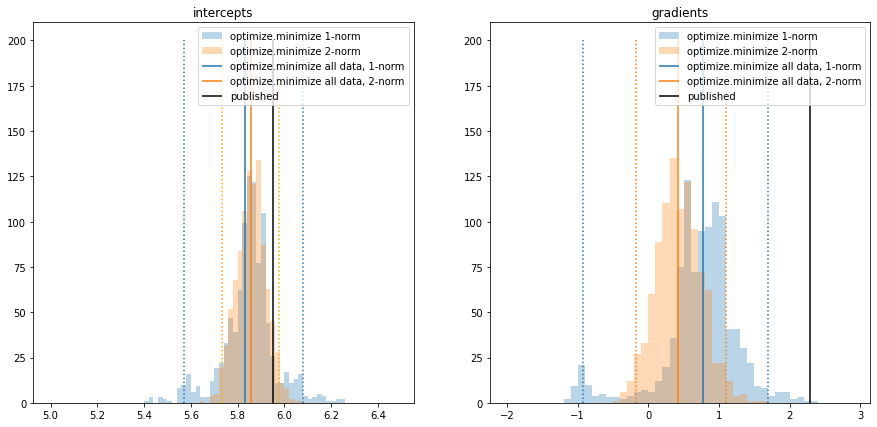

In [22]:
fig, axs = plt.subplots(1,2, figsize=(15,7))
i_bins = list(np.arange(5,6.5, 0.02))
g_bins = list(np.arange(-2, 3,0.1))

res = optimize.minimize(obj, initial_guess, method = 'TNC')
res_2 = optimize.minimize(obj_2, initial_guess, method = 'TNC')

intercepts.sort()
intercepts_2.sort()
n, bins, patches = axs[0].hist(intercepts, bins = i_bins, label = 'optimize.minimize 1-norm', alpha = 0.3)
axs[0].hist(intercepts_2, bins = i_bins, label = 'optimize.minimize 2-norm', alpha = 0.3)#, histtype='step', linewidth=2, edgecolor='k',fill=True)
#axs[0].hist(intercepts_polyfit, bins = i_bins, label = 'polyfit', alpha = 0.3, histtype='step', linewidth=2, hatch='.', edgecolor='k',fill=True)
axs[0].vlines(res.x[1], 0, 200, color = 'tab:blue', label = 'optimize.minimize all data, 1-norm')
axs[0].vlines(res_2.x[1], 0, 200, color = 'tab:orange', label = 'optimize.minimize all data, 2-norm')
axs[0].vlines(5.95, 0, 200, color = 'k', label = 'published')
axs[0].vlines(intercepts[25], 0, 200, linestyle = ':')
axs[0].vlines(intercepts[975], 0, 200, linestyle = ':')
axs[0].vlines(intercepts_2[25], 0, 200, linestyle = ':', color = 'orange')
axs[0].vlines(intercepts_2[975], 0, 200, linestyle = ':', color = 'orange')

gradt.sort()
gradt_2.sort()
axs[1].vlines(res.x[0], 0 , 200, color='tab:blue', label = 'optimize.minimize all data, 1-norm')
axs[1].vlines(res_2.x[0], 0 , 200, color='tab:orange', label = 'optimize.minimize all data, 2-norm')
axs[1].vlines(2.29, 0 , 200, color = 'k', label = 'published')
axs[1].vlines(gradt[25], 0 , 200, linestyle = ':')
axs[1].vlines(gradt[975], 0 , 200, linestyle = ':')
axs[1].vlines(gradt_2[25], 0 , 200, linestyle = ':', color = 'tab:orange')
axs[1].vlines(gradt_2[975], 0 , 200, linestyle = ':', color = 'tab:orange')
axs[1].hist(gradt, bins = g_bins, label = 'optimize.minimize 1-norm', alpha = 0.3)#, histtype='step', linewidth=2, edgecolor='k',fill=True)
axs[1].hist(gradt_2, bins = g_bins, label = 'optimize.minimize 2-norm', alpha = 0.3)#, histtype='step', linewidth=2, edgecolor='k',fill=True)

axs[0].set_title('intercepts')
axs[0].ticklabel_format(useOffset=False)
axs[0].ticklabel_format(useOffset=False)
#axs[1].hist(gradt_polyfit, bins = g_bins, label = 'polyfit', alpha = 0.3, histtype='step', linewidth=2, hatch='.', edgecolor='k',fill=True)
axs[1].set_title('gradients')
axs[1].ticklabel_format(useOffset=False)
axs[1].ticklabel_format(useOffset=False)
axs[0].legend()
axs[1].legend()

In [ ]:
max(gradt)

In [ ]:
intercepts[25]

0.425620150581 5.85574419125
0.775825938183 5.8335468521
     fun: 52.352592915559384
     jac: array([ 0.02537703, -1.99999947])
 message: 'Converged (|f_n-f_(n-1)| ~= 0)'
    nfev: 300
     nit: 14
  status: 1
 success: True
       x: array([ 0.77582594,  5.83354685])
0.0647543143238 -0.546439323857
-0.0236979679616 -0.0075890970281
     fun: 19.298173516623169
     jac: array([ 3.23186136,  1.99999945])
 message: 'Linear search failed'
    nfev: 204
     nit: 3
  status: 4
 success: False
       x: array([-0.02369797, -0.0075891 ])


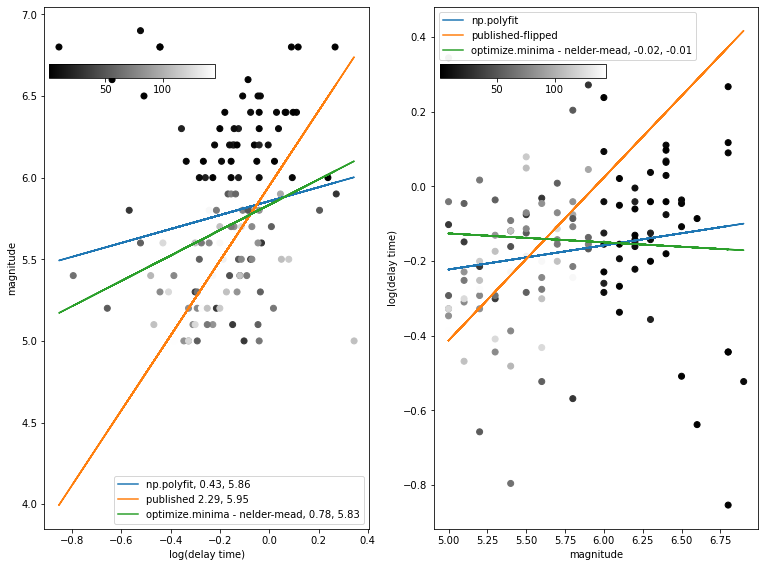

In [25]:
#%conda install ipympl
%matplotlib inline
fig, axs = plt.subplots(1,2, figsize=(12.8,9.6))
#===================================================================
sc = axs[0].scatter(np.log10(tdp_all), all_mag, c = n, cmap = 'gray')
cax = fig.add_axes([0.13, 0.777, 0.18, 0.02]) # x0, y0, width, height
fig.colorbar(sc, cax=cax, orientation='horizontal')

[a, b] = np.polyfit(x=np.log10(np.array(tdp_all)), y=np.array(all_mag), deg=1)
axs[0].plot(np.log10(np.array(tdp_all)), a*np.log10(np.array(tdp_all))+b,
            label='np.polyfit, '+"{:.2f}".format(a)+', '+"{:.2f}".format(b))
print(a,b)

axs[0].plot(np.log10(np.array(tdp_all)), 2.29*np.log10(np.array(tdp_all))+5.95, 
            label='published 2.29, 5.95')

res = optimize.minimize(obj, initial_guess, method = 'TNC')
axs[0].plot(np.log10(np.array(tdp_all)), res.x[0]*np.log10(np.array(tdp_all))+res.x[1], 
            label='optimize.minima - nelder-mead, '+"{:.2f}".format(res.x[0])+', '+"{:.2f}".format(res.x[1]))
print(res.x[0], res.x[1])
print(res)
axs[0].set_xlabel('log(delay time)')
axs[0].set_ylabel('magnitude')

#===================================================================
sc = axs[1].scatter(all_mag, np.log10(tdp_all), c = n, cmap = 'gray')
cax = fig.add_axes([0.555, 0.777, 0.18, 0.02]) # x0, y0, width, height
fig.colorbar(sc, cax=cax, orientation='horizontal')

[a, b] = np.polyfit(x= np.array(all_mag), y=np.log10(np.array(tdp_all)), deg=1)
axs[1].plot(np.array(all_mag), a*np.array(all_mag)+b, label='np.polyfit')

axs[1].plot(np.array(all_mag), 0.437*np.array(all_mag)-2.598, label='published-flipped')

res = optimize.minimize(obj_flipped, initial_guess, method = 'TNC')
axs[1].plot(np.array(all_mag), res.x[0]*np.array(all_mag)+res.x[1], 
            label='optimize.minima - nelder-mead, '+"{:.2f}".format(res.x[0])+', '+"{:.2f}".format(res.x[1]))

axs[1].set_ylabel('log(delay time)')
axs[1].set_xlabel('magnitude')
print(a,b)
print(res.x[0], res.x[1])
print(res)
axs[0].legend()
axs[1].legend()
plt.show()

In [27]:
def obj_weighted(to_opt):
    a=to_opt[0]
    b=to_opt[1]
    importance = np.array(n)
    m_real = np.array(all_mag)
    t = np.log10(np.array(tdp_all))
    m_guess = (a*t+b)
    return sum(abs(m_guess-m_real)*n)

(array([  0.,   2.,   5.,   8.,  10.,  21.,  17.,  19.,  10.,  14.,   5.,
          5.,   4.,   1.,   0.,   0.,   1.,   1.,   2.,   0.,   0.,   0.,
          1.,   0.,   0.,   0.,   0.,   0.,   0.]),
 array([ 0. ,  0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9,  1. ,
         1.1,  1.2,  1.3,  1.4,  1.5,  1.6,  1.7,  1.8,  1.9,  2. ,  2.1,
         2.2,  2.3,  2.4,  2.5,  2.6,  2.7,  2.8,  2.9]),
 <BarContainer object of 29 artists>)

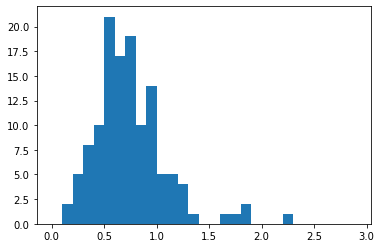

In [37]:
plt.hist(tdp_all, bins = np.arange(0, 3, 0.1))

0.425620150581 5.85574419125
0.969271282316 5.62210656449
     fun: 1698.0706364253833
     jac: array([ 129.53994363,   87.18629995])
 message: 'Converged (|f_n-f_(n-1)| ~= 0)'
    nfev: 222
     nit: 6
  status: 1
 success: True
       x: array([ 0.96927128,  5.62210656])


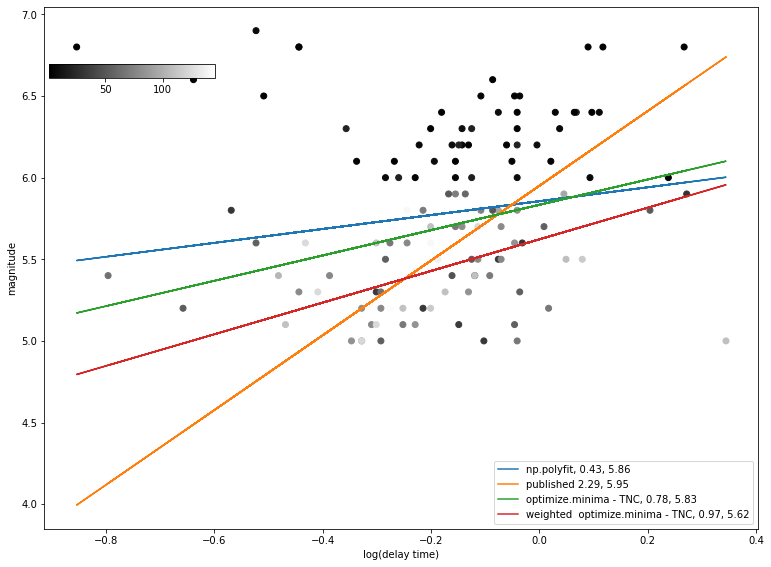

In [33]:
fig, axs = plt.subplots(1,1, figsize=(12.8,9.6))
sc = axs.scatter(np.log10(tdp_all), all_mag, c = n, cmap = 'gray')
cax = fig.add_axes([0.13, 0.777, 0.18, 0.02]) # x0, y0, width, height
fig.colorbar(sc, cax=cax, orientation='horizontal')

[a, b] = np.polyfit(x=np.log10(np.array(tdp_all)), y=np.array(all_mag), deg=1)
axs.plot(np.log10(np.array(tdp_all)), a*np.log10(np.array(tdp_all))+b,
            label='np.polyfit, '+"{:.2f}".format(a)+', '+"{:.2f}".format(b))
print(a,b)

axs.plot(np.log10(np.array(tdp_all)), 2.29*np.log10(np.array(tdp_all))+5.95, 
            label='published 2.29, 5.95')

res = optimize.minimize(obj, initial_guess, method = 'TNC')
axs.plot(np.log10(np.array(tdp_all)), res.x[0]*np.log10(np.array(tdp_all))+res.x[1], 
            label='optimize.minima - TNC, '+"{:.2f}".format(res.x[0])+', '+"{:.2f}".format(res.x[1]))

res = optimize.minimize(obj_weighted, initial_guess, method = 'TNC')
axs.plot(np.log10(np.array(tdp_all)), res.x[0]*np.log10(np.array(tdp_all))+res.x[1], 
            label='weighted  optimize.minima - TNC, '+"{:.2f}".format(res.x[0])+', '+"{:.2f}".format(res.x[1]))
print(res.x[0], res.x[1])
print(res)
axs.set_xlabel('log(delay time)')
axs.set_ylabel('magnitude')
axs.legend()

In [ ]:
J = res.jac
JT = J.transpose()
H = np.dot(JT, J)
cov = np.linalg.inv(H)

In [ ]:
H

In [ ]:
U, s, Vh = linalg.svd(res.jac, full_matrices=False)
tol = np.finfo(float).eps*s[0]*max(res.jac.shape)
w = s > tol
cov = (Vh[w].T/s[w]**2) @ Vh[w]  # robust covariance matrix
perr = np.sqrt(np.diag(cov))   

In [ ]:
print(min(np.log10(tdp_all)),min(tdp_all))

In [ ]:
plt.scatter(tdp_all, all_mag)

In [ ]:
tdp_all

In [ ]:
#res = optimize.minimize(obj, x0)

In [ ]:
#results

In [ ]:
# plot line of best fit
#popt, pcov = curve_fit(model_function, np.log(np.array(tdp_all)), np.array(all_mag), absolute_sigma = True)
#plt.plot(np.log(tdp_all), model_function(np.log(tdp_all), *popt), color='orange')
#plt.scatter(np.log(tdp_all), all_mag)

# add 2 * std banding
#perr = np.sqrt(np.diag(pcov))
#x_me = np.arange(-10, 10, 0.1) #min(x), max(x), 0.1) #np.arange(5, 7, 0.1)
#x_me = np.log(x_me)
#x_lower_me = x_me - 2*perr[1]
#x_upper_me =  x_me + 2*perr[1]
#y_me = popt[0]*x_me+popt[1]
#y_lower_me = popt[0]*x_lower_me-popt[1]
#y_upper_me = popt[0]*x_upper_me-popt[1]
#axs[0].plot(x, y_me, color = '')
#plt.fill_between(x_me, model_function(np.array(x_lower_me), *popt), model_function(np.array(x_upper_me), *popt), color = '#8adfff', alpha = 0.52, zorder =1)
#plt.plot(x_me, model_function(np.array(x_lower_me), *popt), color = '#003f5c', linestyle = '--', zorder =2)
#plt.plot(x_me, model_function(np.array(x_upper_me), *popt), color = '#003f5c', linestyle = '--', zorder =2)
#plt.xlim([-1,1])
print(popt, perr)

In [ ]:
print('mw='+str(popt[0])+'*log(Tdp) + ' + str(popt[1]))

In [ ]:
popt

In [ ]:
# plot line of best fit
popt, pcov = curve_fit(model_function, np.log10(x), y, absolute_sigma = True)
plt.plot(np.log10(x), model_function(np.log10(x), *popt), color='orange')
plt.scatter(np.log(x), y)

# add 2 * std banding
perr = np.sqrt(np.diag(pcov))
x_me = np.arange(-10, 10, 0.1) #min(x), max(x), 0.1) #np.arange(5, 7, 0.1)

x_lower_me = x_me - 2*perr[1]
x_upper_me =  x_me + 2*perr[1]
x_me = np.log(x_me)
x_upper_me = np.log(x_upper_me)
x_lower_me = np.log(x_lower_me)
y_me = popt[0]*x_me+popt[1]
y_lower_me = popt[0]*x_lower_me-popt[1]
y_upper_me = popt[0]*x_upper_me-popt[1]

#axs[0].plot(x, y_me, color = '')
plt.fill_between(x_me, model_function(np.array(x_lower_me), *popt), model_function(np.array(x_upper_me), *popt), color = '#8adfff', alpha = 0.52, zorder =1)
plt.plot(x_me, model_function(np.array(x_lower_me), *popt), color = '#003f5c', linestyle = '--', zorder =2)
plt.plot(x_me, model_function(np.array(x_upper_me), *popt), color = '#003f5c', linestyle = '--', zorder =2)
plt.xlim([-1,1])

In [ ]:
popt

In [ ]:
results

In [ ]:
all_mag = []

tdp_all = []
for i in results:
    all_mag.append(float(i[0]))
    tdp_all.append(float(i[2]))
x = np.array(all_mag)
y = tdp_all    
y = np.array(y)

In [ ]:
# plot line of best fit
popt, pcov = curve_fit(model_function, x, np.log(y), absolute_sigma = True)
plt.plot(x, model_function(x, *popt), color='orange')
plt.scatter(x, np.log(y))

# add 2 * std banding
perr = np.sqrt(np.diag(pcov))
x_me = np.arange(5, 7, 0.1)
#x_me = np.log(x_me)
x_lower_me = x_me - 2*perr[1]
x_upper_me =  x_me + 2*perr[1]
y_me = popt[0]*x_me+popt[1]
y_lower_me = popt[0]*x_lower_me-popt[1]
y_upper_me = popt[0]*x_upper_me-popt[1]
#axs[0].plot(x, y_me, color = '')
plt.fill_between(x_me, model_function(np.array(x_lower_me), *popt), model_function(np.array(x_upper_me), *popt), color = '#8adfff', alpha = 0.52, zorder =1)
plt.plot(x_me, model_function(np.array(x_lower_me), *popt), color = '#003f5c', linestyle = '--', zorder =2)
plt.plot(x_me, model_function(np.array(x_upper_me), *popt), color = '#003f5c', linestyle = '--', zorder =2)


In [ ]:
popt